Just run the first code block then skip to the section of interest

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transform
import numpy as np

from dataloader.dataloader import DataLoader
import matplotlib.pylab as plt
%matplotlib inline

### Test data transformations

In [ ]:
loader = DataLoader(datadir='data/metal_mono/data/normalized',
                    sr=16000,seqLen=10,stride=1,
                    batch_size=1,
                    paramdir='data/metal_mono/param',
                    prop=['fill'],generate=['rmse','centroid','mfcc0'])#'audio'

In [ ]:
#sample -> mu-law -> one-hot

import dataloader.transforms as tr

samp, t_samp = loader.dataset.rand_sample(transform=True)
print(t_samp.shape)

plt.figure(figsize=(20,1)) 
plt.plot(samp) #the original audio sequence
plt.grid()
plt.show()

mu = tr.mulawEncode(256)(samp)
plt.figure(figsize=(20,1)) 
plt.plot(mu) #sequence after mu-law 
plt.grid()
plt.show()
print(mu)

d = tr.onehotEncode(256)(mu) #one-hot
print(d.shape)
print(d)

In [ ]:
#one-hot -> mu-law -> sample
d_samp = tr.onehotDecode()(d)
print(d_samp.shape)
print(d_samp)

re_samp = tr.mulawDecode(256)(d_samp)
print(re_samp.shape)
plt.figure(figsize=(20,1)) 
plt.plot(re_samp) #the original audio sequence
plt.grid()
plt.show()


In [ ]:
#

loader = DataLoader(datadir='data/audio',
                    sr=16000,seqLen=100,stride=1,
                    batch_size=1,
                    paramdir='data/param',
                    prop=['spec_centroid'])

In [ ]:
import dataloader.transforms as tr
re_samp = tr.mulawDecode(256)(np.array([[70]]))
re_samp

In [ ]:
q = np.array([[1],[2]])+0.1
q

### Test dataloading

In [ ]:
input,target = loader.dataset[0]
print(input.shape,input.type())
print(input)
print(target.shape,target.type())
print(target)

In [ ]:
print(len(loader))
for step, (inputs,targets) in enumerate(loader):
    print(step)
    print(inputs.shape)
    print(inputs)
    print(targets.shape)
    #print(targets)
    
    #t_re = torch.squeeze(targets[:,0],1)
    #print(t_re.shape)
    
    if step == 1:
        break

In [8]:
#loading on filename (instead of directory)
loader = DataLoader(datadir='data/metal_mono/audio/ZOOM0001.wav',   #
                    sr=16000,seqLen=10,stride=1,
                    batch_size=1,
                    paramdir='data/metal_mono/param',
                    prop=['rmse', 'centroid'],
                    generate=['audio'])

print(len(loader))
for step, (inputs,targets) in enumerate(loader):
    print(step)
    print(inputs.shape)
    print(inputs)
    print(targets.shape)
    #print(targets)
    
    #t_re = torch.squeeze(targets[:,0],1)
    #print(t_re.shape)
    
    if step == 1:
        break

479260


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Program Files (x86)\Anaconda3\envs\pytorch1\lib\site-packages\torch\utils\data\_utils\worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\Program Files (x86)\Anaconda3\envs\pytorch1\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Program Files (x86)\Anaconda3\envs\pytorch1\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Users\huzaifah\Documents\python_projects\MTCRNN\dataloader\dataloader.py", line 187, in __getitem__
    params = pm.getParams(self.filelist[chooseFileIndex])
  File "C:\Users\huzaifah\Documents\python_projects\MTCRNN\paramManager\paramManager.py", line 155, in getParams
    with open(path + '.params') as fh:
FileNotFoundError: [Errno 2] No such file or directory: 'data/metal_mono/param\\..params'


### Test numpy array saving/loading

In [ ]:
import numpy as np

a = np.array([[1,2],[3,4],[5,6]])
print(a.shape)
np.save('testarray',a)
b = np.load('testarray.npy')
b

In [5]:
a = []
len(a)

0

### Test paramonly dataloader (depreciated)

In [ ]:
loader = DataLoader(datadir='data/audio',
                    sr=16,seqLen=8,stride=1,
                    batch_size=2,
                    paramdir='data/param',
                    prop=['rmse','spec_centroid'],
                    paramonly=True
                   )

In [ ]:
samp,t_samp = loader.dataset.rand_sample(transform=True)
print(t_samp.shape)
print(samp)
print(t_samp)

In [ ]:
print(len(loader))
for step, (inputs,targets) in enumerate(loader):
    print(step)
    print(inputs.shape)
    print(inputs)
    print(targets.shape)
    print(targets)
    
    #t_re = torch.squeeze(targets[:,0],1)
    #print(t_re.shape)
    
    if step == 1:
        break

### Test resampling parameters

In [2]:
from paramManager.paramManager import paramManager

datapath='data/metal_mono/audio'
parampath='data/metal_mono/param'
pm=paramManager(datapath, parampath)

In [3]:
mfcctime,mfccvalues = pm.getParamSize(datapath + '/' + 'ZOOM0001.WAV','mfcc0')
rmsetime,rmsevalues = pm.getParamSize(datapath + '/' + 'ZOOM0001.WAV','rmse')
print(mfcctime,mfccvalues)
print(rmsetime,rmsevalues)

3746 3746
1873 1873


--Data resampled from--
times: [0.         0.01600093 0.03200187 0.0480028  0.06400374 0.08000467
 0.09600561 0.11200654 0.12800748 0.14400841 0.16000935 0.17601028
 0.19201122 0.20801215 0.22401309 0.24001402 0.25601496 0.27201589
 0.28801683 0.30401776 0.3200187  0.33601963 0.35202057 0.3680215
 0.38402244 0.40002337 0.41602431 0.43202524 0.44802618 0.46402711
 0.48002804 0.49602898 0.51202991 0.52803085 0.54403178 0.56003272
 0.57603365 0.59203459 0.60803552 0.62403646 0.64003739 0.65603833
 0.67203926 0.6880402  0.70404113 0.72004207 0.736043   0.75204394
 0.76804487 0.78404581 0.80004674 0.81604768 0.83204861 0.84804955
 0.86405048 0.88005142 0.89605235 0.91205329 0.92805422 0.94405515
 0.96005609 0.97605702 0.99205796]
values: [0.00333433 0.00279624 0.00201979 0.00221412 0.0026465  0.00299272
 0.01285124 0.0141933  0.00809062 0.00661862 0.00625767 0.0063706
 0.00648957 0.01209351 0.01368197 0.01099979 0.01028287 0.00928902
 0.01098861 0.01164916 0.01004446 0.01561644 0.01862062 0

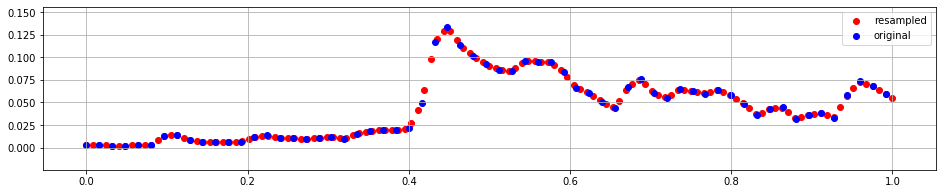

In [11]:
fromTime=0.
toTime=1.0
sr= 125
fooparams=pm.getParams(datapath + '/' + 'ZOOM0001.WAV') #the path and extension are optional
#newtime, newvals, oldtime, oldvals = pm.resampleParam(fooparams,'mfcc0',sr,timestart=fromTime,timeend=toTime,verbose=True,overwrite=False,return_verbose=True)
rnewtime, rnewvals, roldtime, roldvals = pm.resampleParam(fooparams,'rmse',sr,timestart=fromTime,timeend=toTime,verbose=True,overwrite=False,return_verbose=True)
print(roldtime.shape,roldvals.shape)
print(rnewtime.shape,rnewvals.shape)
"""
fig, ax2 = plt.subplots(figsize=(16,3))
ax2.plot(oldtime, oldvals,color='b',label='original') 
ax2.plot(newtime, newvals,color='r',label='resampled') 
plt.legend()
plt.grid()
plt.show()

"""
fig, ax2 = plt.subplots(figsize=(16,3))
ax2.scatter(rnewtime, rnewvals,color='r',label='resampled') 
ax2.scatter(roldtime, roldvals,color='b',label='original') 
plt.legend()
plt.grid()
plt.show()


ORI [0.         0.01612903 0.03225806 0.0483871  0.06451613 0.08064516
 0.09677419 0.11290323 0.12903226 0.14516129 0.16129032 0.17741935
 0.19354839 0.20967742 0.22580645 0.24193548 0.25806452 0.27419355
 0.29032258 0.30645161 0.32258065 0.33870968 0.35483871 0.37096774
 0.38709677 0.40322581 0.41935484 0.43548387 0.4516129  0.46774194
 0.48387097 0.5        0.51612903 0.53225806 0.5483871  0.56451613
 0.58064516 0.59677419 0.61290323 0.62903226 0.64516129 0.66129032
 0.67741935 0.69354839 0.70967742 0.72580645 0.74193548 0.75806452
 0.77419355 0.79032258 0.80645161 0.82258065 0.83870968 0.85483871
 0.87096774 0.88709677 0.90322581 0.91935484 0.93548387 0.9516129
 0.96774194 0.98387097 1.         1.01612903 1.03225806 1.0483871
 1.06451613 1.08064516 1.09677419 1.11290323 1.12903226 1.14516129
 1.16129032 1.17741935 1.19354839 1.20967742 1.22580645 1.24193548
 1.25806452 1.27419355 1.29032258 1.30645161 1.32258065 1.33870968
 1.35483871 1.37096774 1.38709677 1.40322581 1.41935484 1.43

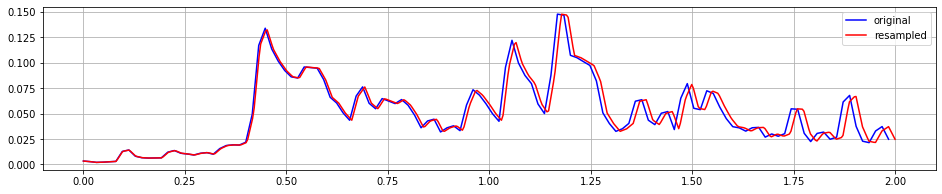

In [9]:
newtime, newvals = pm.resample(roldvals,63,250,axis=0)
print(len(newtime))
#print(newtime)

fig, ax2 = plt.subplots(figsize=(16,3))
ax2.plot(roldtime, roldvals,color='b',label='original') 
ax2.plot(newtime, newvals,color='r',label='resampled') 
plt.legend()
plt.grid()
plt.show()


### Test generation audio with 'self' conditioning - taken from real data

In [4]:
from generate import Generator

class Args:
    hidden_size = 800
    n_layers = 3
    sample_rate = 16000
    seq_len = 65000
    stride = 1
    mulaw_channels = 256
    batch_size = 1
    param_dir = 'data/metal_mono/param'
    prop = ['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12']
    generate = ['audio']
    gen_size = 1
    cond_size = 13
    onehot = False
    seed = None
    model_dir = 'output/tier1_w_norm/model'
    step = 25000
    length = 64000
    data_dir = 'data/metal_mono/audio'
    paramvect = 'self'
    out = 'generated_self_25000model'
    temp = 0.9

args=Args()

In [5]:
generator = Generator(args)
output, params, audio = generator.generate()

RnnBlock(
  (i2d): Linear(in_features=14, out_features=42, bias=True)
  (d2h): Linear(in_features=42, out_features=800, bias=True)
  (gru): GRU(800, 800, num_layers=3, batch_first=True)
  (h2o): Linear(in_features=800, out_features=256, bias=True)
)
Loading model from output/tier1_w_norm/model
1/64000 samples are generated.
2/64000 samples are generated.
3/64000 samples are generated.
4/64000 samples are generated.
5/64000 samples are generated.
6/64000 samples are generated.
7/64000 samples are generated.
8/64000 samples are generated.
9/64000 samples are generated.
10/64000 samples are generated.
11/64000 samples are generated.
12/64000 samples are generated.
13/64000 samples are generated.
14/64000 samples are generated.
15/64000 samples are generated.
16/64000 samples are generated.
17/64000 samples are generated.
18/64000 samples are generated.
19/64000 samples are generated.
20/64000 samples are generated.
21/64000 samples are generated.
22/64000 samples are generated.
23/64000 s

491/64000 samples are generated.
492/64000 samples are generated.
493/64000 samples are generated.
494/64000 samples are generated.
495/64000 samples are generated.
496/64000 samples are generated.
497/64000 samples are generated.
498/64000 samples are generated.
499/64000 samples are generated.
500/64000 samples are generated.
501/64000 samples are generated.
502/64000 samples are generated.
503/64000 samples are generated.
504/64000 samples are generated.
505/64000 samples are generated.
506/64000 samples are generated.
507/64000 samples are generated.
508/64000 samples are generated.
509/64000 samples are generated.
510/64000 samples are generated.
511/64000 samples are generated.
512/64000 samples are generated.
513/64000 samples are generated.
514/64000 samples are generated.
515/64000 samples are generated.
516/64000 samples are generated.
517/64000 samples are generated.
518/64000 samples are generated.
519/64000 samples are generated.
520/64000 samples are generated.
521/64000 

987/64000 samples are generated.
988/64000 samples are generated.
989/64000 samples are generated.
990/64000 samples are generated.
991/64000 samples are generated.
992/64000 samples are generated.
993/64000 samples are generated.
994/64000 samples are generated.
995/64000 samples are generated.
996/64000 samples are generated.
997/64000 samples are generated.
998/64000 samples are generated.
999/64000 samples are generated.
1000/64000 samples are generated.
1001/64000 samples are generated.
1002/64000 samples are generated.
1003/64000 samples are generated.
1004/64000 samples are generated.
1005/64000 samples are generated.
1006/64000 samples are generated.
1007/64000 samples are generated.
1008/64000 samples are generated.
1009/64000 samples are generated.
1010/64000 samples are generated.
1011/64000 samples are generated.
1012/64000 samples are generated.
1013/64000 samples are generated.
1014/64000 samples are generated.
1015/64000 samples are generated.
1016/64000 samples are gene

1468/64000 samples are generated.
1469/64000 samples are generated.
1470/64000 samples are generated.
1471/64000 samples are generated.
1472/64000 samples are generated.
1473/64000 samples are generated.
1474/64000 samples are generated.
1475/64000 samples are generated.
1476/64000 samples are generated.
1477/64000 samples are generated.
1478/64000 samples are generated.
1479/64000 samples are generated.
1480/64000 samples are generated.
1481/64000 samples are generated.
1482/64000 samples are generated.
1483/64000 samples are generated.
1484/64000 samples are generated.
1485/64000 samples are generated.
1486/64000 samples are generated.
1487/64000 samples are generated.
1488/64000 samples are generated.
1489/64000 samples are generated.
1490/64000 samples are generated.
1491/64000 samples are generated.
1492/64000 samples are generated.
1493/64000 samples are generated.
1494/64000 samples are generated.
1495/64000 samples are generated.
1496/64000 samples are generated.
1497/64000 sam

1948/64000 samples are generated.
1949/64000 samples are generated.
1950/64000 samples are generated.
1951/64000 samples are generated.
1952/64000 samples are generated.
1953/64000 samples are generated.
1954/64000 samples are generated.
1955/64000 samples are generated.
1956/64000 samples are generated.
1957/64000 samples are generated.
1958/64000 samples are generated.
1959/64000 samples are generated.
1960/64000 samples are generated.
1961/64000 samples are generated.
1962/64000 samples are generated.
1963/64000 samples are generated.
1964/64000 samples are generated.
1965/64000 samples are generated.
1966/64000 samples are generated.
1967/64000 samples are generated.
1968/64000 samples are generated.
1969/64000 samples are generated.
1970/64000 samples are generated.
1971/64000 samples are generated.
1972/64000 samples are generated.
1973/64000 samples are generated.
1974/64000 samples are generated.
1975/64000 samples are generated.
1976/64000 samples are generated.
1977/64000 sam

2428/64000 samples are generated.
2429/64000 samples are generated.
2430/64000 samples are generated.
2431/64000 samples are generated.
2432/64000 samples are generated.
2433/64000 samples are generated.
2434/64000 samples are generated.
2435/64000 samples are generated.
2436/64000 samples are generated.
2437/64000 samples are generated.
2438/64000 samples are generated.
2439/64000 samples are generated.
2440/64000 samples are generated.
2441/64000 samples are generated.
2442/64000 samples are generated.
2443/64000 samples are generated.
2444/64000 samples are generated.
2445/64000 samples are generated.
2446/64000 samples are generated.
2447/64000 samples are generated.
2448/64000 samples are generated.
2449/64000 samples are generated.
2450/64000 samples are generated.
2451/64000 samples are generated.
2452/64000 samples are generated.
2453/64000 samples are generated.
2454/64000 samples are generated.
2455/64000 samples are generated.
2456/64000 samples are generated.
2457/64000 sam

2908/64000 samples are generated.
2909/64000 samples are generated.
2910/64000 samples are generated.
2911/64000 samples are generated.
2912/64000 samples are generated.
2913/64000 samples are generated.
2914/64000 samples are generated.
2915/64000 samples are generated.
2916/64000 samples are generated.
2917/64000 samples are generated.
2918/64000 samples are generated.
2919/64000 samples are generated.
2920/64000 samples are generated.
2921/64000 samples are generated.
2922/64000 samples are generated.
2923/64000 samples are generated.
2924/64000 samples are generated.
2925/64000 samples are generated.
2926/64000 samples are generated.
2927/64000 samples are generated.
2928/64000 samples are generated.
2929/64000 samples are generated.
2930/64000 samples are generated.
2931/64000 samples are generated.
2932/64000 samples are generated.
2933/64000 samples are generated.
2934/64000 samples are generated.
2935/64000 samples are generated.
2936/64000 samples are generated.
2937/64000 sam

3388/64000 samples are generated.
3389/64000 samples are generated.
3390/64000 samples are generated.
3391/64000 samples are generated.
3392/64000 samples are generated.
3393/64000 samples are generated.
3394/64000 samples are generated.
3395/64000 samples are generated.
3396/64000 samples are generated.
3397/64000 samples are generated.
3398/64000 samples are generated.
3399/64000 samples are generated.
3400/64000 samples are generated.
3401/64000 samples are generated.
3402/64000 samples are generated.
3403/64000 samples are generated.
3404/64000 samples are generated.
3405/64000 samples are generated.
3406/64000 samples are generated.
3407/64000 samples are generated.
3408/64000 samples are generated.
3409/64000 samples are generated.
3410/64000 samples are generated.
3411/64000 samples are generated.
3412/64000 samples are generated.
3413/64000 samples are generated.
3414/64000 samples are generated.
3415/64000 samples are generated.
3416/64000 samples are generated.
3417/64000 sam

3868/64000 samples are generated.
3869/64000 samples are generated.
3870/64000 samples are generated.
3871/64000 samples are generated.
3872/64000 samples are generated.
3873/64000 samples are generated.
3874/64000 samples are generated.
3875/64000 samples are generated.
3876/64000 samples are generated.
3877/64000 samples are generated.
3878/64000 samples are generated.
3879/64000 samples are generated.
3880/64000 samples are generated.
3881/64000 samples are generated.
3882/64000 samples are generated.
3883/64000 samples are generated.
3884/64000 samples are generated.
3885/64000 samples are generated.
3886/64000 samples are generated.
3887/64000 samples are generated.
3888/64000 samples are generated.
3889/64000 samples are generated.
3890/64000 samples are generated.
3891/64000 samples are generated.
3892/64000 samples are generated.
3893/64000 samples are generated.
3894/64000 samples are generated.
3895/64000 samples are generated.
3896/64000 samples are generated.
3897/64000 sam

4348/64000 samples are generated.
4349/64000 samples are generated.
4350/64000 samples are generated.
4351/64000 samples are generated.
4352/64000 samples are generated.
4353/64000 samples are generated.
4354/64000 samples are generated.
4355/64000 samples are generated.
4356/64000 samples are generated.
4357/64000 samples are generated.
4358/64000 samples are generated.
4359/64000 samples are generated.
4360/64000 samples are generated.
4361/64000 samples are generated.
4362/64000 samples are generated.
4363/64000 samples are generated.
4364/64000 samples are generated.
4365/64000 samples are generated.
4366/64000 samples are generated.
4367/64000 samples are generated.
4368/64000 samples are generated.
4369/64000 samples are generated.
4370/64000 samples are generated.
4371/64000 samples are generated.
4372/64000 samples are generated.
4373/64000 samples are generated.
4374/64000 samples are generated.
4375/64000 samples are generated.
4376/64000 samples are generated.
4377/64000 sam

4828/64000 samples are generated.
4829/64000 samples are generated.
4830/64000 samples are generated.
4831/64000 samples are generated.
4832/64000 samples are generated.
4833/64000 samples are generated.
4834/64000 samples are generated.
4835/64000 samples are generated.
4836/64000 samples are generated.
4837/64000 samples are generated.
4838/64000 samples are generated.
4839/64000 samples are generated.
4840/64000 samples are generated.
4841/64000 samples are generated.
4842/64000 samples are generated.
4843/64000 samples are generated.
4844/64000 samples are generated.
4845/64000 samples are generated.
4846/64000 samples are generated.
4847/64000 samples are generated.
4848/64000 samples are generated.
4849/64000 samples are generated.
4850/64000 samples are generated.
4851/64000 samples are generated.
4852/64000 samples are generated.
4853/64000 samples are generated.
4854/64000 samples are generated.
4855/64000 samples are generated.
4856/64000 samples are generated.
4857/64000 sam

5308/64000 samples are generated.
5309/64000 samples are generated.
5310/64000 samples are generated.
5311/64000 samples are generated.
5312/64000 samples are generated.
5313/64000 samples are generated.
5314/64000 samples are generated.
5315/64000 samples are generated.
5316/64000 samples are generated.
5317/64000 samples are generated.
5318/64000 samples are generated.
5319/64000 samples are generated.
5320/64000 samples are generated.
5321/64000 samples are generated.
5322/64000 samples are generated.
5323/64000 samples are generated.
5324/64000 samples are generated.
5325/64000 samples are generated.
5326/64000 samples are generated.
5327/64000 samples are generated.
5328/64000 samples are generated.
5329/64000 samples are generated.
5330/64000 samples are generated.
5331/64000 samples are generated.
5332/64000 samples are generated.
5333/64000 samples are generated.
5334/64000 samples are generated.
5335/64000 samples are generated.
5336/64000 samples are generated.
5337/64000 sam

5788/64000 samples are generated.
5789/64000 samples are generated.
5790/64000 samples are generated.
5791/64000 samples are generated.
5792/64000 samples are generated.
5793/64000 samples are generated.
5794/64000 samples are generated.
5795/64000 samples are generated.
5796/64000 samples are generated.
5797/64000 samples are generated.
5798/64000 samples are generated.
5799/64000 samples are generated.
5800/64000 samples are generated.
5801/64000 samples are generated.
5802/64000 samples are generated.
5803/64000 samples are generated.
5804/64000 samples are generated.
5805/64000 samples are generated.
5806/64000 samples are generated.
5807/64000 samples are generated.
5808/64000 samples are generated.
5809/64000 samples are generated.
5810/64000 samples are generated.
5811/64000 samples are generated.
5812/64000 samples are generated.
5813/64000 samples are generated.
5814/64000 samples are generated.
5815/64000 samples are generated.
5816/64000 samples are generated.
5817/64000 sam

6268/64000 samples are generated.
6269/64000 samples are generated.
6270/64000 samples are generated.
6271/64000 samples are generated.
6272/64000 samples are generated.
6273/64000 samples are generated.
6274/64000 samples are generated.
6275/64000 samples are generated.
6276/64000 samples are generated.
6277/64000 samples are generated.
6278/64000 samples are generated.
6279/64000 samples are generated.
6280/64000 samples are generated.
6281/64000 samples are generated.
6282/64000 samples are generated.
6283/64000 samples are generated.
6284/64000 samples are generated.
6285/64000 samples are generated.
6286/64000 samples are generated.
6287/64000 samples are generated.
6288/64000 samples are generated.
6289/64000 samples are generated.
6290/64000 samples are generated.
6291/64000 samples are generated.
6292/64000 samples are generated.
6293/64000 samples are generated.
6294/64000 samples are generated.
6295/64000 samples are generated.
6296/64000 samples are generated.
6297/64000 sam

6748/64000 samples are generated.
6749/64000 samples are generated.
6750/64000 samples are generated.
6751/64000 samples are generated.
6752/64000 samples are generated.
6753/64000 samples are generated.
6754/64000 samples are generated.
6755/64000 samples are generated.
6756/64000 samples are generated.
6757/64000 samples are generated.
6758/64000 samples are generated.
6759/64000 samples are generated.
6760/64000 samples are generated.
6761/64000 samples are generated.
6762/64000 samples are generated.
6763/64000 samples are generated.
6764/64000 samples are generated.
6765/64000 samples are generated.
6766/64000 samples are generated.
6767/64000 samples are generated.
6768/64000 samples are generated.
6769/64000 samples are generated.
6770/64000 samples are generated.
6771/64000 samples are generated.
6772/64000 samples are generated.
6773/64000 samples are generated.
6774/64000 samples are generated.
6775/64000 samples are generated.
6776/64000 samples are generated.
6777/64000 sam

7228/64000 samples are generated.
7229/64000 samples are generated.
7230/64000 samples are generated.
7231/64000 samples are generated.
7232/64000 samples are generated.
7233/64000 samples are generated.
7234/64000 samples are generated.
7235/64000 samples are generated.
7236/64000 samples are generated.
7237/64000 samples are generated.
7238/64000 samples are generated.
7239/64000 samples are generated.
7240/64000 samples are generated.
7241/64000 samples are generated.
7242/64000 samples are generated.
7243/64000 samples are generated.
7244/64000 samples are generated.
7245/64000 samples are generated.
7246/64000 samples are generated.
7247/64000 samples are generated.
7248/64000 samples are generated.
7249/64000 samples are generated.
7250/64000 samples are generated.
7251/64000 samples are generated.
7252/64000 samples are generated.
7253/64000 samples are generated.
7254/64000 samples are generated.
7255/64000 samples are generated.
7256/64000 samples are generated.
7257/64000 sam

7708/64000 samples are generated.
7709/64000 samples are generated.
7710/64000 samples are generated.
7711/64000 samples are generated.
7712/64000 samples are generated.
7713/64000 samples are generated.
7714/64000 samples are generated.
7715/64000 samples are generated.
7716/64000 samples are generated.
7717/64000 samples are generated.
7718/64000 samples are generated.
7719/64000 samples are generated.
7720/64000 samples are generated.
7721/64000 samples are generated.
7722/64000 samples are generated.
7723/64000 samples are generated.
7724/64000 samples are generated.
7725/64000 samples are generated.
7726/64000 samples are generated.
7727/64000 samples are generated.
7728/64000 samples are generated.
7729/64000 samples are generated.
7730/64000 samples are generated.
7731/64000 samples are generated.
7732/64000 samples are generated.
7733/64000 samples are generated.
7734/64000 samples are generated.
7735/64000 samples are generated.
7736/64000 samples are generated.
7737/64000 sam

8188/64000 samples are generated.
8189/64000 samples are generated.
8190/64000 samples are generated.
8191/64000 samples are generated.
8192/64000 samples are generated.
8193/64000 samples are generated.
8194/64000 samples are generated.
8195/64000 samples are generated.
8196/64000 samples are generated.
8197/64000 samples are generated.
8198/64000 samples are generated.
8199/64000 samples are generated.
8200/64000 samples are generated.
8201/64000 samples are generated.
8202/64000 samples are generated.
8203/64000 samples are generated.
8204/64000 samples are generated.
8205/64000 samples are generated.
8206/64000 samples are generated.
8207/64000 samples are generated.
8208/64000 samples are generated.
8209/64000 samples are generated.
8210/64000 samples are generated.
8211/64000 samples are generated.
8212/64000 samples are generated.
8213/64000 samples are generated.
8214/64000 samples are generated.
8215/64000 samples are generated.
8216/64000 samples are generated.
8217/64000 sam

8668/64000 samples are generated.
8669/64000 samples are generated.
8670/64000 samples are generated.
8671/64000 samples are generated.
8672/64000 samples are generated.
8673/64000 samples are generated.
8674/64000 samples are generated.
8675/64000 samples are generated.
8676/64000 samples are generated.
8677/64000 samples are generated.
8678/64000 samples are generated.
8679/64000 samples are generated.
8680/64000 samples are generated.
8681/64000 samples are generated.
8682/64000 samples are generated.
8683/64000 samples are generated.
8684/64000 samples are generated.
8685/64000 samples are generated.
8686/64000 samples are generated.
8687/64000 samples are generated.
8688/64000 samples are generated.
8689/64000 samples are generated.
8690/64000 samples are generated.
8691/64000 samples are generated.
8692/64000 samples are generated.
8693/64000 samples are generated.
8694/64000 samples are generated.
8695/64000 samples are generated.
8696/64000 samples are generated.
8697/64000 sam

9148/64000 samples are generated.
9149/64000 samples are generated.
9150/64000 samples are generated.
9151/64000 samples are generated.
9152/64000 samples are generated.
9153/64000 samples are generated.
9154/64000 samples are generated.
9155/64000 samples are generated.
9156/64000 samples are generated.
9157/64000 samples are generated.
9158/64000 samples are generated.
9159/64000 samples are generated.
9160/64000 samples are generated.
9161/64000 samples are generated.
9162/64000 samples are generated.
9163/64000 samples are generated.
9164/64000 samples are generated.
9165/64000 samples are generated.
9166/64000 samples are generated.
9167/64000 samples are generated.
9168/64000 samples are generated.
9169/64000 samples are generated.
9170/64000 samples are generated.
9171/64000 samples are generated.
9172/64000 samples are generated.
9173/64000 samples are generated.
9174/64000 samples are generated.
9175/64000 samples are generated.
9176/64000 samples are generated.
9177/64000 sam

9628/64000 samples are generated.
9629/64000 samples are generated.
9630/64000 samples are generated.
9631/64000 samples are generated.
9632/64000 samples are generated.
9633/64000 samples are generated.
9634/64000 samples are generated.
9635/64000 samples are generated.
9636/64000 samples are generated.
9637/64000 samples are generated.
9638/64000 samples are generated.
9639/64000 samples are generated.
9640/64000 samples are generated.
9641/64000 samples are generated.
9642/64000 samples are generated.
9643/64000 samples are generated.
9644/64000 samples are generated.
9645/64000 samples are generated.
9646/64000 samples are generated.
9647/64000 samples are generated.
9648/64000 samples are generated.
9649/64000 samples are generated.
9650/64000 samples are generated.
9651/64000 samples are generated.
9652/64000 samples are generated.
9653/64000 samples are generated.
9654/64000 samples are generated.
9655/64000 samples are generated.
9656/64000 samples are generated.
9657/64000 sam

10105/64000 samples are generated.
10106/64000 samples are generated.
10107/64000 samples are generated.
10108/64000 samples are generated.
10109/64000 samples are generated.
10110/64000 samples are generated.
10111/64000 samples are generated.
10112/64000 samples are generated.
10113/64000 samples are generated.
10114/64000 samples are generated.
10115/64000 samples are generated.
10116/64000 samples are generated.
10117/64000 samples are generated.
10118/64000 samples are generated.
10119/64000 samples are generated.
10120/64000 samples are generated.
10121/64000 samples are generated.
10122/64000 samples are generated.
10123/64000 samples are generated.
10124/64000 samples are generated.
10125/64000 samples are generated.
10126/64000 samples are generated.
10127/64000 samples are generated.
10128/64000 samples are generated.
10129/64000 samples are generated.
10130/64000 samples are generated.
10131/64000 samples are generated.
10132/64000 samples are generated.
10133/64000 samples 

10573/64000 samples are generated.
10574/64000 samples are generated.
10575/64000 samples are generated.
10576/64000 samples are generated.
10577/64000 samples are generated.
10578/64000 samples are generated.
10579/64000 samples are generated.
10580/64000 samples are generated.
10581/64000 samples are generated.
10582/64000 samples are generated.
10583/64000 samples are generated.
10584/64000 samples are generated.
10585/64000 samples are generated.
10586/64000 samples are generated.
10587/64000 samples are generated.
10588/64000 samples are generated.
10589/64000 samples are generated.
10590/64000 samples are generated.
10591/64000 samples are generated.
10592/64000 samples are generated.
10593/64000 samples are generated.
10594/64000 samples are generated.
10595/64000 samples are generated.
10596/64000 samples are generated.
10597/64000 samples are generated.
10598/64000 samples are generated.
10599/64000 samples are generated.
10600/64000 samples are generated.
10601/64000 samples 

11041/64000 samples are generated.
11042/64000 samples are generated.
11043/64000 samples are generated.
11044/64000 samples are generated.
11045/64000 samples are generated.
11046/64000 samples are generated.
11047/64000 samples are generated.
11048/64000 samples are generated.
11049/64000 samples are generated.
11050/64000 samples are generated.
11051/64000 samples are generated.
11052/64000 samples are generated.
11053/64000 samples are generated.
11054/64000 samples are generated.
11055/64000 samples are generated.
11056/64000 samples are generated.
11057/64000 samples are generated.
11058/64000 samples are generated.
11059/64000 samples are generated.
11060/64000 samples are generated.
11061/64000 samples are generated.
11062/64000 samples are generated.
11063/64000 samples are generated.
11064/64000 samples are generated.
11065/64000 samples are generated.
11066/64000 samples are generated.
11067/64000 samples are generated.
11068/64000 samples are generated.
11069/64000 samples 

11509/64000 samples are generated.
11510/64000 samples are generated.
11511/64000 samples are generated.
11512/64000 samples are generated.
11513/64000 samples are generated.
11514/64000 samples are generated.
11515/64000 samples are generated.
11516/64000 samples are generated.
11517/64000 samples are generated.
11518/64000 samples are generated.
11519/64000 samples are generated.
11520/64000 samples are generated.
11521/64000 samples are generated.
11522/64000 samples are generated.
11523/64000 samples are generated.
11524/64000 samples are generated.
11525/64000 samples are generated.
11526/64000 samples are generated.
11527/64000 samples are generated.
11528/64000 samples are generated.
11529/64000 samples are generated.
11530/64000 samples are generated.
11531/64000 samples are generated.
11532/64000 samples are generated.
11533/64000 samples are generated.
11534/64000 samples are generated.
11535/64000 samples are generated.
11536/64000 samples are generated.
11537/64000 samples 

11977/64000 samples are generated.
11978/64000 samples are generated.
11979/64000 samples are generated.
11980/64000 samples are generated.
11981/64000 samples are generated.
11982/64000 samples are generated.
11983/64000 samples are generated.
11984/64000 samples are generated.
11985/64000 samples are generated.
11986/64000 samples are generated.
11987/64000 samples are generated.
11988/64000 samples are generated.
11989/64000 samples are generated.
11990/64000 samples are generated.
11991/64000 samples are generated.
11992/64000 samples are generated.
11993/64000 samples are generated.
11994/64000 samples are generated.
11995/64000 samples are generated.
11996/64000 samples are generated.
11997/64000 samples are generated.
11998/64000 samples are generated.
11999/64000 samples are generated.
12000/64000 samples are generated.
12001/64000 samples are generated.
12002/64000 samples are generated.
12003/64000 samples are generated.
12004/64000 samples are generated.
12005/64000 samples 

12445/64000 samples are generated.
12446/64000 samples are generated.
12447/64000 samples are generated.
12448/64000 samples are generated.
12449/64000 samples are generated.
12450/64000 samples are generated.
12451/64000 samples are generated.
12452/64000 samples are generated.
12453/64000 samples are generated.
12454/64000 samples are generated.
12455/64000 samples are generated.
12456/64000 samples are generated.
12457/64000 samples are generated.
12458/64000 samples are generated.
12459/64000 samples are generated.
12460/64000 samples are generated.
12461/64000 samples are generated.
12462/64000 samples are generated.
12463/64000 samples are generated.
12464/64000 samples are generated.
12465/64000 samples are generated.
12466/64000 samples are generated.
12467/64000 samples are generated.
12468/64000 samples are generated.
12469/64000 samples are generated.
12470/64000 samples are generated.
12471/64000 samples are generated.
12472/64000 samples are generated.
12473/64000 samples 

12913/64000 samples are generated.
12914/64000 samples are generated.
12915/64000 samples are generated.
12916/64000 samples are generated.
12917/64000 samples are generated.
12918/64000 samples are generated.
12919/64000 samples are generated.
12920/64000 samples are generated.
12921/64000 samples are generated.
12922/64000 samples are generated.
12923/64000 samples are generated.
12924/64000 samples are generated.
12925/64000 samples are generated.
12926/64000 samples are generated.
12927/64000 samples are generated.
12928/64000 samples are generated.
12929/64000 samples are generated.
12930/64000 samples are generated.
12931/64000 samples are generated.
12932/64000 samples are generated.
12933/64000 samples are generated.
12934/64000 samples are generated.
12935/64000 samples are generated.
12936/64000 samples are generated.
12937/64000 samples are generated.
12938/64000 samples are generated.
12939/64000 samples are generated.
12940/64000 samples are generated.
12941/64000 samples 

13381/64000 samples are generated.
13382/64000 samples are generated.
13383/64000 samples are generated.
13384/64000 samples are generated.
13385/64000 samples are generated.
13386/64000 samples are generated.
13387/64000 samples are generated.
13388/64000 samples are generated.
13389/64000 samples are generated.
13390/64000 samples are generated.
13391/64000 samples are generated.
13392/64000 samples are generated.
13393/64000 samples are generated.
13394/64000 samples are generated.
13395/64000 samples are generated.
13396/64000 samples are generated.
13397/64000 samples are generated.
13398/64000 samples are generated.
13399/64000 samples are generated.
13400/64000 samples are generated.
13401/64000 samples are generated.
13402/64000 samples are generated.
13403/64000 samples are generated.
13404/64000 samples are generated.
13405/64000 samples are generated.
13406/64000 samples are generated.
13407/64000 samples are generated.
13408/64000 samples are generated.
13409/64000 samples 

13849/64000 samples are generated.
13850/64000 samples are generated.
13851/64000 samples are generated.
13852/64000 samples are generated.
13853/64000 samples are generated.
13854/64000 samples are generated.
13855/64000 samples are generated.
13856/64000 samples are generated.
13857/64000 samples are generated.
13858/64000 samples are generated.
13859/64000 samples are generated.
13860/64000 samples are generated.
13861/64000 samples are generated.
13862/64000 samples are generated.
13863/64000 samples are generated.
13864/64000 samples are generated.
13865/64000 samples are generated.
13866/64000 samples are generated.
13867/64000 samples are generated.
13868/64000 samples are generated.
13869/64000 samples are generated.
13870/64000 samples are generated.
13871/64000 samples are generated.
13872/64000 samples are generated.
13873/64000 samples are generated.
13874/64000 samples are generated.
13875/64000 samples are generated.
13876/64000 samples are generated.
13877/64000 samples 

14317/64000 samples are generated.
14318/64000 samples are generated.
14319/64000 samples are generated.
14320/64000 samples are generated.
14321/64000 samples are generated.
14322/64000 samples are generated.
14323/64000 samples are generated.
14324/64000 samples are generated.
14325/64000 samples are generated.
14326/64000 samples are generated.
14327/64000 samples are generated.
14328/64000 samples are generated.
14329/64000 samples are generated.
14330/64000 samples are generated.
14331/64000 samples are generated.
14332/64000 samples are generated.
14333/64000 samples are generated.
14334/64000 samples are generated.
14335/64000 samples are generated.
14336/64000 samples are generated.
14337/64000 samples are generated.
14338/64000 samples are generated.
14339/64000 samples are generated.
14340/64000 samples are generated.
14341/64000 samples are generated.
14342/64000 samples are generated.
14343/64000 samples are generated.
14344/64000 samples are generated.
14345/64000 samples 

14785/64000 samples are generated.
14786/64000 samples are generated.
14787/64000 samples are generated.
14788/64000 samples are generated.
14789/64000 samples are generated.
14790/64000 samples are generated.
14791/64000 samples are generated.
14792/64000 samples are generated.
14793/64000 samples are generated.
14794/64000 samples are generated.
14795/64000 samples are generated.
14796/64000 samples are generated.
14797/64000 samples are generated.
14798/64000 samples are generated.
14799/64000 samples are generated.
14800/64000 samples are generated.
14801/64000 samples are generated.
14802/64000 samples are generated.
14803/64000 samples are generated.
14804/64000 samples are generated.
14805/64000 samples are generated.
14806/64000 samples are generated.
14807/64000 samples are generated.
14808/64000 samples are generated.
14809/64000 samples are generated.
14810/64000 samples are generated.
14811/64000 samples are generated.
14812/64000 samples are generated.
14813/64000 samples 

15253/64000 samples are generated.
15254/64000 samples are generated.
15255/64000 samples are generated.
15256/64000 samples are generated.
15257/64000 samples are generated.
15258/64000 samples are generated.
15259/64000 samples are generated.
15260/64000 samples are generated.
15261/64000 samples are generated.
15262/64000 samples are generated.
15263/64000 samples are generated.
15264/64000 samples are generated.
15265/64000 samples are generated.
15266/64000 samples are generated.
15267/64000 samples are generated.
15268/64000 samples are generated.
15269/64000 samples are generated.
15270/64000 samples are generated.
15271/64000 samples are generated.
15272/64000 samples are generated.
15273/64000 samples are generated.
15274/64000 samples are generated.
15275/64000 samples are generated.
15276/64000 samples are generated.
15277/64000 samples are generated.
15278/64000 samples are generated.
15279/64000 samples are generated.
15280/64000 samples are generated.
15281/64000 samples 

15721/64000 samples are generated.
15722/64000 samples are generated.
15723/64000 samples are generated.
15724/64000 samples are generated.
15725/64000 samples are generated.
15726/64000 samples are generated.
15727/64000 samples are generated.
15728/64000 samples are generated.
15729/64000 samples are generated.
15730/64000 samples are generated.
15731/64000 samples are generated.
15732/64000 samples are generated.
15733/64000 samples are generated.
15734/64000 samples are generated.
15735/64000 samples are generated.
15736/64000 samples are generated.
15737/64000 samples are generated.
15738/64000 samples are generated.
15739/64000 samples are generated.
15740/64000 samples are generated.
15741/64000 samples are generated.
15742/64000 samples are generated.
15743/64000 samples are generated.
15744/64000 samples are generated.
15745/64000 samples are generated.
15746/64000 samples are generated.
15747/64000 samples are generated.
15748/64000 samples are generated.
15749/64000 samples 

16189/64000 samples are generated.
16190/64000 samples are generated.
16191/64000 samples are generated.
16192/64000 samples are generated.
16193/64000 samples are generated.
16194/64000 samples are generated.
16195/64000 samples are generated.
16196/64000 samples are generated.
16197/64000 samples are generated.
16198/64000 samples are generated.
16199/64000 samples are generated.
16200/64000 samples are generated.
16201/64000 samples are generated.
16202/64000 samples are generated.
16203/64000 samples are generated.
16204/64000 samples are generated.
16205/64000 samples are generated.
16206/64000 samples are generated.
16207/64000 samples are generated.
16208/64000 samples are generated.
16209/64000 samples are generated.
16210/64000 samples are generated.
16211/64000 samples are generated.
16212/64000 samples are generated.
16213/64000 samples are generated.
16214/64000 samples are generated.
16215/64000 samples are generated.
16216/64000 samples are generated.
16217/64000 samples 

16657/64000 samples are generated.
16658/64000 samples are generated.
16659/64000 samples are generated.
16660/64000 samples are generated.
16661/64000 samples are generated.
16662/64000 samples are generated.
16663/64000 samples are generated.
16664/64000 samples are generated.
16665/64000 samples are generated.
16666/64000 samples are generated.
16667/64000 samples are generated.
16668/64000 samples are generated.
16669/64000 samples are generated.
16670/64000 samples are generated.
16671/64000 samples are generated.
16672/64000 samples are generated.
16673/64000 samples are generated.
16674/64000 samples are generated.
16675/64000 samples are generated.
16676/64000 samples are generated.
16677/64000 samples are generated.
16678/64000 samples are generated.
16679/64000 samples are generated.
16680/64000 samples are generated.
16681/64000 samples are generated.
16682/64000 samples are generated.
16683/64000 samples are generated.
16684/64000 samples are generated.
16685/64000 samples 

17125/64000 samples are generated.
17126/64000 samples are generated.
17127/64000 samples are generated.
17128/64000 samples are generated.
17129/64000 samples are generated.
17130/64000 samples are generated.
17131/64000 samples are generated.
17132/64000 samples are generated.
17133/64000 samples are generated.
17134/64000 samples are generated.
17135/64000 samples are generated.
17136/64000 samples are generated.
17137/64000 samples are generated.
17138/64000 samples are generated.
17139/64000 samples are generated.
17140/64000 samples are generated.
17141/64000 samples are generated.
17142/64000 samples are generated.
17143/64000 samples are generated.
17144/64000 samples are generated.
17145/64000 samples are generated.
17146/64000 samples are generated.
17147/64000 samples are generated.
17148/64000 samples are generated.
17149/64000 samples are generated.
17150/64000 samples are generated.
17151/64000 samples are generated.
17152/64000 samples are generated.
17153/64000 samples 

17593/64000 samples are generated.
17594/64000 samples are generated.
17595/64000 samples are generated.
17596/64000 samples are generated.
17597/64000 samples are generated.
17598/64000 samples are generated.
17599/64000 samples are generated.
17600/64000 samples are generated.
17601/64000 samples are generated.
17602/64000 samples are generated.
17603/64000 samples are generated.
17604/64000 samples are generated.
17605/64000 samples are generated.
17606/64000 samples are generated.
17607/64000 samples are generated.
17608/64000 samples are generated.
17609/64000 samples are generated.
17610/64000 samples are generated.
17611/64000 samples are generated.
17612/64000 samples are generated.
17613/64000 samples are generated.
17614/64000 samples are generated.
17615/64000 samples are generated.
17616/64000 samples are generated.
17617/64000 samples are generated.
17618/64000 samples are generated.
17619/64000 samples are generated.
17620/64000 samples are generated.
17621/64000 samples 

18061/64000 samples are generated.
18062/64000 samples are generated.
18063/64000 samples are generated.
18064/64000 samples are generated.
18065/64000 samples are generated.
18066/64000 samples are generated.
18067/64000 samples are generated.
18068/64000 samples are generated.
18069/64000 samples are generated.
18070/64000 samples are generated.
18071/64000 samples are generated.
18072/64000 samples are generated.
18073/64000 samples are generated.
18074/64000 samples are generated.
18075/64000 samples are generated.
18076/64000 samples are generated.
18077/64000 samples are generated.
18078/64000 samples are generated.
18079/64000 samples are generated.
18080/64000 samples are generated.
18081/64000 samples are generated.
18082/64000 samples are generated.
18083/64000 samples are generated.
18084/64000 samples are generated.
18085/64000 samples are generated.
18086/64000 samples are generated.
18087/64000 samples are generated.
18088/64000 samples are generated.
18089/64000 samples 

18529/64000 samples are generated.
18530/64000 samples are generated.
18531/64000 samples are generated.
18532/64000 samples are generated.
18533/64000 samples are generated.
18534/64000 samples are generated.
18535/64000 samples are generated.
18536/64000 samples are generated.
18537/64000 samples are generated.
18538/64000 samples are generated.
18539/64000 samples are generated.
18540/64000 samples are generated.
18541/64000 samples are generated.
18542/64000 samples are generated.
18543/64000 samples are generated.
18544/64000 samples are generated.
18545/64000 samples are generated.
18546/64000 samples are generated.
18547/64000 samples are generated.
18548/64000 samples are generated.
18549/64000 samples are generated.
18550/64000 samples are generated.
18551/64000 samples are generated.
18552/64000 samples are generated.
18553/64000 samples are generated.
18554/64000 samples are generated.
18555/64000 samples are generated.
18556/64000 samples are generated.
18557/64000 samples 

18997/64000 samples are generated.
18998/64000 samples are generated.
18999/64000 samples are generated.
19000/64000 samples are generated.
19001/64000 samples are generated.
19002/64000 samples are generated.
19003/64000 samples are generated.
19004/64000 samples are generated.
19005/64000 samples are generated.
19006/64000 samples are generated.
19007/64000 samples are generated.
19008/64000 samples are generated.
19009/64000 samples are generated.
19010/64000 samples are generated.
19011/64000 samples are generated.
19012/64000 samples are generated.
19013/64000 samples are generated.
19014/64000 samples are generated.
19015/64000 samples are generated.
19016/64000 samples are generated.
19017/64000 samples are generated.
19018/64000 samples are generated.
19019/64000 samples are generated.
19020/64000 samples are generated.
19021/64000 samples are generated.
19022/64000 samples are generated.
19023/64000 samples are generated.
19024/64000 samples are generated.
19025/64000 samples 

19465/64000 samples are generated.
19466/64000 samples are generated.
19467/64000 samples are generated.
19468/64000 samples are generated.
19469/64000 samples are generated.
19470/64000 samples are generated.
19471/64000 samples are generated.
19472/64000 samples are generated.
19473/64000 samples are generated.
19474/64000 samples are generated.
19475/64000 samples are generated.
19476/64000 samples are generated.
19477/64000 samples are generated.
19478/64000 samples are generated.
19479/64000 samples are generated.
19480/64000 samples are generated.
19481/64000 samples are generated.
19482/64000 samples are generated.
19483/64000 samples are generated.
19484/64000 samples are generated.
19485/64000 samples are generated.
19486/64000 samples are generated.
19487/64000 samples are generated.
19488/64000 samples are generated.
19489/64000 samples are generated.
19490/64000 samples are generated.
19491/64000 samples are generated.
19492/64000 samples are generated.
19493/64000 samples 

19933/64000 samples are generated.
19934/64000 samples are generated.
19935/64000 samples are generated.
19936/64000 samples are generated.
19937/64000 samples are generated.
19938/64000 samples are generated.
19939/64000 samples are generated.
19940/64000 samples are generated.
19941/64000 samples are generated.
19942/64000 samples are generated.
19943/64000 samples are generated.
19944/64000 samples are generated.
19945/64000 samples are generated.
19946/64000 samples are generated.
19947/64000 samples are generated.
19948/64000 samples are generated.
19949/64000 samples are generated.
19950/64000 samples are generated.
19951/64000 samples are generated.
19952/64000 samples are generated.
19953/64000 samples are generated.
19954/64000 samples are generated.
19955/64000 samples are generated.
19956/64000 samples are generated.
19957/64000 samples are generated.
19958/64000 samples are generated.
19959/64000 samples are generated.
19960/64000 samples are generated.
19961/64000 samples 

20401/64000 samples are generated.
20402/64000 samples are generated.
20403/64000 samples are generated.
20404/64000 samples are generated.
20405/64000 samples are generated.
20406/64000 samples are generated.
20407/64000 samples are generated.
20408/64000 samples are generated.
20409/64000 samples are generated.
20410/64000 samples are generated.
20411/64000 samples are generated.
20412/64000 samples are generated.
20413/64000 samples are generated.
20414/64000 samples are generated.
20415/64000 samples are generated.
20416/64000 samples are generated.
20417/64000 samples are generated.
20418/64000 samples are generated.
20419/64000 samples are generated.
20420/64000 samples are generated.
20421/64000 samples are generated.
20422/64000 samples are generated.
20423/64000 samples are generated.
20424/64000 samples are generated.
20425/64000 samples are generated.
20426/64000 samples are generated.
20427/64000 samples are generated.
20428/64000 samples are generated.
20429/64000 samples 

20869/64000 samples are generated.
20870/64000 samples are generated.
20871/64000 samples are generated.
20872/64000 samples are generated.
20873/64000 samples are generated.
20874/64000 samples are generated.
20875/64000 samples are generated.
20876/64000 samples are generated.
20877/64000 samples are generated.
20878/64000 samples are generated.
20879/64000 samples are generated.
20880/64000 samples are generated.
20881/64000 samples are generated.
20882/64000 samples are generated.
20883/64000 samples are generated.
20884/64000 samples are generated.
20885/64000 samples are generated.
20886/64000 samples are generated.
20887/64000 samples are generated.
20888/64000 samples are generated.
20889/64000 samples are generated.
20890/64000 samples are generated.
20891/64000 samples are generated.
20892/64000 samples are generated.
20893/64000 samples are generated.
20894/64000 samples are generated.
20895/64000 samples are generated.
20896/64000 samples are generated.
20897/64000 samples 

21337/64000 samples are generated.
21338/64000 samples are generated.
21339/64000 samples are generated.
21340/64000 samples are generated.
21341/64000 samples are generated.
21342/64000 samples are generated.
21343/64000 samples are generated.
21344/64000 samples are generated.
21345/64000 samples are generated.
21346/64000 samples are generated.
21347/64000 samples are generated.
21348/64000 samples are generated.
21349/64000 samples are generated.
21350/64000 samples are generated.
21351/64000 samples are generated.
21352/64000 samples are generated.
21353/64000 samples are generated.
21354/64000 samples are generated.
21355/64000 samples are generated.
21356/64000 samples are generated.
21357/64000 samples are generated.
21358/64000 samples are generated.
21359/64000 samples are generated.
21360/64000 samples are generated.
21361/64000 samples are generated.
21362/64000 samples are generated.
21363/64000 samples are generated.
21364/64000 samples are generated.
21365/64000 samples 

21805/64000 samples are generated.
21806/64000 samples are generated.
21807/64000 samples are generated.
21808/64000 samples are generated.
21809/64000 samples are generated.
21810/64000 samples are generated.
21811/64000 samples are generated.
21812/64000 samples are generated.
21813/64000 samples are generated.
21814/64000 samples are generated.
21815/64000 samples are generated.
21816/64000 samples are generated.
21817/64000 samples are generated.
21818/64000 samples are generated.
21819/64000 samples are generated.
21820/64000 samples are generated.
21821/64000 samples are generated.
21822/64000 samples are generated.
21823/64000 samples are generated.
21824/64000 samples are generated.
21825/64000 samples are generated.
21826/64000 samples are generated.
21827/64000 samples are generated.
21828/64000 samples are generated.
21829/64000 samples are generated.
21830/64000 samples are generated.
21831/64000 samples are generated.
21832/64000 samples are generated.
21833/64000 samples 

22273/64000 samples are generated.
22274/64000 samples are generated.
22275/64000 samples are generated.
22276/64000 samples are generated.
22277/64000 samples are generated.
22278/64000 samples are generated.
22279/64000 samples are generated.
22280/64000 samples are generated.
22281/64000 samples are generated.
22282/64000 samples are generated.
22283/64000 samples are generated.
22284/64000 samples are generated.
22285/64000 samples are generated.
22286/64000 samples are generated.
22287/64000 samples are generated.
22288/64000 samples are generated.
22289/64000 samples are generated.
22290/64000 samples are generated.
22291/64000 samples are generated.
22292/64000 samples are generated.
22293/64000 samples are generated.
22294/64000 samples are generated.
22295/64000 samples are generated.
22296/64000 samples are generated.
22297/64000 samples are generated.
22298/64000 samples are generated.
22299/64000 samples are generated.
22300/64000 samples are generated.
22301/64000 samples 

22741/64000 samples are generated.
22742/64000 samples are generated.
22743/64000 samples are generated.
22744/64000 samples are generated.
22745/64000 samples are generated.
22746/64000 samples are generated.
22747/64000 samples are generated.
22748/64000 samples are generated.
22749/64000 samples are generated.
22750/64000 samples are generated.
22751/64000 samples are generated.
22752/64000 samples are generated.
22753/64000 samples are generated.
22754/64000 samples are generated.
22755/64000 samples are generated.
22756/64000 samples are generated.
22757/64000 samples are generated.
22758/64000 samples are generated.
22759/64000 samples are generated.
22760/64000 samples are generated.
22761/64000 samples are generated.
22762/64000 samples are generated.
22763/64000 samples are generated.
22764/64000 samples are generated.
22765/64000 samples are generated.
22766/64000 samples are generated.
22767/64000 samples are generated.
22768/64000 samples are generated.
22769/64000 samples 

23209/64000 samples are generated.
23210/64000 samples are generated.
23211/64000 samples are generated.
23212/64000 samples are generated.
23213/64000 samples are generated.
23214/64000 samples are generated.
23215/64000 samples are generated.
23216/64000 samples are generated.
23217/64000 samples are generated.
23218/64000 samples are generated.
23219/64000 samples are generated.
23220/64000 samples are generated.
23221/64000 samples are generated.
23222/64000 samples are generated.
23223/64000 samples are generated.
23224/64000 samples are generated.
23225/64000 samples are generated.
23226/64000 samples are generated.
23227/64000 samples are generated.
23228/64000 samples are generated.
23229/64000 samples are generated.
23230/64000 samples are generated.
23231/64000 samples are generated.
23232/64000 samples are generated.
23233/64000 samples are generated.
23234/64000 samples are generated.
23235/64000 samples are generated.
23236/64000 samples are generated.
23237/64000 samples 

23677/64000 samples are generated.
23678/64000 samples are generated.
23679/64000 samples are generated.
23680/64000 samples are generated.
23681/64000 samples are generated.
23682/64000 samples are generated.
23683/64000 samples are generated.
23684/64000 samples are generated.
23685/64000 samples are generated.
23686/64000 samples are generated.
23687/64000 samples are generated.
23688/64000 samples are generated.
23689/64000 samples are generated.
23690/64000 samples are generated.
23691/64000 samples are generated.
23692/64000 samples are generated.
23693/64000 samples are generated.
23694/64000 samples are generated.
23695/64000 samples are generated.
23696/64000 samples are generated.
23697/64000 samples are generated.
23698/64000 samples are generated.
23699/64000 samples are generated.
23700/64000 samples are generated.
23701/64000 samples are generated.
23702/64000 samples are generated.
23703/64000 samples are generated.
23704/64000 samples are generated.
23705/64000 samples 

24145/64000 samples are generated.
24146/64000 samples are generated.
24147/64000 samples are generated.
24148/64000 samples are generated.
24149/64000 samples are generated.
24150/64000 samples are generated.
24151/64000 samples are generated.
24152/64000 samples are generated.
24153/64000 samples are generated.
24154/64000 samples are generated.
24155/64000 samples are generated.
24156/64000 samples are generated.
24157/64000 samples are generated.
24158/64000 samples are generated.
24159/64000 samples are generated.
24160/64000 samples are generated.
24161/64000 samples are generated.
24162/64000 samples are generated.
24163/64000 samples are generated.
24164/64000 samples are generated.
24165/64000 samples are generated.
24166/64000 samples are generated.
24167/64000 samples are generated.
24168/64000 samples are generated.
24169/64000 samples are generated.
24170/64000 samples are generated.
24171/64000 samples are generated.
24172/64000 samples are generated.
24173/64000 samples 

24613/64000 samples are generated.
24614/64000 samples are generated.
24615/64000 samples are generated.
24616/64000 samples are generated.
24617/64000 samples are generated.
24618/64000 samples are generated.
24619/64000 samples are generated.
24620/64000 samples are generated.
24621/64000 samples are generated.
24622/64000 samples are generated.
24623/64000 samples are generated.
24624/64000 samples are generated.
24625/64000 samples are generated.
24626/64000 samples are generated.
24627/64000 samples are generated.
24628/64000 samples are generated.
24629/64000 samples are generated.
24630/64000 samples are generated.
24631/64000 samples are generated.
24632/64000 samples are generated.
24633/64000 samples are generated.
24634/64000 samples are generated.
24635/64000 samples are generated.
24636/64000 samples are generated.
24637/64000 samples are generated.
24638/64000 samples are generated.
24639/64000 samples are generated.
24640/64000 samples are generated.
24641/64000 samples 

25081/64000 samples are generated.
25082/64000 samples are generated.
25083/64000 samples are generated.
25084/64000 samples are generated.
25085/64000 samples are generated.
25086/64000 samples are generated.
25087/64000 samples are generated.
25088/64000 samples are generated.
25089/64000 samples are generated.
25090/64000 samples are generated.
25091/64000 samples are generated.
25092/64000 samples are generated.
25093/64000 samples are generated.
25094/64000 samples are generated.
25095/64000 samples are generated.
25096/64000 samples are generated.
25097/64000 samples are generated.
25098/64000 samples are generated.
25099/64000 samples are generated.
25100/64000 samples are generated.
25101/64000 samples are generated.
25102/64000 samples are generated.
25103/64000 samples are generated.
25104/64000 samples are generated.
25105/64000 samples are generated.
25106/64000 samples are generated.
25107/64000 samples are generated.
25108/64000 samples are generated.
25109/64000 samples 

25549/64000 samples are generated.
25550/64000 samples are generated.
25551/64000 samples are generated.
25552/64000 samples are generated.
25553/64000 samples are generated.
25554/64000 samples are generated.
25555/64000 samples are generated.
25556/64000 samples are generated.
25557/64000 samples are generated.
25558/64000 samples are generated.
25559/64000 samples are generated.
25560/64000 samples are generated.
25561/64000 samples are generated.
25562/64000 samples are generated.
25563/64000 samples are generated.
25564/64000 samples are generated.
25565/64000 samples are generated.
25566/64000 samples are generated.
25567/64000 samples are generated.
25568/64000 samples are generated.
25569/64000 samples are generated.
25570/64000 samples are generated.
25571/64000 samples are generated.
25572/64000 samples are generated.
25573/64000 samples are generated.
25574/64000 samples are generated.
25575/64000 samples are generated.
25576/64000 samples are generated.
25577/64000 samples 

26017/64000 samples are generated.
26018/64000 samples are generated.
26019/64000 samples are generated.
26020/64000 samples are generated.
26021/64000 samples are generated.
26022/64000 samples are generated.
26023/64000 samples are generated.
26024/64000 samples are generated.
26025/64000 samples are generated.
26026/64000 samples are generated.
26027/64000 samples are generated.
26028/64000 samples are generated.
26029/64000 samples are generated.
26030/64000 samples are generated.
26031/64000 samples are generated.
26032/64000 samples are generated.
26033/64000 samples are generated.
26034/64000 samples are generated.
26035/64000 samples are generated.
26036/64000 samples are generated.
26037/64000 samples are generated.
26038/64000 samples are generated.
26039/64000 samples are generated.
26040/64000 samples are generated.
26041/64000 samples are generated.
26042/64000 samples are generated.
26043/64000 samples are generated.
26044/64000 samples are generated.
26045/64000 samples 

26485/64000 samples are generated.
26486/64000 samples are generated.
26487/64000 samples are generated.
26488/64000 samples are generated.
26489/64000 samples are generated.
26490/64000 samples are generated.
26491/64000 samples are generated.
26492/64000 samples are generated.
26493/64000 samples are generated.
26494/64000 samples are generated.
26495/64000 samples are generated.
26496/64000 samples are generated.
26497/64000 samples are generated.
26498/64000 samples are generated.
26499/64000 samples are generated.
26500/64000 samples are generated.
26501/64000 samples are generated.
26502/64000 samples are generated.
26503/64000 samples are generated.
26504/64000 samples are generated.
26505/64000 samples are generated.
26506/64000 samples are generated.
26507/64000 samples are generated.
26508/64000 samples are generated.
26509/64000 samples are generated.
26510/64000 samples are generated.
26511/64000 samples are generated.
26512/64000 samples are generated.
26513/64000 samples 

26953/64000 samples are generated.
26954/64000 samples are generated.
26955/64000 samples are generated.
26956/64000 samples are generated.
26957/64000 samples are generated.
26958/64000 samples are generated.
26959/64000 samples are generated.
26960/64000 samples are generated.
26961/64000 samples are generated.
26962/64000 samples are generated.
26963/64000 samples are generated.
26964/64000 samples are generated.
26965/64000 samples are generated.
26966/64000 samples are generated.
26967/64000 samples are generated.
26968/64000 samples are generated.
26969/64000 samples are generated.
26970/64000 samples are generated.
26971/64000 samples are generated.
26972/64000 samples are generated.
26973/64000 samples are generated.
26974/64000 samples are generated.
26975/64000 samples are generated.
26976/64000 samples are generated.
26977/64000 samples are generated.
26978/64000 samples are generated.
26979/64000 samples are generated.
26980/64000 samples are generated.
26981/64000 samples 

27421/64000 samples are generated.
27422/64000 samples are generated.
27423/64000 samples are generated.
27424/64000 samples are generated.
27425/64000 samples are generated.
27426/64000 samples are generated.
27427/64000 samples are generated.
27428/64000 samples are generated.
27429/64000 samples are generated.
27430/64000 samples are generated.
27431/64000 samples are generated.
27432/64000 samples are generated.
27433/64000 samples are generated.
27434/64000 samples are generated.
27435/64000 samples are generated.
27436/64000 samples are generated.
27437/64000 samples are generated.
27438/64000 samples are generated.
27439/64000 samples are generated.
27440/64000 samples are generated.
27441/64000 samples are generated.
27442/64000 samples are generated.
27443/64000 samples are generated.
27444/64000 samples are generated.
27445/64000 samples are generated.
27446/64000 samples are generated.
27447/64000 samples are generated.
27448/64000 samples are generated.
27449/64000 samples 

27889/64000 samples are generated.
27890/64000 samples are generated.
27891/64000 samples are generated.
27892/64000 samples are generated.
27893/64000 samples are generated.
27894/64000 samples are generated.
27895/64000 samples are generated.
27896/64000 samples are generated.
27897/64000 samples are generated.
27898/64000 samples are generated.
27899/64000 samples are generated.
27900/64000 samples are generated.
27901/64000 samples are generated.
27902/64000 samples are generated.
27903/64000 samples are generated.
27904/64000 samples are generated.
27905/64000 samples are generated.
27906/64000 samples are generated.
27907/64000 samples are generated.
27908/64000 samples are generated.
27909/64000 samples are generated.
27910/64000 samples are generated.
27911/64000 samples are generated.
27912/64000 samples are generated.
27913/64000 samples are generated.
27914/64000 samples are generated.
27915/64000 samples are generated.
27916/64000 samples are generated.
27917/64000 samples 

28357/64000 samples are generated.
28358/64000 samples are generated.
28359/64000 samples are generated.
28360/64000 samples are generated.
28361/64000 samples are generated.
28362/64000 samples are generated.
28363/64000 samples are generated.
28364/64000 samples are generated.
28365/64000 samples are generated.
28366/64000 samples are generated.
28367/64000 samples are generated.
28368/64000 samples are generated.
28369/64000 samples are generated.
28370/64000 samples are generated.
28371/64000 samples are generated.
28372/64000 samples are generated.
28373/64000 samples are generated.
28374/64000 samples are generated.
28375/64000 samples are generated.
28376/64000 samples are generated.
28377/64000 samples are generated.
28378/64000 samples are generated.
28379/64000 samples are generated.
28380/64000 samples are generated.
28381/64000 samples are generated.
28382/64000 samples are generated.
28383/64000 samples are generated.
28384/64000 samples are generated.
28385/64000 samples 

28825/64000 samples are generated.
28826/64000 samples are generated.
28827/64000 samples are generated.
28828/64000 samples are generated.
28829/64000 samples are generated.
28830/64000 samples are generated.
28831/64000 samples are generated.
28832/64000 samples are generated.
28833/64000 samples are generated.
28834/64000 samples are generated.
28835/64000 samples are generated.
28836/64000 samples are generated.
28837/64000 samples are generated.
28838/64000 samples are generated.
28839/64000 samples are generated.
28840/64000 samples are generated.
28841/64000 samples are generated.
28842/64000 samples are generated.
28843/64000 samples are generated.
28844/64000 samples are generated.
28845/64000 samples are generated.
28846/64000 samples are generated.
28847/64000 samples are generated.
28848/64000 samples are generated.
28849/64000 samples are generated.
28850/64000 samples are generated.
28851/64000 samples are generated.
28852/64000 samples are generated.
28853/64000 samples 

29293/64000 samples are generated.
29294/64000 samples are generated.
29295/64000 samples are generated.
29296/64000 samples are generated.
29297/64000 samples are generated.
29298/64000 samples are generated.
29299/64000 samples are generated.
29300/64000 samples are generated.
29301/64000 samples are generated.
29302/64000 samples are generated.
29303/64000 samples are generated.
29304/64000 samples are generated.
29305/64000 samples are generated.
29306/64000 samples are generated.
29307/64000 samples are generated.
29308/64000 samples are generated.
29309/64000 samples are generated.
29310/64000 samples are generated.
29311/64000 samples are generated.
29312/64000 samples are generated.
29313/64000 samples are generated.
29314/64000 samples are generated.
29315/64000 samples are generated.
29316/64000 samples are generated.
29317/64000 samples are generated.
29318/64000 samples are generated.
29319/64000 samples are generated.
29320/64000 samples are generated.
29321/64000 samples 

29761/64000 samples are generated.
29762/64000 samples are generated.
29763/64000 samples are generated.
29764/64000 samples are generated.
29765/64000 samples are generated.
29766/64000 samples are generated.
29767/64000 samples are generated.
29768/64000 samples are generated.
29769/64000 samples are generated.
29770/64000 samples are generated.
29771/64000 samples are generated.
29772/64000 samples are generated.
29773/64000 samples are generated.
29774/64000 samples are generated.
29775/64000 samples are generated.
29776/64000 samples are generated.
29777/64000 samples are generated.
29778/64000 samples are generated.
29779/64000 samples are generated.
29780/64000 samples are generated.
29781/64000 samples are generated.
29782/64000 samples are generated.
29783/64000 samples are generated.
29784/64000 samples are generated.
29785/64000 samples are generated.
29786/64000 samples are generated.
29787/64000 samples are generated.
29788/64000 samples are generated.
29789/64000 samples 

30229/64000 samples are generated.
30230/64000 samples are generated.
30231/64000 samples are generated.
30232/64000 samples are generated.
30233/64000 samples are generated.
30234/64000 samples are generated.
30235/64000 samples are generated.
30236/64000 samples are generated.
30237/64000 samples are generated.
30238/64000 samples are generated.
30239/64000 samples are generated.
30240/64000 samples are generated.
30241/64000 samples are generated.
30242/64000 samples are generated.
30243/64000 samples are generated.
30244/64000 samples are generated.
30245/64000 samples are generated.
30246/64000 samples are generated.
30247/64000 samples are generated.
30248/64000 samples are generated.
30249/64000 samples are generated.
30250/64000 samples are generated.
30251/64000 samples are generated.
30252/64000 samples are generated.
30253/64000 samples are generated.
30254/64000 samples are generated.
30255/64000 samples are generated.
30256/64000 samples are generated.
30257/64000 samples 

30697/64000 samples are generated.
30698/64000 samples are generated.
30699/64000 samples are generated.
30700/64000 samples are generated.
30701/64000 samples are generated.
30702/64000 samples are generated.
30703/64000 samples are generated.
30704/64000 samples are generated.
30705/64000 samples are generated.
30706/64000 samples are generated.
30707/64000 samples are generated.
30708/64000 samples are generated.
30709/64000 samples are generated.
30710/64000 samples are generated.
30711/64000 samples are generated.
30712/64000 samples are generated.
30713/64000 samples are generated.
30714/64000 samples are generated.
30715/64000 samples are generated.
30716/64000 samples are generated.
30717/64000 samples are generated.
30718/64000 samples are generated.
30719/64000 samples are generated.
30720/64000 samples are generated.
30721/64000 samples are generated.
30722/64000 samples are generated.
30723/64000 samples are generated.
30724/64000 samples are generated.
30725/64000 samples 

31165/64000 samples are generated.
31166/64000 samples are generated.
31167/64000 samples are generated.
31168/64000 samples are generated.
31169/64000 samples are generated.
31170/64000 samples are generated.
31171/64000 samples are generated.
31172/64000 samples are generated.
31173/64000 samples are generated.
31174/64000 samples are generated.
31175/64000 samples are generated.
31176/64000 samples are generated.
31177/64000 samples are generated.
31178/64000 samples are generated.
31179/64000 samples are generated.
31180/64000 samples are generated.
31181/64000 samples are generated.
31182/64000 samples are generated.
31183/64000 samples are generated.
31184/64000 samples are generated.
31185/64000 samples are generated.
31186/64000 samples are generated.
31187/64000 samples are generated.
31188/64000 samples are generated.
31189/64000 samples are generated.
31190/64000 samples are generated.
31191/64000 samples are generated.
31192/64000 samples are generated.
31193/64000 samples 

31633/64000 samples are generated.
31634/64000 samples are generated.
31635/64000 samples are generated.
31636/64000 samples are generated.
31637/64000 samples are generated.
31638/64000 samples are generated.
31639/64000 samples are generated.
31640/64000 samples are generated.
31641/64000 samples are generated.
31642/64000 samples are generated.
31643/64000 samples are generated.
31644/64000 samples are generated.
31645/64000 samples are generated.
31646/64000 samples are generated.
31647/64000 samples are generated.
31648/64000 samples are generated.
31649/64000 samples are generated.
31650/64000 samples are generated.
31651/64000 samples are generated.
31652/64000 samples are generated.
31653/64000 samples are generated.
31654/64000 samples are generated.
31655/64000 samples are generated.
31656/64000 samples are generated.
31657/64000 samples are generated.
31658/64000 samples are generated.
31659/64000 samples are generated.
31660/64000 samples are generated.
31661/64000 samples 

32101/64000 samples are generated.
32102/64000 samples are generated.
32103/64000 samples are generated.
32104/64000 samples are generated.
32105/64000 samples are generated.
32106/64000 samples are generated.
32107/64000 samples are generated.
32108/64000 samples are generated.
32109/64000 samples are generated.
32110/64000 samples are generated.
32111/64000 samples are generated.
32112/64000 samples are generated.
32113/64000 samples are generated.
32114/64000 samples are generated.
32115/64000 samples are generated.
32116/64000 samples are generated.
32117/64000 samples are generated.
32118/64000 samples are generated.
32119/64000 samples are generated.
32120/64000 samples are generated.
32121/64000 samples are generated.
32122/64000 samples are generated.
32123/64000 samples are generated.
32124/64000 samples are generated.
32125/64000 samples are generated.
32126/64000 samples are generated.
32127/64000 samples are generated.
32128/64000 samples are generated.
32129/64000 samples 

32569/64000 samples are generated.
32570/64000 samples are generated.
32571/64000 samples are generated.
32572/64000 samples are generated.
32573/64000 samples are generated.
32574/64000 samples are generated.
32575/64000 samples are generated.
32576/64000 samples are generated.
32577/64000 samples are generated.
32578/64000 samples are generated.
32579/64000 samples are generated.
32580/64000 samples are generated.
32581/64000 samples are generated.
32582/64000 samples are generated.
32583/64000 samples are generated.
32584/64000 samples are generated.
32585/64000 samples are generated.
32586/64000 samples are generated.
32587/64000 samples are generated.
32588/64000 samples are generated.
32589/64000 samples are generated.
32590/64000 samples are generated.
32591/64000 samples are generated.
32592/64000 samples are generated.
32593/64000 samples are generated.
32594/64000 samples are generated.
32595/64000 samples are generated.
32596/64000 samples are generated.
32597/64000 samples 

33037/64000 samples are generated.
33038/64000 samples are generated.
33039/64000 samples are generated.
33040/64000 samples are generated.
33041/64000 samples are generated.
33042/64000 samples are generated.
33043/64000 samples are generated.
33044/64000 samples are generated.
33045/64000 samples are generated.
33046/64000 samples are generated.
33047/64000 samples are generated.
33048/64000 samples are generated.
33049/64000 samples are generated.
33050/64000 samples are generated.
33051/64000 samples are generated.
33052/64000 samples are generated.
33053/64000 samples are generated.
33054/64000 samples are generated.
33055/64000 samples are generated.
33056/64000 samples are generated.
33057/64000 samples are generated.
33058/64000 samples are generated.
33059/64000 samples are generated.
33060/64000 samples are generated.
33061/64000 samples are generated.
33062/64000 samples are generated.
33063/64000 samples are generated.
33064/64000 samples are generated.
33065/64000 samples 

33505/64000 samples are generated.
33506/64000 samples are generated.
33507/64000 samples are generated.
33508/64000 samples are generated.
33509/64000 samples are generated.
33510/64000 samples are generated.
33511/64000 samples are generated.
33512/64000 samples are generated.
33513/64000 samples are generated.
33514/64000 samples are generated.
33515/64000 samples are generated.
33516/64000 samples are generated.
33517/64000 samples are generated.
33518/64000 samples are generated.
33519/64000 samples are generated.
33520/64000 samples are generated.
33521/64000 samples are generated.
33522/64000 samples are generated.
33523/64000 samples are generated.
33524/64000 samples are generated.
33525/64000 samples are generated.
33526/64000 samples are generated.
33527/64000 samples are generated.
33528/64000 samples are generated.
33529/64000 samples are generated.
33530/64000 samples are generated.
33531/64000 samples are generated.
33532/64000 samples are generated.
33533/64000 samples 

33973/64000 samples are generated.
33974/64000 samples are generated.
33975/64000 samples are generated.
33976/64000 samples are generated.
33977/64000 samples are generated.
33978/64000 samples are generated.
33979/64000 samples are generated.
33980/64000 samples are generated.
33981/64000 samples are generated.
33982/64000 samples are generated.
33983/64000 samples are generated.
33984/64000 samples are generated.
33985/64000 samples are generated.
33986/64000 samples are generated.
33987/64000 samples are generated.
33988/64000 samples are generated.
33989/64000 samples are generated.
33990/64000 samples are generated.
33991/64000 samples are generated.
33992/64000 samples are generated.
33993/64000 samples are generated.
33994/64000 samples are generated.
33995/64000 samples are generated.
33996/64000 samples are generated.
33997/64000 samples are generated.
33998/64000 samples are generated.
33999/64000 samples are generated.
34000/64000 samples are generated.
34001/64000 samples 

34441/64000 samples are generated.
34442/64000 samples are generated.
34443/64000 samples are generated.
34444/64000 samples are generated.
34445/64000 samples are generated.
34446/64000 samples are generated.
34447/64000 samples are generated.
34448/64000 samples are generated.
34449/64000 samples are generated.
34450/64000 samples are generated.
34451/64000 samples are generated.
34452/64000 samples are generated.
34453/64000 samples are generated.
34454/64000 samples are generated.
34455/64000 samples are generated.
34456/64000 samples are generated.
34457/64000 samples are generated.
34458/64000 samples are generated.
34459/64000 samples are generated.
34460/64000 samples are generated.
34461/64000 samples are generated.
34462/64000 samples are generated.
34463/64000 samples are generated.
34464/64000 samples are generated.
34465/64000 samples are generated.
34466/64000 samples are generated.
34467/64000 samples are generated.
34468/64000 samples are generated.
34469/64000 samples 

34909/64000 samples are generated.
34910/64000 samples are generated.
34911/64000 samples are generated.
34912/64000 samples are generated.
34913/64000 samples are generated.
34914/64000 samples are generated.
34915/64000 samples are generated.
34916/64000 samples are generated.
34917/64000 samples are generated.
34918/64000 samples are generated.
34919/64000 samples are generated.
34920/64000 samples are generated.
34921/64000 samples are generated.
34922/64000 samples are generated.
34923/64000 samples are generated.
34924/64000 samples are generated.
34925/64000 samples are generated.
34926/64000 samples are generated.
34927/64000 samples are generated.
34928/64000 samples are generated.
34929/64000 samples are generated.
34930/64000 samples are generated.
34931/64000 samples are generated.
34932/64000 samples are generated.
34933/64000 samples are generated.
34934/64000 samples are generated.
34935/64000 samples are generated.
34936/64000 samples are generated.
34937/64000 samples 

35377/64000 samples are generated.
35378/64000 samples are generated.
35379/64000 samples are generated.
35380/64000 samples are generated.
35381/64000 samples are generated.
35382/64000 samples are generated.
35383/64000 samples are generated.
35384/64000 samples are generated.
35385/64000 samples are generated.
35386/64000 samples are generated.
35387/64000 samples are generated.
35388/64000 samples are generated.
35389/64000 samples are generated.
35390/64000 samples are generated.
35391/64000 samples are generated.
35392/64000 samples are generated.
35393/64000 samples are generated.
35394/64000 samples are generated.
35395/64000 samples are generated.
35396/64000 samples are generated.
35397/64000 samples are generated.
35398/64000 samples are generated.
35399/64000 samples are generated.
35400/64000 samples are generated.
35401/64000 samples are generated.
35402/64000 samples are generated.
35403/64000 samples are generated.
35404/64000 samples are generated.
35405/64000 samples 

35845/64000 samples are generated.
35846/64000 samples are generated.
35847/64000 samples are generated.
35848/64000 samples are generated.
35849/64000 samples are generated.
35850/64000 samples are generated.
35851/64000 samples are generated.
35852/64000 samples are generated.
35853/64000 samples are generated.
35854/64000 samples are generated.
35855/64000 samples are generated.
35856/64000 samples are generated.
35857/64000 samples are generated.
35858/64000 samples are generated.
35859/64000 samples are generated.
35860/64000 samples are generated.
35861/64000 samples are generated.
35862/64000 samples are generated.
35863/64000 samples are generated.
35864/64000 samples are generated.
35865/64000 samples are generated.
35866/64000 samples are generated.
35867/64000 samples are generated.
35868/64000 samples are generated.
35869/64000 samples are generated.
35870/64000 samples are generated.
35871/64000 samples are generated.
35872/64000 samples are generated.
35873/64000 samples 

36313/64000 samples are generated.
36314/64000 samples are generated.
36315/64000 samples are generated.
36316/64000 samples are generated.
36317/64000 samples are generated.
36318/64000 samples are generated.
36319/64000 samples are generated.
36320/64000 samples are generated.
36321/64000 samples are generated.
36322/64000 samples are generated.
36323/64000 samples are generated.
36324/64000 samples are generated.
36325/64000 samples are generated.
36326/64000 samples are generated.
36327/64000 samples are generated.
36328/64000 samples are generated.
36329/64000 samples are generated.
36330/64000 samples are generated.
36331/64000 samples are generated.
36332/64000 samples are generated.
36333/64000 samples are generated.
36334/64000 samples are generated.
36335/64000 samples are generated.
36336/64000 samples are generated.
36337/64000 samples are generated.
36338/64000 samples are generated.
36339/64000 samples are generated.
36340/64000 samples are generated.
36341/64000 samples 

36781/64000 samples are generated.
36782/64000 samples are generated.
36783/64000 samples are generated.
36784/64000 samples are generated.
36785/64000 samples are generated.
36786/64000 samples are generated.
36787/64000 samples are generated.
36788/64000 samples are generated.
36789/64000 samples are generated.
36790/64000 samples are generated.
36791/64000 samples are generated.
36792/64000 samples are generated.
36793/64000 samples are generated.
36794/64000 samples are generated.
36795/64000 samples are generated.
36796/64000 samples are generated.
36797/64000 samples are generated.
36798/64000 samples are generated.
36799/64000 samples are generated.
36800/64000 samples are generated.
36801/64000 samples are generated.
36802/64000 samples are generated.
36803/64000 samples are generated.
36804/64000 samples are generated.
36805/64000 samples are generated.
36806/64000 samples are generated.
36807/64000 samples are generated.
36808/64000 samples are generated.
36809/64000 samples 

37249/64000 samples are generated.
37250/64000 samples are generated.
37251/64000 samples are generated.
37252/64000 samples are generated.
37253/64000 samples are generated.
37254/64000 samples are generated.
37255/64000 samples are generated.
37256/64000 samples are generated.
37257/64000 samples are generated.
37258/64000 samples are generated.
37259/64000 samples are generated.
37260/64000 samples are generated.
37261/64000 samples are generated.
37262/64000 samples are generated.
37263/64000 samples are generated.
37264/64000 samples are generated.
37265/64000 samples are generated.
37266/64000 samples are generated.
37267/64000 samples are generated.
37268/64000 samples are generated.
37269/64000 samples are generated.
37270/64000 samples are generated.
37271/64000 samples are generated.
37272/64000 samples are generated.
37273/64000 samples are generated.
37274/64000 samples are generated.
37275/64000 samples are generated.
37276/64000 samples are generated.
37277/64000 samples 

37717/64000 samples are generated.
37718/64000 samples are generated.
37719/64000 samples are generated.
37720/64000 samples are generated.
37721/64000 samples are generated.
37722/64000 samples are generated.
37723/64000 samples are generated.
37724/64000 samples are generated.
37725/64000 samples are generated.
37726/64000 samples are generated.
37727/64000 samples are generated.
37728/64000 samples are generated.
37729/64000 samples are generated.
37730/64000 samples are generated.
37731/64000 samples are generated.
37732/64000 samples are generated.
37733/64000 samples are generated.
37734/64000 samples are generated.
37735/64000 samples are generated.
37736/64000 samples are generated.
37737/64000 samples are generated.
37738/64000 samples are generated.
37739/64000 samples are generated.
37740/64000 samples are generated.
37741/64000 samples are generated.
37742/64000 samples are generated.
37743/64000 samples are generated.
37744/64000 samples are generated.
37745/64000 samples 

38185/64000 samples are generated.
38186/64000 samples are generated.
38187/64000 samples are generated.
38188/64000 samples are generated.
38189/64000 samples are generated.
38190/64000 samples are generated.
38191/64000 samples are generated.
38192/64000 samples are generated.
38193/64000 samples are generated.
38194/64000 samples are generated.
38195/64000 samples are generated.
38196/64000 samples are generated.
38197/64000 samples are generated.
38198/64000 samples are generated.
38199/64000 samples are generated.
38200/64000 samples are generated.
38201/64000 samples are generated.
38202/64000 samples are generated.
38203/64000 samples are generated.
38204/64000 samples are generated.
38205/64000 samples are generated.
38206/64000 samples are generated.
38207/64000 samples are generated.
38208/64000 samples are generated.
38209/64000 samples are generated.
38210/64000 samples are generated.
38211/64000 samples are generated.
38212/64000 samples are generated.
38213/64000 samples 

38653/64000 samples are generated.
38654/64000 samples are generated.
38655/64000 samples are generated.
38656/64000 samples are generated.
38657/64000 samples are generated.
38658/64000 samples are generated.
38659/64000 samples are generated.
38660/64000 samples are generated.
38661/64000 samples are generated.
38662/64000 samples are generated.
38663/64000 samples are generated.
38664/64000 samples are generated.
38665/64000 samples are generated.
38666/64000 samples are generated.
38667/64000 samples are generated.
38668/64000 samples are generated.
38669/64000 samples are generated.
38670/64000 samples are generated.
38671/64000 samples are generated.
38672/64000 samples are generated.
38673/64000 samples are generated.
38674/64000 samples are generated.
38675/64000 samples are generated.
38676/64000 samples are generated.
38677/64000 samples are generated.
38678/64000 samples are generated.
38679/64000 samples are generated.
38680/64000 samples are generated.
38681/64000 samples 

39121/64000 samples are generated.
39122/64000 samples are generated.
39123/64000 samples are generated.
39124/64000 samples are generated.
39125/64000 samples are generated.
39126/64000 samples are generated.
39127/64000 samples are generated.
39128/64000 samples are generated.
39129/64000 samples are generated.
39130/64000 samples are generated.
39131/64000 samples are generated.
39132/64000 samples are generated.
39133/64000 samples are generated.
39134/64000 samples are generated.
39135/64000 samples are generated.
39136/64000 samples are generated.
39137/64000 samples are generated.
39138/64000 samples are generated.
39139/64000 samples are generated.
39140/64000 samples are generated.
39141/64000 samples are generated.
39142/64000 samples are generated.
39143/64000 samples are generated.
39144/64000 samples are generated.
39145/64000 samples are generated.
39146/64000 samples are generated.
39147/64000 samples are generated.
39148/64000 samples are generated.
39149/64000 samples 

39589/64000 samples are generated.
39590/64000 samples are generated.
39591/64000 samples are generated.
39592/64000 samples are generated.
39593/64000 samples are generated.
39594/64000 samples are generated.
39595/64000 samples are generated.
39596/64000 samples are generated.
39597/64000 samples are generated.
39598/64000 samples are generated.
39599/64000 samples are generated.
39600/64000 samples are generated.
39601/64000 samples are generated.
39602/64000 samples are generated.
39603/64000 samples are generated.
39604/64000 samples are generated.
39605/64000 samples are generated.
39606/64000 samples are generated.
39607/64000 samples are generated.
39608/64000 samples are generated.
39609/64000 samples are generated.
39610/64000 samples are generated.
39611/64000 samples are generated.
39612/64000 samples are generated.
39613/64000 samples are generated.
39614/64000 samples are generated.
39615/64000 samples are generated.
39616/64000 samples are generated.
39617/64000 samples 

40057/64000 samples are generated.
40058/64000 samples are generated.
40059/64000 samples are generated.
40060/64000 samples are generated.
40061/64000 samples are generated.
40062/64000 samples are generated.
40063/64000 samples are generated.
40064/64000 samples are generated.
40065/64000 samples are generated.
40066/64000 samples are generated.
40067/64000 samples are generated.
40068/64000 samples are generated.
40069/64000 samples are generated.
40070/64000 samples are generated.
40071/64000 samples are generated.
40072/64000 samples are generated.
40073/64000 samples are generated.
40074/64000 samples are generated.
40075/64000 samples are generated.
40076/64000 samples are generated.
40077/64000 samples are generated.
40078/64000 samples are generated.
40079/64000 samples are generated.
40080/64000 samples are generated.
40081/64000 samples are generated.
40082/64000 samples are generated.
40083/64000 samples are generated.
40084/64000 samples are generated.
40085/64000 samples 

40525/64000 samples are generated.
40526/64000 samples are generated.
40527/64000 samples are generated.
40528/64000 samples are generated.
40529/64000 samples are generated.
40530/64000 samples are generated.
40531/64000 samples are generated.
40532/64000 samples are generated.
40533/64000 samples are generated.
40534/64000 samples are generated.
40535/64000 samples are generated.
40536/64000 samples are generated.
40537/64000 samples are generated.
40538/64000 samples are generated.
40539/64000 samples are generated.
40540/64000 samples are generated.
40541/64000 samples are generated.
40542/64000 samples are generated.
40543/64000 samples are generated.
40544/64000 samples are generated.
40545/64000 samples are generated.
40546/64000 samples are generated.
40547/64000 samples are generated.
40548/64000 samples are generated.
40549/64000 samples are generated.
40550/64000 samples are generated.
40551/64000 samples are generated.
40552/64000 samples are generated.
40553/64000 samples 

40993/64000 samples are generated.
40994/64000 samples are generated.
40995/64000 samples are generated.
40996/64000 samples are generated.
40997/64000 samples are generated.
40998/64000 samples are generated.
40999/64000 samples are generated.
41000/64000 samples are generated.
41001/64000 samples are generated.
41002/64000 samples are generated.
41003/64000 samples are generated.
41004/64000 samples are generated.
41005/64000 samples are generated.
41006/64000 samples are generated.
41007/64000 samples are generated.
41008/64000 samples are generated.
41009/64000 samples are generated.
41010/64000 samples are generated.
41011/64000 samples are generated.
41012/64000 samples are generated.
41013/64000 samples are generated.
41014/64000 samples are generated.
41015/64000 samples are generated.
41016/64000 samples are generated.
41017/64000 samples are generated.
41018/64000 samples are generated.
41019/64000 samples are generated.
41020/64000 samples are generated.
41021/64000 samples 

41461/64000 samples are generated.
41462/64000 samples are generated.
41463/64000 samples are generated.
41464/64000 samples are generated.
41465/64000 samples are generated.
41466/64000 samples are generated.
41467/64000 samples are generated.
41468/64000 samples are generated.
41469/64000 samples are generated.
41470/64000 samples are generated.
41471/64000 samples are generated.
41472/64000 samples are generated.
41473/64000 samples are generated.
41474/64000 samples are generated.
41475/64000 samples are generated.
41476/64000 samples are generated.
41477/64000 samples are generated.
41478/64000 samples are generated.
41479/64000 samples are generated.
41480/64000 samples are generated.
41481/64000 samples are generated.
41482/64000 samples are generated.
41483/64000 samples are generated.
41484/64000 samples are generated.
41485/64000 samples are generated.
41486/64000 samples are generated.
41487/64000 samples are generated.
41488/64000 samples are generated.
41489/64000 samples 

41929/64000 samples are generated.
41930/64000 samples are generated.
41931/64000 samples are generated.
41932/64000 samples are generated.
41933/64000 samples are generated.
41934/64000 samples are generated.
41935/64000 samples are generated.
41936/64000 samples are generated.
41937/64000 samples are generated.
41938/64000 samples are generated.
41939/64000 samples are generated.
41940/64000 samples are generated.
41941/64000 samples are generated.
41942/64000 samples are generated.
41943/64000 samples are generated.
41944/64000 samples are generated.
41945/64000 samples are generated.
41946/64000 samples are generated.
41947/64000 samples are generated.
41948/64000 samples are generated.
41949/64000 samples are generated.
41950/64000 samples are generated.
41951/64000 samples are generated.
41952/64000 samples are generated.
41953/64000 samples are generated.
41954/64000 samples are generated.
41955/64000 samples are generated.
41956/64000 samples are generated.
41957/64000 samples 

42397/64000 samples are generated.
42398/64000 samples are generated.
42399/64000 samples are generated.
42400/64000 samples are generated.
42401/64000 samples are generated.
42402/64000 samples are generated.
42403/64000 samples are generated.
42404/64000 samples are generated.
42405/64000 samples are generated.
42406/64000 samples are generated.
42407/64000 samples are generated.
42408/64000 samples are generated.
42409/64000 samples are generated.
42410/64000 samples are generated.
42411/64000 samples are generated.
42412/64000 samples are generated.
42413/64000 samples are generated.
42414/64000 samples are generated.
42415/64000 samples are generated.
42416/64000 samples are generated.
42417/64000 samples are generated.
42418/64000 samples are generated.
42419/64000 samples are generated.
42420/64000 samples are generated.
42421/64000 samples are generated.
42422/64000 samples are generated.
42423/64000 samples are generated.
42424/64000 samples are generated.
42425/64000 samples 

42865/64000 samples are generated.
42866/64000 samples are generated.
42867/64000 samples are generated.
42868/64000 samples are generated.
42869/64000 samples are generated.
42870/64000 samples are generated.
42871/64000 samples are generated.
42872/64000 samples are generated.
42873/64000 samples are generated.
42874/64000 samples are generated.
42875/64000 samples are generated.
42876/64000 samples are generated.
42877/64000 samples are generated.
42878/64000 samples are generated.
42879/64000 samples are generated.
42880/64000 samples are generated.
42881/64000 samples are generated.
42882/64000 samples are generated.
42883/64000 samples are generated.
42884/64000 samples are generated.
42885/64000 samples are generated.
42886/64000 samples are generated.
42887/64000 samples are generated.
42888/64000 samples are generated.
42889/64000 samples are generated.
42890/64000 samples are generated.
42891/64000 samples are generated.
42892/64000 samples are generated.
42893/64000 samples 

43333/64000 samples are generated.
43334/64000 samples are generated.
43335/64000 samples are generated.
43336/64000 samples are generated.
43337/64000 samples are generated.
43338/64000 samples are generated.
43339/64000 samples are generated.
43340/64000 samples are generated.
43341/64000 samples are generated.
43342/64000 samples are generated.
43343/64000 samples are generated.
43344/64000 samples are generated.
43345/64000 samples are generated.
43346/64000 samples are generated.
43347/64000 samples are generated.
43348/64000 samples are generated.
43349/64000 samples are generated.
43350/64000 samples are generated.
43351/64000 samples are generated.
43352/64000 samples are generated.
43353/64000 samples are generated.
43354/64000 samples are generated.
43355/64000 samples are generated.
43356/64000 samples are generated.
43357/64000 samples are generated.
43358/64000 samples are generated.
43359/64000 samples are generated.
43360/64000 samples are generated.
43361/64000 samples 

43801/64000 samples are generated.
43802/64000 samples are generated.
43803/64000 samples are generated.
43804/64000 samples are generated.
43805/64000 samples are generated.
43806/64000 samples are generated.
43807/64000 samples are generated.
43808/64000 samples are generated.
43809/64000 samples are generated.
43810/64000 samples are generated.
43811/64000 samples are generated.
43812/64000 samples are generated.
43813/64000 samples are generated.
43814/64000 samples are generated.
43815/64000 samples are generated.
43816/64000 samples are generated.
43817/64000 samples are generated.
43818/64000 samples are generated.
43819/64000 samples are generated.
43820/64000 samples are generated.
43821/64000 samples are generated.
43822/64000 samples are generated.
43823/64000 samples are generated.
43824/64000 samples are generated.
43825/64000 samples are generated.
43826/64000 samples are generated.
43827/64000 samples are generated.
43828/64000 samples are generated.
43829/64000 samples 

44269/64000 samples are generated.
44270/64000 samples are generated.
44271/64000 samples are generated.
44272/64000 samples are generated.
44273/64000 samples are generated.
44274/64000 samples are generated.
44275/64000 samples are generated.
44276/64000 samples are generated.
44277/64000 samples are generated.
44278/64000 samples are generated.
44279/64000 samples are generated.
44280/64000 samples are generated.
44281/64000 samples are generated.
44282/64000 samples are generated.
44283/64000 samples are generated.
44284/64000 samples are generated.
44285/64000 samples are generated.
44286/64000 samples are generated.
44287/64000 samples are generated.
44288/64000 samples are generated.
44289/64000 samples are generated.
44290/64000 samples are generated.
44291/64000 samples are generated.
44292/64000 samples are generated.
44293/64000 samples are generated.
44294/64000 samples are generated.
44295/64000 samples are generated.
44296/64000 samples are generated.
44297/64000 samples 

44737/64000 samples are generated.
44738/64000 samples are generated.
44739/64000 samples are generated.
44740/64000 samples are generated.
44741/64000 samples are generated.
44742/64000 samples are generated.
44743/64000 samples are generated.
44744/64000 samples are generated.
44745/64000 samples are generated.
44746/64000 samples are generated.
44747/64000 samples are generated.
44748/64000 samples are generated.
44749/64000 samples are generated.
44750/64000 samples are generated.
44751/64000 samples are generated.
44752/64000 samples are generated.
44753/64000 samples are generated.
44754/64000 samples are generated.
44755/64000 samples are generated.
44756/64000 samples are generated.
44757/64000 samples are generated.
44758/64000 samples are generated.
44759/64000 samples are generated.
44760/64000 samples are generated.
44761/64000 samples are generated.
44762/64000 samples are generated.
44763/64000 samples are generated.
44764/64000 samples are generated.
44765/64000 samples 

45205/64000 samples are generated.
45206/64000 samples are generated.
45207/64000 samples are generated.
45208/64000 samples are generated.
45209/64000 samples are generated.
45210/64000 samples are generated.
45211/64000 samples are generated.
45212/64000 samples are generated.
45213/64000 samples are generated.
45214/64000 samples are generated.
45215/64000 samples are generated.
45216/64000 samples are generated.
45217/64000 samples are generated.
45218/64000 samples are generated.
45219/64000 samples are generated.
45220/64000 samples are generated.
45221/64000 samples are generated.
45222/64000 samples are generated.
45223/64000 samples are generated.
45224/64000 samples are generated.
45225/64000 samples are generated.
45226/64000 samples are generated.
45227/64000 samples are generated.
45228/64000 samples are generated.
45229/64000 samples are generated.
45230/64000 samples are generated.
45231/64000 samples are generated.
45232/64000 samples are generated.
45233/64000 samples 

45673/64000 samples are generated.
45674/64000 samples are generated.
45675/64000 samples are generated.
45676/64000 samples are generated.
45677/64000 samples are generated.
45678/64000 samples are generated.
45679/64000 samples are generated.
45680/64000 samples are generated.
45681/64000 samples are generated.
45682/64000 samples are generated.
45683/64000 samples are generated.
45684/64000 samples are generated.
45685/64000 samples are generated.
45686/64000 samples are generated.
45687/64000 samples are generated.
45688/64000 samples are generated.
45689/64000 samples are generated.
45690/64000 samples are generated.
45691/64000 samples are generated.
45692/64000 samples are generated.
45693/64000 samples are generated.
45694/64000 samples are generated.
45695/64000 samples are generated.
45696/64000 samples are generated.
45697/64000 samples are generated.
45698/64000 samples are generated.
45699/64000 samples are generated.
45700/64000 samples are generated.
45701/64000 samples 

46141/64000 samples are generated.
46142/64000 samples are generated.
46143/64000 samples are generated.
46144/64000 samples are generated.
46145/64000 samples are generated.
46146/64000 samples are generated.
46147/64000 samples are generated.
46148/64000 samples are generated.
46149/64000 samples are generated.
46150/64000 samples are generated.
46151/64000 samples are generated.
46152/64000 samples are generated.
46153/64000 samples are generated.
46154/64000 samples are generated.
46155/64000 samples are generated.
46156/64000 samples are generated.
46157/64000 samples are generated.
46158/64000 samples are generated.
46159/64000 samples are generated.
46160/64000 samples are generated.
46161/64000 samples are generated.
46162/64000 samples are generated.
46163/64000 samples are generated.
46164/64000 samples are generated.
46165/64000 samples are generated.
46166/64000 samples are generated.
46167/64000 samples are generated.
46168/64000 samples are generated.
46169/64000 samples 

46609/64000 samples are generated.
46610/64000 samples are generated.
46611/64000 samples are generated.
46612/64000 samples are generated.
46613/64000 samples are generated.
46614/64000 samples are generated.
46615/64000 samples are generated.
46616/64000 samples are generated.
46617/64000 samples are generated.
46618/64000 samples are generated.
46619/64000 samples are generated.
46620/64000 samples are generated.
46621/64000 samples are generated.
46622/64000 samples are generated.
46623/64000 samples are generated.
46624/64000 samples are generated.
46625/64000 samples are generated.
46626/64000 samples are generated.
46627/64000 samples are generated.
46628/64000 samples are generated.
46629/64000 samples are generated.
46630/64000 samples are generated.
46631/64000 samples are generated.
46632/64000 samples are generated.
46633/64000 samples are generated.
46634/64000 samples are generated.
46635/64000 samples are generated.
46636/64000 samples are generated.
46637/64000 samples 

47077/64000 samples are generated.
47078/64000 samples are generated.
47079/64000 samples are generated.
47080/64000 samples are generated.
47081/64000 samples are generated.
47082/64000 samples are generated.
47083/64000 samples are generated.
47084/64000 samples are generated.
47085/64000 samples are generated.
47086/64000 samples are generated.
47087/64000 samples are generated.
47088/64000 samples are generated.
47089/64000 samples are generated.
47090/64000 samples are generated.
47091/64000 samples are generated.
47092/64000 samples are generated.
47093/64000 samples are generated.
47094/64000 samples are generated.
47095/64000 samples are generated.
47096/64000 samples are generated.
47097/64000 samples are generated.
47098/64000 samples are generated.
47099/64000 samples are generated.
47100/64000 samples are generated.
47101/64000 samples are generated.
47102/64000 samples are generated.
47103/64000 samples are generated.
47104/64000 samples are generated.
47105/64000 samples 

47545/64000 samples are generated.
47546/64000 samples are generated.
47547/64000 samples are generated.
47548/64000 samples are generated.
47549/64000 samples are generated.
47550/64000 samples are generated.
47551/64000 samples are generated.
47552/64000 samples are generated.
47553/64000 samples are generated.
47554/64000 samples are generated.
47555/64000 samples are generated.
47556/64000 samples are generated.
47557/64000 samples are generated.
47558/64000 samples are generated.
47559/64000 samples are generated.
47560/64000 samples are generated.
47561/64000 samples are generated.
47562/64000 samples are generated.
47563/64000 samples are generated.
47564/64000 samples are generated.
47565/64000 samples are generated.
47566/64000 samples are generated.
47567/64000 samples are generated.
47568/64000 samples are generated.
47569/64000 samples are generated.
47570/64000 samples are generated.
47571/64000 samples are generated.
47572/64000 samples are generated.
47573/64000 samples 

48013/64000 samples are generated.
48014/64000 samples are generated.
48015/64000 samples are generated.
48016/64000 samples are generated.
48017/64000 samples are generated.
48018/64000 samples are generated.
48019/64000 samples are generated.
48020/64000 samples are generated.
48021/64000 samples are generated.
48022/64000 samples are generated.
48023/64000 samples are generated.
48024/64000 samples are generated.
48025/64000 samples are generated.
48026/64000 samples are generated.
48027/64000 samples are generated.
48028/64000 samples are generated.
48029/64000 samples are generated.
48030/64000 samples are generated.
48031/64000 samples are generated.
48032/64000 samples are generated.
48033/64000 samples are generated.
48034/64000 samples are generated.
48035/64000 samples are generated.
48036/64000 samples are generated.
48037/64000 samples are generated.
48038/64000 samples are generated.
48039/64000 samples are generated.
48040/64000 samples are generated.
48041/64000 samples 

48481/64000 samples are generated.
48482/64000 samples are generated.
48483/64000 samples are generated.
48484/64000 samples are generated.
48485/64000 samples are generated.
48486/64000 samples are generated.
48487/64000 samples are generated.
48488/64000 samples are generated.
48489/64000 samples are generated.
48490/64000 samples are generated.
48491/64000 samples are generated.
48492/64000 samples are generated.
48493/64000 samples are generated.
48494/64000 samples are generated.
48495/64000 samples are generated.
48496/64000 samples are generated.
48497/64000 samples are generated.
48498/64000 samples are generated.
48499/64000 samples are generated.
48500/64000 samples are generated.
48501/64000 samples are generated.
48502/64000 samples are generated.
48503/64000 samples are generated.
48504/64000 samples are generated.
48505/64000 samples are generated.
48506/64000 samples are generated.
48507/64000 samples are generated.
48508/64000 samples are generated.
48509/64000 samples 

48949/64000 samples are generated.
48950/64000 samples are generated.
48951/64000 samples are generated.
48952/64000 samples are generated.
48953/64000 samples are generated.
48954/64000 samples are generated.
48955/64000 samples are generated.
48956/64000 samples are generated.
48957/64000 samples are generated.
48958/64000 samples are generated.
48959/64000 samples are generated.
48960/64000 samples are generated.
48961/64000 samples are generated.
48962/64000 samples are generated.
48963/64000 samples are generated.
48964/64000 samples are generated.
48965/64000 samples are generated.
48966/64000 samples are generated.
48967/64000 samples are generated.
48968/64000 samples are generated.
48969/64000 samples are generated.
48970/64000 samples are generated.
48971/64000 samples are generated.
48972/64000 samples are generated.
48973/64000 samples are generated.
48974/64000 samples are generated.
48975/64000 samples are generated.
48976/64000 samples are generated.
48977/64000 samples 

49417/64000 samples are generated.
49418/64000 samples are generated.
49419/64000 samples are generated.
49420/64000 samples are generated.
49421/64000 samples are generated.
49422/64000 samples are generated.
49423/64000 samples are generated.
49424/64000 samples are generated.
49425/64000 samples are generated.
49426/64000 samples are generated.
49427/64000 samples are generated.
49428/64000 samples are generated.
49429/64000 samples are generated.
49430/64000 samples are generated.
49431/64000 samples are generated.
49432/64000 samples are generated.
49433/64000 samples are generated.
49434/64000 samples are generated.
49435/64000 samples are generated.
49436/64000 samples are generated.
49437/64000 samples are generated.
49438/64000 samples are generated.
49439/64000 samples are generated.
49440/64000 samples are generated.
49441/64000 samples are generated.
49442/64000 samples are generated.
49443/64000 samples are generated.
49444/64000 samples are generated.
49445/64000 samples 

49885/64000 samples are generated.
49886/64000 samples are generated.
49887/64000 samples are generated.
49888/64000 samples are generated.
49889/64000 samples are generated.
49890/64000 samples are generated.
49891/64000 samples are generated.
49892/64000 samples are generated.
49893/64000 samples are generated.
49894/64000 samples are generated.
49895/64000 samples are generated.
49896/64000 samples are generated.
49897/64000 samples are generated.
49898/64000 samples are generated.
49899/64000 samples are generated.
49900/64000 samples are generated.
49901/64000 samples are generated.
49902/64000 samples are generated.
49903/64000 samples are generated.
49904/64000 samples are generated.
49905/64000 samples are generated.
49906/64000 samples are generated.
49907/64000 samples are generated.
49908/64000 samples are generated.
49909/64000 samples are generated.
49910/64000 samples are generated.
49911/64000 samples are generated.
49912/64000 samples are generated.
49913/64000 samples 

50353/64000 samples are generated.
50354/64000 samples are generated.
50355/64000 samples are generated.
50356/64000 samples are generated.
50357/64000 samples are generated.
50358/64000 samples are generated.
50359/64000 samples are generated.
50360/64000 samples are generated.
50361/64000 samples are generated.
50362/64000 samples are generated.
50363/64000 samples are generated.
50364/64000 samples are generated.
50365/64000 samples are generated.
50366/64000 samples are generated.
50367/64000 samples are generated.
50368/64000 samples are generated.
50369/64000 samples are generated.
50370/64000 samples are generated.
50371/64000 samples are generated.
50372/64000 samples are generated.
50373/64000 samples are generated.
50374/64000 samples are generated.
50375/64000 samples are generated.
50376/64000 samples are generated.
50377/64000 samples are generated.
50378/64000 samples are generated.
50379/64000 samples are generated.
50380/64000 samples are generated.
50381/64000 samples 

50821/64000 samples are generated.
50822/64000 samples are generated.
50823/64000 samples are generated.
50824/64000 samples are generated.
50825/64000 samples are generated.
50826/64000 samples are generated.
50827/64000 samples are generated.
50828/64000 samples are generated.
50829/64000 samples are generated.
50830/64000 samples are generated.
50831/64000 samples are generated.
50832/64000 samples are generated.
50833/64000 samples are generated.
50834/64000 samples are generated.
50835/64000 samples are generated.
50836/64000 samples are generated.
50837/64000 samples are generated.
50838/64000 samples are generated.
50839/64000 samples are generated.
50840/64000 samples are generated.
50841/64000 samples are generated.
50842/64000 samples are generated.
50843/64000 samples are generated.
50844/64000 samples are generated.
50845/64000 samples are generated.
50846/64000 samples are generated.
50847/64000 samples are generated.
50848/64000 samples are generated.
50849/64000 samples 

51289/64000 samples are generated.
51290/64000 samples are generated.
51291/64000 samples are generated.
51292/64000 samples are generated.
51293/64000 samples are generated.
51294/64000 samples are generated.
51295/64000 samples are generated.
51296/64000 samples are generated.
51297/64000 samples are generated.
51298/64000 samples are generated.
51299/64000 samples are generated.
51300/64000 samples are generated.
51301/64000 samples are generated.
51302/64000 samples are generated.
51303/64000 samples are generated.
51304/64000 samples are generated.
51305/64000 samples are generated.
51306/64000 samples are generated.
51307/64000 samples are generated.
51308/64000 samples are generated.
51309/64000 samples are generated.
51310/64000 samples are generated.
51311/64000 samples are generated.
51312/64000 samples are generated.
51313/64000 samples are generated.
51314/64000 samples are generated.
51315/64000 samples are generated.
51316/64000 samples are generated.
51317/64000 samples 

51757/64000 samples are generated.
51758/64000 samples are generated.
51759/64000 samples are generated.
51760/64000 samples are generated.
51761/64000 samples are generated.
51762/64000 samples are generated.
51763/64000 samples are generated.
51764/64000 samples are generated.
51765/64000 samples are generated.
51766/64000 samples are generated.
51767/64000 samples are generated.
51768/64000 samples are generated.
51769/64000 samples are generated.
51770/64000 samples are generated.
51771/64000 samples are generated.
51772/64000 samples are generated.
51773/64000 samples are generated.
51774/64000 samples are generated.
51775/64000 samples are generated.
51776/64000 samples are generated.
51777/64000 samples are generated.
51778/64000 samples are generated.
51779/64000 samples are generated.
51780/64000 samples are generated.
51781/64000 samples are generated.
51782/64000 samples are generated.
51783/64000 samples are generated.
51784/64000 samples are generated.
51785/64000 samples 

52225/64000 samples are generated.
52226/64000 samples are generated.
52227/64000 samples are generated.
52228/64000 samples are generated.
52229/64000 samples are generated.
52230/64000 samples are generated.
52231/64000 samples are generated.
52232/64000 samples are generated.
52233/64000 samples are generated.
52234/64000 samples are generated.
52235/64000 samples are generated.
52236/64000 samples are generated.
52237/64000 samples are generated.
52238/64000 samples are generated.
52239/64000 samples are generated.
52240/64000 samples are generated.
52241/64000 samples are generated.
52242/64000 samples are generated.
52243/64000 samples are generated.
52244/64000 samples are generated.
52245/64000 samples are generated.
52246/64000 samples are generated.
52247/64000 samples are generated.
52248/64000 samples are generated.
52249/64000 samples are generated.
52250/64000 samples are generated.
52251/64000 samples are generated.
52252/64000 samples are generated.
52253/64000 samples 

52693/64000 samples are generated.
52694/64000 samples are generated.
52695/64000 samples are generated.
52696/64000 samples are generated.
52697/64000 samples are generated.
52698/64000 samples are generated.
52699/64000 samples are generated.
52700/64000 samples are generated.
52701/64000 samples are generated.
52702/64000 samples are generated.
52703/64000 samples are generated.
52704/64000 samples are generated.
52705/64000 samples are generated.
52706/64000 samples are generated.
52707/64000 samples are generated.
52708/64000 samples are generated.
52709/64000 samples are generated.
52710/64000 samples are generated.
52711/64000 samples are generated.
52712/64000 samples are generated.
52713/64000 samples are generated.
52714/64000 samples are generated.
52715/64000 samples are generated.
52716/64000 samples are generated.
52717/64000 samples are generated.
52718/64000 samples are generated.
52719/64000 samples are generated.
52720/64000 samples are generated.
52721/64000 samples 

53161/64000 samples are generated.
53162/64000 samples are generated.
53163/64000 samples are generated.
53164/64000 samples are generated.
53165/64000 samples are generated.
53166/64000 samples are generated.
53167/64000 samples are generated.
53168/64000 samples are generated.
53169/64000 samples are generated.
53170/64000 samples are generated.
53171/64000 samples are generated.
53172/64000 samples are generated.
53173/64000 samples are generated.
53174/64000 samples are generated.
53175/64000 samples are generated.
53176/64000 samples are generated.
53177/64000 samples are generated.
53178/64000 samples are generated.
53179/64000 samples are generated.
53180/64000 samples are generated.
53181/64000 samples are generated.
53182/64000 samples are generated.
53183/64000 samples are generated.
53184/64000 samples are generated.
53185/64000 samples are generated.
53186/64000 samples are generated.
53187/64000 samples are generated.
53188/64000 samples are generated.
53189/64000 samples 

53629/64000 samples are generated.
53630/64000 samples are generated.
53631/64000 samples are generated.
53632/64000 samples are generated.
53633/64000 samples are generated.
53634/64000 samples are generated.
53635/64000 samples are generated.
53636/64000 samples are generated.
53637/64000 samples are generated.
53638/64000 samples are generated.
53639/64000 samples are generated.
53640/64000 samples are generated.
53641/64000 samples are generated.
53642/64000 samples are generated.
53643/64000 samples are generated.
53644/64000 samples are generated.
53645/64000 samples are generated.
53646/64000 samples are generated.
53647/64000 samples are generated.
53648/64000 samples are generated.
53649/64000 samples are generated.
53650/64000 samples are generated.
53651/64000 samples are generated.
53652/64000 samples are generated.
53653/64000 samples are generated.
53654/64000 samples are generated.
53655/64000 samples are generated.
53656/64000 samples are generated.
53657/64000 samples 

54097/64000 samples are generated.
54098/64000 samples are generated.
54099/64000 samples are generated.
54100/64000 samples are generated.
54101/64000 samples are generated.
54102/64000 samples are generated.
54103/64000 samples are generated.
54104/64000 samples are generated.
54105/64000 samples are generated.
54106/64000 samples are generated.
54107/64000 samples are generated.
54108/64000 samples are generated.
54109/64000 samples are generated.
54110/64000 samples are generated.
54111/64000 samples are generated.
54112/64000 samples are generated.
54113/64000 samples are generated.
54114/64000 samples are generated.
54115/64000 samples are generated.
54116/64000 samples are generated.
54117/64000 samples are generated.
54118/64000 samples are generated.
54119/64000 samples are generated.
54120/64000 samples are generated.
54121/64000 samples are generated.
54122/64000 samples are generated.
54123/64000 samples are generated.
54124/64000 samples are generated.
54125/64000 samples 

54565/64000 samples are generated.
54566/64000 samples are generated.
54567/64000 samples are generated.
54568/64000 samples are generated.
54569/64000 samples are generated.
54570/64000 samples are generated.
54571/64000 samples are generated.
54572/64000 samples are generated.
54573/64000 samples are generated.
54574/64000 samples are generated.
54575/64000 samples are generated.
54576/64000 samples are generated.
54577/64000 samples are generated.
54578/64000 samples are generated.
54579/64000 samples are generated.
54580/64000 samples are generated.
54581/64000 samples are generated.
54582/64000 samples are generated.
54583/64000 samples are generated.
54584/64000 samples are generated.
54585/64000 samples are generated.
54586/64000 samples are generated.
54587/64000 samples are generated.
54588/64000 samples are generated.
54589/64000 samples are generated.
54590/64000 samples are generated.
54591/64000 samples are generated.
54592/64000 samples are generated.
54593/64000 samples 

55033/64000 samples are generated.
55034/64000 samples are generated.
55035/64000 samples are generated.
55036/64000 samples are generated.
55037/64000 samples are generated.
55038/64000 samples are generated.
55039/64000 samples are generated.
55040/64000 samples are generated.
55041/64000 samples are generated.
55042/64000 samples are generated.
55043/64000 samples are generated.
55044/64000 samples are generated.
55045/64000 samples are generated.
55046/64000 samples are generated.
55047/64000 samples are generated.
55048/64000 samples are generated.
55049/64000 samples are generated.
55050/64000 samples are generated.
55051/64000 samples are generated.
55052/64000 samples are generated.
55053/64000 samples are generated.
55054/64000 samples are generated.
55055/64000 samples are generated.
55056/64000 samples are generated.
55057/64000 samples are generated.
55058/64000 samples are generated.
55059/64000 samples are generated.
55060/64000 samples are generated.
55061/64000 samples 

55501/64000 samples are generated.
55502/64000 samples are generated.
55503/64000 samples are generated.
55504/64000 samples are generated.
55505/64000 samples are generated.
55506/64000 samples are generated.
55507/64000 samples are generated.
55508/64000 samples are generated.
55509/64000 samples are generated.
55510/64000 samples are generated.
55511/64000 samples are generated.
55512/64000 samples are generated.
55513/64000 samples are generated.
55514/64000 samples are generated.
55515/64000 samples are generated.
55516/64000 samples are generated.
55517/64000 samples are generated.
55518/64000 samples are generated.
55519/64000 samples are generated.
55520/64000 samples are generated.
55521/64000 samples are generated.
55522/64000 samples are generated.
55523/64000 samples are generated.
55524/64000 samples are generated.
55525/64000 samples are generated.
55526/64000 samples are generated.
55527/64000 samples are generated.
55528/64000 samples are generated.
55529/64000 samples 

55969/64000 samples are generated.
55970/64000 samples are generated.
55971/64000 samples are generated.
55972/64000 samples are generated.
55973/64000 samples are generated.
55974/64000 samples are generated.
55975/64000 samples are generated.
55976/64000 samples are generated.
55977/64000 samples are generated.
55978/64000 samples are generated.
55979/64000 samples are generated.
55980/64000 samples are generated.
55981/64000 samples are generated.
55982/64000 samples are generated.
55983/64000 samples are generated.
55984/64000 samples are generated.
55985/64000 samples are generated.
55986/64000 samples are generated.
55987/64000 samples are generated.
55988/64000 samples are generated.
55989/64000 samples are generated.
55990/64000 samples are generated.
55991/64000 samples are generated.
55992/64000 samples are generated.
55993/64000 samples are generated.
55994/64000 samples are generated.
55995/64000 samples are generated.
55996/64000 samples are generated.
55997/64000 samples 

56437/64000 samples are generated.
56438/64000 samples are generated.
56439/64000 samples are generated.
56440/64000 samples are generated.
56441/64000 samples are generated.
56442/64000 samples are generated.
56443/64000 samples are generated.
56444/64000 samples are generated.
56445/64000 samples are generated.
56446/64000 samples are generated.
56447/64000 samples are generated.
56448/64000 samples are generated.
56449/64000 samples are generated.
56450/64000 samples are generated.
56451/64000 samples are generated.
56452/64000 samples are generated.
56453/64000 samples are generated.
56454/64000 samples are generated.
56455/64000 samples are generated.
56456/64000 samples are generated.
56457/64000 samples are generated.
56458/64000 samples are generated.
56459/64000 samples are generated.
56460/64000 samples are generated.
56461/64000 samples are generated.
56462/64000 samples are generated.
56463/64000 samples are generated.
56464/64000 samples are generated.
56465/64000 samples 

56905/64000 samples are generated.
56906/64000 samples are generated.
56907/64000 samples are generated.
56908/64000 samples are generated.
56909/64000 samples are generated.
56910/64000 samples are generated.
56911/64000 samples are generated.
56912/64000 samples are generated.
56913/64000 samples are generated.
56914/64000 samples are generated.
56915/64000 samples are generated.
56916/64000 samples are generated.
56917/64000 samples are generated.
56918/64000 samples are generated.
56919/64000 samples are generated.
56920/64000 samples are generated.
56921/64000 samples are generated.
56922/64000 samples are generated.
56923/64000 samples are generated.
56924/64000 samples are generated.
56925/64000 samples are generated.
56926/64000 samples are generated.
56927/64000 samples are generated.
56928/64000 samples are generated.
56929/64000 samples are generated.
56930/64000 samples are generated.
56931/64000 samples are generated.
56932/64000 samples are generated.
56933/64000 samples 

57373/64000 samples are generated.
57374/64000 samples are generated.
57375/64000 samples are generated.
57376/64000 samples are generated.
57377/64000 samples are generated.
57378/64000 samples are generated.
57379/64000 samples are generated.
57380/64000 samples are generated.
57381/64000 samples are generated.
57382/64000 samples are generated.
57383/64000 samples are generated.
57384/64000 samples are generated.
57385/64000 samples are generated.
57386/64000 samples are generated.
57387/64000 samples are generated.
57388/64000 samples are generated.
57389/64000 samples are generated.
57390/64000 samples are generated.
57391/64000 samples are generated.
57392/64000 samples are generated.
57393/64000 samples are generated.
57394/64000 samples are generated.
57395/64000 samples are generated.
57396/64000 samples are generated.
57397/64000 samples are generated.
57398/64000 samples are generated.
57399/64000 samples are generated.
57400/64000 samples are generated.
57401/64000 samples 

57841/64000 samples are generated.
57842/64000 samples are generated.
57843/64000 samples are generated.
57844/64000 samples are generated.
57845/64000 samples are generated.
57846/64000 samples are generated.
57847/64000 samples are generated.
57848/64000 samples are generated.
57849/64000 samples are generated.
57850/64000 samples are generated.
57851/64000 samples are generated.
57852/64000 samples are generated.
57853/64000 samples are generated.
57854/64000 samples are generated.
57855/64000 samples are generated.
57856/64000 samples are generated.
57857/64000 samples are generated.
57858/64000 samples are generated.
57859/64000 samples are generated.
57860/64000 samples are generated.
57861/64000 samples are generated.
57862/64000 samples are generated.
57863/64000 samples are generated.
57864/64000 samples are generated.
57865/64000 samples are generated.
57866/64000 samples are generated.
57867/64000 samples are generated.
57868/64000 samples are generated.
57869/64000 samples 

58309/64000 samples are generated.
58310/64000 samples are generated.
58311/64000 samples are generated.
58312/64000 samples are generated.
58313/64000 samples are generated.
58314/64000 samples are generated.
58315/64000 samples are generated.
58316/64000 samples are generated.
58317/64000 samples are generated.
58318/64000 samples are generated.
58319/64000 samples are generated.
58320/64000 samples are generated.
58321/64000 samples are generated.
58322/64000 samples are generated.
58323/64000 samples are generated.
58324/64000 samples are generated.
58325/64000 samples are generated.
58326/64000 samples are generated.
58327/64000 samples are generated.
58328/64000 samples are generated.
58329/64000 samples are generated.
58330/64000 samples are generated.
58331/64000 samples are generated.
58332/64000 samples are generated.
58333/64000 samples are generated.
58334/64000 samples are generated.
58335/64000 samples are generated.
58336/64000 samples are generated.
58337/64000 samples 

58777/64000 samples are generated.
58778/64000 samples are generated.
58779/64000 samples are generated.
58780/64000 samples are generated.
58781/64000 samples are generated.
58782/64000 samples are generated.
58783/64000 samples are generated.
58784/64000 samples are generated.
58785/64000 samples are generated.
58786/64000 samples are generated.
58787/64000 samples are generated.
58788/64000 samples are generated.
58789/64000 samples are generated.
58790/64000 samples are generated.
58791/64000 samples are generated.
58792/64000 samples are generated.
58793/64000 samples are generated.
58794/64000 samples are generated.
58795/64000 samples are generated.
58796/64000 samples are generated.
58797/64000 samples are generated.
58798/64000 samples are generated.
58799/64000 samples are generated.
58800/64000 samples are generated.
58801/64000 samples are generated.
58802/64000 samples are generated.
58803/64000 samples are generated.
58804/64000 samples are generated.
58805/64000 samples 

59245/64000 samples are generated.
59246/64000 samples are generated.
59247/64000 samples are generated.
59248/64000 samples are generated.
59249/64000 samples are generated.
59250/64000 samples are generated.
59251/64000 samples are generated.
59252/64000 samples are generated.
59253/64000 samples are generated.
59254/64000 samples are generated.
59255/64000 samples are generated.
59256/64000 samples are generated.
59257/64000 samples are generated.
59258/64000 samples are generated.
59259/64000 samples are generated.
59260/64000 samples are generated.
59261/64000 samples are generated.
59262/64000 samples are generated.
59263/64000 samples are generated.
59264/64000 samples are generated.
59265/64000 samples are generated.
59266/64000 samples are generated.
59267/64000 samples are generated.
59268/64000 samples are generated.
59269/64000 samples are generated.
59270/64000 samples are generated.
59271/64000 samples are generated.
59272/64000 samples are generated.
59273/64000 samples 

59713/64000 samples are generated.
59714/64000 samples are generated.
59715/64000 samples are generated.
59716/64000 samples are generated.
59717/64000 samples are generated.
59718/64000 samples are generated.
59719/64000 samples are generated.
59720/64000 samples are generated.
59721/64000 samples are generated.
59722/64000 samples are generated.
59723/64000 samples are generated.
59724/64000 samples are generated.
59725/64000 samples are generated.
59726/64000 samples are generated.
59727/64000 samples are generated.
59728/64000 samples are generated.
59729/64000 samples are generated.
59730/64000 samples are generated.
59731/64000 samples are generated.
59732/64000 samples are generated.
59733/64000 samples are generated.
59734/64000 samples are generated.
59735/64000 samples are generated.
59736/64000 samples are generated.
59737/64000 samples are generated.
59738/64000 samples are generated.
59739/64000 samples are generated.
59740/64000 samples are generated.
59741/64000 samples 

60181/64000 samples are generated.
60182/64000 samples are generated.
60183/64000 samples are generated.
60184/64000 samples are generated.
60185/64000 samples are generated.
60186/64000 samples are generated.
60187/64000 samples are generated.
60188/64000 samples are generated.
60189/64000 samples are generated.
60190/64000 samples are generated.
60191/64000 samples are generated.
60192/64000 samples are generated.
60193/64000 samples are generated.
60194/64000 samples are generated.
60195/64000 samples are generated.
60196/64000 samples are generated.
60197/64000 samples are generated.
60198/64000 samples are generated.
60199/64000 samples are generated.
60200/64000 samples are generated.
60201/64000 samples are generated.
60202/64000 samples are generated.
60203/64000 samples are generated.
60204/64000 samples are generated.
60205/64000 samples are generated.
60206/64000 samples are generated.
60207/64000 samples are generated.
60208/64000 samples are generated.
60209/64000 samples 

60649/64000 samples are generated.
60650/64000 samples are generated.
60651/64000 samples are generated.
60652/64000 samples are generated.
60653/64000 samples are generated.
60654/64000 samples are generated.
60655/64000 samples are generated.
60656/64000 samples are generated.
60657/64000 samples are generated.
60658/64000 samples are generated.
60659/64000 samples are generated.
60660/64000 samples are generated.
60661/64000 samples are generated.
60662/64000 samples are generated.
60663/64000 samples are generated.
60664/64000 samples are generated.
60665/64000 samples are generated.
60666/64000 samples are generated.
60667/64000 samples are generated.
60668/64000 samples are generated.
60669/64000 samples are generated.
60670/64000 samples are generated.
60671/64000 samples are generated.
60672/64000 samples are generated.
60673/64000 samples are generated.
60674/64000 samples are generated.
60675/64000 samples are generated.
60676/64000 samples are generated.
60677/64000 samples 

61117/64000 samples are generated.
61118/64000 samples are generated.
61119/64000 samples are generated.
61120/64000 samples are generated.
61121/64000 samples are generated.
61122/64000 samples are generated.
61123/64000 samples are generated.
61124/64000 samples are generated.
61125/64000 samples are generated.
61126/64000 samples are generated.
61127/64000 samples are generated.
61128/64000 samples are generated.
61129/64000 samples are generated.
61130/64000 samples are generated.
61131/64000 samples are generated.
61132/64000 samples are generated.
61133/64000 samples are generated.
61134/64000 samples are generated.
61135/64000 samples are generated.
61136/64000 samples are generated.
61137/64000 samples are generated.
61138/64000 samples are generated.
61139/64000 samples are generated.
61140/64000 samples are generated.
61141/64000 samples are generated.
61142/64000 samples are generated.
61143/64000 samples are generated.
61144/64000 samples are generated.
61145/64000 samples 

61585/64000 samples are generated.
61586/64000 samples are generated.
61587/64000 samples are generated.
61588/64000 samples are generated.
61589/64000 samples are generated.
61590/64000 samples are generated.
61591/64000 samples are generated.
61592/64000 samples are generated.
61593/64000 samples are generated.
61594/64000 samples are generated.
61595/64000 samples are generated.
61596/64000 samples are generated.
61597/64000 samples are generated.
61598/64000 samples are generated.
61599/64000 samples are generated.
61600/64000 samples are generated.
61601/64000 samples are generated.
61602/64000 samples are generated.
61603/64000 samples are generated.
61604/64000 samples are generated.
61605/64000 samples are generated.
61606/64000 samples are generated.
61607/64000 samples are generated.
61608/64000 samples are generated.
61609/64000 samples are generated.
61610/64000 samples are generated.
61611/64000 samples are generated.
61612/64000 samples are generated.
61613/64000 samples 

62053/64000 samples are generated.
62054/64000 samples are generated.
62055/64000 samples are generated.
62056/64000 samples are generated.
62057/64000 samples are generated.
62058/64000 samples are generated.
62059/64000 samples are generated.
62060/64000 samples are generated.
62061/64000 samples are generated.
62062/64000 samples are generated.
62063/64000 samples are generated.
62064/64000 samples are generated.
62065/64000 samples are generated.
62066/64000 samples are generated.
62067/64000 samples are generated.
62068/64000 samples are generated.
62069/64000 samples are generated.
62070/64000 samples are generated.
62071/64000 samples are generated.
62072/64000 samples are generated.
62073/64000 samples are generated.
62074/64000 samples are generated.
62075/64000 samples are generated.
62076/64000 samples are generated.
62077/64000 samples are generated.
62078/64000 samples are generated.
62079/64000 samples are generated.
62080/64000 samples are generated.
62081/64000 samples 

62521/64000 samples are generated.
62522/64000 samples are generated.
62523/64000 samples are generated.
62524/64000 samples are generated.
62525/64000 samples are generated.
62526/64000 samples are generated.
62527/64000 samples are generated.
62528/64000 samples are generated.
62529/64000 samples are generated.
62530/64000 samples are generated.
62531/64000 samples are generated.
62532/64000 samples are generated.
62533/64000 samples are generated.
62534/64000 samples are generated.
62535/64000 samples are generated.
62536/64000 samples are generated.
62537/64000 samples are generated.
62538/64000 samples are generated.
62539/64000 samples are generated.
62540/64000 samples are generated.
62541/64000 samples are generated.
62542/64000 samples are generated.
62543/64000 samples are generated.
62544/64000 samples are generated.
62545/64000 samples are generated.
62546/64000 samples are generated.
62547/64000 samples are generated.
62548/64000 samples are generated.
62549/64000 samples 

62989/64000 samples are generated.
62990/64000 samples are generated.
62991/64000 samples are generated.
62992/64000 samples are generated.
62993/64000 samples are generated.
62994/64000 samples are generated.
62995/64000 samples are generated.
62996/64000 samples are generated.
62997/64000 samples are generated.
62998/64000 samples are generated.
62999/64000 samples are generated.
63000/64000 samples are generated.
63001/64000 samples are generated.
63002/64000 samples are generated.
63003/64000 samples are generated.
63004/64000 samples are generated.
63005/64000 samples are generated.
63006/64000 samples are generated.
63007/64000 samples are generated.
63008/64000 samples are generated.
63009/64000 samples are generated.
63010/64000 samples are generated.
63011/64000 samples are generated.
63012/64000 samples are generated.
63013/64000 samples are generated.
63014/64000 samples are generated.
63015/64000 samples are generated.
63016/64000 samples are generated.
63017/64000 samples 

63457/64000 samples are generated.
63458/64000 samples are generated.
63459/64000 samples are generated.
63460/64000 samples are generated.
63461/64000 samples are generated.
63462/64000 samples are generated.
63463/64000 samples are generated.
63464/64000 samples are generated.
63465/64000 samples are generated.
63466/64000 samples are generated.
63467/64000 samples are generated.
63468/64000 samples are generated.
63469/64000 samples are generated.
63470/64000 samples are generated.
63471/64000 samples are generated.
63472/64000 samples are generated.
63473/64000 samples are generated.
63474/64000 samples are generated.
63475/64000 samples are generated.
63476/64000 samples are generated.
63477/64000 samples are generated.
63478/64000 samples are generated.
63479/64000 samples are generated.
63480/64000 samples are generated.
63481/64000 samples are generated.
63482/64000 samples are generated.
63483/64000 samples are generated.
63484/64000 samples are generated.
63485/64000 samples 

63925/64000 samples are generated.
63926/64000 samples are generated.
63927/64000 samples are generated.
63928/64000 samples are generated.
63929/64000 samples are generated.
63930/64000 samples are generated.
63931/64000 samples are generated.
63932/64000 samples are generated.
63933/64000 samples are generated.
63934/64000 samples are generated.
63935/64000 samples are generated.
63936/64000 samples are generated.
63937/64000 samples are generated.
63938/64000 samples are generated.
63939/64000 samples are generated.
63940/64000 samples are generated.
63941/64000 samples are generated.
63942/64000 samples are generated.
63943/64000 samples are generated.
63944/64000 samples are generated.
63945/64000 samples are generated.
63946/64000 samples are generated.
63947/64000 samples are generated.
63948/64000 samples are generated.
63949/64000 samples are generated.
63950/64000 samples are generated.
63951/64000 samples are generated.
63952/64000 samples are generated.
63953/64000 samples 

In [ ]:
output[i].shape

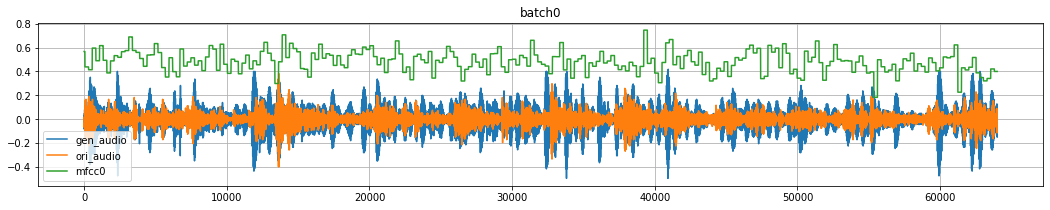

In [7]:
import dataloader.transforms as tr

for i in range(output.shape[0]):
    #d_samp = tr.onehotDecode()(audio[0].numpy())
    re_samp = tr.mulawDecode(256,norm=True)(audio[i].numpy())
    

    plt.figure(figsize=(18,3))
    plt.title('batch'+str(i))
    plt.plot(output[i],label='gen_audio') #generated
    plt.plot(re_samp,label='ori_audio')  #the original audio sequence

    #plt.plot(params[i,:,0].numpy(),label='fill')
    #plt.plot(params[i,:,1].numpy(),label='rmse')
    #plt.plot(params[i,:,2].numpy(),label='centroid')
    #plt.plot(params[i,:,3].numpy(),label='pitch')
    plt.plot(params[i,:,4].numpy(),label='mfcc0')
    plt.legend()
    plt.grid()
    plt.show()

### Test generation params - tier 3

(1, 700, 1)


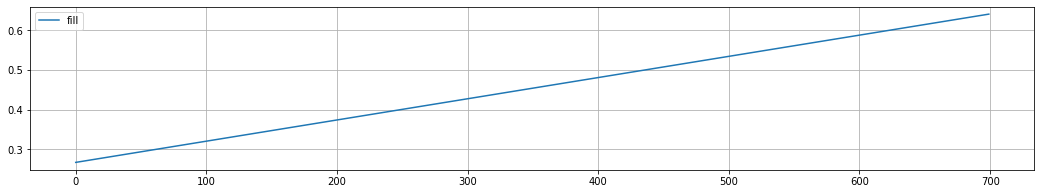

In [2]:
fill = np.hstack(np.linspace(0,1,1873))
fill_sub = fill[500:1200].reshape(1,-1,1)
print(fill_sub.shape)
plt.figure(figsize=(18,3)) 
plt.plot(fill_sub[0],label='fill') #rmse
plt.legend()
plt.grid()
plt.show()

In [6]:
np.save("fill",fill_sub)

In [7]:
from generate import Generator

class Args:
    hidden_size = 300
    n_layers = 3
    sample_rate = 125
    seq_len = 1325
    stride = 1
    mulaw_channels = 256
    batch_size = 1
    param_dir = 'data/metal_mono/param'
    prop = ['fill']
    generate = ['rmse', 'centroid', 'pitch']#, 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12']
    gen_size = 3
    cond_size = 1
    onehot = False
    seed = None
    model_dir = 'output/tier3_w_norm3/model'
    step = 4000
    length = 1200
    data_dir = 'data/metal_mono/audio'
    paramvect = 'external'
    out = 'generated_param_tier3'
    temp = 0.9
    external_array = 'fill.npy'
    external_sr = 63
    save = True
    

args=Args()

In [8]:
generator = Generator(args)
output, params = generator.generate()  #fill_sub,63
print(output.shape)
print(params.shape)
#print(gen.shape)

RnnBlockNorm(
  (i2d): Linear(in_features=4, out_features=12, bias=True)
  (d2h): Linear(in_features=12, out_features=300, bias=True)
  (gru): GRU(300, 300, num_layers=3, batch_first=True)
  (h2n): Linear(in_features=300, out_features=3, bias=True)
  (h2v): Linear(in_features=300, out_features=3, bias=True)
)
Loading model from output/tier3_w_norm3/model
priming...
DONE
1/1200 samples are generated.
2/1200 samples are generated.
3/1200 samples are generated.
4/1200 samples are generated.
5/1200 samples are generated.
6/1200 samples are generated.
7/1200 samples are generated.
8/1200 samples are generated.
9/1200 samples are generated.
10/1200 samples are generated.
11/1200 samples are generated.
12/1200 samples are generated.
13/1200 samples are generated.
14/1200 samples are generated.
15/1200 samples are generated.
16/1200 samples are generated.
17/1200 samples are generated.
18/1200 samples are generated.
19/1200 samples are generated.
20/1200 samples are generated.
21/1200 samples 

504/1200 samples are generated.
505/1200 samples are generated.
506/1200 samples are generated.
507/1200 samples are generated.
508/1200 samples are generated.
509/1200 samples are generated.
510/1200 samples are generated.
511/1200 samples are generated.
512/1200 samples are generated.
513/1200 samples are generated.
514/1200 samples are generated.
515/1200 samples are generated.
516/1200 samples are generated.
517/1200 samples are generated.
518/1200 samples are generated.
519/1200 samples are generated.
520/1200 samples are generated.
521/1200 samples are generated.
522/1200 samples are generated.
523/1200 samples are generated.
524/1200 samples are generated.
525/1200 samples are generated.
526/1200 samples are generated.
527/1200 samples are generated.
528/1200 samples are generated.
529/1200 samples are generated.
530/1200 samples are generated.
531/1200 samples are generated.
532/1200 samples are generated.
533/1200 samples are generated.
534/1200 samples are generated.
535/1200

1015/1200 samples are generated.
1016/1200 samples are generated.
1017/1200 samples are generated.
1018/1200 samples are generated.
1019/1200 samples are generated.
1020/1200 samples are generated.
1021/1200 samples are generated.
1022/1200 samples are generated.
1023/1200 samples are generated.
1024/1200 samples are generated.
1025/1200 samples are generated.
1026/1200 samples are generated.
1027/1200 samples are generated.
1028/1200 samples are generated.
1029/1200 samples are generated.
1030/1200 samples are generated.
1031/1200 samples are generated.
1032/1200 samples are generated.
1033/1200 samples are generated.
1034/1200 samples are generated.
1035/1200 samples are generated.
1036/1200 samples are generated.
1037/1200 samples are generated.
1038/1200 samples are generated.
1039/1200 samples are generated.
1040/1200 samples are generated.
1041/1200 samples are generated.
1042/1200 samples are generated.
1043/1200 samples are generated.
1044/1200 samples are generated.
1045/1200 

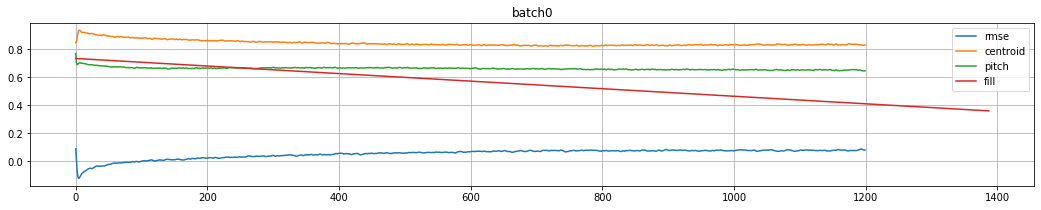

In [15]:
for i in range(output.shape[0]):

    plt.figure(figsize=(18,3))
    plt.title('batch'+str(i))
    plt.plot(output[i,:,0],label='rmse') 
    plt.plot(output[i,:,1],label='centroid') 
    plt.plot(output[i,:,2],label='pitch') 
    #plt.plot(output[i,:,3],label='mfcc0')
    #plt.plot(output[i,:,4],label='mfcc1')
    #plt.plot(output[i,:,5],label='mfcc2')
    #plt.plot(output[i,:,6],label='mfcc3')
    #plt.plot(output[i,:,15],label='mfcc12')
    #plt.plot(gen[i,:,0],label='ori_rmse')
    #plt.plot(gen[i,:,1],label='ori_centroid')
    #plt.plot(gen[i,:,2],label='ori_pitch')
    #plt.plot(gen[i,:,3],label='ori_mfcc0')
    #plt.plot(gen[i,:,4],label='ori_mfcc1') 
    #plt.plot(gen[i,:,5],label='ori_mfcc2') 
    #plt.plot(gen[i,:,6],label='ori_mfcc3') 
    #plt.plot(gen[i,:,15],label='ori_mfcc12') 
    plt.plot(params[i,:,0],label='fill') 
    plt.legend()
    plt.grid()
    plt.show()
    
    """
    plt.figure(figsize=(18,3)) 
    plt.plot(output[i,:,1],label='gen_rmse') #rmse
    plt.plot(params[i,:,1],label='rmse')
    plt.legend()
    plt.grid()
    plt.show()
    """


In [16]:
output = output[:,200:1200,:]
print(output.shape)

(1, 1000, 3)


So far using MSE loss with the model doing regression directly results in the model smoothing/average out the output values, the trajectory is correct but without the random(?) fluctuation. Try output parameters to a normal distribution instead then sample -- Now implemented

### Test generation params - tier 2

In [17]:
from generate import Generator

class Args:
    hidden_size = 500
    n_layers = 3
    sample_rate = 500
    seq_len = 4500
    stride = 1
    mulaw_channels = 256
    batch_size = 1
    param_dir = 'data/metal_mono/param'
    prop = ['rmse', 'centroid', 'pitch']
    generate = ['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12']
    gen_size = 13
    cond_size = 3
    onehot = False
    seed = None
    model_dir = 'output/tier2_w_norm/model'
    step = 6000
    length = 4000
    data_dir = 'data/metal_mono/audio'
    paramvect = 'external'
    out = 'generated_param'
    temp = 0.9

args=Args()

In [18]:
generator = Generator(args)
output2, cond_params = generator.generate(output,125)
print(output2.shape)

RnnBlockNorm(
  (i2d): Linear(in_features=16, out_features=48, bias=True)
  (d2h): Linear(in_features=48, out_features=500, bias=True)
  (gru): GRU(500, 500, num_layers=3, batch_first=True)
  (h2n): Linear(in_features=500, out_features=13, bias=True)
  (h2v): Linear(in_features=500, out_features=13, bias=True)
)
Loading model from output/tier2_w_norm/model
1/4000 samples are generated.
2/4000 samples are generated.
3/4000 samples are generated.
4/4000 samples are generated.
5/4000 samples are generated.
6/4000 samples are generated.
7/4000 samples are generated.
8/4000 samples are generated.
9/4000 samples are generated.
10/4000 samples are generated.
11/4000 samples are generated.
12/4000 samples are generated.
13/4000 samples are generated.
14/4000 samples are generated.
15/4000 samples are generated.
16/4000 samples are generated.
17/4000 samples are generated.
18/4000 samples are generated.
19/4000 samples are generated.
20/4000 samples are generated.
21/4000 samples are generated.

505/4000 samples are generated.
506/4000 samples are generated.
507/4000 samples are generated.
508/4000 samples are generated.
509/4000 samples are generated.
510/4000 samples are generated.
511/4000 samples are generated.
512/4000 samples are generated.
513/4000 samples are generated.
514/4000 samples are generated.
515/4000 samples are generated.
516/4000 samples are generated.
517/4000 samples are generated.
518/4000 samples are generated.
519/4000 samples are generated.
520/4000 samples are generated.
521/4000 samples are generated.
522/4000 samples are generated.
523/4000 samples are generated.
524/4000 samples are generated.
525/4000 samples are generated.
526/4000 samples are generated.
527/4000 samples are generated.
528/4000 samples are generated.
529/4000 samples are generated.
530/4000 samples are generated.
531/4000 samples are generated.
532/4000 samples are generated.
533/4000 samples are generated.
534/4000 samples are generated.
535/4000 samples are generated.
536/4000

1016/4000 samples are generated.
1017/4000 samples are generated.
1018/4000 samples are generated.
1019/4000 samples are generated.
1020/4000 samples are generated.
1021/4000 samples are generated.
1022/4000 samples are generated.
1023/4000 samples are generated.
1024/4000 samples are generated.
1025/4000 samples are generated.
1026/4000 samples are generated.
1027/4000 samples are generated.
1028/4000 samples are generated.
1029/4000 samples are generated.
1030/4000 samples are generated.
1031/4000 samples are generated.
1032/4000 samples are generated.
1033/4000 samples are generated.
1034/4000 samples are generated.
1035/4000 samples are generated.
1036/4000 samples are generated.
1037/4000 samples are generated.
1038/4000 samples are generated.
1039/4000 samples are generated.
1040/4000 samples are generated.
1041/4000 samples are generated.
1042/4000 samples are generated.
1043/4000 samples are generated.
1044/4000 samples are generated.
1045/4000 samples are generated.
1046/4000 

1512/4000 samples are generated.
1513/4000 samples are generated.
1514/4000 samples are generated.
1515/4000 samples are generated.
1516/4000 samples are generated.
1517/4000 samples are generated.
1518/4000 samples are generated.
1519/4000 samples are generated.
1520/4000 samples are generated.
1521/4000 samples are generated.
1522/4000 samples are generated.
1523/4000 samples are generated.
1524/4000 samples are generated.
1525/4000 samples are generated.
1526/4000 samples are generated.
1527/4000 samples are generated.
1528/4000 samples are generated.
1529/4000 samples are generated.
1530/4000 samples are generated.
1531/4000 samples are generated.
1532/4000 samples are generated.
1533/4000 samples are generated.
1534/4000 samples are generated.
1535/4000 samples are generated.
1536/4000 samples are generated.
1537/4000 samples are generated.
1538/4000 samples are generated.
1539/4000 samples are generated.
1540/4000 samples are generated.
1541/4000 samples are generated.
1542/4000 

2008/4000 samples are generated.
2009/4000 samples are generated.
2010/4000 samples are generated.
2011/4000 samples are generated.
2012/4000 samples are generated.
2013/4000 samples are generated.
2014/4000 samples are generated.
2015/4000 samples are generated.
2016/4000 samples are generated.
2017/4000 samples are generated.
2018/4000 samples are generated.
2019/4000 samples are generated.
2020/4000 samples are generated.
2021/4000 samples are generated.
2022/4000 samples are generated.
2023/4000 samples are generated.
2024/4000 samples are generated.
2025/4000 samples are generated.
2026/4000 samples are generated.
2027/4000 samples are generated.
2028/4000 samples are generated.
2029/4000 samples are generated.
2030/4000 samples are generated.
2031/4000 samples are generated.
2032/4000 samples are generated.
2033/4000 samples are generated.
2034/4000 samples are generated.
2035/4000 samples are generated.
2036/4000 samples are generated.
2037/4000 samples are generated.
2038/4000 

2504/4000 samples are generated.
2505/4000 samples are generated.
2506/4000 samples are generated.
2507/4000 samples are generated.
2508/4000 samples are generated.
2509/4000 samples are generated.
2510/4000 samples are generated.
2511/4000 samples are generated.
2512/4000 samples are generated.
2513/4000 samples are generated.
2514/4000 samples are generated.
2515/4000 samples are generated.
2516/4000 samples are generated.
2517/4000 samples are generated.
2518/4000 samples are generated.
2519/4000 samples are generated.
2520/4000 samples are generated.
2521/4000 samples are generated.
2522/4000 samples are generated.
2523/4000 samples are generated.
2524/4000 samples are generated.
2525/4000 samples are generated.
2526/4000 samples are generated.
2527/4000 samples are generated.
2528/4000 samples are generated.
2529/4000 samples are generated.
2530/4000 samples are generated.
2531/4000 samples are generated.
2532/4000 samples are generated.
2533/4000 samples are generated.
2534/4000 

3000/4000 samples are generated.
3001/4000 samples are generated.
3002/4000 samples are generated.
3003/4000 samples are generated.
3004/4000 samples are generated.
3005/4000 samples are generated.
3006/4000 samples are generated.
3007/4000 samples are generated.
3008/4000 samples are generated.
3009/4000 samples are generated.
3010/4000 samples are generated.
3011/4000 samples are generated.
3012/4000 samples are generated.
3013/4000 samples are generated.
3014/4000 samples are generated.
3015/4000 samples are generated.
3016/4000 samples are generated.
3017/4000 samples are generated.
3018/4000 samples are generated.
3019/4000 samples are generated.
3020/4000 samples are generated.
3021/4000 samples are generated.
3022/4000 samples are generated.
3023/4000 samples are generated.
3024/4000 samples are generated.
3025/4000 samples are generated.
3026/4000 samples are generated.
3027/4000 samples are generated.
3028/4000 samples are generated.
3029/4000 samples are generated.
3030/4000 

3496/4000 samples are generated.
3497/4000 samples are generated.
3498/4000 samples are generated.
3499/4000 samples are generated.
3500/4000 samples are generated.
3501/4000 samples are generated.
3502/4000 samples are generated.
3503/4000 samples are generated.
3504/4000 samples are generated.
3505/4000 samples are generated.
3506/4000 samples are generated.
3507/4000 samples are generated.
3508/4000 samples are generated.
3509/4000 samples are generated.
3510/4000 samples are generated.
3511/4000 samples are generated.
3512/4000 samples are generated.
3513/4000 samples are generated.
3514/4000 samples are generated.
3515/4000 samples are generated.
3516/4000 samples are generated.
3517/4000 samples are generated.
3518/4000 samples are generated.
3519/4000 samples are generated.
3520/4000 samples are generated.
3521/4000 samples are generated.
3522/4000 samples are generated.
3523/4000 samples are generated.
3524/4000 samples are generated.
3525/4000 samples are generated.
3526/4000 

3992/4000 samples are generated.
3993/4000 samples are generated.
3994/4000 samples are generated.
3995/4000 samples are generated.
3996/4000 samples are generated.
3997/4000 samples are generated.
3998/4000 samples are generated.
3999/4000 samples are generated.
4000/4000 samples are generated.
(1, 4000, 13)


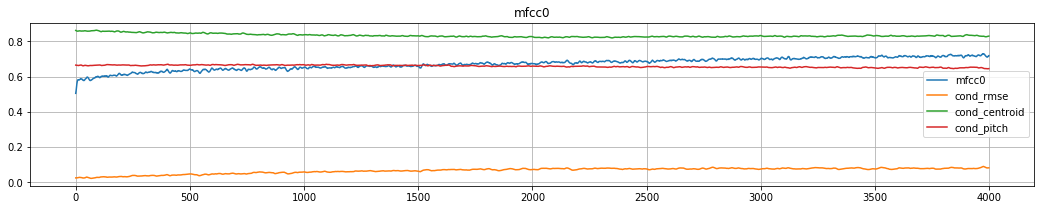

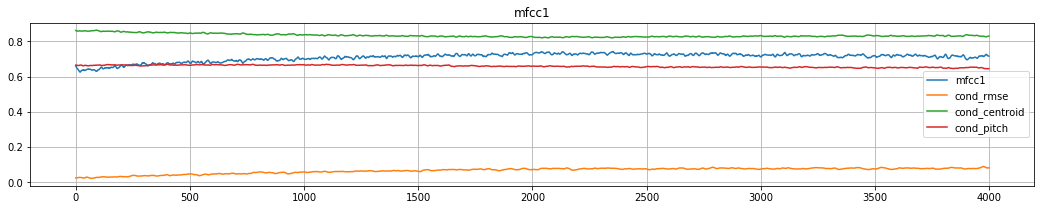

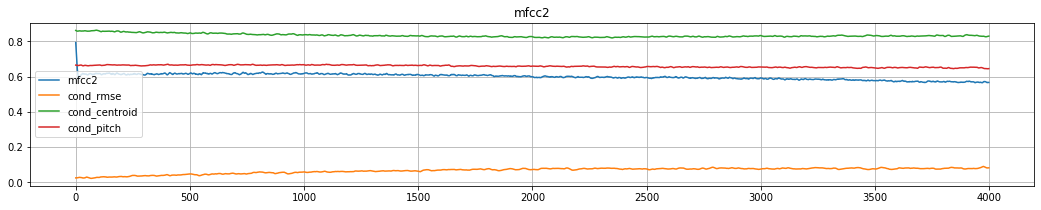

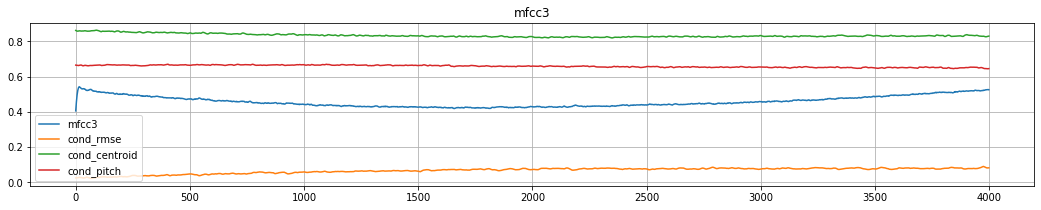

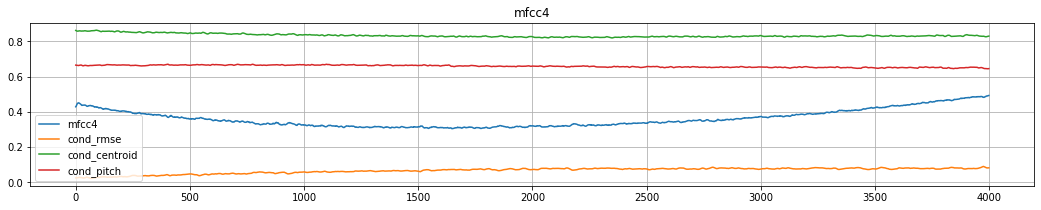

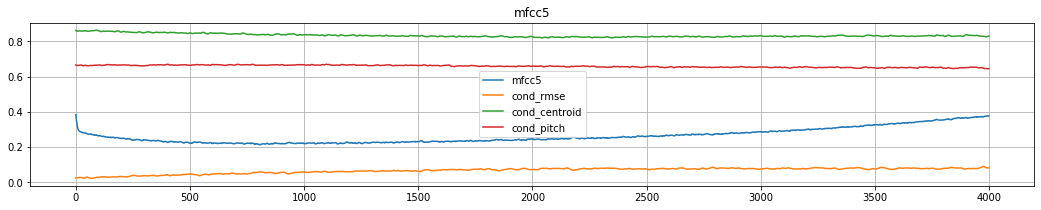

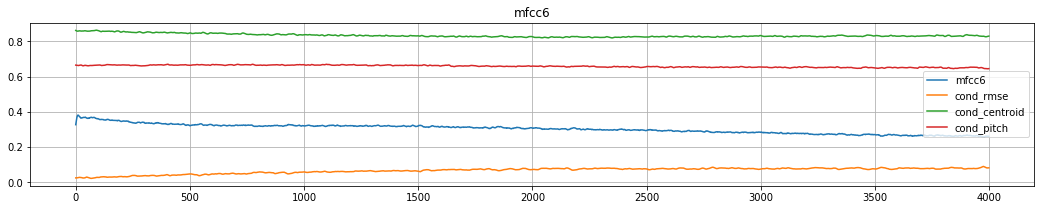

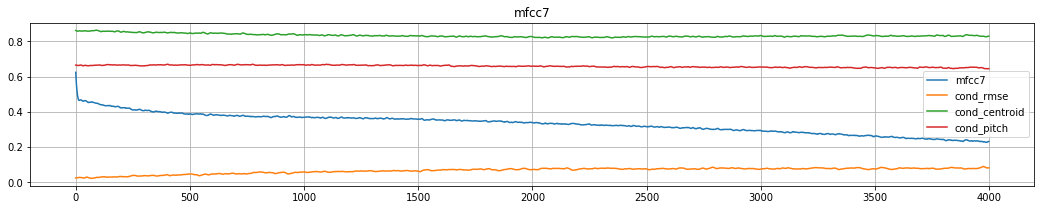

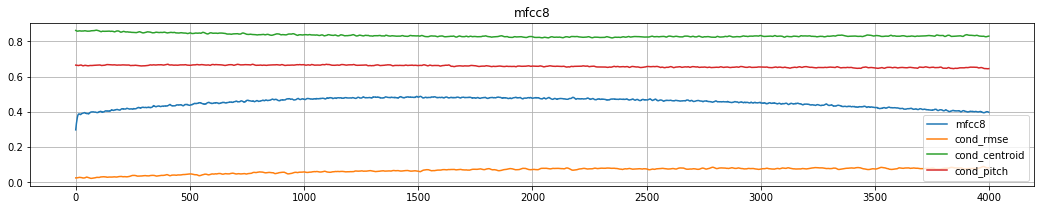

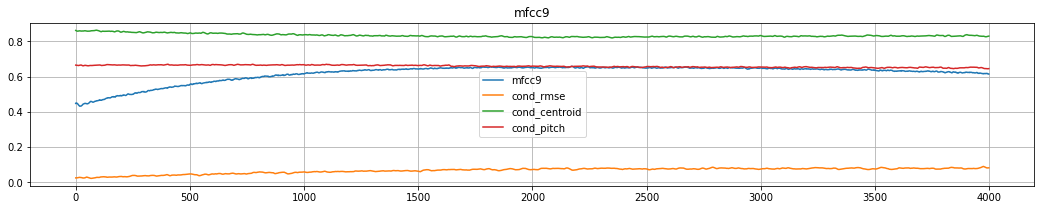

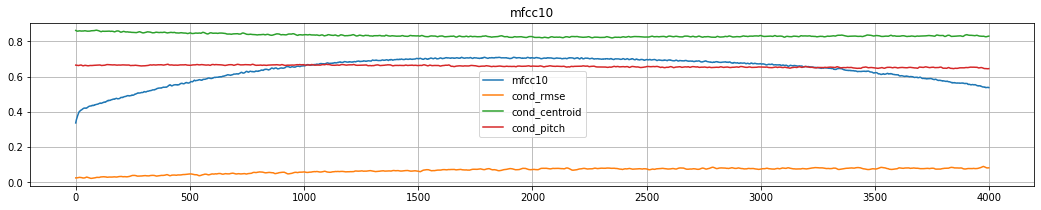

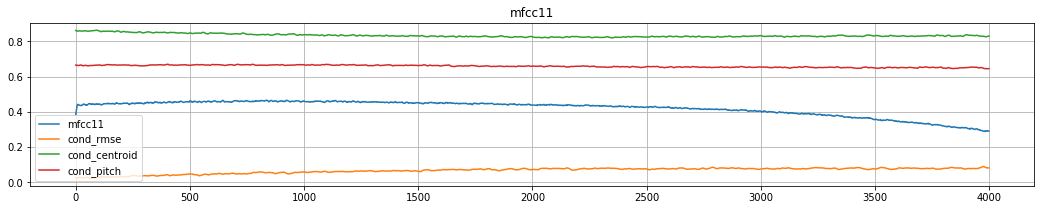

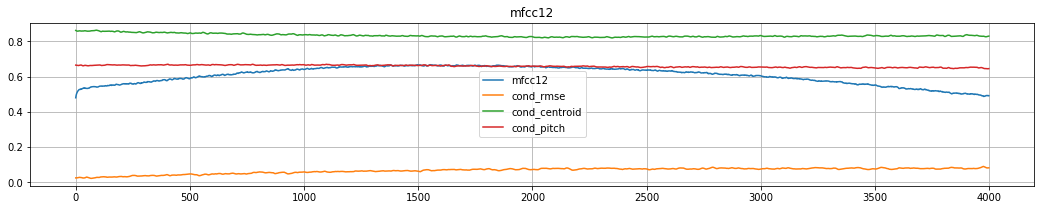

In [19]:
for i in range(output.shape[0]):
    for n in range(13):
        plt.figure(figsize=(18,3))
        plt.title('mfcc'+str(n))
        plt.plot(output2[i,:,n],label='mfcc'+str(n))
        plt.plot(cond_params[i,:,0],label='cond_rmse') 
        plt.plot(cond_params[i,:,1],label='cond_centroid') 
        plt.plot(cond_params[i,:,2],label='cond_pitch') 
        #plt.plot(params[i,:,0],label='fill') 
        plt.legend()
        plt.grid()
        plt.show()

In [20]:
output2 = output2[:,100:4000,:]
print(output2.shape)

(1, 3900, 13)


### Test generation audio - tier 1

In [21]:
from generate import Generator

class Args:
    hidden_size = 800
    n_layers = 3
    sample_rate = 16000
    seq_len = 49000
    stride = 1
    mulaw_channels = 256
    batch_size = 1
    param_dir = 'data/metal_mono/param'
    prop = ['mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12']
    generate = ['audio']
    gen_size = 1
    cond_size = 13
    onehot = False
    seed = None
    model_dir = 'output/tier1_w_norm/model'
    step = 30000
    length = 48000
    data_dir = 'data/metal_mono/audio'
    paramvect = 'external'
    out = 'generated_param1'
    temp = 0.9

args=Args()

In [22]:
generator = Generator(args)
audioout, cond_params2 = generator.generate(output2,500)
print(audioout.shape)

RnnBlock(
  (i2d): Linear(in_features=14, out_features=42, bias=True)
  (d2h): Linear(in_features=42, out_features=800, bias=True)
  (gru): GRU(800, 800, num_layers=3, batch_first=True)
  (h2o): Linear(in_features=800, out_features=256, bias=True)
)
Loading model from output/tier1_w_norm/model
1/48000 samples are generated.
2/48000 samples are generated.
3/48000 samples are generated.
4/48000 samples are generated.
5/48000 samples are generated.
6/48000 samples are generated.
7/48000 samples are generated.
8/48000 samples are generated.
9/48000 samples are generated.
10/48000 samples are generated.
11/48000 samples are generated.
12/48000 samples are generated.
13/48000 samples are generated.
14/48000 samples are generated.
15/48000 samples are generated.
16/48000 samples are generated.
17/48000 samples are generated.
18/48000 samples are generated.
19/48000 samples are generated.
20/48000 samples are generated.
21/48000 samples are generated.
22/48000 samples are generated.
23/48000 s

491/48000 samples are generated.
492/48000 samples are generated.
493/48000 samples are generated.
494/48000 samples are generated.
495/48000 samples are generated.
496/48000 samples are generated.
497/48000 samples are generated.
498/48000 samples are generated.
499/48000 samples are generated.
500/48000 samples are generated.
501/48000 samples are generated.
502/48000 samples are generated.
503/48000 samples are generated.
504/48000 samples are generated.
505/48000 samples are generated.
506/48000 samples are generated.
507/48000 samples are generated.
508/48000 samples are generated.
509/48000 samples are generated.
510/48000 samples are generated.
511/48000 samples are generated.
512/48000 samples are generated.
513/48000 samples are generated.
514/48000 samples are generated.
515/48000 samples are generated.
516/48000 samples are generated.
517/48000 samples are generated.
518/48000 samples are generated.
519/48000 samples are generated.
520/48000 samples are generated.
521/48000 

987/48000 samples are generated.
988/48000 samples are generated.
989/48000 samples are generated.
990/48000 samples are generated.
991/48000 samples are generated.
992/48000 samples are generated.
993/48000 samples are generated.
994/48000 samples are generated.
995/48000 samples are generated.
996/48000 samples are generated.
997/48000 samples are generated.
998/48000 samples are generated.
999/48000 samples are generated.
1000/48000 samples are generated.
1001/48000 samples are generated.
1002/48000 samples are generated.
1003/48000 samples are generated.
1004/48000 samples are generated.
1005/48000 samples are generated.
1006/48000 samples are generated.
1007/48000 samples are generated.
1008/48000 samples are generated.
1009/48000 samples are generated.
1010/48000 samples are generated.
1011/48000 samples are generated.
1012/48000 samples are generated.
1013/48000 samples are generated.
1014/48000 samples are generated.
1015/48000 samples are generated.
1016/48000 samples are gene

1468/48000 samples are generated.
1469/48000 samples are generated.
1470/48000 samples are generated.
1471/48000 samples are generated.
1472/48000 samples are generated.
1473/48000 samples are generated.
1474/48000 samples are generated.
1475/48000 samples are generated.
1476/48000 samples are generated.
1477/48000 samples are generated.
1478/48000 samples are generated.
1479/48000 samples are generated.
1480/48000 samples are generated.
1481/48000 samples are generated.
1482/48000 samples are generated.
1483/48000 samples are generated.
1484/48000 samples are generated.
1485/48000 samples are generated.
1486/48000 samples are generated.
1487/48000 samples are generated.
1488/48000 samples are generated.
1489/48000 samples are generated.
1490/48000 samples are generated.
1491/48000 samples are generated.
1492/48000 samples are generated.
1493/48000 samples are generated.
1494/48000 samples are generated.
1495/48000 samples are generated.
1496/48000 samples are generated.
1497/48000 sam

1948/48000 samples are generated.
1949/48000 samples are generated.
1950/48000 samples are generated.
1951/48000 samples are generated.
1952/48000 samples are generated.
1953/48000 samples are generated.
1954/48000 samples are generated.
1955/48000 samples are generated.
1956/48000 samples are generated.
1957/48000 samples are generated.
1958/48000 samples are generated.
1959/48000 samples are generated.
1960/48000 samples are generated.
1961/48000 samples are generated.
1962/48000 samples are generated.
1963/48000 samples are generated.
1964/48000 samples are generated.
1965/48000 samples are generated.
1966/48000 samples are generated.
1967/48000 samples are generated.
1968/48000 samples are generated.
1969/48000 samples are generated.
1970/48000 samples are generated.
1971/48000 samples are generated.
1972/48000 samples are generated.
1973/48000 samples are generated.
1974/48000 samples are generated.
1975/48000 samples are generated.
1976/48000 samples are generated.
1977/48000 sam

2428/48000 samples are generated.
2429/48000 samples are generated.
2430/48000 samples are generated.
2431/48000 samples are generated.
2432/48000 samples are generated.
2433/48000 samples are generated.
2434/48000 samples are generated.
2435/48000 samples are generated.
2436/48000 samples are generated.
2437/48000 samples are generated.
2438/48000 samples are generated.
2439/48000 samples are generated.
2440/48000 samples are generated.
2441/48000 samples are generated.
2442/48000 samples are generated.
2443/48000 samples are generated.
2444/48000 samples are generated.
2445/48000 samples are generated.
2446/48000 samples are generated.
2447/48000 samples are generated.
2448/48000 samples are generated.
2449/48000 samples are generated.
2450/48000 samples are generated.
2451/48000 samples are generated.
2452/48000 samples are generated.
2453/48000 samples are generated.
2454/48000 samples are generated.
2455/48000 samples are generated.
2456/48000 samples are generated.
2457/48000 sam

2908/48000 samples are generated.
2909/48000 samples are generated.
2910/48000 samples are generated.
2911/48000 samples are generated.
2912/48000 samples are generated.
2913/48000 samples are generated.
2914/48000 samples are generated.
2915/48000 samples are generated.
2916/48000 samples are generated.
2917/48000 samples are generated.
2918/48000 samples are generated.
2919/48000 samples are generated.
2920/48000 samples are generated.
2921/48000 samples are generated.
2922/48000 samples are generated.
2923/48000 samples are generated.
2924/48000 samples are generated.
2925/48000 samples are generated.
2926/48000 samples are generated.
2927/48000 samples are generated.
2928/48000 samples are generated.
2929/48000 samples are generated.
2930/48000 samples are generated.
2931/48000 samples are generated.
2932/48000 samples are generated.
2933/48000 samples are generated.
2934/48000 samples are generated.
2935/48000 samples are generated.
2936/48000 samples are generated.
2937/48000 sam

3388/48000 samples are generated.
3389/48000 samples are generated.
3390/48000 samples are generated.
3391/48000 samples are generated.
3392/48000 samples are generated.
3393/48000 samples are generated.
3394/48000 samples are generated.
3395/48000 samples are generated.
3396/48000 samples are generated.
3397/48000 samples are generated.
3398/48000 samples are generated.
3399/48000 samples are generated.
3400/48000 samples are generated.
3401/48000 samples are generated.
3402/48000 samples are generated.
3403/48000 samples are generated.
3404/48000 samples are generated.
3405/48000 samples are generated.
3406/48000 samples are generated.
3407/48000 samples are generated.
3408/48000 samples are generated.
3409/48000 samples are generated.
3410/48000 samples are generated.
3411/48000 samples are generated.
3412/48000 samples are generated.
3413/48000 samples are generated.
3414/48000 samples are generated.
3415/48000 samples are generated.
3416/48000 samples are generated.
3417/48000 sam

3868/48000 samples are generated.
3869/48000 samples are generated.
3870/48000 samples are generated.
3871/48000 samples are generated.
3872/48000 samples are generated.
3873/48000 samples are generated.
3874/48000 samples are generated.
3875/48000 samples are generated.
3876/48000 samples are generated.
3877/48000 samples are generated.
3878/48000 samples are generated.
3879/48000 samples are generated.
3880/48000 samples are generated.
3881/48000 samples are generated.
3882/48000 samples are generated.
3883/48000 samples are generated.
3884/48000 samples are generated.
3885/48000 samples are generated.
3886/48000 samples are generated.
3887/48000 samples are generated.
3888/48000 samples are generated.
3889/48000 samples are generated.
3890/48000 samples are generated.
3891/48000 samples are generated.
3892/48000 samples are generated.
3893/48000 samples are generated.
3894/48000 samples are generated.
3895/48000 samples are generated.
3896/48000 samples are generated.
3897/48000 sam

4348/48000 samples are generated.
4349/48000 samples are generated.
4350/48000 samples are generated.
4351/48000 samples are generated.
4352/48000 samples are generated.
4353/48000 samples are generated.
4354/48000 samples are generated.
4355/48000 samples are generated.
4356/48000 samples are generated.
4357/48000 samples are generated.
4358/48000 samples are generated.
4359/48000 samples are generated.
4360/48000 samples are generated.
4361/48000 samples are generated.
4362/48000 samples are generated.
4363/48000 samples are generated.
4364/48000 samples are generated.
4365/48000 samples are generated.
4366/48000 samples are generated.
4367/48000 samples are generated.
4368/48000 samples are generated.
4369/48000 samples are generated.
4370/48000 samples are generated.
4371/48000 samples are generated.
4372/48000 samples are generated.
4373/48000 samples are generated.
4374/48000 samples are generated.
4375/48000 samples are generated.
4376/48000 samples are generated.
4377/48000 sam

4828/48000 samples are generated.
4829/48000 samples are generated.
4830/48000 samples are generated.
4831/48000 samples are generated.
4832/48000 samples are generated.
4833/48000 samples are generated.
4834/48000 samples are generated.
4835/48000 samples are generated.
4836/48000 samples are generated.
4837/48000 samples are generated.
4838/48000 samples are generated.
4839/48000 samples are generated.
4840/48000 samples are generated.
4841/48000 samples are generated.
4842/48000 samples are generated.
4843/48000 samples are generated.
4844/48000 samples are generated.
4845/48000 samples are generated.
4846/48000 samples are generated.
4847/48000 samples are generated.
4848/48000 samples are generated.
4849/48000 samples are generated.
4850/48000 samples are generated.
4851/48000 samples are generated.
4852/48000 samples are generated.
4853/48000 samples are generated.
4854/48000 samples are generated.
4855/48000 samples are generated.
4856/48000 samples are generated.
4857/48000 sam

5308/48000 samples are generated.
5309/48000 samples are generated.
5310/48000 samples are generated.
5311/48000 samples are generated.
5312/48000 samples are generated.
5313/48000 samples are generated.
5314/48000 samples are generated.
5315/48000 samples are generated.
5316/48000 samples are generated.
5317/48000 samples are generated.
5318/48000 samples are generated.
5319/48000 samples are generated.
5320/48000 samples are generated.
5321/48000 samples are generated.
5322/48000 samples are generated.
5323/48000 samples are generated.
5324/48000 samples are generated.
5325/48000 samples are generated.
5326/48000 samples are generated.
5327/48000 samples are generated.
5328/48000 samples are generated.
5329/48000 samples are generated.
5330/48000 samples are generated.
5331/48000 samples are generated.
5332/48000 samples are generated.
5333/48000 samples are generated.
5334/48000 samples are generated.
5335/48000 samples are generated.
5336/48000 samples are generated.
5337/48000 sam

5788/48000 samples are generated.
5789/48000 samples are generated.
5790/48000 samples are generated.
5791/48000 samples are generated.
5792/48000 samples are generated.
5793/48000 samples are generated.
5794/48000 samples are generated.
5795/48000 samples are generated.
5796/48000 samples are generated.
5797/48000 samples are generated.
5798/48000 samples are generated.
5799/48000 samples are generated.
5800/48000 samples are generated.
5801/48000 samples are generated.
5802/48000 samples are generated.
5803/48000 samples are generated.
5804/48000 samples are generated.
5805/48000 samples are generated.
5806/48000 samples are generated.
5807/48000 samples are generated.
5808/48000 samples are generated.
5809/48000 samples are generated.
5810/48000 samples are generated.
5811/48000 samples are generated.
5812/48000 samples are generated.
5813/48000 samples are generated.
5814/48000 samples are generated.
5815/48000 samples are generated.
5816/48000 samples are generated.
5817/48000 sam

6268/48000 samples are generated.
6269/48000 samples are generated.
6270/48000 samples are generated.
6271/48000 samples are generated.
6272/48000 samples are generated.
6273/48000 samples are generated.
6274/48000 samples are generated.
6275/48000 samples are generated.
6276/48000 samples are generated.
6277/48000 samples are generated.
6278/48000 samples are generated.
6279/48000 samples are generated.
6280/48000 samples are generated.
6281/48000 samples are generated.
6282/48000 samples are generated.
6283/48000 samples are generated.
6284/48000 samples are generated.
6285/48000 samples are generated.
6286/48000 samples are generated.
6287/48000 samples are generated.
6288/48000 samples are generated.
6289/48000 samples are generated.
6290/48000 samples are generated.
6291/48000 samples are generated.
6292/48000 samples are generated.
6293/48000 samples are generated.
6294/48000 samples are generated.
6295/48000 samples are generated.
6296/48000 samples are generated.
6297/48000 sam

6748/48000 samples are generated.
6749/48000 samples are generated.
6750/48000 samples are generated.
6751/48000 samples are generated.
6752/48000 samples are generated.
6753/48000 samples are generated.
6754/48000 samples are generated.
6755/48000 samples are generated.
6756/48000 samples are generated.
6757/48000 samples are generated.
6758/48000 samples are generated.
6759/48000 samples are generated.
6760/48000 samples are generated.
6761/48000 samples are generated.
6762/48000 samples are generated.
6763/48000 samples are generated.
6764/48000 samples are generated.
6765/48000 samples are generated.
6766/48000 samples are generated.
6767/48000 samples are generated.
6768/48000 samples are generated.
6769/48000 samples are generated.
6770/48000 samples are generated.
6771/48000 samples are generated.
6772/48000 samples are generated.
6773/48000 samples are generated.
6774/48000 samples are generated.
6775/48000 samples are generated.
6776/48000 samples are generated.
6777/48000 sam

7228/48000 samples are generated.
7229/48000 samples are generated.
7230/48000 samples are generated.
7231/48000 samples are generated.
7232/48000 samples are generated.
7233/48000 samples are generated.
7234/48000 samples are generated.
7235/48000 samples are generated.
7236/48000 samples are generated.
7237/48000 samples are generated.
7238/48000 samples are generated.
7239/48000 samples are generated.
7240/48000 samples are generated.
7241/48000 samples are generated.
7242/48000 samples are generated.
7243/48000 samples are generated.
7244/48000 samples are generated.
7245/48000 samples are generated.
7246/48000 samples are generated.
7247/48000 samples are generated.
7248/48000 samples are generated.
7249/48000 samples are generated.
7250/48000 samples are generated.
7251/48000 samples are generated.
7252/48000 samples are generated.
7253/48000 samples are generated.
7254/48000 samples are generated.
7255/48000 samples are generated.
7256/48000 samples are generated.
7257/48000 sam

7708/48000 samples are generated.
7709/48000 samples are generated.
7710/48000 samples are generated.
7711/48000 samples are generated.
7712/48000 samples are generated.
7713/48000 samples are generated.
7714/48000 samples are generated.
7715/48000 samples are generated.
7716/48000 samples are generated.
7717/48000 samples are generated.
7718/48000 samples are generated.
7719/48000 samples are generated.
7720/48000 samples are generated.
7721/48000 samples are generated.
7722/48000 samples are generated.
7723/48000 samples are generated.
7724/48000 samples are generated.
7725/48000 samples are generated.
7726/48000 samples are generated.
7727/48000 samples are generated.
7728/48000 samples are generated.
7729/48000 samples are generated.
7730/48000 samples are generated.
7731/48000 samples are generated.
7732/48000 samples are generated.
7733/48000 samples are generated.
7734/48000 samples are generated.
7735/48000 samples are generated.
7736/48000 samples are generated.
7737/48000 sam

8188/48000 samples are generated.
8189/48000 samples are generated.
8190/48000 samples are generated.
8191/48000 samples are generated.
8192/48000 samples are generated.
8193/48000 samples are generated.
8194/48000 samples are generated.
8195/48000 samples are generated.
8196/48000 samples are generated.
8197/48000 samples are generated.
8198/48000 samples are generated.
8199/48000 samples are generated.
8200/48000 samples are generated.
8201/48000 samples are generated.
8202/48000 samples are generated.
8203/48000 samples are generated.
8204/48000 samples are generated.
8205/48000 samples are generated.
8206/48000 samples are generated.
8207/48000 samples are generated.
8208/48000 samples are generated.
8209/48000 samples are generated.
8210/48000 samples are generated.
8211/48000 samples are generated.
8212/48000 samples are generated.
8213/48000 samples are generated.
8214/48000 samples are generated.
8215/48000 samples are generated.
8216/48000 samples are generated.
8217/48000 sam

8668/48000 samples are generated.
8669/48000 samples are generated.
8670/48000 samples are generated.
8671/48000 samples are generated.
8672/48000 samples are generated.
8673/48000 samples are generated.
8674/48000 samples are generated.
8675/48000 samples are generated.
8676/48000 samples are generated.
8677/48000 samples are generated.
8678/48000 samples are generated.
8679/48000 samples are generated.
8680/48000 samples are generated.
8681/48000 samples are generated.
8682/48000 samples are generated.
8683/48000 samples are generated.
8684/48000 samples are generated.
8685/48000 samples are generated.
8686/48000 samples are generated.
8687/48000 samples are generated.
8688/48000 samples are generated.
8689/48000 samples are generated.
8690/48000 samples are generated.
8691/48000 samples are generated.
8692/48000 samples are generated.
8693/48000 samples are generated.
8694/48000 samples are generated.
8695/48000 samples are generated.
8696/48000 samples are generated.
8697/48000 sam

9148/48000 samples are generated.
9149/48000 samples are generated.
9150/48000 samples are generated.
9151/48000 samples are generated.
9152/48000 samples are generated.
9153/48000 samples are generated.
9154/48000 samples are generated.
9155/48000 samples are generated.
9156/48000 samples are generated.
9157/48000 samples are generated.
9158/48000 samples are generated.
9159/48000 samples are generated.
9160/48000 samples are generated.
9161/48000 samples are generated.
9162/48000 samples are generated.
9163/48000 samples are generated.
9164/48000 samples are generated.
9165/48000 samples are generated.
9166/48000 samples are generated.
9167/48000 samples are generated.
9168/48000 samples are generated.
9169/48000 samples are generated.
9170/48000 samples are generated.
9171/48000 samples are generated.
9172/48000 samples are generated.
9173/48000 samples are generated.
9174/48000 samples are generated.
9175/48000 samples are generated.
9176/48000 samples are generated.
9177/48000 sam

9628/48000 samples are generated.
9629/48000 samples are generated.
9630/48000 samples are generated.
9631/48000 samples are generated.
9632/48000 samples are generated.
9633/48000 samples are generated.
9634/48000 samples are generated.
9635/48000 samples are generated.
9636/48000 samples are generated.
9637/48000 samples are generated.
9638/48000 samples are generated.
9639/48000 samples are generated.
9640/48000 samples are generated.
9641/48000 samples are generated.
9642/48000 samples are generated.
9643/48000 samples are generated.
9644/48000 samples are generated.
9645/48000 samples are generated.
9646/48000 samples are generated.
9647/48000 samples are generated.
9648/48000 samples are generated.
9649/48000 samples are generated.
9650/48000 samples are generated.
9651/48000 samples are generated.
9652/48000 samples are generated.
9653/48000 samples are generated.
9654/48000 samples are generated.
9655/48000 samples are generated.
9656/48000 samples are generated.
9657/48000 sam

10105/48000 samples are generated.
10106/48000 samples are generated.
10107/48000 samples are generated.
10108/48000 samples are generated.
10109/48000 samples are generated.
10110/48000 samples are generated.
10111/48000 samples are generated.
10112/48000 samples are generated.
10113/48000 samples are generated.
10114/48000 samples are generated.
10115/48000 samples are generated.
10116/48000 samples are generated.
10117/48000 samples are generated.
10118/48000 samples are generated.
10119/48000 samples are generated.
10120/48000 samples are generated.
10121/48000 samples are generated.
10122/48000 samples are generated.
10123/48000 samples are generated.
10124/48000 samples are generated.
10125/48000 samples are generated.
10126/48000 samples are generated.
10127/48000 samples are generated.
10128/48000 samples are generated.
10129/48000 samples are generated.
10130/48000 samples are generated.
10131/48000 samples are generated.
10132/48000 samples are generated.
10133/48000 samples 

10573/48000 samples are generated.
10574/48000 samples are generated.
10575/48000 samples are generated.
10576/48000 samples are generated.
10577/48000 samples are generated.
10578/48000 samples are generated.
10579/48000 samples are generated.
10580/48000 samples are generated.
10581/48000 samples are generated.
10582/48000 samples are generated.
10583/48000 samples are generated.
10584/48000 samples are generated.
10585/48000 samples are generated.
10586/48000 samples are generated.
10587/48000 samples are generated.
10588/48000 samples are generated.
10589/48000 samples are generated.
10590/48000 samples are generated.
10591/48000 samples are generated.
10592/48000 samples are generated.
10593/48000 samples are generated.
10594/48000 samples are generated.
10595/48000 samples are generated.
10596/48000 samples are generated.
10597/48000 samples are generated.
10598/48000 samples are generated.
10599/48000 samples are generated.
10600/48000 samples are generated.
10601/48000 samples 

11041/48000 samples are generated.
11042/48000 samples are generated.
11043/48000 samples are generated.
11044/48000 samples are generated.
11045/48000 samples are generated.
11046/48000 samples are generated.
11047/48000 samples are generated.
11048/48000 samples are generated.
11049/48000 samples are generated.
11050/48000 samples are generated.
11051/48000 samples are generated.
11052/48000 samples are generated.
11053/48000 samples are generated.
11054/48000 samples are generated.
11055/48000 samples are generated.
11056/48000 samples are generated.
11057/48000 samples are generated.
11058/48000 samples are generated.
11059/48000 samples are generated.
11060/48000 samples are generated.
11061/48000 samples are generated.
11062/48000 samples are generated.
11063/48000 samples are generated.
11064/48000 samples are generated.
11065/48000 samples are generated.
11066/48000 samples are generated.
11067/48000 samples are generated.
11068/48000 samples are generated.
11069/48000 samples 

11509/48000 samples are generated.
11510/48000 samples are generated.
11511/48000 samples are generated.
11512/48000 samples are generated.
11513/48000 samples are generated.
11514/48000 samples are generated.
11515/48000 samples are generated.
11516/48000 samples are generated.
11517/48000 samples are generated.
11518/48000 samples are generated.
11519/48000 samples are generated.
11520/48000 samples are generated.
11521/48000 samples are generated.
11522/48000 samples are generated.
11523/48000 samples are generated.
11524/48000 samples are generated.
11525/48000 samples are generated.
11526/48000 samples are generated.
11527/48000 samples are generated.
11528/48000 samples are generated.
11529/48000 samples are generated.
11530/48000 samples are generated.
11531/48000 samples are generated.
11532/48000 samples are generated.
11533/48000 samples are generated.
11534/48000 samples are generated.
11535/48000 samples are generated.
11536/48000 samples are generated.
11537/48000 samples 

11977/48000 samples are generated.
11978/48000 samples are generated.
11979/48000 samples are generated.
11980/48000 samples are generated.
11981/48000 samples are generated.
11982/48000 samples are generated.
11983/48000 samples are generated.
11984/48000 samples are generated.
11985/48000 samples are generated.
11986/48000 samples are generated.
11987/48000 samples are generated.
11988/48000 samples are generated.
11989/48000 samples are generated.
11990/48000 samples are generated.
11991/48000 samples are generated.
11992/48000 samples are generated.
11993/48000 samples are generated.
11994/48000 samples are generated.
11995/48000 samples are generated.
11996/48000 samples are generated.
11997/48000 samples are generated.
11998/48000 samples are generated.
11999/48000 samples are generated.
12000/48000 samples are generated.
12001/48000 samples are generated.
12002/48000 samples are generated.
12003/48000 samples are generated.
12004/48000 samples are generated.
12005/48000 samples 

12445/48000 samples are generated.
12446/48000 samples are generated.
12447/48000 samples are generated.
12448/48000 samples are generated.
12449/48000 samples are generated.
12450/48000 samples are generated.
12451/48000 samples are generated.
12452/48000 samples are generated.
12453/48000 samples are generated.
12454/48000 samples are generated.
12455/48000 samples are generated.
12456/48000 samples are generated.
12457/48000 samples are generated.
12458/48000 samples are generated.
12459/48000 samples are generated.
12460/48000 samples are generated.
12461/48000 samples are generated.
12462/48000 samples are generated.
12463/48000 samples are generated.
12464/48000 samples are generated.
12465/48000 samples are generated.
12466/48000 samples are generated.
12467/48000 samples are generated.
12468/48000 samples are generated.
12469/48000 samples are generated.
12470/48000 samples are generated.
12471/48000 samples are generated.
12472/48000 samples are generated.
12473/48000 samples 

12913/48000 samples are generated.
12914/48000 samples are generated.
12915/48000 samples are generated.
12916/48000 samples are generated.
12917/48000 samples are generated.
12918/48000 samples are generated.
12919/48000 samples are generated.
12920/48000 samples are generated.
12921/48000 samples are generated.
12922/48000 samples are generated.
12923/48000 samples are generated.
12924/48000 samples are generated.
12925/48000 samples are generated.
12926/48000 samples are generated.
12927/48000 samples are generated.
12928/48000 samples are generated.
12929/48000 samples are generated.
12930/48000 samples are generated.
12931/48000 samples are generated.
12932/48000 samples are generated.
12933/48000 samples are generated.
12934/48000 samples are generated.
12935/48000 samples are generated.
12936/48000 samples are generated.
12937/48000 samples are generated.
12938/48000 samples are generated.
12939/48000 samples are generated.
12940/48000 samples are generated.
12941/48000 samples 

13381/48000 samples are generated.
13382/48000 samples are generated.
13383/48000 samples are generated.
13384/48000 samples are generated.
13385/48000 samples are generated.
13386/48000 samples are generated.
13387/48000 samples are generated.
13388/48000 samples are generated.
13389/48000 samples are generated.
13390/48000 samples are generated.
13391/48000 samples are generated.
13392/48000 samples are generated.
13393/48000 samples are generated.
13394/48000 samples are generated.
13395/48000 samples are generated.
13396/48000 samples are generated.
13397/48000 samples are generated.
13398/48000 samples are generated.
13399/48000 samples are generated.
13400/48000 samples are generated.
13401/48000 samples are generated.
13402/48000 samples are generated.
13403/48000 samples are generated.
13404/48000 samples are generated.
13405/48000 samples are generated.
13406/48000 samples are generated.
13407/48000 samples are generated.
13408/48000 samples are generated.
13409/48000 samples 

13849/48000 samples are generated.
13850/48000 samples are generated.
13851/48000 samples are generated.
13852/48000 samples are generated.
13853/48000 samples are generated.
13854/48000 samples are generated.
13855/48000 samples are generated.
13856/48000 samples are generated.
13857/48000 samples are generated.
13858/48000 samples are generated.
13859/48000 samples are generated.
13860/48000 samples are generated.
13861/48000 samples are generated.
13862/48000 samples are generated.
13863/48000 samples are generated.
13864/48000 samples are generated.
13865/48000 samples are generated.
13866/48000 samples are generated.
13867/48000 samples are generated.
13868/48000 samples are generated.
13869/48000 samples are generated.
13870/48000 samples are generated.
13871/48000 samples are generated.
13872/48000 samples are generated.
13873/48000 samples are generated.
13874/48000 samples are generated.
13875/48000 samples are generated.
13876/48000 samples are generated.
13877/48000 samples 

14317/48000 samples are generated.
14318/48000 samples are generated.
14319/48000 samples are generated.
14320/48000 samples are generated.
14321/48000 samples are generated.
14322/48000 samples are generated.
14323/48000 samples are generated.
14324/48000 samples are generated.
14325/48000 samples are generated.
14326/48000 samples are generated.
14327/48000 samples are generated.
14328/48000 samples are generated.
14329/48000 samples are generated.
14330/48000 samples are generated.
14331/48000 samples are generated.
14332/48000 samples are generated.
14333/48000 samples are generated.
14334/48000 samples are generated.
14335/48000 samples are generated.
14336/48000 samples are generated.
14337/48000 samples are generated.
14338/48000 samples are generated.
14339/48000 samples are generated.
14340/48000 samples are generated.
14341/48000 samples are generated.
14342/48000 samples are generated.
14343/48000 samples are generated.
14344/48000 samples are generated.
14345/48000 samples 

14785/48000 samples are generated.
14786/48000 samples are generated.
14787/48000 samples are generated.
14788/48000 samples are generated.
14789/48000 samples are generated.
14790/48000 samples are generated.
14791/48000 samples are generated.
14792/48000 samples are generated.
14793/48000 samples are generated.
14794/48000 samples are generated.
14795/48000 samples are generated.
14796/48000 samples are generated.
14797/48000 samples are generated.
14798/48000 samples are generated.
14799/48000 samples are generated.
14800/48000 samples are generated.
14801/48000 samples are generated.
14802/48000 samples are generated.
14803/48000 samples are generated.
14804/48000 samples are generated.
14805/48000 samples are generated.
14806/48000 samples are generated.
14807/48000 samples are generated.
14808/48000 samples are generated.
14809/48000 samples are generated.
14810/48000 samples are generated.
14811/48000 samples are generated.
14812/48000 samples are generated.
14813/48000 samples 

15253/48000 samples are generated.
15254/48000 samples are generated.
15255/48000 samples are generated.
15256/48000 samples are generated.
15257/48000 samples are generated.
15258/48000 samples are generated.
15259/48000 samples are generated.
15260/48000 samples are generated.
15261/48000 samples are generated.
15262/48000 samples are generated.
15263/48000 samples are generated.
15264/48000 samples are generated.
15265/48000 samples are generated.
15266/48000 samples are generated.
15267/48000 samples are generated.
15268/48000 samples are generated.
15269/48000 samples are generated.
15270/48000 samples are generated.
15271/48000 samples are generated.
15272/48000 samples are generated.
15273/48000 samples are generated.
15274/48000 samples are generated.
15275/48000 samples are generated.
15276/48000 samples are generated.
15277/48000 samples are generated.
15278/48000 samples are generated.
15279/48000 samples are generated.
15280/48000 samples are generated.
15281/48000 samples 

15721/48000 samples are generated.
15722/48000 samples are generated.
15723/48000 samples are generated.
15724/48000 samples are generated.
15725/48000 samples are generated.
15726/48000 samples are generated.
15727/48000 samples are generated.
15728/48000 samples are generated.
15729/48000 samples are generated.
15730/48000 samples are generated.
15731/48000 samples are generated.
15732/48000 samples are generated.
15733/48000 samples are generated.
15734/48000 samples are generated.
15735/48000 samples are generated.
15736/48000 samples are generated.
15737/48000 samples are generated.
15738/48000 samples are generated.
15739/48000 samples are generated.
15740/48000 samples are generated.
15741/48000 samples are generated.
15742/48000 samples are generated.
15743/48000 samples are generated.
15744/48000 samples are generated.
15745/48000 samples are generated.
15746/48000 samples are generated.
15747/48000 samples are generated.
15748/48000 samples are generated.
15749/48000 samples 

16189/48000 samples are generated.
16190/48000 samples are generated.
16191/48000 samples are generated.
16192/48000 samples are generated.
16193/48000 samples are generated.
16194/48000 samples are generated.
16195/48000 samples are generated.
16196/48000 samples are generated.
16197/48000 samples are generated.
16198/48000 samples are generated.
16199/48000 samples are generated.
16200/48000 samples are generated.
16201/48000 samples are generated.
16202/48000 samples are generated.
16203/48000 samples are generated.
16204/48000 samples are generated.
16205/48000 samples are generated.
16206/48000 samples are generated.
16207/48000 samples are generated.
16208/48000 samples are generated.
16209/48000 samples are generated.
16210/48000 samples are generated.
16211/48000 samples are generated.
16212/48000 samples are generated.
16213/48000 samples are generated.
16214/48000 samples are generated.
16215/48000 samples are generated.
16216/48000 samples are generated.
16217/48000 samples 

16657/48000 samples are generated.
16658/48000 samples are generated.
16659/48000 samples are generated.
16660/48000 samples are generated.
16661/48000 samples are generated.
16662/48000 samples are generated.
16663/48000 samples are generated.
16664/48000 samples are generated.
16665/48000 samples are generated.
16666/48000 samples are generated.
16667/48000 samples are generated.
16668/48000 samples are generated.
16669/48000 samples are generated.
16670/48000 samples are generated.
16671/48000 samples are generated.
16672/48000 samples are generated.
16673/48000 samples are generated.
16674/48000 samples are generated.
16675/48000 samples are generated.
16676/48000 samples are generated.
16677/48000 samples are generated.
16678/48000 samples are generated.
16679/48000 samples are generated.
16680/48000 samples are generated.
16681/48000 samples are generated.
16682/48000 samples are generated.
16683/48000 samples are generated.
16684/48000 samples are generated.
16685/48000 samples 

17125/48000 samples are generated.
17126/48000 samples are generated.
17127/48000 samples are generated.
17128/48000 samples are generated.
17129/48000 samples are generated.
17130/48000 samples are generated.
17131/48000 samples are generated.
17132/48000 samples are generated.
17133/48000 samples are generated.
17134/48000 samples are generated.
17135/48000 samples are generated.
17136/48000 samples are generated.
17137/48000 samples are generated.
17138/48000 samples are generated.
17139/48000 samples are generated.
17140/48000 samples are generated.
17141/48000 samples are generated.
17142/48000 samples are generated.
17143/48000 samples are generated.
17144/48000 samples are generated.
17145/48000 samples are generated.
17146/48000 samples are generated.
17147/48000 samples are generated.
17148/48000 samples are generated.
17149/48000 samples are generated.
17150/48000 samples are generated.
17151/48000 samples are generated.
17152/48000 samples are generated.
17153/48000 samples 

17593/48000 samples are generated.
17594/48000 samples are generated.
17595/48000 samples are generated.
17596/48000 samples are generated.
17597/48000 samples are generated.
17598/48000 samples are generated.
17599/48000 samples are generated.
17600/48000 samples are generated.
17601/48000 samples are generated.
17602/48000 samples are generated.
17603/48000 samples are generated.
17604/48000 samples are generated.
17605/48000 samples are generated.
17606/48000 samples are generated.
17607/48000 samples are generated.
17608/48000 samples are generated.
17609/48000 samples are generated.
17610/48000 samples are generated.
17611/48000 samples are generated.
17612/48000 samples are generated.
17613/48000 samples are generated.
17614/48000 samples are generated.
17615/48000 samples are generated.
17616/48000 samples are generated.
17617/48000 samples are generated.
17618/48000 samples are generated.
17619/48000 samples are generated.
17620/48000 samples are generated.
17621/48000 samples 

18061/48000 samples are generated.
18062/48000 samples are generated.
18063/48000 samples are generated.
18064/48000 samples are generated.
18065/48000 samples are generated.
18066/48000 samples are generated.
18067/48000 samples are generated.
18068/48000 samples are generated.
18069/48000 samples are generated.
18070/48000 samples are generated.
18071/48000 samples are generated.
18072/48000 samples are generated.
18073/48000 samples are generated.
18074/48000 samples are generated.
18075/48000 samples are generated.
18076/48000 samples are generated.
18077/48000 samples are generated.
18078/48000 samples are generated.
18079/48000 samples are generated.
18080/48000 samples are generated.
18081/48000 samples are generated.
18082/48000 samples are generated.
18083/48000 samples are generated.
18084/48000 samples are generated.
18085/48000 samples are generated.
18086/48000 samples are generated.
18087/48000 samples are generated.
18088/48000 samples are generated.
18089/48000 samples 

18529/48000 samples are generated.
18530/48000 samples are generated.
18531/48000 samples are generated.
18532/48000 samples are generated.
18533/48000 samples are generated.
18534/48000 samples are generated.
18535/48000 samples are generated.
18536/48000 samples are generated.
18537/48000 samples are generated.
18538/48000 samples are generated.
18539/48000 samples are generated.
18540/48000 samples are generated.
18541/48000 samples are generated.
18542/48000 samples are generated.
18543/48000 samples are generated.
18544/48000 samples are generated.
18545/48000 samples are generated.
18546/48000 samples are generated.
18547/48000 samples are generated.
18548/48000 samples are generated.
18549/48000 samples are generated.
18550/48000 samples are generated.
18551/48000 samples are generated.
18552/48000 samples are generated.
18553/48000 samples are generated.
18554/48000 samples are generated.
18555/48000 samples are generated.
18556/48000 samples are generated.
18557/48000 samples 

18997/48000 samples are generated.
18998/48000 samples are generated.
18999/48000 samples are generated.
19000/48000 samples are generated.
19001/48000 samples are generated.
19002/48000 samples are generated.
19003/48000 samples are generated.
19004/48000 samples are generated.
19005/48000 samples are generated.
19006/48000 samples are generated.
19007/48000 samples are generated.
19008/48000 samples are generated.
19009/48000 samples are generated.
19010/48000 samples are generated.
19011/48000 samples are generated.
19012/48000 samples are generated.
19013/48000 samples are generated.
19014/48000 samples are generated.
19015/48000 samples are generated.
19016/48000 samples are generated.
19017/48000 samples are generated.
19018/48000 samples are generated.
19019/48000 samples are generated.
19020/48000 samples are generated.
19021/48000 samples are generated.
19022/48000 samples are generated.
19023/48000 samples are generated.
19024/48000 samples are generated.
19025/48000 samples 

19465/48000 samples are generated.
19466/48000 samples are generated.
19467/48000 samples are generated.
19468/48000 samples are generated.
19469/48000 samples are generated.
19470/48000 samples are generated.
19471/48000 samples are generated.
19472/48000 samples are generated.
19473/48000 samples are generated.
19474/48000 samples are generated.
19475/48000 samples are generated.
19476/48000 samples are generated.
19477/48000 samples are generated.
19478/48000 samples are generated.
19479/48000 samples are generated.
19480/48000 samples are generated.
19481/48000 samples are generated.
19482/48000 samples are generated.
19483/48000 samples are generated.
19484/48000 samples are generated.
19485/48000 samples are generated.
19486/48000 samples are generated.
19487/48000 samples are generated.
19488/48000 samples are generated.
19489/48000 samples are generated.
19490/48000 samples are generated.
19491/48000 samples are generated.
19492/48000 samples are generated.
19493/48000 samples 

19933/48000 samples are generated.
19934/48000 samples are generated.
19935/48000 samples are generated.
19936/48000 samples are generated.
19937/48000 samples are generated.
19938/48000 samples are generated.
19939/48000 samples are generated.
19940/48000 samples are generated.
19941/48000 samples are generated.
19942/48000 samples are generated.
19943/48000 samples are generated.
19944/48000 samples are generated.
19945/48000 samples are generated.
19946/48000 samples are generated.
19947/48000 samples are generated.
19948/48000 samples are generated.
19949/48000 samples are generated.
19950/48000 samples are generated.
19951/48000 samples are generated.
19952/48000 samples are generated.
19953/48000 samples are generated.
19954/48000 samples are generated.
19955/48000 samples are generated.
19956/48000 samples are generated.
19957/48000 samples are generated.
19958/48000 samples are generated.
19959/48000 samples are generated.
19960/48000 samples are generated.
19961/48000 samples 

20401/48000 samples are generated.
20402/48000 samples are generated.
20403/48000 samples are generated.
20404/48000 samples are generated.
20405/48000 samples are generated.
20406/48000 samples are generated.
20407/48000 samples are generated.
20408/48000 samples are generated.
20409/48000 samples are generated.
20410/48000 samples are generated.
20411/48000 samples are generated.
20412/48000 samples are generated.
20413/48000 samples are generated.
20414/48000 samples are generated.
20415/48000 samples are generated.
20416/48000 samples are generated.
20417/48000 samples are generated.
20418/48000 samples are generated.
20419/48000 samples are generated.
20420/48000 samples are generated.
20421/48000 samples are generated.
20422/48000 samples are generated.
20423/48000 samples are generated.
20424/48000 samples are generated.
20425/48000 samples are generated.
20426/48000 samples are generated.
20427/48000 samples are generated.
20428/48000 samples are generated.
20429/48000 samples 

20869/48000 samples are generated.
20870/48000 samples are generated.
20871/48000 samples are generated.
20872/48000 samples are generated.
20873/48000 samples are generated.
20874/48000 samples are generated.
20875/48000 samples are generated.
20876/48000 samples are generated.
20877/48000 samples are generated.
20878/48000 samples are generated.
20879/48000 samples are generated.
20880/48000 samples are generated.
20881/48000 samples are generated.
20882/48000 samples are generated.
20883/48000 samples are generated.
20884/48000 samples are generated.
20885/48000 samples are generated.
20886/48000 samples are generated.
20887/48000 samples are generated.
20888/48000 samples are generated.
20889/48000 samples are generated.
20890/48000 samples are generated.
20891/48000 samples are generated.
20892/48000 samples are generated.
20893/48000 samples are generated.
20894/48000 samples are generated.
20895/48000 samples are generated.
20896/48000 samples are generated.
20897/48000 samples 

21337/48000 samples are generated.
21338/48000 samples are generated.
21339/48000 samples are generated.
21340/48000 samples are generated.
21341/48000 samples are generated.
21342/48000 samples are generated.
21343/48000 samples are generated.
21344/48000 samples are generated.
21345/48000 samples are generated.
21346/48000 samples are generated.
21347/48000 samples are generated.
21348/48000 samples are generated.
21349/48000 samples are generated.
21350/48000 samples are generated.
21351/48000 samples are generated.
21352/48000 samples are generated.
21353/48000 samples are generated.
21354/48000 samples are generated.
21355/48000 samples are generated.
21356/48000 samples are generated.
21357/48000 samples are generated.
21358/48000 samples are generated.
21359/48000 samples are generated.
21360/48000 samples are generated.
21361/48000 samples are generated.
21362/48000 samples are generated.
21363/48000 samples are generated.
21364/48000 samples are generated.
21365/48000 samples 

21805/48000 samples are generated.
21806/48000 samples are generated.
21807/48000 samples are generated.
21808/48000 samples are generated.
21809/48000 samples are generated.
21810/48000 samples are generated.
21811/48000 samples are generated.
21812/48000 samples are generated.
21813/48000 samples are generated.
21814/48000 samples are generated.
21815/48000 samples are generated.
21816/48000 samples are generated.
21817/48000 samples are generated.
21818/48000 samples are generated.
21819/48000 samples are generated.
21820/48000 samples are generated.
21821/48000 samples are generated.
21822/48000 samples are generated.
21823/48000 samples are generated.
21824/48000 samples are generated.
21825/48000 samples are generated.
21826/48000 samples are generated.
21827/48000 samples are generated.
21828/48000 samples are generated.
21829/48000 samples are generated.
21830/48000 samples are generated.
21831/48000 samples are generated.
21832/48000 samples are generated.
21833/48000 samples 

22273/48000 samples are generated.
22274/48000 samples are generated.
22275/48000 samples are generated.
22276/48000 samples are generated.
22277/48000 samples are generated.
22278/48000 samples are generated.
22279/48000 samples are generated.
22280/48000 samples are generated.
22281/48000 samples are generated.
22282/48000 samples are generated.
22283/48000 samples are generated.
22284/48000 samples are generated.
22285/48000 samples are generated.
22286/48000 samples are generated.
22287/48000 samples are generated.
22288/48000 samples are generated.
22289/48000 samples are generated.
22290/48000 samples are generated.
22291/48000 samples are generated.
22292/48000 samples are generated.
22293/48000 samples are generated.
22294/48000 samples are generated.
22295/48000 samples are generated.
22296/48000 samples are generated.
22297/48000 samples are generated.
22298/48000 samples are generated.
22299/48000 samples are generated.
22300/48000 samples are generated.
22301/48000 samples 

22741/48000 samples are generated.
22742/48000 samples are generated.
22743/48000 samples are generated.
22744/48000 samples are generated.
22745/48000 samples are generated.
22746/48000 samples are generated.
22747/48000 samples are generated.
22748/48000 samples are generated.
22749/48000 samples are generated.
22750/48000 samples are generated.
22751/48000 samples are generated.
22752/48000 samples are generated.
22753/48000 samples are generated.
22754/48000 samples are generated.
22755/48000 samples are generated.
22756/48000 samples are generated.
22757/48000 samples are generated.
22758/48000 samples are generated.
22759/48000 samples are generated.
22760/48000 samples are generated.
22761/48000 samples are generated.
22762/48000 samples are generated.
22763/48000 samples are generated.
22764/48000 samples are generated.
22765/48000 samples are generated.
22766/48000 samples are generated.
22767/48000 samples are generated.
22768/48000 samples are generated.
22769/48000 samples 

23209/48000 samples are generated.
23210/48000 samples are generated.
23211/48000 samples are generated.
23212/48000 samples are generated.
23213/48000 samples are generated.
23214/48000 samples are generated.
23215/48000 samples are generated.
23216/48000 samples are generated.
23217/48000 samples are generated.
23218/48000 samples are generated.
23219/48000 samples are generated.
23220/48000 samples are generated.
23221/48000 samples are generated.
23222/48000 samples are generated.
23223/48000 samples are generated.
23224/48000 samples are generated.
23225/48000 samples are generated.
23226/48000 samples are generated.
23227/48000 samples are generated.
23228/48000 samples are generated.
23229/48000 samples are generated.
23230/48000 samples are generated.
23231/48000 samples are generated.
23232/48000 samples are generated.
23233/48000 samples are generated.
23234/48000 samples are generated.
23235/48000 samples are generated.
23236/48000 samples are generated.
23237/48000 samples 

23677/48000 samples are generated.
23678/48000 samples are generated.
23679/48000 samples are generated.
23680/48000 samples are generated.
23681/48000 samples are generated.
23682/48000 samples are generated.
23683/48000 samples are generated.
23684/48000 samples are generated.
23685/48000 samples are generated.
23686/48000 samples are generated.
23687/48000 samples are generated.
23688/48000 samples are generated.
23689/48000 samples are generated.
23690/48000 samples are generated.
23691/48000 samples are generated.
23692/48000 samples are generated.
23693/48000 samples are generated.
23694/48000 samples are generated.
23695/48000 samples are generated.
23696/48000 samples are generated.
23697/48000 samples are generated.
23698/48000 samples are generated.
23699/48000 samples are generated.
23700/48000 samples are generated.
23701/48000 samples are generated.
23702/48000 samples are generated.
23703/48000 samples are generated.
23704/48000 samples are generated.
23705/48000 samples 

24145/48000 samples are generated.
24146/48000 samples are generated.
24147/48000 samples are generated.
24148/48000 samples are generated.
24149/48000 samples are generated.
24150/48000 samples are generated.
24151/48000 samples are generated.
24152/48000 samples are generated.
24153/48000 samples are generated.
24154/48000 samples are generated.
24155/48000 samples are generated.
24156/48000 samples are generated.
24157/48000 samples are generated.
24158/48000 samples are generated.
24159/48000 samples are generated.
24160/48000 samples are generated.
24161/48000 samples are generated.
24162/48000 samples are generated.
24163/48000 samples are generated.
24164/48000 samples are generated.
24165/48000 samples are generated.
24166/48000 samples are generated.
24167/48000 samples are generated.
24168/48000 samples are generated.
24169/48000 samples are generated.
24170/48000 samples are generated.
24171/48000 samples are generated.
24172/48000 samples are generated.
24173/48000 samples 

24613/48000 samples are generated.
24614/48000 samples are generated.
24615/48000 samples are generated.
24616/48000 samples are generated.
24617/48000 samples are generated.
24618/48000 samples are generated.
24619/48000 samples are generated.
24620/48000 samples are generated.
24621/48000 samples are generated.
24622/48000 samples are generated.
24623/48000 samples are generated.
24624/48000 samples are generated.
24625/48000 samples are generated.
24626/48000 samples are generated.
24627/48000 samples are generated.
24628/48000 samples are generated.
24629/48000 samples are generated.
24630/48000 samples are generated.
24631/48000 samples are generated.
24632/48000 samples are generated.
24633/48000 samples are generated.
24634/48000 samples are generated.
24635/48000 samples are generated.
24636/48000 samples are generated.
24637/48000 samples are generated.
24638/48000 samples are generated.
24639/48000 samples are generated.
24640/48000 samples are generated.
24641/48000 samples 

25081/48000 samples are generated.
25082/48000 samples are generated.
25083/48000 samples are generated.
25084/48000 samples are generated.
25085/48000 samples are generated.
25086/48000 samples are generated.
25087/48000 samples are generated.
25088/48000 samples are generated.
25089/48000 samples are generated.
25090/48000 samples are generated.
25091/48000 samples are generated.
25092/48000 samples are generated.
25093/48000 samples are generated.
25094/48000 samples are generated.
25095/48000 samples are generated.
25096/48000 samples are generated.
25097/48000 samples are generated.
25098/48000 samples are generated.
25099/48000 samples are generated.
25100/48000 samples are generated.
25101/48000 samples are generated.
25102/48000 samples are generated.
25103/48000 samples are generated.
25104/48000 samples are generated.
25105/48000 samples are generated.
25106/48000 samples are generated.
25107/48000 samples are generated.
25108/48000 samples are generated.
25109/48000 samples 

25549/48000 samples are generated.
25550/48000 samples are generated.
25551/48000 samples are generated.
25552/48000 samples are generated.
25553/48000 samples are generated.
25554/48000 samples are generated.
25555/48000 samples are generated.
25556/48000 samples are generated.
25557/48000 samples are generated.
25558/48000 samples are generated.
25559/48000 samples are generated.
25560/48000 samples are generated.
25561/48000 samples are generated.
25562/48000 samples are generated.
25563/48000 samples are generated.
25564/48000 samples are generated.
25565/48000 samples are generated.
25566/48000 samples are generated.
25567/48000 samples are generated.
25568/48000 samples are generated.
25569/48000 samples are generated.
25570/48000 samples are generated.
25571/48000 samples are generated.
25572/48000 samples are generated.
25573/48000 samples are generated.
25574/48000 samples are generated.
25575/48000 samples are generated.
25576/48000 samples are generated.
25577/48000 samples 

26017/48000 samples are generated.
26018/48000 samples are generated.
26019/48000 samples are generated.
26020/48000 samples are generated.
26021/48000 samples are generated.
26022/48000 samples are generated.
26023/48000 samples are generated.
26024/48000 samples are generated.
26025/48000 samples are generated.
26026/48000 samples are generated.
26027/48000 samples are generated.
26028/48000 samples are generated.
26029/48000 samples are generated.
26030/48000 samples are generated.
26031/48000 samples are generated.
26032/48000 samples are generated.
26033/48000 samples are generated.
26034/48000 samples are generated.
26035/48000 samples are generated.
26036/48000 samples are generated.
26037/48000 samples are generated.
26038/48000 samples are generated.
26039/48000 samples are generated.
26040/48000 samples are generated.
26041/48000 samples are generated.
26042/48000 samples are generated.
26043/48000 samples are generated.
26044/48000 samples are generated.
26045/48000 samples 

26485/48000 samples are generated.
26486/48000 samples are generated.
26487/48000 samples are generated.
26488/48000 samples are generated.
26489/48000 samples are generated.
26490/48000 samples are generated.
26491/48000 samples are generated.
26492/48000 samples are generated.
26493/48000 samples are generated.
26494/48000 samples are generated.
26495/48000 samples are generated.
26496/48000 samples are generated.
26497/48000 samples are generated.
26498/48000 samples are generated.
26499/48000 samples are generated.
26500/48000 samples are generated.
26501/48000 samples are generated.
26502/48000 samples are generated.
26503/48000 samples are generated.
26504/48000 samples are generated.
26505/48000 samples are generated.
26506/48000 samples are generated.
26507/48000 samples are generated.
26508/48000 samples are generated.
26509/48000 samples are generated.
26510/48000 samples are generated.
26511/48000 samples are generated.
26512/48000 samples are generated.
26513/48000 samples 

26953/48000 samples are generated.
26954/48000 samples are generated.
26955/48000 samples are generated.
26956/48000 samples are generated.
26957/48000 samples are generated.
26958/48000 samples are generated.
26959/48000 samples are generated.
26960/48000 samples are generated.
26961/48000 samples are generated.
26962/48000 samples are generated.
26963/48000 samples are generated.
26964/48000 samples are generated.
26965/48000 samples are generated.
26966/48000 samples are generated.
26967/48000 samples are generated.
26968/48000 samples are generated.
26969/48000 samples are generated.
26970/48000 samples are generated.
26971/48000 samples are generated.
26972/48000 samples are generated.
26973/48000 samples are generated.
26974/48000 samples are generated.
26975/48000 samples are generated.
26976/48000 samples are generated.
26977/48000 samples are generated.
26978/48000 samples are generated.
26979/48000 samples are generated.
26980/48000 samples are generated.
26981/48000 samples 

27421/48000 samples are generated.
27422/48000 samples are generated.
27423/48000 samples are generated.
27424/48000 samples are generated.
27425/48000 samples are generated.
27426/48000 samples are generated.
27427/48000 samples are generated.
27428/48000 samples are generated.
27429/48000 samples are generated.
27430/48000 samples are generated.
27431/48000 samples are generated.
27432/48000 samples are generated.
27433/48000 samples are generated.
27434/48000 samples are generated.
27435/48000 samples are generated.
27436/48000 samples are generated.
27437/48000 samples are generated.
27438/48000 samples are generated.
27439/48000 samples are generated.
27440/48000 samples are generated.
27441/48000 samples are generated.
27442/48000 samples are generated.
27443/48000 samples are generated.
27444/48000 samples are generated.
27445/48000 samples are generated.
27446/48000 samples are generated.
27447/48000 samples are generated.
27448/48000 samples are generated.
27449/48000 samples 

27889/48000 samples are generated.
27890/48000 samples are generated.
27891/48000 samples are generated.
27892/48000 samples are generated.
27893/48000 samples are generated.
27894/48000 samples are generated.
27895/48000 samples are generated.
27896/48000 samples are generated.
27897/48000 samples are generated.
27898/48000 samples are generated.
27899/48000 samples are generated.
27900/48000 samples are generated.
27901/48000 samples are generated.
27902/48000 samples are generated.
27903/48000 samples are generated.
27904/48000 samples are generated.
27905/48000 samples are generated.
27906/48000 samples are generated.
27907/48000 samples are generated.
27908/48000 samples are generated.
27909/48000 samples are generated.
27910/48000 samples are generated.
27911/48000 samples are generated.
27912/48000 samples are generated.
27913/48000 samples are generated.
27914/48000 samples are generated.
27915/48000 samples are generated.
27916/48000 samples are generated.
27917/48000 samples 

28357/48000 samples are generated.
28358/48000 samples are generated.
28359/48000 samples are generated.
28360/48000 samples are generated.
28361/48000 samples are generated.
28362/48000 samples are generated.
28363/48000 samples are generated.
28364/48000 samples are generated.
28365/48000 samples are generated.
28366/48000 samples are generated.
28367/48000 samples are generated.
28368/48000 samples are generated.
28369/48000 samples are generated.
28370/48000 samples are generated.
28371/48000 samples are generated.
28372/48000 samples are generated.
28373/48000 samples are generated.
28374/48000 samples are generated.
28375/48000 samples are generated.
28376/48000 samples are generated.
28377/48000 samples are generated.
28378/48000 samples are generated.
28379/48000 samples are generated.
28380/48000 samples are generated.
28381/48000 samples are generated.
28382/48000 samples are generated.
28383/48000 samples are generated.
28384/48000 samples are generated.
28385/48000 samples 

28825/48000 samples are generated.
28826/48000 samples are generated.
28827/48000 samples are generated.
28828/48000 samples are generated.
28829/48000 samples are generated.
28830/48000 samples are generated.
28831/48000 samples are generated.
28832/48000 samples are generated.
28833/48000 samples are generated.
28834/48000 samples are generated.
28835/48000 samples are generated.
28836/48000 samples are generated.
28837/48000 samples are generated.
28838/48000 samples are generated.
28839/48000 samples are generated.
28840/48000 samples are generated.
28841/48000 samples are generated.
28842/48000 samples are generated.
28843/48000 samples are generated.
28844/48000 samples are generated.
28845/48000 samples are generated.
28846/48000 samples are generated.
28847/48000 samples are generated.
28848/48000 samples are generated.
28849/48000 samples are generated.
28850/48000 samples are generated.
28851/48000 samples are generated.
28852/48000 samples are generated.
28853/48000 samples 

29293/48000 samples are generated.
29294/48000 samples are generated.
29295/48000 samples are generated.
29296/48000 samples are generated.
29297/48000 samples are generated.
29298/48000 samples are generated.
29299/48000 samples are generated.
29300/48000 samples are generated.
29301/48000 samples are generated.
29302/48000 samples are generated.
29303/48000 samples are generated.
29304/48000 samples are generated.
29305/48000 samples are generated.
29306/48000 samples are generated.
29307/48000 samples are generated.
29308/48000 samples are generated.
29309/48000 samples are generated.
29310/48000 samples are generated.
29311/48000 samples are generated.
29312/48000 samples are generated.
29313/48000 samples are generated.
29314/48000 samples are generated.
29315/48000 samples are generated.
29316/48000 samples are generated.
29317/48000 samples are generated.
29318/48000 samples are generated.
29319/48000 samples are generated.
29320/48000 samples are generated.
29321/48000 samples 

29761/48000 samples are generated.
29762/48000 samples are generated.
29763/48000 samples are generated.
29764/48000 samples are generated.
29765/48000 samples are generated.
29766/48000 samples are generated.
29767/48000 samples are generated.
29768/48000 samples are generated.
29769/48000 samples are generated.
29770/48000 samples are generated.
29771/48000 samples are generated.
29772/48000 samples are generated.
29773/48000 samples are generated.
29774/48000 samples are generated.
29775/48000 samples are generated.
29776/48000 samples are generated.
29777/48000 samples are generated.
29778/48000 samples are generated.
29779/48000 samples are generated.
29780/48000 samples are generated.
29781/48000 samples are generated.
29782/48000 samples are generated.
29783/48000 samples are generated.
29784/48000 samples are generated.
29785/48000 samples are generated.
29786/48000 samples are generated.
29787/48000 samples are generated.
29788/48000 samples are generated.
29789/48000 samples 

30229/48000 samples are generated.
30230/48000 samples are generated.
30231/48000 samples are generated.
30232/48000 samples are generated.
30233/48000 samples are generated.
30234/48000 samples are generated.
30235/48000 samples are generated.
30236/48000 samples are generated.
30237/48000 samples are generated.
30238/48000 samples are generated.
30239/48000 samples are generated.
30240/48000 samples are generated.
30241/48000 samples are generated.
30242/48000 samples are generated.
30243/48000 samples are generated.
30244/48000 samples are generated.
30245/48000 samples are generated.
30246/48000 samples are generated.
30247/48000 samples are generated.
30248/48000 samples are generated.
30249/48000 samples are generated.
30250/48000 samples are generated.
30251/48000 samples are generated.
30252/48000 samples are generated.
30253/48000 samples are generated.
30254/48000 samples are generated.
30255/48000 samples are generated.
30256/48000 samples are generated.
30257/48000 samples 

30697/48000 samples are generated.
30698/48000 samples are generated.
30699/48000 samples are generated.
30700/48000 samples are generated.
30701/48000 samples are generated.
30702/48000 samples are generated.
30703/48000 samples are generated.
30704/48000 samples are generated.
30705/48000 samples are generated.
30706/48000 samples are generated.
30707/48000 samples are generated.
30708/48000 samples are generated.
30709/48000 samples are generated.
30710/48000 samples are generated.
30711/48000 samples are generated.
30712/48000 samples are generated.
30713/48000 samples are generated.
30714/48000 samples are generated.
30715/48000 samples are generated.
30716/48000 samples are generated.
30717/48000 samples are generated.
30718/48000 samples are generated.
30719/48000 samples are generated.
30720/48000 samples are generated.
30721/48000 samples are generated.
30722/48000 samples are generated.
30723/48000 samples are generated.
30724/48000 samples are generated.
30725/48000 samples 

31165/48000 samples are generated.
31166/48000 samples are generated.
31167/48000 samples are generated.
31168/48000 samples are generated.
31169/48000 samples are generated.
31170/48000 samples are generated.
31171/48000 samples are generated.
31172/48000 samples are generated.
31173/48000 samples are generated.
31174/48000 samples are generated.
31175/48000 samples are generated.
31176/48000 samples are generated.
31177/48000 samples are generated.
31178/48000 samples are generated.
31179/48000 samples are generated.
31180/48000 samples are generated.
31181/48000 samples are generated.
31182/48000 samples are generated.
31183/48000 samples are generated.
31184/48000 samples are generated.
31185/48000 samples are generated.
31186/48000 samples are generated.
31187/48000 samples are generated.
31188/48000 samples are generated.
31189/48000 samples are generated.
31190/48000 samples are generated.
31191/48000 samples are generated.
31192/48000 samples are generated.
31193/48000 samples 

31633/48000 samples are generated.
31634/48000 samples are generated.
31635/48000 samples are generated.
31636/48000 samples are generated.
31637/48000 samples are generated.
31638/48000 samples are generated.
31639/48000 samples are generated.
31640/48000 samples are generated.
31641/48000 samples are generated.
31642/48000 samples are generated.
31643/48000 samples are generated.
31644/48000 samples are generated.
31645/48000 samples are generated.
31646/48000 samples are generated.
31647/48000 samples are generated.
31648/48000 samples are generated.
31649/48000 samples are generated.
31650/48000 samples are generated.
31651/48000 samples are generated.
31652/48000 samples are generated.
31653/48000 samples are generated.
31654/48000 samples are generated.
31655/48000 samples are generated.
31656/48000 samples are generated.
31657/48000 samples are generated.
31658/48000 samples are generated.
31659/48000 samples are generated.
31660/48000 samples are generated.
31661/48000 samples 

32101/48000 samples are generated.
32102/48000 samples are generated.
32103/48000 samples are generated.
32104/48000 samples are generated.
32105/48000 samples are generated.
32106/48000 samples are generated.
32107/48000 samples are generated.
32108/48000 samples are generated.
32109/48000 samples are generated.
32110/48000 samples are generated.
32111/48000 samples are generated.
32112/48000 samples are generated.
32113/48000 samples are generated.
32114/48000 samples are generated.
32115/48000 samples are generated.
32116/48000 samples are generated.
32117/48000 samples are generated.
32118/48000 samples are generated.
32119/48000 samples are generated.
32120/48000 samples are generated.
32121/48000 samples are generated.
32122/48000 samples are generated.
32123/48000 samples are generated.
32124/48000 samples are generated.
32125/48000 samples are generated.
32126/48000 samples are generated.
32127/48000 samples are generated.
32128/48000 samples are generated.
32129/48000 samples 

32569/48000 samples are generated.
32570/48000 samples are generated.
32571/48000 samples are generated.
32572/48000 samples are generated.
32573/48000 samples are generated.
32574/48000 samples are generated.
32575/48000 samples are generated.
32576/48000 samples are generated.
32577/48000 samples are generated.
32578/48000 samples are generated.
32579/48000 samples are generated.
32580/48000 samples are generated.
32581/48000 samples are generated.
32582/48000 samples are generated.
32583/48000 samples are generated.
32584/48000 samples are generated.
32585/48000 samples are generated.
32586/48000 samples are generated.
32587/48000 samples are generated.
32588/48000 samples are generated.
32589/48000 samples are generated.
32590/48000 samples are generated.
32591/48000 samples are generated.
32592/48000 samples are generated.
32593/48000 samples are generated.
32594/48000 samples are generated.
32595/48000 samples are generated.
32596/48000 samples are generated.
32597/48000 samples 

33037/48000 samples are generated.
33038/48000 samples are generated.
33039/48000 samples are generated.
33040/48000 samples are generated.
33041/48000 samples are generated.
33042/48000 samples are generated.
33043/48000 samples are generated.
33044/48000 samples are generated.
33045/48000 samples are generated.
33046/48000 samples are generated.
33047/48000 samples are generated.
33048/48000 samples are generated.
33049/48000 samples are generated.
33050/48000 samples are generated.
33051/48000 samples are generated.
33052/48000 samples are generated.
33053/48000 samples are generated.
33054/48000 samples are generated.
33055/48000 samples are generated.
33056/48000 samples are generated.
33057/48000 samples are generated.
33058/48000 samples are generated.
33059/48000 samples are generated.
33060/48000 samples are generated.
33061/48000 samples are generated.
33062/48000 samples are generated.
33063/48000 samples are generated.
33064/48000 samples are generated.
33065/48000 samples 

33505/48000 samples are generated.
33506/48000 samples are generated.
33507/48000 samples are generated.
33508/48000 samples are generated.
33509/48000 samples are generated.
33510/48000 samples are generated.
33511/48000 samples are generated.
33512/48000 samples are generated.
33513/48000 samples are generated.
33514/48000 samples are generated.
33515/48000 samples are generated.
33516/48000 samples are generated.
33517/48000 samples are generated.
33518/48000 samples are generated.
33519/48000 samples are generated.
33520/48000 samples are generated.
33521/48000 samples are generated.
33522/48000 samples are generated.
33523/48000 samples are generated.
33524/48000 samples are generated.
33525/48000 samples are generated.
33526/48000 samples are generated.
33527/48000 samples are generated.
33528/48000 samples are generated.
33529/48000 samples are generated.
33530/48000 samples are generated.
33531/48000 samples are generated.
33532/48000 samples are generated.
33533/48000 samples 

33973/48000 samples are generated.
33974/48000 samples are generated.
33975/48000 samples are generated.
33976/48000 samples are generated.
33977/48000 samples are generated.
33978/48000 samples are generated.
33979/48000 samples are generated.
33980/48000 samples are generated.
33981/48000 samples are generated.
33982/48000 samples are generated.
33983/48000 samples are generated.
33984/48000 samples are generated.
33985/48000 samples are generated.
33986/48000 samples are generated.
33987/48000 samples are generated.
33988/48000 samples are generated.
33989/48000 samples are generated.
33990/48000 samples are generated.
33991/48000 samples are generated.
33992/48000 samples are generated.
33993/48000 samples are generated.
33994/48000 samples are generated.
33995/48000 samples are generated.
33996/48000 samples are generated.
33997/48000 samples are generated.
33998/48000 samples are generated.
33999/48000 samples are generated.
34000/48000 samples are generated.
34001/48000 samples 

34441/48000 samples are generated.
34442/48000 samples are generated.
34443/48000 samples are generated.
34444/48000 samples are generated.
34445/48000 samples are generated.
34446/48000 samples are generated.
34447/48000 samples are generated.
34448/48000 samples are generated.
34449/48000 samples are generated.
34450/48000 samples are generated.
34451/48000 samples are generated.
34452/48000 samples are generated.
34453/48000 samples are generated.
34454/48000 samples are generated.
34455/48000 samples are generated.
34456/48000 samples are generated.
34457/48000 samples are generated.
34458/48000 samples are generated.
34459/48000 samples are generated.
34460/48000 samples are generated.
34461/48000 samples are generated.
34462/48000 samples are generated.
34463/48000 samples are generated.
34464/48000 samples are generated.
34465/48000 samples are generated.
34466/48000 samples are generated.
34467/48000 samples are generated.
34468/48000 samples are generated.
34469/48000 samples 

34909/48000 samples are generated.
34910/48000 samples are generated.
34911/48000 samples are generated.
34912/48000 samples are generated.
34913/48000 samples are generated.
34914/48000 samples are generated.
34915/48000 samples are generated.
34916/48000 samples are generated.
34917/48000 samples are generated.
34918/48000 samples are generated.
34919/48000 samples are generated.
34920/48000 samples are generated.
34921/48000 samples are generated.
34922/48000 samples are generated.
34923/48000 samples are generated.
34924/48000 samples are generated.
34925/48000 samples are generated.
34926/48000 samples are generated.
34927/48000 samples are generated.
34928/48000 samples are generated.
34929/48000 samples are generated.
34930/48000 samples are generated.
34931/48000 samples are generated.
34932/48000 samples are generated.
34933/48000 samples are generated.
34934/48000 samples are generated.
34935/48000 samples are generated.
34936/48000 samples are generated.
34937/48000 samples 

35377/48000 samples are generated.
35378/48000 samples are generated.
35379/48000 samples are generated.
35380/48000 samples are generated.
35381/48000 samples are generated.
35382/48000 samples are generated.
35383/48000 samples are generated.
35384/48000 samples are generated.
35385/48000 samples are generated.
35386/48000 samples are generated.
35387/48000 samples are generated.
35388/48000 samples are generated.
35389/48000 samples are generated.
35390/48000 samples are generated.
35391/48000 samples are generated.
35392/48000 samples are generated.
35393/48000 samples are generated.
35394/48000 samples are generated.
35395/48000 samples are generated.
35396/48000 samples are generated.
35397/48000 samples are generated.
35398/48000 samples are generated.
35399/48000 samples are generated.
35400/48000 samples are generated.
35401/48000 samples are generated.
35402/48000 samples are generated.
35403/48000 samples are generated.
35404/48000 samples are generated.
35405/48000 samples 

35845/48000 samples are generated.
35846/48000 samples are generated.
35847/48000 samples are generated.
35848/48000 samples are generated.
35849/48000 samples are generated.
35850/48000 samples are generated.
35851/48000 samples are generated.
35852/48000 samples are generated.
35853/48000 samples are generated.
35854/48000 samples are generated.
35855/48000 samples are generated.
35856/48000 samples are generated.
35857/48000 samples are generated.
35858/48000 samples are generated.
35859/48000 samples are generated.
35860/48000 samples are generated.
35861/48000 samples are generated.
35862/48000 samples are generated.
35863/48000 samples are generated.
35864/48000 samples are generated.
35865/48000 samples are generated.
35866/48000 samples are generated.
35867/48000 samples are generated.
35868/48000 samples are generated.
35869/48000 samples are generated.
35870/48000 samples are generated.
35871/48000 samples are generated.
35872/48000 samples are generated.
35873/48000 samples 

36313/48000 samples are generated.
36314/48000 samples are generated.
36315/48000 samples are generated.
36316/48000 samples are generated.
36317/48000 samples are generated.
36318/48000 samples are generated.
36319/48000 samples are generated.
36320/48000 samples are generated.
36321/48000 samples are generated.
36322/48000 samples are generated.
36323/48000 samples are generated.
36324/48000 samples are generated.
36325/48000 samples are generated.
36326/48000 samples are generated.
36327/48000 samples are generated.
36328/48000 samples are generated.
36329/48000 samples are generated.
36330/48000 samples are generated.
36331/48000 samples are generated.
36332/48000 samples are generated.
36333/48000 samples are generated.
36334/48000 samples are generated.
36335/48000 samples are generated.
36336/48000 samples are generated.
36337/48000 samples are generated.
36338/48000 samples are generated.
36339/48000 samples are generated.
36340/48000 samples are generated.
36341/48000 samples 

36781/48000 samples are generated.
36782/48000 samples are generated.
36783/48000 samples are generated.
36784/48000 samples are generated.
36785/48000 samples are generated.
36786/48000 samples are generated.
36787/48000 samples are generated.
36788/48000 samples are generated.
36789/48000 samples are generated.
36790/48000 samples are generated.
36791/48000 samples are generated.
36792/48000 samples are generated.
36793/48000 samples are generated.
36794/48000 samples are generated.
36795/48000 samples are generated.
36796/48000 samples are generated.
36797/48000 samples are generated.
36798/48000 samples are generated.
36799/48000 samples are generated.
36800/48000 samples are generated.
36801/48000 samples are generated.
36802/48000 samples are generated.
36803/48000 samples are generated.
36804/48000 samples are generated.
36805/48000 samples are generated.
36806/48000 samples are generated.
36807/48000 samples are generated.
36808/48000 samples are generated.
36809/48000 samples 

37249/48000 samples are generated.
37250/48000 samples are generated.
37251/48000 samples are generated.
37252/48000 samples are generated.
37253/48000 samples are generated.
37254/48000 samples are generated.
37255/48000 samples are generated.
37256/48000 samples are generated.
37257/48000 samples are generated.
37258/48000 samples are generated.
37259/48000 samples are generated.
37260/48000 samples are generated.
37261/48000 samples are generated.
37262/48000 samples are generated.
37263/48000 samples are generated.
37264/48000 samples are generated.
37265/48000 samples are generated.
37266/48000 samples are generated.
37267/48000 samples are generated.
37268/48000 samples are generated.
37269/48000 samples are generated.
37270/48000 samples are generated.
37271/48000 samples are generated.
37272/48000 samples are generated.
37273/48000 samples are generated.
37274/48000 samples are generated.
37275/48000 samples are generated.
37276/48000 samples are generated.
37277/48000 samples 

37717/48000 samples are generated.
37718/48000 samples are generated.
37719/48000 samples are generated.
37720/48000 samples are generated.
37721/48000 samples are generated.
37722/48000 samples are generated.
37723/48000 samples are generated.
37724/48000 samples are generated.
37725/48000 samples are generated.
37726/48000 samples are generated.
37727/48000 samples are generated.
37728/48000 samples are generated.
37729/48000 samples are generated.
37730/48000 samples are generated.
37731/48000 samples are generated.
37732/48000 samples are generated.
37733/48000 samples are generated.
37734/48000 samples are generated.
37735/48000 samples are generated.
37736/48000 samples are generated.
37737/48000 samples are generated.
37738/48000 samples are generated.
37739/48000 samples are generated.
37740/48000 samples are generated.
37741/48000 samples are generated.
37742/48000 samples are generated.
37743/48000 samples are generated.
37744/48000 samples are generated.
37745/48000 samples 

38185/48000 samples are generated.
38186/48000 samples are generated.
38187/48000 samples are generated.
38188/48000 samples are generated.
38189/48000 samples are generated.
38190/48000 samples are generated.
38191/48000 samples are generated.
38192/48000 samples are generated.
38193/48000 samples are generated.
38194/48000 samples are generated.
38195/48000 samples are generated.
38196/48000 samples are generated.
38197/48000 samples are generated.
38198/48000 samples are generated.
38199/48000 samples are generated.
38200/48000 samples are generated.
38201/48000 samples are generated.
38202/48000 samples are generated.
38203/48000 samples are generated.
38204/48000 samples are generated.
38205/48000 samples are generated.
38206/48000 samples are generated.
38207/48000 samples are generated.
38208/48000 samples are generated.
38209/48000 samples are generated.
38210/48000 samples are generated.
38211/48000 samples are generated.
38212/48000 samples are generated.
38213/48000 samples 

38653/48000 samples are generated.
38654/48000 samples are generated.
38655/48000 samples are generated.
38656/48000 samples are generated.
38657/48000 samples are generated.
38658/48000 samples are generated.
38659/48000 samples are generated.
38660/48000 samples are generated.
38661/48000 samples are generated.
38662/48000 samples are generated.
38663/48000 samples are generated.
38664/48000 samples are generated.
38665/48000 samples are generated.
38666/48000 samples are generated.
38667/48000 samples are generated.
38668/48000 samples are generated.
38669/48000 samples are generated.
38670/48000 samples are generated.
38671/48000 samples are generated.
38672/48000 samples are generated.
38673/48000 samples are generated.
38674/48000 samples are generated.
38675/48000 samples are generated.
38676/48000 samples are generated.
38677/48000 samples are generated.
38678/48000 samples are generated.
38679/48000 samples are generated.
38680/48000 samples are generated.
38681/48000 samples 

39121/48000 samples are generated.
39122/48000 samples are generated.
39123/48000 samples are generated.
39124/48000 samples are generated.
39125/48000 samples are generated.
39126/48000 samples are generated.
39127/48000 samples are generated.
39128/48000 samples are generated.
39129/48000 samples are generated.
39130/48000 samples are generated.
39131/48000 samples are generated.
39132/48000 samples are generated.
39133/48000 samples are generated.
39134/48000 samples are generated.
39135/48000 samples are generated.
39136/48000 samples are generated.
39137/48000 samples are generated.
39138/48000 samples are generated.
39139/48000 samples are generated.
39140/48000 samples are generated.
39141/48000 samples are generated.
39142/48000 samples are generated.
39143/48000 samples are generated.
39144/48000 samples are generated.
39145/48000 samples are generated.
39146/48000 samples are generated.
39147/48000 samples are generated.
39148/48000 samples are generated.
39149/48000 samples 

39589/48000 samples are generated.
39590/48000 samples are generated.
39591/48000 samples are generated.
39592/48000 samples are generated.
39593/48000 samples are generated.
39594/48000 samples are generated.
39595/48000 samples are generated.
39596/48000 samples are generated.
39597/48000 samples are generated.
39598/48000 samples are generated.
39599/48000 samples are generated.
39600/48000 samples are generated.
39601/48000 samples are generated.
39602/48000 samples are generated.
39603/48000 samples are generated.
39604/48000 samples are generated.
39605/48000 samples are generated.
39606/48000 samples are generated.
39607/48000 samples are generated.
39608/48000 samples are generated.
39609/48000 samples are generated.
39610/48000 samples are generated.
39611/48000 samples are generated.
39612/48000 samples are generated.
39613/48000 samples are generated.
39614/48000 samples are generated.
39615/48000 samples are generated.
39616/48000 samples are generated.
39617/48000 samples 

40057/48000 samples are generated.
40058/48000 samples are generated.
40059/48000 samples are generated.
40060/48000 samples are generated.
40061/48000 samples are generated.
40062/48000 samples are generated.
40063/48000 samples are generated.
40064/48000 samples are generated.
40065/48000 samples are generated.
40066/48000 samples are generated.
40067/48000 samples are generated.
40068/48000 samples are generated.
40069/48000 samples are generated.
40070/48000 samples are generated.
40071/48000 samples are generated.
40072/48000 samples are generated.
40073/48000 samples are generated.
40074/48000 samples are generated.
40075/48000 samples are generated.
40076/48000 samples are generated.
40077/48000 samples are generated.
40078/48000 samples are generated.
40079/48000 samples are generated.
40080/48000 samples are generated.
40081/48000 samples are generated.
40082/48000 samples are generated.
40083/48000 samples are generated.
40084/48000 samples are generated.
40085/48000 samples 

40525/48000 samples are generated.
40526/48000 samples are generated.
40527/48000 samples are generated.
40528/48000 samples are generated.
40529/48000 samples are generated.
40530/48000 samples are generated.
40531/48000 samples are generated.
40532/48000 samples are generated.
40533/48000 samples are generated.
40534/48000 samples are generated.
40535/48000 samples are generated.
40536/48000 samples are generated.
40537/48000 samples are generated.
40538/48000 samples are generated.
40539/48000 samples are generated.
40540/48000 samples are generated.
40541/48000 samples are generated.
40542/48000 samples are generated.
40543/48000 samples are generated.
40544/48000 samples are generated.
40545/48000 samples are generated.
40546/48000 samples are generated.
40547/48000 samples are generated.
40548/48000 samples are generated.
40549/48000 samples are generated.
40550/48000 samples are generated.
40551/48000 samples are generated.
40552/48000 samples are generated.
40553/48000 samples 

40993/48000 samples are generated.
40994/48000 samples are generated.
40995/48000 samples are generated.
40996/48000 samples are generated.
40997/48000 samples are generated.
40998/48000 samples are generated.
40999/48000 samples are generated.
41000/48000 samples are generated.
41001/48000 samples are generated.
41002/48000 samples are generated.
41003/48000 samples are generated.
41004/48000 samples are generated.
41005/48000 samples are generated.
41006/48000 samples are generated.
41007/48000 samples are generated.
41008/48000 samples are generated.
41009/48000 samples are generated.
41010/48000 samples are generated.
41011/48000 samples are generated.
41012/48000 samples are generated.
41013/48000 samples are generated.
41014/48000 samples are generated.
41015/48000 samples are generated.
41016/48000 samples are generated.
41017/48000 samples are generated.
41018/48000 samples are generated.
41019/48000 samples are generated.
41020/48000 samples are generated.
41021/48000 samples 

41461/48000 samples are generated.
41462/48000 samples are generated.
41463/48000 samples are generated.
41464/48000 samples are generated.
41465/48000 samples are generated.
41466/48000 samples are generated.
41467/48000 samples are generated.
41468/48000 samples are generated.
41469/48000 samples are generated.
41470/48000 samples are generated.
41471/48000 samples are generated.
41472/48000 samples are generated.
41473/48000 samples are generated.
41474/48000 samples are generated.
41475/48000 samples are generated.
41476/48000 samples are generated.
41477/48000 samples are generated.
41478/48000 samples are generated.
41479/48000 samples are generated.
41480/48000 samples are generated.
41481/48000 samples are generated.
41482/48000 samples are generated.
41483/48000 samples are generated.
41484/48000 samples are generated.
41485/48000 samples are generated.
41486/48000 samples are generated.
41487/48000 samples are generated.
41488/48000 samples are generated.
41489/48000 samples 

41929/48000 samples are generated.
41930/48000 samples are generated.
41931/48000 samples are generated.
41932/48000 samples are generated.
41933/48000 samples are generated.
41934/48000 samples are generated.
41935/48000 samples are generated.
41936/48000 samples are generated.
41937/48000 samples are generated.
41938/48000 samples are generated.
41939/48000 samples are generated.
41940/48000 samples are generated.
41941/48000 samples are generated.
41942/48000 samples are generated.
41943/48000 samples are generated.
41944/48000 samples are generated.
41945/48000 samples are generated.
41946/48000 samples are generated.
41947/48000 samples are generated.
41948/48000 samples are generated.
41949/48000 samples are generated.
41950/48000 samples are generated.
41951/48000 samples are generated.
41952/48000 samples are generated.
41953/48000 samples are generated.
41954/48000 samples are generated.
41955/48000 samples are generated.
41956/48000 samples are generated.
41957/48000 samples 

42397/48000 samples are generated.
42398/48000 samples are generated.
42399/48000 samples are generated.
42400/48000 samples are generated.
42401/48000 samples are generated.
42402/48000 samples are generated.
42403/48000 samples are generated.
42404/48000 samples are generated.
42405/48000 samples are generated.
42406/48000 samples are generated.
42407/48000 samples are generated.
42408/48000 samples are generated.
42409/48000 samples are generated.
42410/48000 samples are generated.
42411/48000 samples are generated.
42412/48000 samples are generated.
42413/48000 samples are generated.
42414/48000 samples are generated.
42415/48000 samples are generated.
42416/48000 samples are generated.
42417/48000 samples are generated.
42418/48000 samples are generated.
42419/48000 samples are generated.
42420/48000 samples are generated.
42421/48000 samples are generated.
42422/48000 samples are generated.
42423/48000 samples are generated.
42424/48000 samples are generated.
42425/48000 samples 

42865/48000 samples are generated.
42866/48000 samples are generated.
42867/48000 samples are generated.
42868/48000 samples are generated.
42869/48000 samples are generated.
42870/48000 samples are generated.
42871/48000 samples are generated.
42872/48000 samples are generated.
42873/48000 samples are generated.
42874/48000 samples are generated.
42875/48000 samples are generated.
42876/48000 samples are generated.
42877/48000 samples are generated.
42878/48000 samples are generated.
42879/48000 samples are generated.
42880/48000 samples are generated.
42881/48000 samples are generated.
42882/48000 samples are generated.
42883/48000 samples are generated.
42884/48000 samples are generated.
42885/48000 samples are generated.
42886/48000 samples are generated.
42887/48000 samples are generated.
42888/48000 samples are generated.
42889/48000 samples are generated.
42890/48000 samples are generated.
42891/48000 samples are generated.
42892/48000 samples are generated.
42893/48000 samples 

43333/48000 samples are generated.
43334/48000 samples are generated.
43335/48000 samples are generated.
43336/48000 samples are generated.
43337/48000 samples are generated.
43338/48000 samples are generated.
43339/48000 samples are generated.
43340/48000 samples are generated.
43341/48000 samples are generated.
43342/48000 samples are generated.
43343/48000 samples are generated.
43344/48000 samples are generated.
43345/48000 samples are generated.
43346/48000 samples are generated.
43347/48000 samples are generated.
43348/48000 samples are generated.
43349/48000 samples are generated.
43350/48000 samples are generated.
43351/48000 samples are generated.
43352/48000 samples are generated.
43353/48000 samples are generated.
43354/48000 samples are generated.
43355/48000 samples are generated.
43356/48000 samples are generated.
43357/48000 samples are generated.
43358/48000 samples are generated.
43359/48000 samples are generated.
43360/48000 samples are generated.
43361/48000 samples 

43801/48000 samples are generated.
43802/48000 samples are generated.
43803/48000 samples are generated.
43804/48000 samples are generated.
43805/48000 samples are generated.
43806/48000 samples are generated.
43807/48000 samples are generated.
43808/48000 samples are generated.
43809/48000 samples are generated.
43810/48000 samples are generated.
43811/48000 samples are generated.
43812/48000 samples are generated.
43813/48000 samples are generated.
43814/48000 samples are generated.
43815/48000 samples are generated.
43816/48000 samples are generated.
43817/48000 samples are generated.
43818/48000 samples are generated.
43819/48000 samples are generated.
43820/48000 samples are generated.
43821/48000 samples are generated.
43822/48000 samples are generated.
43823/48000 samples are generated.
43824/48000 samples are generated.
43825/48000 samples are generated.
43826/48000 samples are generated.
43827/48000 samples are generated.
43828/48000 samples are generated.
43829/48000 samples 

44269/48000 samples are generated.
44270/48000 samples are generated.
44271/48000 samples are generated.
44272/48000 samples are generated.
44273/48000 samples are generated.
44274/48000 samples are generated.
44275/48000 samples are generated.
44276/48000 samples are generated.
44277/48000 samples are generated.
44278/48000 samples are generated.
44279/48000 samples are generated.
44280/48000 samples are generated.
44281/48000 samples are generated.
44282/48000 samples are generated.
44283/48000 samples are generated.
44284/48000 samples are generated.
44285/48000 samples are generated.
44286/48000 samples are generated.
44287/48000 samples are generated.
44288/48000 samples are generated.
44289/48000 samples are generated.
44290/48000 samples are generated.
44291/48000 samples are generated.
44292/48000 samples are generated.
44293/48000 samples are generated.
44294/48000 samples are generated.
44295/48000 samples are generated.
44296/48000 samples are generated.
44297/48000 samples 

44737/48000 samples are generated.
44738/48000 samples are generated.
44739/48000 samples are generated.
44740/48000 samples are generated.
44741/48000 samples are generated.
44742/48000 samples are generated.
44743/48000 samples are generated.
44744/48000 samples are generated.
44745/48000 samples are generated.
44746/48000 samples are generated.
44747/48000 samples are generated.
44748/48000 samples are generated.
44749/48000 samples are generated.
44750/48000 samples are generated.
44751/48000 samples are generated.
44752/48000 samples are generated.
44753/48000 samples are generated.
44754/48000 samples are generated.
44755/48000 samples are generated.
44756/48000 samples are generated.
44757/48000 samples are generated.
44758/48000 samples are generated.
44759/48000 samples are generated.
44760/48000 samples are generated.
44761/48000 samples are generated.
44762/48000 samples are generated.
44763/48000 samples are generated.
44764/48000 samples are generated.
44765/48000 samples 

45205/48000 samples are generated.
45206/48000 samples are generated.
45207/48000 samples are generated.
45208/48000 samples are generated.
45209/48000 samples are generated.
45210/48000 samples are generated.
45211/48000 samples are generated.
45212/48000 samples are generated.
45213/48000 samples are generated.
45214/48000 samples are generated.
45215/48000 samples are generated.
45216/48000 samples are generated.
45217/48000 samples are generated.
45218/48000 samples are generated.
45219/48000 samples are generated.
45220/48000 samples are generated.
45221/48000 samples are generated.
45222/48000 samples are generated.
45223/48000 samples are generated.
45224/48000 samples are generated.
45225/48000 samples are generated.
45226/48000 samples are generated.
45227/48000 samples are generated.
45228/48000 samples are generated.
45229/48000 samples are generated.
45230/48000 samples are generated.
45231/48000 samples are generated.
45232/48000 samples are generated.
45233/48000 samples 

45673/48000 samples are generated.
45674/48000 samples are generated.
45675/48000 samples are generated.
45676/48000 samples are generated.
45677/48000 samples are generated.
45678/48000 samples are generated.
45679/48000 samples are generated.
45680/48000 samples are generated.
45681/48000 samples are generated.
45682/48000 samples are generated.
45683/48000 samples are generated.
45684/48000 samples are generated.
45685/48000 samples are generated.
45686/48000 samples are generated.
45687/48000 samples are generated.
45688/48000 samples are generated.
45689/48000 samples are generated.
45690/48000 samples are generated.
45691/48000 samples are generated.
45692/48000 samples are generated.
45693/48000 samples are generated.
45694/48000 samples are generated.
45695/48000 samples are generated.
45696/48000 samples are generated.
45697/48000 samples are generated.
45698/48000 samples are generated.
45699/48000 samples are generated.
45700/48000 samples are generated.
45701/48000 samples 

46141/48000 samples are generated.
46142/48000 samples are generated.
46143/48000 samples are generated.
46144/48000 samples are generated.
46145/48000 samples are generated.
46146/48000 samples are generated.
46147/48000 samples are generated.
46148/48000 samples are generated.
46149/48000 samples are generated.
46150/48000 samples are generated.
46151/48000 samples are generated.
46152/48000 samples are generated.
46153/48000 samples are generated.
46154/48000 samples are generated.
46155/48000 samples are generated.
46156/48000 samples are generated.
46157/48000 samples are generated.
46158/48000 samples are generated.
46159/48000 samples are generated.
46160/48000 samples are generated.
46161/48000 samples are generated.
46162/48000 samples are generated.
46163/48000 samples are generated.
46164/48000 samples are generated.
46165/48000 samples are generated.
46166/48000 samples are generated.
46167/48000 samples are generated.
46168/48000 samples are generated.
46169/48000 samples 

46609/48000 samples are generated.
46610/48000 samples are generated.
46611/48000 samples are generated.
46612/48000 samples are generated.
46613/48000 samples are generated.
46614/48000 samples are generated.
46615/48000 samples are generated.
46616/48000 samples are generated.
46617/48000 samples are generated.
46618/48000 samples are generated.
46619/48000 samples are generated.
46620/48000 samples are generated.
46621/48000 samples are generated.
46622/48000 samples are generated.
46623/48000 samples are generated.
46624/48000 samples are generated.
46625/48000 samples are generated.
46626/48000 samples are generated.
46627/48000 samples are generated.
46628/48000 samples are generated.
46629/48000 samples are generated.
46630/48000 samples are generated.
46631/48000 samples are generated.
46632/48000 samples are generated.
46633/48000 samples are generated.
46634/48000 samples are generated.
46635/48000 samples are generated.
46636/48000 samples are generated.
46637/48000 samples 

47077/48000 samples are generated.
47078/48000 samples are generated.
47079/48000 samples are generated.
47080/48000 samples are generated.
47081/48000 samples are generated.
47082/48000 samples are generated.
47083/48000 samples are generated.
47084/48000 samples are generated.
47085/48000 samples are generated.
47086/48000 samples are generated.
47087/48000 samples are generated.
47088/48000 samples are generated.
47089/48000 samples are generated.
47090/48000 samples are generated.
47091/48000 samples are generated.
47092/48000 samples are generated.
47093/48000 samples are generated.
47094/48000 samples are generated.
47095/48000 samples are generated.
47096/48000 samples are generated.
47097/48000 samples are generated.
47098/48000 samples are generated.
47099/48000 samples are generated.
47100/48000 samples are generated.
47101/48000 samples are generated.
47102/48000 samples are generated.
47103/48000 samples are generated.
47104/48000 samples are generated.
47105/48000 samples 

47545/48000 samples are generated.
47546/48000 samples are generated.
47547/48000 samples are generated.
47548/48000 samples are generated.
47549/48000 samples are generated.
47550/48000 samples are generated.
47551/48000 samples are generated.
47552/48000 samples are generated.
47553/48000 samples are generated.
47554/48000 samples are generated.
47555/48000 samples are generated.
47556/48000 samples are generated.
47557/48000 samples are generated.
47558/48000 samples are generated.
47559/48000 samples are generated.
47560/48000 samples are generated.
47561/48000 samples are generated.
47562/48000 samples are generated.
47563/48000 samples are generated.
47564/48000 samples are generated.
47565/48000 samples are generated.
47566/48000 samples are generated.
47567/48000 samples are generated.
47568/48000 samples are generated.
47569/48000 samples are generated.
47570/48000 samples are generated.
47571/48000 samples are generated.
47572/48000 samples are generated.
47573/48000 samples 

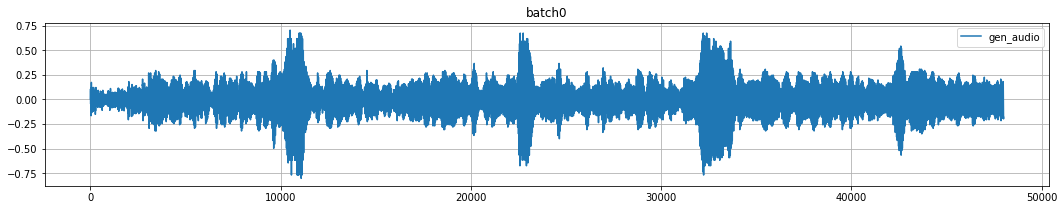

In [23]:
for i in range(output.shape[0]):
    plt.figure(figsize=(18,3))
    plt.title('batch'+str(i))
    plt.plot(audioout[i],label='gen_audio') #generated
    #plt.plot(params[i,:,0].numpy(),label='fill')
    #plt.plot(params[i,:,1].numpy(),label='rmse')
    #plt.plot(params[i,:,2].numpy(),label='centroid')
    #plt.plot(params[i,:,3].numpy(),label='pitch')
    #plt.plot(params[i,:,4].numpy(),label='mfcc0')
    plt.legend()
    plt.grid()
    plt.show()

### Test unconditional generation audio

In [12]:
from generate import Generator

class Args:
    hidden_size = 800
    n_layers = 3
    sample_rate = 16000
    seq_len = 65000
    stride = 1
    mulaw_channels = 256
    batch_size = 1
    param_dir = 'data/metal_mono/param'
    prop = []
    generate = ['audio']
    gen_size = 1
    cond_size = 0
    onehot = False
    seed = None
    model_dir = 'output/tier1_w_uncond/model'
    step = 5000
    length = 64000
    data_dir = 'data/metal_mono/audio'
    paramvect = 'none'
    out = 'generated_uncond'
    temp = 0.9
    external_array = None
    external_sr = None
    save = False
args=Args()

In [13]:
generator = Generator(args)
audioout = generator.generate()
print(audioout.shape)

RnnBlock(
  (i2d): Linear(in_features=1, out_features=3, bias=True)
  (d2h): Linear(in_features=3, out_features=800, bias=True)
  (gru): GRU(800, 800, num_layers=3, batch_first=True)
  (h2o): Linear(in_features=800, out_features=256, bias=True)
)
Loading model from output/tier1_w_uncond/model
priming...
DONE
1/64000 samples are generated.
2/64000 samples are generated.
3/64000 samples are generated.
4/64000 samples are generated.
5/64000 samples are generated.
6/64000 samples are generated.
7/64000 samples are generated.
8/64000 samples are generated.
9/64000 samples are generated.
10/64000 samples are generated.
11/64000 samples are generated.
12/64000 samples are generated.
13/64000 samples are generated.
14/64000 samples are generated.
15/64000 samples are generated.
16/64000 samples are generated.
17/64000 samples are generated.
18/64000 samples are generated.
19/64000 samples are generated.
20/64000 samples are generated.
21/64000 samples are generated.
22/64000 samples are genera

243/64000 samples are generated.
244/64000 samples are generated.
245/64000 samples are generated.
246/64000 samples are generated.
247/64000 samples are generated.
248/64000 samples are generated.
249/64000 samples are generated.
250/64000 samples are generated.
251/64000 samples are generated.
252/64000 samples are generated.
253/64000 samples are generated.
254/64000 samples are generated.
255/64000 samples are generated.
256/64000 samples are generated.
257/64000 samples are generated.
258/64000 samples are generated.
259/64000 samples are generated.
260/64000 samples are generated.
261/64000 samples are generated.
262/64000 samples are generated.
263/64000 samples are generated.
264/64000 samples are generated.
265/64000 samples are generated.
266/64000 samples are generated.
267/64000 samples are generated.
268/64000 samples are generated.
269/64000 samples are generated.
270/64000 samples are generated.
271/64000 samples are generated.
272/64000 samples are generated.
273/64000 

491/64000 samples are generated.
492/64000 samples are generated.
493/64000 samples are generated.
494/64000 samples are generated.
495/64000 samples are generated.
496/64000 samples are generated.
497/64000 samples are generated.
498/64000 samples are generated.
499/64000 samples are generated.
500/64000 samples are generated.
501/64000 samples are generated.
502/64000 samples are generated.
503/64000 samples are generated.
504/64000 samples are generated.
505/64000 samples are generated.
506/64000 samples are generated.
507/64000 samples are generated.
508/64000 samples are generated.
509/64000 samples are generated.
510/64000 samples are generated.
511/64000 samples are generated.
512/64000 samples are generated.
513/64000 samples are generated.
514/64000 samples are generated.
515/64000 samples are generated.
516/64000 samples are generated.
517/64000 samples are generated.
518/64000 samples are generated.
519/64000 samples are generated.
520/64000 samples are generated.
521/64000 

739/64000 samples are generated.
740/64000 samples are generated.
741/64000 samples are generated.
742/64000 samples are generated.
743/64000 samples are generated.
744/64000 samples are generated.
745/64000 samples are generated.
746/64000 samples are generated.
747/64000 samples are generated.
748/64000 samples are generated.
749/64000 samples are generated.
750/64000 samples are generated.
751/64000 samples are generated.
752/64000 samples are generated.
753/64000 samples are generated.
754/64000 samples are generated.
755/64000 samples are generated.
756/64000 samples are generated.
757/64000 samples are generated.
758/64000 samples are generated.
759/64000 samples are generated.
760/64000 samples are generated.
761/64000 samples are generated.
762/64000 samples are generated.
763/64000 samples are generated.
764/64000 samples are generated.
765/64000 samples are generated.
766/64000 samples are generated.
767/64000 samples are generated.
768/64000 samples are generated.
769/64000 

987/64000 samples are generated.
988/64000 samples are generated.
989/64000 samples are generated.
990/64000 samples are generated.
991/64000 samples are generated.
992/64000 samples are generated.
993/64000 samples are generated.
994/64000 samples are generated.
995/64000 samples are generated.
996/64000 samples are generated.
997/64000 samples are generated.
998/64000 samples are generated.
999/64000 samples are generated.
1000/64000 samples are generated.
1001/64000 samples are generated.
1002/64000 samples are generated.
1003/64000 samples are generated.
1004/64000 samples are generated.
1005/64000 samples are generated.
1006/64000 samples are generated.
1007/64000 samples are generated.
1008/64000 samples are generated.
1009/64000 samples are generated.
1010/64000 samples are generated.
1011/64000 samples are generated.
1012/64000 samples are generated.
1013/64000 samples are generated.
1014/64000 samples are generated.
1015/64000 samples are generated.
1016/64000 samples are gene

1228/64000 samples are generated.
1229/64000 samples are generated.
1230/64000 samples are generated.
1231/64000 samples are generated.
1232/64000 samples are generated.
1233/64000 samples are generated.
1234/64000 samples are generated.
1235/64000 samples are generated.
1236/64000 samples are generated.
1237/64000 samples are generated.
1238/64000 samples are generated.
1239/64000 samples are generated.
1240/64000 samples are generated.
1241/64000 samples are generated.
1242/64000 samples are generated.
1243/64000 samples are generated.
1244/64000 samples are generated.
1245/64000 samples are generated.
1246/64000 samples are generated.
1247/64000 samples are generated.
1248/64000 samples are generated.
1249/64000 samples are generated.
1250/64000 samples are generated.
1251/64000 samples are generated.
1252/64000 samples are generated.
1253/64000 samples are generated.
1254/64000 samples are generated.
1255/64000 samples are generated.
1256/64000 samples are generated.
1257/64000 sam

1468/64000 samples are generated.
1469/64000 samples are generated.
1470/64000 samples are generated.
1471/64000 samples are generated.
1472/64000 samples are generated.
1473/64000 samples are generated.
1474/64000 samples are generated.
1475/64000 samples are generated.
1476/64000 samples are generated.
1477/64000 samples are generated.
1478/64000 samples are generated.
1479/64000 samples are generated.
1480/64000 samples are generated.
1481/64000 samples are generated.
1482/64000 samples are generated.
1483/64000 samples are generated.
1484/64000 samples are generated.
1485/64000 samples are generated.
1486/64000 samples are generated.
1487/64000 samples are generated.
1488/64000 samples are generated.
1489/64000 samples are generated.
1490/64000 samples are generated.
1491/64000 samples are generated.
1492/64000 samples are generated.
1493/64000 samples are generated.
1494/64000 samples are generated.
1495/64000 samples are generated.
1496/64000 samples are generated.
1497/64000 sam

1708/64000 samples are generated.
1709/64000 samples are generated.
1710/64000 samples are generated.
1711/64000 samples are generated.
1712/64000 samples are generated.
1713/64000 samples are generated.
1714/64000 samples are generated.
1715/64000 samples are generated.
1716/64000 samples are generated.
1717/64000 samples are generated.
1718/64000 samples are generated.
1719/64000 samples are generated.
1720/64000 samples are generated.
1721/64000 samples are generated.
1722/64000 samples are generated.
1723/64000 samples are generated.
1724/64000 samples are generated.
1725/64000 samples are generated.
1726/64000 samples are generated.
1727/64000 samples are generated.
1728/64000 samples are generated.
1729/64000 samples are generated.
1730/64000 samples are generated.
1731/64000 samples are generated.
1732/64000 samples are generated.
1733/64000 samples are generated.
1734/64000 samples are generated.
1735/64000 samples are generated.
1736/64000 samples are generated.
1737/64000 sam

1948/64000 samples are generated.
1949/64000 samples are generated.
1950/64000 samples are generated.
1951/64000 samples are generated.
1952/64000 samples are generated.
1953/64000 samples are generated.
1954/64000 samples are generated.
1955/64000 samples are generated.
1956/64000 samples are generated.
1957/64000 samples are generated.
1958/64000 samples are generated.
1959/64000 samples are generated.
1960/64000 samples are generated.
1961/64000 samples are generated.
1962/64000 samples are generated.
1963/64000 samples are generated.
1964/64000 samples are generated.
1965/64000 samples are generated.
1966/64000 samples are generated.
1967/64000 samples are generated.
1968/64000 samples are generated.
1969/64000 samples are generated.
1970/64000 samples are generated.
1971/64000 samples are generated.
1972/64000 samples are generated.
1973/64000 samples are generated.
1974/64000 samples are generated.
1975/64000 samples are generated.
1976/64000 samples are generated.
1977/64000 sam

2188/64000 samples are generated.
2189/64000 samples are generated.
2190/64000 samples are generated.
2191/64000 samples are generated.
2192/64000 samples are generated.
2193/64000 samples are generated.
2194/64000 samples are generated.
2195/64000 samples are generated.
2196/64000 samples are generated.
2197/64000 samples are generated.
2198/64000 samples are generated.
2199/64000 samples are generated.
2200/64000 samples are generated.
2201/64000 samples are generated.
2202/64000 samples are generated.
2203/64000 samples are generated.
2204/64000 samples are generated.
2205/64000 samples are generated.
2206/64000 samples are generated.
2207/64000 samples are generated.
2208/64000 samples are generated.
2209/64000 samples are generated.
2210/64000 samples are generated.
2211/64000 samples are generated.
2212/64000 samples are generated.
2213/64000 samples are generated.
2214/64000 samples are generated.
2215/64000 samples are generated.
2216/64000 samples are generated.
2217/64000 sam

2428/64000 samples are generated.
2429/64000 samples are generated.
2430/64000 samples are generated.
2431/64000 samples are generated.
2432/64000 samples are generated.
2433/64000 samples are generated.
2434/64000 samples are generated.
2435/64000 samples are generated.
2436/64000 samples are generated.
2437/64000 samples are generated.
2438/64000 samples are generated.
2439/64000 samples are generated.
2440/64000 samples are generated.
2441/64000 samples are generated.
2442/64000 samples are generated.
2443/64000 samples are generated.
2444/64000 samples are generated.
2445/64000 samples are generated.
2446/64000 samples are generated.
2447/64000 samples are generated.
2448/64000 samples are generated.
2449/64000 samples are generated.
2450/64000 samples are generated.
2451/64000 samples are generated.
2452/64000 samples are generated.
2453/64000 samples are generated.
2454/64000 samples are generated.
2455/64000 samples are generated.
2456/64000 samples are generated.
2457/64000 sam

2668/64000 samples are generated.
2669/64000 samples are generated.
2670/64000 samples are generated.
2671/64000 samples are generated.
2672/64000 samples are generated.
2673/64000 samples are generated.
2674/64000 samples are generated.
2675/64000 samples are generated.
2676/64000 samples are generated.
2677/64000 samples are generated.
2678/64000 samples are generated.
2679/64000 samples are generated.
2680/64000 samples are generated.
2681/64000 samples are generated.
2682/64000 samples are generated.
2683/64000 samples are generated.
2684/64000 samples are generated.
2685/64000 samples are generated.
2686/64000 samples are generated.
2687/64000 samples are generated.
2688/64000 samples are generated.
2689/64000 samples are generated.
2690/64000 samples are generated.
2691/64000 samples are generated.
2692/64000 samples are generated.
2693/64000 samples are generated.
2694/64000 samples are generated.
2695/64000 samples are generated.
2696/64000 samples are generated.
2697/64000 sam

2908/64000 samples are generated.
2909/64000 samples are generated.
2910/64000 samples are generated.
2911/64000 samples are generated.
2912/64000 samples are generated.
2913/64000 samples are generated.
2914/64000 samples are generated.
2915/64000 samples are generated.
2916/64000 samples are generated.
2917/64000 samples are generated.
2918/64000 samples are generated.
2919/64000 samples are generated.
2920/64000 samples are generated.
2921/64000 samples are generated.
2922/64000 samples are generated.
2923/64000 samples are generated.
2924/64000 samples are generated.
2925/64000 samples are generated.
2926/64000 samples are generated.
2927/64000 samples are generated.
2928/64000 samples are generated.
2929/64000 samples are generated.
2930/64000 samples are generated.
2931/64000 samples are generated.
2932/64000 samples are generated.
2933/64000 samples are generated.
2934/64000 samples are generated.
2935/64000 samples are generated.
2936/64000 samples are generated.
2937/64000 sam

3148/64000 samples are generated.
3149/64000 samples are generated.
3150/64000 samples are generated.
3151/64000 samples are generated.
3152/64000 samples are generated.
3153/64000 samples are generated.
3154/64000 samples are generated.
3155/64000 samples are generated.
3156/64000 samples are generated.
3157/64000 samples are generated.
3158/64000 samples are generated.
3159/64000 samples are generated.
3160/64000 samples are generated.
3161/64000 samples are generated.
3162/64000 samples are generated.
3163/64000 samples are generated.
3164/64000 samples are generated.
3165/64000 samples are generated.
3166/64000 samples are generated.
3167/64000 samples are generated.
3168/64000 samples are generated.
3169/64000 samples are generated.
3170/64000 samples are generated.
3171/64000 samples are generated.
3172/64000 samples are generated.
3173/64000 samples are generated.
3174/64000 samples are generated.
3175/64000 samples are generated.
3176/64000 samples are generated.
3177/64000 sam

3388/64000 samples are generated.
3389/64000 samples are generated.
3390/64000 samples are generated.
3391/64000 samples are generated.
3392/64000 samples are generated.
3393/64000 samples are generated.
3394/64000 samples are generated.
3395/64000 samples are generated.
3396/64000 samples are generated.
3397/64000 samples are generated.
3398/64000 samples are generated.
3399/64000 samples are generated.
3400/64000 samples are generated.
3401/64000 samples are generated.
3402/64000 samples are generated.
3403/64000 samples are generated.
3404/64000 samples are generated.
3405/64000 samples are generated.
3406/64000 samples are generated.
3407/64000 samples are generated.
3408/64000 samples are generated.
3409/64000 samples are generated.
3410/64000 samples are generated.
3411/64000 samples are generated.
3412/64000 samples are generated.
3413/64000 samples are generated.
3414/64000 samples are generated.
3415/64000 samples are generated.
3416/64000 samples are generated.
3417/64000 sam

3628/64000 samples are generated.
3629/64000 samples are generated.
3630/64000 samples are generated.
3631/64000 samples are generated.
3632/64000 samples are generated.
3633/64000 samples are generated.
3634/64000 samples are generated.
3635/64000 samples are generated.
3636/64000 samples are generated.
3637/64000 samples are generated.
3638/64000 samples are generated.
3639/64000 samples are generated.
3640/64000 samples are generated.
3641/64000 samples are generated.
3642/64000 samples are generated.
3643/64000 samples are generated.
3644/64000 samples are generated.
3645/64000 samples are generated.
3646/64000 samples are generated.
3647/64000 samples are generated.
3648/64000 samples are generated.
3649/64000 samples are generated.
3650/64000 samples are generated.
3651/64000 samples are generated.
3652/64000 samples are generated.
3653/64000 samples are generated.
3654/64000 samples are generated.
3655/64000 samples are generated.
3656/64000 samples are generated.
3657/64000 sam

3868/64000 samples are generated.
3869/64000 samples are generated.
3870/64000 samples are generated.
3871/64000 samples are generated.
3872/64000 samples are generated.
3873/64000 samples are generated.
3874/64000 samples are generated.
3875/64000 samples are generated.
3876/64000 samples are generated.
3877/64000 samples are generated.
3878/64000 samples are generated.
3879/64000 samples are generated.
3880/64000 samples are generated.
3881/64000 samples are generated.
3882/64000 samples are generated.
3883/64000 samples are generated.
3884/64000 samples are generated.
3885/64000 samples are generated.
3886/64000 samples are generated.
3887/64000 samples are generated.
3888/64000 samples are generated.
3889/64000 samples are generated.
3890/64000 samples are generated.
3891/64000 samples are generated.
3892/64000 samples are generated.
3893/64000 samples are generated.
3894/64000 samples are generated.
3895/64000 samples are generated.
3896/64000 samples are generated.
3897/64000 sam

4108/64000 samples are generated.
4109/64000 samples are generated.
4110/64000 samples are generated.
4111/64000 samples are generated.
4112/64000 samples are generated.
4113/64000 samples are generated.
4114/64000 samples are generated.
4115/64000 samples are generated.
4116/64000 samples are generated.
4117/64000 samples are generated.
4118/64000 samples are generated.
4119/64000 samples are generated.
4120/64000 samples are generated.
4121/64000 samples are generated.
4122/64000 samples are generated.
4123/64000 samples are generated.
4124/64000 samples are generated.
4125/64000 samples are generated.
4126/64000 samples are generated.
4127/64000 samples are generated.
4128/64000 samples are generated.
4129/64000 samples are generated.
4130/64000 samples are generated.
4131/64000 samples are generated.
4132/64000 samples are generated.
4133/64000 samples are generated.
4134/64000 samples are generated.
4135/64000 samples are generated.
4136/64000 samples are generated.
4137/64000 sam

4348/64000 samples are generated.
4349/64000 samples are generated.
4350/64000 samples are generated.
4351/64000 samples are generated.
4352/64000 samples are generated.
4353/64000 samples are generated.
4354/64000 samples are generated.
4355/64000 samples are generated.
4356/64000 samples are generated.
4357/64000 samples are generated.
4358/64000 samples are generated.
4359/64000 samples are generated.
4360/64000 samples are generated.
4361/64000 samples are generated.
4362/64000 samples are generated.
4363/64000 samples are generated.
4364/64000 samples are generated.
4365/64000 samples are generated.
4366/64000 samples are generated.
4367/64000 samples are generated.
4368/64000 samples are generated.
4369/64000 samples are generated.
4370/64000 samples are generated.
4371/64000 samples are generated.
4372/64000 samples are generated.
4373/64000 samples are generated.
4374/64000 samples are generated.
4375/64000 samples are generated.
4376/64000 samples are generated.
4377/64000 sam

4588/64000 samples are generated.
4589/64000 samples are generated.
4590/64000 samples are generated.
4591/64000 samples are generated.
4592/64000 samples are generated.
4593/64000 samples are generated.
4594/64000 samples are generated.
4595/64000 samples are generated.
4596/64000 samples are generated.
4597/64000 samples are generated.
4598/64000 samples are generated.
4599/64000 samples are generated.
4600/64000 samples are generated.
4601/64000 samples are generated.
4602/64000 samples are generated.
4603/64000 samples are generated.
4604/64000 samples are generated.
4605/64000 samples are generated.
4606/64000 samples are generated.
4607/64000 samples are generated.
4608/64000 samples are generated.
4609/64000 samples are generated.
4610/64000 samples are generated.
4611/64000 samples are generated.
4612/64000 samples are generated.
4613/64000 samples are generated.
4614/64000 samples are generated.
4615/64000 samples are generated.
4616/64000 samples are generated.
4617/64000 sam

4828/64000 samples are generated.
4829/64000 samples are generated.
4830/64000 samples are generated.
4831/64000 samples are generated.
4832/64000 samples are generated.
4833/64000 samples are generated.
4834/64000 samples are generated.
4835/64000 samples are generated.
4836/64000 samples are generated.
4837/64000 samples are generated.
4838/64000 samples are generated.
4839/64000 samples are generated.
4840/64000 samples are generated.
4841/64000 samples are generated.
4842/64000 samples are generated.
4843/64000 samples are generated.
4844/64000 samples are generated.
4845/64000 samples are generated.
4846/64000 samples are generated.
4847/64000 samples are generated.
4848/64000 samples are generated.
4849/64000 samples are generated.
4850/64000 samples are generated.
4851/64000 samples are generated.
4852/64000 samples are generated.
4853/64000 samples are generated.
4854/64000 samples are generated.
4855/64000 samples are generated.
4856/64000 samples are generated.
4857/64000 sam

5068/64000 samples are generated.
5069/64000 samples are generated.
5070/64000 samples are generated.
5071/64000 samples are generated.
5072/64000 samples are generated.
5073/64000 samples are generated.
5074/64000 samples are generated.
5075/64000 samples are generated.
5076/64000 samples are generated.
5077/64000 samples are generated.
5078/64000 samples are generated.
5079/64000 samples are generated.
5080/64000 samples are generated.
5081/64000 samples are generated.
5082/64000 samples are generated.
5083/64000 samples are generated.
5084/64000 samples are generated.
5085/64000 samples are generated.
5086/64000 samples are generated.
5087/64000 samples are generated.
5088/64000 samples are generated.
5089/64000 samples are generated.
5090/64000 samples are generated.
5091/64000 samples are generated.
5092/64000 samples are generated.
5093/64000 samples are generated.
5094/64000 samples are generated.
5095/64000 samples are generated.
5096/64000 samples are generated.
5097/64000 sam

5308/64000 samples are generated.
5309/64000 samples are generated.
5310/64000 samples are generated.
5311/64000 samples are generated.
5312/64000 samples are generated.
5313/64000 samples are generated.
5314/64000 samples are generated.
5315/64000 samples are generated.
5316/64000 samples are generated.
5317/64000 samples are generated.
5318/64000 samples are generated.
5319/64000 samples are generated.
5320/64000 samples are generated.
5321/64000 samples are generated.
5322/64000 samples are generated.
5323/64000 samples are generated.
5324/64000 samples are generated.
5325/64000 samples are generated.
5326/64000 samples are generated.
5327/64000 samples are generated.
5328/64000 samples are generated.
5329/64000 samples are generated.
5330/64000 samples are generated.
5331/64000 samples are generated.
5332/64000 samples are generated.
5333/64000 samples are generated.
5334/64000 samples are generated.
5335/64000 samples are generated.
5336/64000 samples are generated.
5337/64000 sam

5548/64000 samples are generated.
5549/64000 samples are generated.
5550/64000 samples are generated.
5551/64000 samples are generated.
5552/64000 samples are generated.
5553/64000 samples are generated.
5554/64000 samples are generated.
5555/64000 samples are generated.
5556/64000 samples are generated.
5557/64000 samples are generated.
5558/64000 samples are generated.
5559/64000 samples are generated.
5560/64000 samples are generated.
5561/64000 samples are generated.
5562/64000 samples are generated.
5563/64000 samples are generated.
5564/64000 samples are generated.
5565/64000 samples are generated.
5566/64000 samples are generated.
5567/64000 samples are generated.
5568/64000 samples are generated.
5569/64000 samples are generated.
5570/64000 samples are generated.
5571/64000 samples are generated.
5572/64000 samples are generated.
5573/64000 samples are generated.
5574/64000 samples are generated.
5575/64000 samples are generated.
5576/64000 samples are generated.
5577/64000 sam

5788/64000 samples are generated.
5789/64000 samples are generated.
5790/64000 samples are generated.
5791/64000 samples are generated.
5792/64000 samples are generated.
5793/64000 samples are generated.
5794/64000 samples are generated.
5795/64000 samples are generated.
5796/64000 samples are generated.
5797/64000 samples are generated.
5798/64000 samples are generated.
5799/64000 samples are generated.
5800/64000 samples are generated.
5801/64000 samples are generated.
5802/64000 samples are generated.
5803/64000 samples are generated.
5804/64000 samples are generated.
5805/64000 samples are generated.
5806/64000 samples are generated.
5807/64000 samples are generated.
5808/64000 samples are generated.
5809/64000 samples are generated.
5810/64000 samples are generated.
5811/64000 samples are generated.
5812/64000 samples are generated.
5813/64000 samples are generated.
5814/64000 samples are generated.
5815/64000 samples are generated.
5816/64000 samples are generated.
5817/64000 sam

6028/64000 samples are generated.
6029/64000 samples are generated.
6030/64000 samples are generated.
6031/64000 samples are generated.
6032/64000 samples are generated.
6033/64000 samples are generated.
6034/64000 samples are generated.
6035/64000 samples are generated.
6036/64000 samples are generated.
6037/64000 samples are generated.
6038/64000 samples are generated.
6039/64000 samples are generated.
6040/64000 samples are generated.
6041/64000 samples are generated.
6042/64000 samples are generated.
6043/64000 samples are generated.
6044/64000 samples are generated.
6045/64000 samples are generated.
6046/64000 samples are generated.
6047/64000 samples are generated.
6048/64000 samples are generated.
6049/64000 samples are generated.
6050/64000 samples are generated.
6051/64000 samples are generated.
6052/64000 samples are generated.
6053/64000 samples are generated.
6054/64000 samples are generated.
6055/64000 samples are generated.
6056/64000 samples are generated.
6057/64000 sam

6268/64000 samples are generated.
6269/64000 samples are generated.
6270/64000 samples are generated.
6271/64000 samples are generated.
6272/64000 samples are generated.
6273/64000 samples are generated.
6274/64000 samples are generated.
6275/64000 samples are generated.
6276/64000 samples are generated.
6277/64000 samples are generated.
6278/64000 samples are generated.
6279/64000 samples are generated.
6280/64000 samples are generated.
6281/64000 samples are generated.
6282/64000 samples are generated.
6283/64000 samples are generated.
6284/64000 samples are generated.
6285/64000 samples are generated.
6286/64000 samples are generated.
6287/64000 samples are generated.
6288/64000 samples are generated.
6289/64000 samples are generated.
6290/64000 samples are generated.
6291/64000 samples are generated.
6292/64000 samples are generated.
6293/64000 samples are generated.
6294/64000 samples are generated.
6295/64000 samples are generated.
6296/64000 samples are generated.
6297/64000 sam

6508/64000 samples are generated.
6509/64000 samples are generated.
6510/64000 samples are generated.
6511/64000 samples are generated.
6512/64000 samples are generated.
6513/64000 samples are generated.
6514/64000 samples are generated.
6515/64000 samples are generated.
6516/64000 samples are generated.
6517/64000 samples are generated.
6518/64000 samples are generated.
6519/64000 samples are generated.
6520/64000 samples are generated.
6521/64000 samples are generated.
6522/64000 samples are generated.
6523/64000 samples are generated.
6524/64000 samples are generated.
6525/64000 samples are generated.
6526/64000 samples are generated.
6527/64000 samples are generated.
6528/64000 samples are generated.
6529/64000 samples are generated.
6530/64000 samples are generated.
6531/64000 samples are generated.
6532/64000 samples are generated.
6533/64000 samples are generated.
6534/64000 samples are generated.
6535/64000 samples are generated.
6536/64000 samples are generated.
6537/64000 sam

6748/64000 samples are generated.
6749/64000 samples are generated.
6750/64000 samples are generated.
6751/64000 samples are generated.
6752/64000 samples are generated.
6753/64000 samples are generated.
6754/64000 samples are generated.
6755/64000 samples are generated.
6756/64000 samples are generated.
6757/64000 samples are generated.
6758/64000 samples are generated.
6759/64000 samples are generated.
6760/64000 samples are generated.
6761/64000 samples are generated.
6762/64000 samples are generated.
6763/64000 samples are generated.
6764/64000 samples are generated.
6765/64000 samples are generated.
6766/64000 samples are generated.
6767/64000 samples are generated.
6768/64000 samples are generated.
6769/64000 samples are generated.
6770/64000 samples are generated.
6771/64000 samples are generated.
6772/64000 samples are generated.
6773/64000 samples are generated.
6774/64000 samples are generated.
6775/64000 samples are generated.
6776/64000 samples are generated.
6777/64000 sam

6988/64000 samples are generated.
6989/64000 samples are generated.
6990/64000 samples are generated.
6991/64000 samples are generated.
6992/64000 samples are generated.
6993/64000 samples are generated.
6994/64000 samples are generated.
6995/64000 samples are generated.
6996/64000 samples are generated.
6997/64000 samples are generated.
6998/64000 samples are generated.
6999/64000 samples are generated.
7000/64000 samples are generated.
7001/64000 samples are generated.
7002/64000 samples are generated.
7003/64000 samples are generated.
7004/64000 samples are generated.
7005/64000 samples are generated.
7006/64000 samples are generated.
7007/64000 samples are generated.
7008/64000 samples are generated.
7009/64000 samples are generated.
7010/64000 samples are generated.
7011/64000 samples are generated.
7012/64000 samples are generated.
7013/64000 samples are generated.
7014/64000 samples are generated.
7015/64000 samples are generated.
7016/64000 samples are generated.
7017/64000 sam

7228/64000 samples are generated.
7229/64000 samples are generated.
7230/64000 samples are generated.
7231/64000 samples are generated.
7232/64000 samples are generated.
7233/64000 samples are generated.
7234/64000 samples are generated.
7235/64000 samples are generated.
7236/64000 samples are generated.
7237/64000 samples are generated.
7238/64000 samples are generated.
7239/64000 samples are generated.
7240/64000 samples are generated.
7241/64000 samples are generated.
7242/64000 samples are generated.
7243/64000 samples are generated.
7244/64000 samples are generated.
7245/64000 samples are generated.
7246/64000 samples are generated.
7247/64000 samples are generated.
7248/64000 samples are generated.
7249/64000 samples are generated.
7250/64000 samples are generated.
7251/64000 samples are generated.
7252/64000 samples are generated.
7253/64000 samples are generated.
7254/64000 samples are generated.
7255/64000 samples are generated.
7256/64000 samples are generated.
7257/64000 sam

7468/64000 samples are generated.
7469/64000 samples are generated.
7470/64000 samples are generated.
7471/64000 samples are generated.
7472/64000 samples are generated.
7473/64000 samples are generated.
7474/64000 samples are generated.
7475/64000 samples are generated.
7476/64000 samples are generated.
7477/64000 samples are generated.
7478/64000 samples are generated.
7479/64000 samples are generated.
7480/64000 samples are generated.
7481/64000 samples are generated.
7482/64000 samples are generated.
7483/64000 samples are generated.
7484/64000 samples are generated.
7485/64000 samples are generated.
7486/64000 samples are generated.
7487/64000 samples are generated.
7488/64000 samples are generated.
7489/64000 samples are generated.
7490/64000 samples are generated.
7491/64000 samples are generated.
7492/64000 samples are generated.
7493/64000 samples are generated.
7494/64000 samples are generated.
7495/64000 samples are generated.
7496/64000 samples are generated.
7497/64000 sam

7708/64000 samples are generated.
7709/64000 samples are generated.
7710/64000 samples are generated.
7711/64000 samples are generated.
7712/64000 samples are generated.
7713/64000 samples are generated.
7714/64000 samples are generated.
7715/64000 samples are generated.
7716/64000 samples are generated.
7717/64000 samples are generated.
7718/64000 samples are generated.
7719/64000 samples are generated.
7720/64000 samples are generated.
7721/64000 samples are generated.
7722/64000 samples are generated.
7723/64000 samples are generated.
7724/64000 samples are generated.
7725/64000 samples are generated.
7726/64000 samples are generated.
7727/64000 samples are generated.
7728/64000 samples are generated.
7729/64000 samples are generated.
7730/64000 samples are generated.
7731/64000 samples are generated.
7732/64000 samples are generated.
7733/64000 samples are generated.
7734/64000 samples are generated.
7735/64000 samples are generated.
7736/64000 samples are generated.
7737/64000 sam

7948/64000 samples are generated.
7949/64000 samples are generated.
7950/64000 samples are generated.
7951/64000 samples are generated.
7952/64000 samples are generated.
7953/64000 samples are generated.
7954/64000 samples are generated.
7955/64000 samples are generated.
7956/64000 samples are generated.
7957/64000 samples are generated.
7958/64000 samples are generated.
7959/64000 samples are generated.
7960/64000 samples are generated.
7961/64000 samples are generated.
7962/64000 samples are generated.
7963/64000 samples are generated.
7964/64000 samples are generated.
7965/64000 samples are generated.
7966/64000 samples are generated.
7967/64000 samples are generated.
7968/64000 samples are generated.
7969/64000 samples are generated.
7970/64000 samples are generated.
7971/64000 samples are generated.
7972/64000 samples are generated.
7973/64000 samples are generated.
7974/64000 samples are generated.
7975/64000 samples are generated.
7976/64000 samples are generated.
7977/64000 sam

8188/64000 samples are generated.
8189/64000 samples are generated.
8190/64000 samples are generated.
8191/64000 samples are generated.
8192/64000 samples are generated.
8193/64000 samples are generated.
8194/64000 samples are generated.
8195/64000 samples are generated.
8196/64000 samples are generated.
8197/64000 samples are generated.
8198/64000 samples are generated.
8199/64000 samples are generated.
8200/64000 samples are generated.
8201/64000 samples are generated.
8202/64000 samples are generated.
8203/64000 samples are generated.
8204/64000 samples are generated.
8205/64000 samples are generated.
8206/64000 samples are generated.
8207/64000 samples are generated.
8208/64000 samples are generated.
8209/64000 samples are generated.
8210/64000 samples are generated.
8211/64000 samples are generated.
8212/64000 samples are generated.
8213/64000 samples are generated.
8214/64000 samples are generated.
8215/64000 samples are generated.
8216/64000 samples are generated.
8217/64000 sam

8428/64000 samples are generated.
8429/64000 samples are generated.
8430/64000 samples are generated.
8431/64000 samples are generated.
8432/64000 samples are generated.
8433/64000 samples are generated.
8434/64000 samples are generated.
8435/64000 samples are generated.
8436/64000 samples are generated.
8437/64000 samples are generated.
8438/64000 samples are generated.
8439/64000 samples are generated.
8440/64000 samples are generated.
8441/64000 samples are generated.
8442/64000 samples are generated.
8443/64000 samples are generated.
8444/64000 samples are generated.
8445/64000 samples are generated.
8446/64000 samples are generated.
8447/64000 samples are generated.
8448/64000 samples are generated.
8449/64000 samples are generated.
8450/64000 samples are generated.
8451/64000 samples are generated.
8452/64000 samples are generated.
8453/64000 samples are generated.
8454/64000 samples are generated.
8455/64000 samples are generated.
8456/64000 samples are generated.
8457/64000 sam

8668/64000 samples are generated.
8669/64000 samples are generated.
8670/64000 samples are generated.
8671/64000 samples are generated.
8672/64000 samples are generated.
8673/64000 samples are generated.
8674/64000 samples are generated.
8675/64000 samples are generated.
8676/64000 samples are generated.
8677/64000 samples are generated.
8678/64000 samples are generated.
8679/64000 samples are generated.
8680/64000 samples are generated.
8681/64000 samples are generated.
8682/64000 samples are generated.
8683/64000 samples are generated.
8684/64000 samples are generated.
8685/64000 samples are generated.
8686/64000 samples are generated.
8687/64000 samples are generated.
8688/64000 samples are generated.
8689/64000 samples are generated.
8690/64000 samples are generated.
8691/64000 samples are generated.
8692/64000 samples are generated.
8693/64000 samples are generated.
8694/64000 samples are generated.
8695/64000 samples are generated.
8696/64000 samples are generated.
8697/64000 sam

8908/64000 samples are generated.
8909/64000 samples are generated.
8910/64000 samples are generated.
8911/64000 samples are generated.
8912/64000 samples are generated.
8913/64000 samples are generated.
8914/64000 samples are generated.
8915/64000 samples are generated.
8916/64000 samples are generated.
8917/64000 samples are generated.
8918/64000 samples are generated.
8919/64000 samples are generated.
8920/64000 samples are generated.
8921/64000 samples are generated.
8922/64000 samples are generated.
8923/64000 samples are generated.
8924/64000 samples are generated.
8925/64000 samples are generated.
8926/64000 samples are generated.
8927/64000 samples are generated.
8928/64000 samples are generated.
8929/64000 samples are generated.
8930/64000 samples are generated.
8931/64000 samples are generated.
8932/64000 samples are generated.
8933/64000 samples are generated.
8934/64000 samples are generated.
8935/64000 samples are generated.
8936/64000 samples are generated.
8937/64000 sam

9148/64000 samples are generated.
9149/64000 samples are generated.
9150/64000 samples are generated.
9151/64000 samples are generated.
9152/64000 samples are generated.
9153/64000 samples are generated.
9154/64000 samples are generated.
9155/64000 samples are generated.
9156/64000 samples are generated.
9157/64000 samples are generated.
9158/64000 samples are generated.
9159/64000 samples are generated.
9160/64000 samples are generated.
9161/64000 samples are generated.
9162/64000 samples are generated.
9163/64000 samples are generated.
9164/64000 samples are generated.
9165/64000 samples are generated.
9166/64000 samples are generated.
9167/64000 samples are generated.
9168/64000 samples are generated.
9169/64000 samples are generated.
9170/64000 samples are generated.
9171/64000 samples are generated.
9172/64000 samples are generated.
9173/64000 samples are generated.
9174/64000 samples are generated.
9175/64000 samples are generated.
9176/64000 samples are generated.
9177/64000 sam

9388/64000 samples are generated.
9389/64000 samples are generated.
9390/64000 samples are generated.
9391/64000 samples are generated.
9392/64000 samples are generated.
9393/64000 samples are generated.
9394/64000 samples are generated.
9395/64000 samples are generated.
9396/64000 samples are generated.
9397/64000 samples are generated.
9398/64000 samples are generated.
9399/64000 samples are generated.
9400/64000 samples are generated.
9401/64000 samples are generated.
9402/64000 samples are generated.
9403/64000 samples are generated.
9404/64000 samples are generated.
9405/64000 samples are generated.
9406/64000 samples are generated.
9407/64000 samples are generated.
9408/64000 samples are generated.
9409/64000 samples are generated.
9410/64000 samples are generated.
9411/64000 samples are generated.
9412/64000 samples are generated.
9413/64000 samples are generated.
9414/64000 samples are generated.
9415/64000 samples are generated.
9416/64000 samples are generated.
9417/64000 sam

9628/64000 samples are generated.
9629/64000 samples are generated.
9630/64000 samples are generated.
9631/64000 samples are generated.
9632/64000 samples are generated.
9633/64000 samples are generated.
9634/64000 samples are generated.
9635/64000 samples are generated.
9636/64000 samples are generated.
9637/64000 samples are generated.
9638/64000 samples are generated.
9639/64000 samples are generated.
9640/64000 samples are generated.
9641/64000 samples are generated.
9642/64000 samples are generated.
9643/64000 samples are generated.
9644/64000 samples are generated.
9645/64000 samples are generated.
9646/64000 samples are generated.
9647/64000 samples are generated.
9648/64000 samples are generated.
9649/64000 samples are generated.
9650/64000 samples are generated.
9651/64000 samples are generated.
9652/64000 samples are generated.
9653/64000 samples are generated.
9654/64000 samples are generated.
9655/64000 samples are generated.
9656/64000 samples are generated.
9657/64000 sam

9868/64000 samples are generated.
9869/64000 samples are generated.
9870/64000 samples are generated.
9871/64000 samples are generated.
9872/64000 samples are generated.
9873/64000 samples are generated.
9874/64000 samples are generated.
9875/64000 samples are generated.
9876/64000 samples are generated.
9877/64000 samples are generated.
9878/64000 samples are generated.
9879/64000 samples are generated.
9880/64000 samples are generated.
9881/64000 samples are generated.
9882/64000 samples are generated.
9883/64000 samples are generated.
9884/64000 samples are generated.
9885/64000 samples are generated.
9886/64000 samples are generated.
9887/64000 samples are generated.
9888/64000 samples are generated.
9889/64000 samples are generated.
9890/64000 samples are generated.
9891/64000 samples are generated.
9892/64000 samples are generated.
9893/64000 samples are generated.
9894/64000 samples are generated.
9895/64000 samples are generated.
9896/64000 samples are generated.
9897/64000 sam

10105/64000 samples are generated.
10106/64000 samples are generated.
10107/64000 samples are generated.
10108/64000 samples are generated.
10109/64000 samples are generated.
10110/64000 samples are generated.
10111/64000 samples are generated.
10112/64000 samples are generated.
10113/64000 samples are generated.
10114/64000 samples are generated.
10115/64000 samples are generated.
10116/64000 samples are generated.
10117/64000 samples are generated.
10118/64000 samples are generated.
10119/64000 samples are generated.
10120/64000 samples are generated.
10121/64000 samples are generated.
10122/64000 samples are generated.
10123/64000 samples are generated.
10124/64000 samples are generated.
10125/64000 samples are generated.
10126/64000 samples are generated.
10127/64000 samples are generated.
10128/64000 samples are generated.
10129/64000 samples are generated.
10130/64000 samples are generated.
10131/64000 samples are generated.
10132/64000 samples are generated.
10133/64000 samples 

10339/64000 samples are generated.
10340/64000 samples are generated.
10341/64000 samples are generated.
10342/64000 samples are generated.
10343/64000 samples are generated.
10344/64000 samples are generated.
10345/64000 samples are generated.
10346/64000 samples are generated.
10347/64000 samples are generated.
10348/64000 samples are generated.
10349/64000 samples are generated.
10350/64000 samples are generated.
10351/64000 samples are generated.
10352/64000 samples are generated.
10353/64000 samples are generated.
10354/64000 samples are generated.
10355/64000 samples are generated.
10356/64000 samples are generated.
10357/64000 samples are generated.
10358/64000 samples are generated.
10359/64000 samples are generated.
10360/64000 samples are generated.
10361/64000 samples are generated.
10362/64000 samples are generated.
10363/64000 samples are generated.
10364/64000 samples are generated.
10365/64000 samples are generated.
10366/64000 samples are generated.
10367/64000 samples 

10573/64000 samples are generated.
10574/64000 samples are generated.
10575/64000 samples are generated.
10576/64000 samples are generated.
10577/64000 samples are generated.
10578/64000 samples are generated.
10579/64000 samples are generated.
10580/64000 samples are generated.
10581/64000 samples are generated.
10582/64000 samples are generated.
10583/64000 samples are generated.
10584/64000 samples are generated.
10585/64000 samples are generated.
10586/64000 samples are generated.
10587/64000 samples are generated.
10588/64000 samples are generated.
10589/64000 samples are generated.
10590/64000 samples are generated.
10591/64000 samples are generated.
10592/64000 samples are generated.
10593/64000 samples are generated.
10594/64000 samples are generated.
10595/64000 samples are generated.
10596/64000 samples are generated.
10597/64000 samples are generated.
10598/64000 samples are generated.
10599/64000 samples are generated.
10600/64000 samples are generated.
10601/64000 samples 

10807/64000 samples are generated.
10808/64000 samples are generated.
10809/64000 samples are generated.
10810/64000 samples are generated.
10811/64000 samples are generated.
10812/64000 samples are generated.
10813/64000 samples are generated.
10814/64000 samples are generated.
10815/64000 samples are generated.
10816/64000 samples are generated.
10817/64000 samples are generated.
10818/64000 samples are generated.
10819/64000 samples are generated.
10820/64000 samples are generated.
10821/64000 samples are generated.
10822/64000 samples are generated.
10823/64000 samples are generated.
10824/64000 samples are generated.
10825/64000 samples are generated.
10826/64000 samples are generated.
10827/64000 samples are generated.
10828/64000 samples are generated.
10829/64000 samples are generated.
10830/64000 samples are generated.
10831/64000 samples are generated.
10832/64000 samples are generated.
10833/64000 samples are generated.
10834/64000 samples are generated.
10835/64000 samples 

11041/64000 samples are generated.
11042/64000 samples are generated.
11043/64000 samples are generated.
11044/64000 samples are generated.
11045/64000 samples are generated.
11046/64000 samples are generated.
11047/64000 samples are generated.
11048/64000 samples are generated.
11049/64000 samples are generated.
11050/64000 samples are generated.
11051/64000 samples are generated.
11052/64000 samples are generated.
11053/64000 samples are generated.
11054/64000 samples are generated.
11055/64000 samples are generated.
11056/64000 samples are generated.
11057/64000 samples are generated.
11058/64000 samples are generated.
11059/64000 samples are generated.
11060/64000 samples are generated.
11061/64000 samples are generated.
11062/64000 samples are generated.
11063/64000 samples are generated.
11064/64000 samples are generated.
11065/64000 samples are generated.
11066/64000 samples are generated.
11067/64000 samples are generated.
11068/64000 samples are generated.
11069/64000 samples 

11275/64000 samples are generated.
11276/64000 samples are generated.
11277/64000 samples are generated.
11278/64000 samples are generated.
11279/64000 samples are generated.
11280/64000 samples are generated.
11281/64000 samples are generated.
11282/64000 samples are generated.
11283/64000 samples are generated.
11284/64000 samples are generated.
11285/64000 samples are generated.
11286/64000 samples are generated.
11287/64000 samples are generated.
11288/64000 samples are generated.
11289/64000 samples are generated.
11290/64000 samples are generated.
11291/64000 samples are generated.
11292/64000 samples are generated.
11293/64000 samples are generated.
11294/64000 samples are generated.
11295/64000 samples are generated.
11296/64000 samples are generated.
11297/64000 samples are generated.
11298/64000 samples are generated.
11299/64000 samples are generated.
11300/64000 samples are generated.
11301/64000 samples are generated.
11302/64000 samples are generated.
11303/64000 samples 

11509/64000 samples are generated.
11510/64000 samples are generated.
11511/64000 samples are generated.
11512/64000 samples are generated.
11513/64000 samples are generated.
11514/64000 samples are generated.
11515/64000 samples are generated.
11516/64000 samples are generated.
11517/64000 samples are generated.
11518/64000 samples are generated.
11519/64000 samples are generated.
11520/64000 samples are generated.
11521/64000 samples are generated.
11522/64000 samples are generated.
11523/64000 samples are generated.
11524/64000 samples are generated.
11525/64000 samples are generated.
11526/64000 samples are generated.
11527/64000 samples are generated.
11528/64000 samples are generated.
11529/64000 samples are generated.
11530/64000 samples are generated.
11531/64000 samples are generated.
11532/64000 samples are generated.
11533/64000 samples are generated.
11534/64000 samples are generated.
11535/64000 samples are generated.
11536/64000 samples are generated.
11537/64000 samples 

11743/64000 samples are generated.
11744/64000 samples are generated.
11745/64000 samples are generated.
11746/64000 samples are generated.
11747/64000 samples are generated.
11748/64000 samples are generated.
11749/64000 samples are generated.
11750/64000 samples are generated.
11751/64000 samples are generated.
11752/64000 samples are generated.
11753/64000 samples are generated.
11754/64000 samples are generated.
11755/64000 samples are generated.
11756/64000 samples are generated.
11757/64000 samples are generated.
11758/64000 samples are generated.
11759/64000 samples are generated.
11760/64000 samples are generated.
11761/64000 samples are generated.
11762/64000 samples are generated.
11763/64000 samples are generated.
11764/64000 samples are generated.
11765/64000 samples are generated.
11766/64000 samples are generated.
11767/64000 samples are generated.
11768/64000 samples are generated.
11769/64000 samples are generated.
11770/64000 samples are generated.
11771/64000 samples 

11977/64000 samples are generated.
11978/64000 samples are generated.
11979/64000 samples are generated.
11980/64000 samples are generated.
11981/64000 samples are generated.
11982/64000 samples are generated.
11983/64000 samples are generated.
11984/64000 samples are generated.
11985/64000 samples are generated.
11986/64000 samples are generated.
11987/64000 samples are generated.
11988/64000 samples are generated.
11989/64000 samples are generated.
11990/64000 samples are generated.
11991/64000 samples are generated.
11992/64000 samples are generated.
11993/64000 samples are generated.
11994/64000 samples are generated.
11995/64000 samples are generated.
11996/64000 samples are generated.
11997/64000 samples are generated.
11998/64000 samples are generated.
11999/64000 samples are generated.
12000/64000 samples are generated.
12001/64000 samples are generated.
12002/64000 samples are generated.
12003/64000 samples are generated.
12004/64000 samples are generated.
12005/64000 samples 

12211/64000 samples are generated.
12212/64000 samples are generated.
12213/64000 samples are generated.
12214/64000 samples are generated.
12215/64000 samples are generated.
12216/64000 samples are generated.
12217/64000 samples are generated.
12218/64000 samples are generated.
12219/64000 samples are generated.
12220/64000 samples are generated.
12221/64000 samples are generated.
12222/64000 samples are generated.
12223/64000 samples are generated.
12224/64000 samples are generated.
12225/64000 samples are generated.
12226/64000 samples are generated.
12227/64000 samples are generated.
12228/64000 samples are generated.
12229/64000 samples are generated.
12230/64000 samples are generated.
12231/64000 samples are generated.
12232/64000 samples are generated.
12233/64000 samples are generated.
12234/64000 samples are generated.
12235/64000 samples are generated.
12236/64000 samples are generated.
12237/64000 samples are generated.
12238/64000 samples are generated.
12239/64000 samples 

12445/64000 samples are generated.
12446/64000 samples are generated.
12447/64000 samples are generated.
12448/64000 samples are generated.
12449/64000 samples are generated.
12450/64000 samples are generated.
12451/64000 samples are generated.
12452/64000 samples are generated.
12453/64000 samples are generated.
12454/64000 samples are generated.
12455/64000 samples are generated.
12456/64000 samples are generated.
12457/64000 samples are generated.
12458/64000 samples are generated.
12459/64000 samples are generated.
12460/64000 samples are generated.
12461/64000 samples are generated.
12462/64000 samples are generated.
12463/64000 samples are generated.
12464/64000 samples are generated.
12465/64000 samples are generated.
12466/64000 samples are generated.
12467/64000 samples are generated.
12468/64000 samples are generated.
12469/64000 samples are generated.
12470/64000 samples are generated.
12471/64000 samples are generated.
12472/64000 samples are generated.
12473/64000 samples 

12679/64000 samples are generated.
12680/64000 samples are generated.
12681/64000 samples are generated.
12682/64000 samples are generated.
12683/64000 samples are generated.
12684/64000 samples are generated.
12685/64000 samples are generated.
12686/64000 samples are generated.
12687/64000 samples are generated.
12688/64000 samples are generated.
12689/64000 samples are generated.
12690/64000 samples are generated.
12691/64000 samples are generated.
12692/64000 samples are generated.
12693/64000 samples are generated.
12694/64000 samples are generated.
12695/64000 samples are generated.
12696/64000 samples are generated.
12697/64000 samples are generated.
12698/64000 samples are generated.
12699/64000 samples are generated.
12700/64000 samples are generated.
12701/64000 samples are generated.
12702/64000 samples are generated.
12703/64000 samples are generated.
12704/64000 samples are generated.
12705/64000 samples are generated.
12706/64000 samples are generated.
12707/64000 samples 

12913/64000 samples are generated.
12914/64000 samples are generated.
12915/64000 samples are generated.
12916/64000 samples are generated.
12917/64000 samples are generated.
12918/64000 samples are generated.
12919/64000 samples are generated.
12920/64000 samples are generated.
12921/64000 samples are generated.
12922/64000 samples are generated.
12923/64000 samples are generated.
12924/64000 samples are generated.
12925/64000 samples are generated.
12926/64000 samples are generated.
12927/64000 samples are generated.
12928/64000 samples are generated.
12929/64000 samples are generated.
12930/64000 samples are generated.
12931/64000 samples are generated.
12932/64000 samples are generated.
12933/64000 samples are generated.
12934/64000 samples are generated.
12935/64000 samples are generated.
12936/64000 samples are generated.
12937/64000 samples are generated.
12938/64000 samples are generated.
12939/64000 samples are generated.
12940/64000 samples are generated.
12941/64000 samples 

13147/64000 samples are generated.
13148/64000 samples are generated.
13149/64000 samples are generated.
13150/64000 samples are generated.
13151/64000 samples are generated.
13152/64000 samples are generated.
13153/64000 samples are generated.
13154/64000 samples are generated.
13155/64000 samples are generated.
13156/64000 samples are generated.
13157/64000 samples are generated.
13158/64000 samples are generated.
13159/64000 samples are generated.
13160/64000 samples are generated.
13161/64000 samples are generated.
13162/64000 samples are generated.
13163/64000 samples are generated.
13164/64000 samples are generated.
13165/64000 samples are generated.
13166/64000 samples are generated.
13167/64000 samples are generated.
13168/64000 samples are generated.
13169/64000 samples are generated.
13170/64000 samples are generated.
13171/64000 samples are generated.
13172/64000 samples are generated.
13173/64000 samples are generated.
13174/64000 samples are generated.
13175/64000 samples 

13381/64000 samples are generated.
13382/64000 samples are generated.
13383/64000 samples are generated.
13384/64000 samples are generated.
13385/64000 samples are generated.
13386/64000 samples are generated.
13387/64000 samples are generated.
13388/64000 samples are generated.
13389/64000 samples are generated.
13390/64000 samples are generated.
13391/64000 samples are generated.
13392/64000 samples are generated.
13393/64000 samples are generated.
13394/64000 samples are generated.
13395/64000 samples are generated.
13396/64000 samples are generated.
13397/64000 samples are generated.
13398/64000 samples are generated.
13399/64000 samples are generated.
13400/64000 samples are generated.
13401/64000 samples are generated.
13402/64000 samples are generated.
13403/64000 samples are generated.
13404/64000 samples are generated.
13405/64000 samples are generated.
13406/64000 samples are generated.
13407/64000 samples are generated.
13408/64000 samples are generated.
13409/64000 samples 

13615/64000 samples are generated.
13616/64000 samples are generated.
13617/64000 samples are generated.
13618/64000 samples are generated.
13619/64000 samples are generated.
13620/64000 samples are generated.
13621/64000 samples are generated.
13622/64000 samples are generated.
13623/64000 samples are generated.
13624/64000 samples are generated.
13625/64000 samples are generated.
13626/64000 samples are generated.
13627/64000 samples are generated.
13628/64000 samples are generated.
13629/64000 samples are generated.
13630/64000 samples are generated.
13631/64000 samples are generated.
13632/64000 samples are generated.
13633/64000 samples are generated.
13634/64000 samples are generated.
13635/64000 samples are generated.
13636/64000 samples are generated.
13637/64000 samples are generated.
13638/64000 samples are generated.
13639/64000 samples are generated.
13640/64000 samples are generated.
13641/64000 samples are generated.
13642/64000 samples are generated.
13643/64000 samples 

13849/64000 samples are generated.
13850/64000 samples are generated.
13851/64000 samples are generated.
13852/64000 samples are generated.
13853/64000 samples are generated.
13854/64000 samples are generated.
13855/64000 samples are generated.
13856/64000 samples are generated.
13857/64000 samples are generated.
13858/64000 samples are generated.
13859/64000 samples are generated.
13860/64000 samples are generated.
13861/64000 samples are generated.
13862/64000 samples are generated.
13863/64000 samples are generated.
13864/64000 samples are generated.
13865/64000 samples are generated.
13866/64000 samples are generated.
13867/64000 samples are generated.
13868/64000 samples are generated.
13869/64000 samples are generated.
13870/64000 samples are generated.
13871/64000 samples are generated.
13872/64000 samples are generated.
13873/64000 samples are generated.
13874/64000 samples are generated.
13875/64000 samples are generated.
13876/64000 samples are generated.
13877/64000 samples 

14083/64000 samples are generated.
14084/64000 samples are generated.
14085/64000 samples are generated.
14086/64000 samples are generated.
14087/64000 samples are generated.
14088/64000 samples are generated.
14089/64000 samples are generated.
14090/64000 samples are generated.
14091/64000 samples are generated.
14092/64000 samples are generated.
14093/64000 samples are generated.
14094/64000 samples are generated.
14095/64000 samples are generated.
14096/64000 samples are generated.
14097/64000 samples are generated.
14098/64000 samples are generated.
14099/64000 samples are generated.
14100/64000 samples are generated.
14101/64000 samples are generated.
14102/64000 samples are generated.
14103/64000 samples are generated.
14104/64000 samples are generated.
14105/64000 samples are generated.
14106/64000 samples are generated.
14107/64000 samples are generated.
14108/64000 samples are generated.
14109/64000 samples are generated.
14110/64000 samples are generated.
14111/64000 samples 

14317/64000 samples are generated.
14318/64000 samples are generated.
14319/64000 samples are generated.
14320/64000 samples are generated.
14321/64000 samples are generated.
14322/64000 samples are generated.
14323/64000 samples are generated.
14324/64000 samples are generated.
14325/64000 samples are generated.
14326/64000 samples are generated.
14327/64000 samples are generated.
14328/64000 samples are generated.
14329/64000 samples are generated.
14330/64000 samples are generated.
14331/64000 samples are generated.
14332/64000 samples are generated.
14333/64000 samples are generated.
14334/64000 samples are generated.
14335/64000 samples are generated.
14336/64000 samples are generated.
14337/64000 samples are generated.
14338/64000 samples are generated.
14339/64000 samples are generated.
14340/64000 samples are generated.
14341/64000 samples are generated.
14342/64000 samples are generated.
14343/64000 samples are generated.
14344/64000 samples are generated.
14345/64000 samples 

14551/64000 samples are generated.
14552/64000 samples are generated.
14553/64000 samples are generated.
14554/64000 samples are generated.
14555/64000 samples are generated.
14556/64000 samples are generated.
14557/64000 samples are generated.
14558/64000 samples are generated.
14559/64000 samples are generated.
14560/64000 samples are generated.
14561/64000 samples are generated.
14562/64000 samples are generated.
14563/64000 samples are generated.
14564/64000 samples are generated.
14565/64000 samples are generated.
14566/64000 samples are generated.
14567/64000 samples are generated.
14568/64000 samples are generated.
14569/64000 samples are generated.
14570/64000 samples are generated.
14571/64000 samples are generated.
14572/64000 samples are generated.
14573/64000 samples are generated.
14574/64000 samples are generated.
14575/64000 samples are generated.
14576/64000 samples are generated.
14577/64000 samples are generated.
14578/64000 samples are generated.
14579/64000 samples 

14785/64000 samples are generated.
14786/64000 samples are generated.
14787/64000 samples are generated.
14788/64000 samples are generated.
14789/64000 samples are generated.
14790/64000 samples are generated.
14791/64000 samples are generated.
14792/64000 samples are generated.
14793/64000 samples are generated.
14794/64000 samples are generated.
14795/64000 samples are generated.
14796/64000 samples are generated.
14797/64000 samples are generated.
14798/64000 samples are generated.
14799/64000 samples are generated.
14800/64000 samples are generated.
14801/64000 samples are generated.
14802/64000 samples are generated.
14803/64000 samples are generated.
14804/64000 samples are generated.
14805/64000 samples are generated.
14806/64000 samples are generated.
14807/64000 samples are generated.
14808/64000 samples are generated.
14809/64000 samples are generated.
14810/64000 samples are generated.
14811/64000 samples are generated.
14812/64000 samples are generated.
14813/64000 samples 

15019/64000 samples are generated.
15020/64000 samples are generated.
15021/64000 samples are generated.
15022/64000 samples are generated.
15023/64000 samples are generated.
15024/64000 samples are generated.
15025/64000 samples are generated.
15026/64000 samples are generated.
15027/64000 samples are generated.
15028/64000 samples are generated.
15029/64000 samples are generated.
15030/64000 samples are generated.
15031/64000 samples are generated.
15032/64000 samples are generated.
15033/64000 samples are generated.
15034/64000 samples are generated.
15035/64000 samples are generated.
15036/64000 samples are generated.
15037/64000 samples are generated.
15038/64000 samples are generated.
15039/64000 samples are generated.
15040/64000 samples are generated.
15041/64000 samples are generated.
15042/64000 samples are generated.
15043/64000 samples are generated.
15044/64000 samples are generated.
15045/64000 samples are generated.
15046/64000 samples are generated.
15047/64000 samples 

15253/64000 samples are generated.
15254/64000 samples are generated.
15255/64000 samples are generated.
15256/64000 samples are generated.
15257/64000 samples are generated.
15258/64000 samples are generated.
15259/64000 samples are generated.
15260/64000 samples are generated.
15261/64000 samples are generated.
15262/64000 samples are generated.
15263/64000 samples are generated.
15264/64000 samples are generated.
15265/64000 samples are generated.
15266/64000 samples are generated.
15267/64000 samples are generated.
15268/64000 samples are generated.
15269/64000 samples are generated.
15270/64000 samples are generated.
15271/64000 samples are generated.
15272/64000 samples are generated.
15273/64000 samples are generated.
15274/64000 samples are generated.
15275/64000 samples are generated.
15276/64000 samples are generated.
15277/64000 samples are generated.
15278/64000 samples are generated.
15279/64000 samples are generated.
15280/64000 samples are generated.
15281/64000 samples 

15487/64000 samples are generated.
15488/64000 samples are generated.
15489/64000 samples are generated.
15490/64000 samples are generated.
15491/64000 samples are generated.
15492/64000 samples are generated.
15493/64000 samples are generated.
15494/64000 samples are generated.
15495/64000 samples are generated.
15496/64000 samples are generated.
15497/64000 samples are generated.
15498/64000 samples are generated.
15499/64000 samples are generated.
15500/64000 samples are generated.
15501/64000 samples are generated.
15502/64000 samples are generated.
15503/64000 samples are generated.
15504/64000 samples are generated.
15505/64000 samples are generated.
15506/64000 samples are generated.
15507/64000 samples are generated.
15508/64000 samples are generated.
15509/64000 samples are generated.
15510/64000 samples are generated.
15511/64000 samples are generated.
15512/64000 samples are generated.
15513/64000 samples are generated.
15514/64000 samples are generated.
15515/64000 samples 

15721/64000 samples are generated.
15722/64000 samples are generated.
15723/64000 samples are generated.
15724/64000 samples are generated.
15725/64000 samples are generated.
15726/64000 samples are generated.
15727/64000 samples are generated.
15728/64000 samples are generated.
15729/64000 samples are generated.
15730/64000 samples are generated.
15731/64000 samples are generated.
15732/64000 samples are generated.
15733/64000 samples are generated.
15734/64000 samples are generated.
15735/64000 samples are generated.
15736/64000 samples are generated.
15737/64000 samples are generated.
15738/64000 samples are generated.
15739/64000 samples are generated.
15740/64000 samples are generated.
15741/64000 samples are generated.
15742/64000 samples are generated.
15743/64000 samples are generated.
15744/64000 samples are generated.
15745/64000 samples are generated.
15746/64000 samples are generated.
15747/64000 samples are generated.
15748/64000 samples are generated.
15749/64000 samples 

15955/64000 samples are generated.
15956/64000 samples are generated.
15957/64000 samples are generated.
15958/64000 samples are generated.
15959/64000 samples are generated.
15960/64000 samples are generated.
15961/64000 samples are generated.
15962/64000 samples are generated.
15963/64000 samples are generated.
15964/64000 samples are generated.
15965/64000 samples are generated.
15966/64000 samples are generated.
15967/64000 samples are generated.
15968/64000 samples are generated.
15969/64000 samples are generated.
15970/64000 samples are generated.
15971/64000 samples are generated.
15972/64000 samples are generated.
15973/64000 samples are generated.
15974/64000 samples are generated.
15975/64000 samples are generated.
15976/64000 samples are generated.
15977/64000 samples are generated.
15978/64000 samples are generated.
15979/64000 samples are generated.
15980/64000 samples are generated.
15981/64000 samples are generated.
15982/64000 samples are generated.
15983/64000 samples 

16189/64000 samples are generated.
16190/64000 samples are generated.
16191/64000 samples are generated.
16192/64000 samples are generated.
16193/64000 samples are generated.
16194/64000 samples are generated.
16195/64000 samples are generated.
16196/64000 samples are generated.
16197/64000 samples are generated.
16198/64000 samples are generated.
16199/64000 samples are generated.
16200/64000 samples are generated.
16201/64000 samples are generated.
16202/64000 samples are generated.
16203/64000 samples are generated.
16204/64000 samples are generated.
16205/64000 samples are generated.
16206/64000 samples are generated.
16207/64000 samples are generated.
16208/64000 samples are generated.
16209/64000 samples are generated.
16210/64000 samples are generated.
16211/64000 samples are generated.
16212/64000 samples are generated.
16213/64000 samples are generated.
16214/64000 samples are generated.
16215/64000 samples are generated.
16216/64000 samples are generated.
16217/64000 samples 

16423/64000 samples are generated.
16424/64000 samples are generated.
16425/64000 samples are generated.
16426/64000 samples are generated.
16427/64000 samples are generated.
16428/64000 samples are generated.
16429/64000 samples are generated.
16430/64000 samples are generated.
16431/64000 samples are generated.
16432/64000 samples are generated.
16433/64000 samples are generated.
16434/64000 samples are generated.
16435/64000 samples are generated.
16436/64000 samples are generated.
16437/64000 samples are generated.
16438/64000 samples are generated.
16439/64000 samples are generated.
16440/64000 samples are generated.
16441/64000 samples are generated.
16442/64000 samples are generated.
16443/64000 samples are generated.
16444/64000 samples are generated.
16445/64000 samples are generated.
16446/64000 samples are generated.
16447/64000 samples are generated.
16448/64000 samples are generated.
16449/64000 samples are generated.
16450/64000 samples are generated.
16451/64000 samples 

16657/64000 samples are generated.
16658/64000 samples are generated.
16659/64000 samples are generated.
16660/64000 samples are generated.
16661/64000 samples are generated.
16662/64000 samples are generated.
16663/64000 samples are generated.
16664/64000 samples are generated.
16665/64000 samples are generated.
16666/64000 samples are generated.
16667/64000 samples are generated.
16668/64000 samples are generated.
16669/64000 samples are generated.
16670/64000 samples are generated.
16671/64000 samples are generated.
16672/64000 samples are generated.
16673/64000 samples are generated.
16674/64000 samples are generated.
16675/64000 samples are generated.
16676/64000 samples are generated.
16677/64000 samples are generated.
16678/64000 samples are generated.
16679/64000 samples are generated.
16680/64000 samples are generated.
16681/64000 samples are generated.
16682/64000 samples are generated.
16683/64000 samples are generated.
16684/64000 samples are generated.
16685/64000 samples 

16891/64000 samples are generated.
16892/64000 samples are generated.
16893/64000 samples are generated.
16894/64000 samples are generated.
16895/64000 samples are generated.
16896/64000 samples are generated.
16897/64000 samples are generated.
16898/64000 samples are generated.
16899/64000 samples are generated.
16900/64000 samples are generated.
16901/64000 samples are generated.
16902/64000 samples are generated.
16903/64000 samples are generated.
16904/64000 samples are generated.
16905/64000 samples are generated.
16906/64000 samples are generated.
16907/64000 samples are generated.
16908/64000 samples are generated.
16909/64000 samples are generated.
16910/64000 samples are generated.
16911/64000 samples are generated.
16912/64000 samples are generated.
16913/64000 samples are generated.
16914/64000 samples are generated.
16915/64000 samples are generated.
16916/64000 samples are generated.
16917/64000 samples are generated.
16918/64000 samples are generated.
16919/64000 samples 

17125/64000 samples are generated.
17126/64000 samples are generated.
17127/64000 samples are generated.
17128/64000 samples are generated.
17129/64000 samples are generated.
17130/64000 samples are generated.
17131/64000 samples are generated.
17132/64000 samples are generated.
17133/64000 samples are generated.
17134/64000 samples are generated.
17135/64000 samples are generated.
17136/64000 samples are generated.
17137/64000 samples are generated.
17138/64000 samples are generated.
17139/64000 samples are generated.
17140/64000 samples are generated.
17141/64000 samples are generated.
17142/64000 samples are generated.
17143/64000 samples are generated.
17144/64000 samples are generated.
17145/64000 samples are generated.
17146/64000 samples are generated.
17147/64000 samples are generated.
17148/64000 samples are generated.
17149/64000 samples are generated.
17150/64000 samples are generated.
17151/64000 samples are generated.
17152/64000 samples are generated.
17153/64000 samples 

17359/64000 samples are generated.
17360/64000 samples are generated.
17361/64000 samples are generated.
17362/64000 samples are generated.
17363/64000 samples are generated.
17364/64000 samples are generated.
17365/64000 samples are generated.
17366/64000 samples are generated.
17367/64000 samples are generated.
17368/64000 samples are generated.
17369/64000 samples are generated.
17370/64000 samples are generated.
17371/64000 samples are generated.
17372/64000 samples are generated.
17373/64000 samples are generated.
17374/64000 samples are generated.
17375/64000 samples are generated.
17376/64000 samples are generated.
17377/64000 samples are generated.
17378/64000 samples are generated.
17379/64000 samples are generated.
17380/64000 samples are generated.
17381/64000 samples are generated.
17382/64000 samples are generated.
17383/64000 samples are generated.
17384/64000 samples are generated.
17385/64000 samples are generated.
17386/64000 samples are generated.
17387/64000 samples 

17593/64000 samples are generated.
17594/64000 samples are generated.
17595/64000 samples are generated.
17596/64000 samples are generated.
17597/64000 samples are generated.
17598/64000 samples are generated.
17599/64000 samples are generated.
17600/64000 samples are generated.
17601/64000 samples are generated.
17602/64000 samples are generated.
17603/64000 samples are generated.
17604/64000 samples are generated.
17605/64000 samples are generated.
17606/64000 samples are generated.
17607/64000 samples are generated.
17608/64000 samples are generated.
17609/64000 samples are generated.
17610/64000 samples are generated.
17611/64000 samples are generated.
17612/64000 samples are generated.
17613/64000 samples are generated.
17614/64000 samples are generated.
17615/64000 samples are generated.
17616/64000 samples are generated.
17617/64000 samples are generated.
17618/64000 samples are generated.
17619/64000 samples are generated.
17620/64000 samples are generated.
17621/64000 samples 

17827/64000 samples are generated.
17828/64000 samples are generated.
17829/64000 samples are generated.
17830/64000 samples are generated.
17831/64000 samples are generated.
17832/64000 samples are generated.
17833/64000 samples are generated.
17834/64000 samples are generated.
17835/64000 samples are generated.
17836/64000 samples are generated.
17837/64000 samples are generated.
17838/64000 samples are generated.
17839/64000 samples are generated.
17840/64000 samples are generated.
17841/64000 samples are generated.
17842/64000 samples are generated.
17843/64000 samples are generated.
17844/64000 samples are generated.
17845/64000 samples are generated.
17846/64000 samples are generated.
17847/64000 samples are generated.
17848/64000 samples are generated.
17849/64000 samples are generated.
17850/64000 samples are generated.
17851/64000 samples are generated.
17852/64000 samples are generated.
17853/64000 samples are generated.
17854/64000 samples are generated.
17855/64000 samples 

18061/64000 samples are generated.
18062/64000 samples are generated.
18063/64000 samples are generated.
18064/64000 samples are generated.
18065/64000 samples are generated.
18066/64000 samples are generated.
18067/64000 samples are generated.
18068/64000 samples are generated.
18069/64000 samples are generated.
18070/64000 samples are generated.
18071/64000 samples are generated.
18072/64000 samples are generated.
18073/64000 samples are generated.
18074/64000 samples are generated.
18075/64000 samples are generated.
18076/64000 samples are generated.
18077/64000 samples are generated.
18078/64000 samples are generated.
18079/64000 samples are generated.
18080/64000 samples are generated.
18081/64000 samples are generated.
18082/64000 samples are generated.
18083/64000 samples are generated.
18084/64000 samples are generated.
18085/64000 samples are generated.
18086/64000 samples are generated.
18087/64000 samples are generated.
18088/64000 samples are generated.
18089/64000 samples 

18295/64000 samples are generated.
18296/64000 samples are generated.
18297/64000 samples are generated.
18298/64000 samples are generated.
18299/64000 samples are generated.
18300/64000 samples are generated.
18301/64000 samples are generated.
18302/64000 samples are generated.
18303/64000 samples are generated.
18304/64000 samples are generated.
18305/64000 samples are generated.
18306/64000 samples are generated.
18307/64000 samples are generated.
18308/64000 samples are generated.
18309/64000 samples are generated.
18310/64000 samples are generated.
18311/64000 samples are generated.
18312/64000 samples are generated.
18313/64000 samples are generated.
18314/64000 samples are generated.
18315/64000 samples are generated.
18316/64000 samples are generated.
18317/64000 samples are generated.
18318/64000 samples are generated.
18319/64000 samples are generated.
18320/64000 samples are generated.
18321/64000 samples are generated.
18322/64000 samples are generated.
18323/64000 samples 

18529/64000 samples are generated.
18530/64000 samples are generated.
18531/64000 samples are generated.
18532/64000 samples are generated.
18533/64000 samples are generated.
18534/64000 samples are generated.
18535/64000 samples are generated.
18536/64000 samples are generated.
18537/64000 samples are generated.
18538/64000 samples are generated.
18539/64000 samples are generated.
18540/64000 samples are generated.
18541/64000 samples are generated.
18542/64000 samples are generated.
18543/64000 samples are generated.
18544/64000 samples are generated.
18545/64000 samples are generated.
18546/64000 samples are generated.
18547/64000 samples are generated.
18548/64000 samples are generated.
18549/64000 samples are generated.
18550/64000 samples are generated.
18551/64000 samples are generated.
18552/64000 samples are generated.
18553/64000 samples are generated.
18554/64000 samples are generated.
18555/64000 samples are generated.
18556/64000 samples are generated.
18557/64000 samples 

18763/64000 samples are generated.
18764/64000 samples are generated.
18765/64000 samples are generated.
18766/64000 samples are generated.
18767/64000 samples are generated.
18768/64000 samples are generated.
18769/64000 samples are generated.
18770/64000 samples are generated.
18771/64000 samples are generated.
18772/64000 samples are generated.
18773/64000 samples are generated.
18774/64000 samples are generated.
18775/64000 samples are generated.
18776/64000 samples are generated.
18777/64000 samples are generated.
18778/64000 samples are generated.
18779/64000 samples are generated.
18780/64000 samples are generated.
18781/64000 samples are generated.
18782/64000 samples are generated.
18783/64000 samples are generated.
18784/64000 samples are generated.
18785/64000 samples are generated.
18786/64000 samples are generated.
18787/64000 samples are generated.
18788/64000 samples are generated.
18789/64000 samples are generated.
18790/64000 samples are generated.
18791/64000 samples 

18997/64000 samples are generated.
18998/64000 samples are generated.
18999/64000 samples are generated.
19000/64000 samples are generated.
19001/64000 samples are generated.
19002/64000 samples are generated.
19003/64000 samples are generated.
19004/64000 samples are generated.
19005/64000 samples are generated.
19006/64000 samples are generated.
19007/64000 samples are generated.
19008/64000 samples are generated.
19009/64000 samples are generated.
19010/64000 samples are generated.
19011/64000 samples are generated.
19012/64000 samples are generated.
19013/64000 samples are generated.
19014/64000 samples are generated.
19015/64000 samples are generated.
19016/64000 samples are generated.
19017/64000 samples are generated.
19018/64000 samples are generated.
19019/64000 samples are generated.
19020/64000 samples are generated.
19021/64000 samples are generated.
19022/64000 samples are generated.
19023/64000 samples are generated.
19024/64000 samples are generated.
19025/64000 samples 

19231/64000 samples are generated.
19232/64000 samples are generated.
19233/64000 samples are generated.
19234/64000 samples are generated.
19235/64000 samples are generated.
19236/64000 samples are generated.
19237/64000 samples are generated.
19238/64000 samples are generated.
19239/64000 samples are generated.
19240/64000 samples are generated.
19241/64000 samples are generated.
19242/64000 samples are generated.
19243/64000 samples are generated.
19244/64000 samples are generated.
19245/64000 samples are generated.
19246/64000 samples are generated.
19247/64000 samples are generated.
19248/64000 samples are generated.
19249/64000 samples are generated.
19250/64000 samples are generated.
19251/64000 samples are generated.
19252/64000 samples are generated.
19253/64000 samples are generated.
19254/64000 samples are generated.
19255/64000 samples are generated.
19256/64000 samples are generated.
19257/64000 samples are generated.
19258/64000 samples are generated.
19259/64000 samples 

19465/64000 samples are generated.
19466/64000 samples are generated.
19467/64000 samples are generated.
19468/64000 samples are generated.
19469/64000 samples are generated.
19470/64000 samples are generated.
19471/64000 samples are generated.
19472/64000 samples are generated.
19473/64000 samples are generated.
19474/64000 samples are generated.
19475/64000 samples are generated.
19476/64000 samples are generated.
19477/64000 samples are generated.
19478/64000 samples are generated.
19479/64000 samples are generated.
19480/64000 samples are generated.
19481/64000 samples are generated.
19482/64000 samples are generated.
19483/64000 samples are generated.
19484/64000 samples are generated.
19485/64000 samples are generated.
19486/64000 samples are generated.
19487/64000 samples are generated.
19488/64000 samples are generated.
19489/64000 samples are generated.
19490/64000 samples are generated.
19491/64000 samples are generated.
19492/64000 samples are generated.
19493/64000 samples 

19699/64000 samples are generated.
19700/64000 samples are generated.
19701/64000 samples are generated.
19702/64000 samples are generated.
19703/64000 samples are generated.
19704/64000 samples are generated.
19705/64000 samples are generated.
19706/64000 samples are generated.
19707/64000 samples are generated.
19708/64000 samples are generated.
19709/64000 samples are generated.
19710/64000 samples are generated.
19711/64000 samples are generated.
19712/64000 samples are generated.
19713/64000 samples are generated.
19714/64000 samples are generated.
19715/64000 samples are generated.
19716/64000 samples are generated.
19717/64000 samples are generated.
19718/64000 samples are generated.
19719/64000 samples are generated.
19720/64000 samples are generated.
19721/64000 samples are generated.
19722/64000 samples are generated.
19723/64000 samples are generated.
19724/64000 samples are generated.
19725/64000 samples are generated.
19726/64000 samples are generated.
19727/64000 samples 

19933/64000 samples are generated.
19934/64000 samples are generated.
19935/64000 samples are generated.
19936/64000 samples are generated.
19937/64000 samples are generated.
19938/64000 samples are generated.
19939/64000 samples are generated.
19940/64000 samples are generated.
19941/64000 samples are generated.
19942/64000 samples are generated.
19943/64000 samples are generated.
19944/64000 samples are generated.
19945/64000 samples are generated.
19946/64000 samples are generated.
19947/64000 samples are generated.
19948/64000 samples are generated.
19949/64000 samples are generated.
19950/64000 samples are generated.
19951/64000 samples are generated.
19952/64000 samples are generated.
19953/64000 samples are generated.
19954/64000 samples are generated.
19955/64000 samples are generated.
19956/64000 samples are generated.
19957/64000 samples are generated.
19958/64000 samples are generated.
19959/64000 samples are generated.
19960/64000 samples are generated.
19961/64000 samples 

20167/64000 samples are generated.
20168/64000 samples are generated.
20169/64000 samples are generated.
20170/64000 samples are generated.
20171/64000 samples are generated.
20172/64000 samples are generated.
20173/64000 samples are generated.
20174/64000 samples are generated.
20175/64000 samples are generated.
20176/64000 samples are generated.
20177/64000 samples are generated.
20178/64000 samples are generated.
20179/64000 samples are generated.
20180/64000 samples are generated.
20181/64000 samples are generated.
20182/64000 samples are generated.
20183/64000 samples are generated.
20184/64000 samples are generated.
20185/64000 samples are generated.
20186/64000 samples are generated.
20187/64000 samples are generated.
20188/64000 samples are generated.
20189/64000 samples are generated.
20190/64000 samples are generated.
20191/64000 samples are generated.
20192/64000 samples are generated.
20193/64000 samples are generated.
20194/64000 samples are generated.
20195/64000 samples 

20401/64000 samples are generated.
20402/64000 samples are generated.
20403/64000 samples are generated.
20404/64000 samples are generated.
20405/64000 samples are generated.
20406/64000 samples are generated.
20407/64000 samples are generated.
20408/64000 samples are generated.
20409/64000 samples are generated.
20410/64000 samples are generated.
20411/64000 samples are generated.
20412/64000 samples are generated.
20413/64000 samples are generated.
20414/64000 samples are generated.
20415/64000 samples are generated.
20416/64000 samples are generated.
20417/64000 samples are generated.
20418/64000 samples are generated.
20419/64000 samples are generated.
20420/64000 samples are generated.
20421/64000 samples are generated.
20422/64000 samples are generated.
20423/64000 samples are generated.
20424/64000 samples are generated.
20425/64000 samples are generated.
20426/64000 samples are generated.
20427/64000 samples are generated.
20428/64000 samples are generated.
20429/64000 samples 

20635/64000 samples are generated.
20636/64000 samples are generated.
20637/64000 samples are generated.
20638/64000 samples are generated.
20639/64000 samples are generated.
20640/64000 samples are generated.
20641/64000 samples are generated.
20642/64000 samples are generated.
20643/64000 samples are generated.
20644/64000 samples are generated.
20645/64000 samples are generated.
20646/64000 samples are generated.
20647/64000 samples are generated.
20648/64000 samples are generated.
20649/64000 samples are generated.
20650/64000 samples are generated.
20651/64000 samples are generated.
20652/64000 samples are generated.
20653/64000 samples are generated.
20654/64000 samples are generated.
20655/64000 samples are generated.
20656/64000 samples are generated.
20657/64000 samples are generated.
20658/64000 samples are generated.
20659/64000 samples are generated.
20660/64000 samples are generated.
20661/64000 samples are generated.
20662/64000 samples are generated.
20663/64000 samples 

20869/64000 samples are generated.
20870/64000 samples are generated.
20871/64000 samples are generated.
20872/64000 samples are generated.
20873/64000 samples are generated.
20874/64000 samples are generated.
20875/64000 samples are generated.
20876/64000 samples are generated.
20877/64000 samples are generated.
20878/64000 samples are generated.
20879/64000 samples are generated.
20880/64000 samples are generated.
20881/64000 samples are generated.
20882/64000 samples are generated.
20883/64000 samples are generated.
20884/64000 samples are generated.
20885/64000 samples are generated.
20886/64000 samples are generated.
20887/64000 samples are generated.
20888/64000 samples are generated.
20889/64000 samples are generated.
20890/64000 samples are generated.
20891/64000 samples are generated.
20892/64000 samples are generated.
20893/64000 samples are generated.
20894/64000 samples are generated.
20895/64000 samples are generated.
20896/64000 samples are generated.
20897/64000 samples 

21103/64000 samples are generated.
21104/64000 samples are generated.
21105/64000 samples are generated.
21106/64000 samples are generated.
21107/64000 samples are generated.
21108/64000 samples are generated.
21109/64000 samples are generated.
21110/64000 samples are generated.
21111/64000 samples are generated.
21112/64000 samples are generated.
21113/64000 samples are generated.
21114/64000 samples are generated.
21115/64000 samples are generated.
21116/64000 samples are generated.
21117/64000 samples are generated.
21118/64000 samples are generated.
21119/64000 samples are generated.
21120/64000 samples are generated.
21121/64000 samples are generated.
21122/64000 samples are generated.
21123/64000 samples are generated.
21124/64000 samples are generated.
21125/64000 samples are generated.
21126/64000 samples are generated.
21127/64000 samples are generated.
21128/64000 samples are generated.
21129/64000 samples are generated.
21130/64000 samples are generated.
21131/64000 samples 

21337/64000 samples are generated.
21338/64000 samples are generated.
21339/64000 samples are generated.
21340/64000 samples are generated.
21341/64000 samples are generated.
21342/64000 samples are generated.
21343/64000 samples are generated.
21344/64000 samples are generated.
21345/64000 samples are generated.
21346/64000 samples are generated.
21347/64000 samples are generated.
21348/64000 samples are generated.
21349/64000 samples are generated.
21350/64000 samples are generated.
21351/64000 samples are generated.
21352/64000 samples are generated.
21353/64000 samples are generated.
21354/64000 samples are generated.
21355/64000 samples are generated.
21356/64000 samples are generated.
21357/64000 samples are generated.
21358/64000 samples are generated.
21359/64000 samples are generated.
21360/64000 samples are generated.
21361/64000 samples are generated.
21362/64000 samples are generated.
21363/64000 samples are generated.
21364/64000 samples are generated.
21365/64000 samples 

21571/64000 samples are generated.
21572/64000 samples are generated.
21573/64000 samples are generated.
21574/64000 samples are generated.
21575/64000 samples are generated.
21576/64000 samples are generated.
21577/64000 samples are generated.
21578/64000 samples are generated.
21579/64000 samples are generated.
21580/64000 samples are generated.
21581/64000 samples are generated.
21582/64000 samples are generated.
21583/64000 samples are generated.
21584/64000 samples are generated.
21585/64000 samples are generated.
21586/64000 samples are generated.
21587/64000 samples are generated.
21588/64000 samples are generated.
21589/64000 samples are generated.
21590/64000 samples are generated.
21591/64000 samples are generated.
21592/64000 samples are generated.
21593/64000 samples are generated.
21594/64000 samples are generated.
21595/64000 samples are generated.
21596/64000 samples are generated.
21597/64000 samples are generated.
21598/64000 samples are generated.
21599/64000 samples 

21805/64000 samples are generated.
21806/64000 samples are generated.
21807/64000 samples are generated.
21808/64000 samples are generated.
21809/64000 samples are generated.
21810/64000 samples are generated.
21811/64000 samples are generated.
21812/64000 samples are generated.
21813/64000 samples are generated.
21814/64000 samples are generated.
21815/64000 samples are generated.
21816/64000 samples are generated.
21817/64000 samples are generated.
21818/64000 samples are generated.
21819/64000 samples are generated.
21820/64000 samples are generated.
21821/64000 samples are generated.
21822/64000 samples are generated.
21823/64000 samples are generated.
21824/64000 samples are generated.
21825/64000 samples are generated.
21826/64000 samples are generated.
21827/64000 samples are generated.
21828/64000 samples are generated.
21829/64000 samples are generated.
21830/64000 samples are generated.
21831/64000 samples are generated.
21832/64000 samples are generated.
21833/64000 samples 

22039/64000 samples are generated.
22040/64000 samples are generated.
22041/64000 samples are generated.
22042/64000 samples are generated.
22043/64000 samples are generated.
22044/64000 samples are generated.
22045/64000 samples are generated.
22046/64000 samples are generated.
22047/64000 samples are generated.
22048/64000 samples are generated.
22049/64000 samples are generated.
22050/64000 samples are generated.
22051/64000 samples are generated.
22052/64000 samples are generated.
22053/64000 samples are generated.
22054/64000 samples are generated.
22055/64000 samples are generated.
22056/64000 samples are generated.
22057/64000 samples are generated.
22058/64000 samples are generated.
22059/64000 samples are generated.
22060/64000 samples are generated.
22061/64000 samples are generated.
22062/64000 samples are generated.
22063/64000 samples are generated.
22064/64000 samples are generated.
22065/64000 samples are generated.
22066/64000 samples are generated.
22067/64000 samples 

22273/64000 samples are generated.
22274/64000 samples are generated.
22275/64000 samples are generated.
22276/64000 samples are generated.
22277/64000 samples are generated.
22278/64000 samples are generated.
22279/64000 samples are generated.
22280/64000 samples are generated.
22281/64000 samples are generated.
22282/64000 samples are generated.
22283/64000 samples are generated.
22284/64000 samples are generated.
22285/64000 samples are generated.
22286/64000 samples are generated.
22287/64000 samples are generated.
22288/64000 samples are generated.
22289/64000 samples are generated.
22290/64000 samples are generated.
22291/64000 samples are generated.
22292/64000 samples are generated.
22293/64000 samples are generated.
22294/64000 samples are generated.
22295/64000 samples are generated.
22296/64000 samples are generated.
22297/64000 samples are generated.
22298/64000 samples are generated.
22299/64000 samples are generated.
22300/64000 samples are generated.
22301/64000 samples 

22507/64000 samples are generated.
22508/64000 samples are generated.
22509/64000 samples are generated.
22510/64000 samples are generated.
22511/64000 samples are generated.
22512/64000 samples are generated.
22513/64000 samples are generated.
22514/64000 samples are generated.
22515/64000 samples are generated.
22516/64000 samples are generated.
22517/64000 samples are generated.
22518/64000 samples are generated.
22519/64000 samples are generated.
22520/64000 samples are generated.
22521/64000 samples are generated.
22522/64000 samples are generated.
22523/64000 samples are generated.
22524/64000 samples are generated.
22525/64000 samples are generated.
22526/64000 samples are generated.
22527/64000 samples are generated.
22528/64000 samples are generated.
22529/64000 samples are generated.
22530/64000 samples are generated.
22531/64000 samples are generated.
22532/64000 samples are generated.
22533/64000 samples are generated.
22534/64000 samples are generated.
22535/64000 samples 

22741/64000 samples are generated.
22742/64000 samples are generated.
22743/64000 samples are generated.
22744/64000 samples are generated.
22745/64000 samples are generated.
22746/64000 samples are generated.
22747/64000 samples are generated.
22748/64000 samples are generated.
22749/64000 samples are generated.
22750/64000 samples are generated.
22751/64000 samples are generated.
22752/64000 samples are generated.
22753/64000 samples are generated.
22754/64000 samples are generated.
22755/64000 samples are generated.
22756/64000 samples are generated.
22757/64000 samples are generated.
22758/64000 samples are generated.
22759/64000 samples are generated.
22760/64000 samples are generated.
22761/64000 samples are generated.
22762/64000 samples are generated.
22763/64000 samples are generated.
22764/64000 samples are generated.
22765/64000 samples are generated.
22766/64000 samples are generated.
22767/64000 samples are generated.
22768/64000 samples are generated.
22769/64000 samples 

22975/64000 samples are generated.
22976/64000 samples are generated.
22977/64000 samples are generated.
22978/64000 samples are generated.
22979/64000 samples are generated.
22980/64000 samples are generated.
22981/64000 samples are generated.
22982/64000 samples are generated.
22983/64000 samples are generated.
22984/64000 samples are generated.
22985/64000 samples are generated.
22986/64000 samples are generated.
22987/64000 samples are generated.
22988/64000 samples are generated.
22989/64000 samples are generated.
22990/64000 samples are generated.
22991/64000 samples are generated.
22992/64000 samples are generated.
22993/64000 samples are generated.
22994/64000 samples are generated.
22995/64000 samples are generated.
22996/64000 samples are generated.
22997/64000 samples are generated.
22998/64000 samples are generated.
22999/64000 samples are generated.
23000/64000 samples are generated.
23001/64000 samples are generated.
23002/64000 samples are generated.
23003/64000 samples 

23209/64000 samples are generated.
23210/64000 samples are generated.
23211/64000 samples are generated.
23212/64000 samples are generated.
23213/64000 samples are generated.
23214/64000 samples are generated.
23215/64000 samples are generated.
23216/64000 samples are generated.
23217/64000 samples are generated.
23218/64000 samples are generated.
23219/64000 samples are generated.
23220/64000 samples are generated.
23221/64000 samples are generated.
23222/64000 samples are generated.
23223/64000 samples are generated.
23224/64000 samples are generated.
23225/64000 samples are generated.
23226/64000 samples are generated.
23227/64000 samples are generated.
23228/64000 samples are generated.
23229/64000 samples are generated.
23230/64000 samples are generated.
23231/64000 samples are generated.
23232/64000 samples are generated.
23233/64000 samples are generated.
23234/64000 samples are generated.
23235/64000 samples are generated.
23236/64000 samples are generated.
23237/64000 samples 

23443/64000 samples are generated.
23444/64000 samples are generated.
23445/64000 samples are generated.
23446/64000 samples are generated.
23447/64000 samples are generated.
23448/64000 samples are generated.
23449/64000 samples are generated.
23450/64000 samples are generated.
23451/64000 samples are generated.
23452/64000 samples are generated.
23453/64000 samples are generated.
23454/64000 samples are generated.
23455/64000 samples are generated.
23456/64000 samples are generated.
23457/64000 samples are generated.
23458/64000 samples are generated.
23459/64000 samples are generated.
23460/64000 samples are generated.
23461/64000 samples are generated.
23462/64000 samples are generated.
23463/64000 samples are generated.
23464/64000 samples are generated.
23465/64000 samples are generated.
23466/64000 samples are generated.
23467/64000 samples are generated.
23468/64000 samples are generated.
23469/64000 samples are generated.
23470/64000 samples are generated.
23471/64000 samples 

23677/64000 samples are generated.
23678/64000 samples are generated.
23679/64000 samples are generated.
23680/64000 samples are generated.
23681/64000 samples are generated.
23682/64000 samples are generated.
23683/64000 samples are generated.
23684/64000 samples are generated.
23685/64000 samples are generated.
23686/64000 samples are generated.
23687/64000 samples are generated.
23688/64000 samples are generated.
23689/64000 samples are generated.
23690/64000 samples are generated.
23691/64000 samples are generated.
23692/64000 samples are generated.
23693/64000 samples are generated.
23694/64000 samples are generated.
23695/64000 samples are generated.
23696/64000 samples are generated.
23697/64000 samples are generated.
23698/64000 samples are generated.
23699/64000 samples are generated.
23700/64000 samples are generated.
23701/64000 samples are generated.
23702/64000 samples are generated.
23703/64000 samples are generated.
23704/64000 samples are generated.
23705/64000 samples 

23911/64000 samples are generated.
23912/64000 samples are generated.
23913/64000 samples are generated.
23914/64000 samples are generated.
23915/64000 samples are generated.
23916/64000 samples are generated.
23917/64000 samples are generated.
23918/64000 samples are generated.
23919/64000 samples are generated.
23920/64000 samples are generated.
23921/64000 samples are generated.
23922/64000 samples are generated.
23923/64000 samples are generated.
23924/64000 samples are generated.
23925/64000 samples are generated.
23926/64000 samples are generated.
23927/64000 samples are generated.
23928/64000 samples are generated.
23929/64000 samples are generated.
23930/64000 samples are generated.
23931/64000 samples are generated.
23932/64000 samples are generated.
23933/64000 samples are generated.
23934/64000 samples are generated.
23935/64000 samples are generated.
23936/64000 samples are generated.
23937/64000 samples are generated.
23938/64000 samples are generated.
23939/64000 samples 

24145/64000 samples are generated.
24146/64000 samples are generated.
24147/64000 samples are generated.
24148/64000 samples are generated.
24149/64000 samples are generated.
24150/64000 samples are generated.
24151/64000 samples are generated.
24152/64000 samples are generated.
24153/64000 samples are generated.
24154/64000 samples are generated.
24155/64000 samples are generated.
24156/64000 samples are generated.
24157/64000 samples are generated.
24158/64000 samples are generated.
24159/64000 samples are generated.
24160/64000 samples are generated.
24161/64000 samples are generated.
24162/64000 samples are generated.
24163/64000 samples are generated.
24164/64000 samples are generated.
24165/64000 samples are generated.
24166/64000 samples are generated.
24167/64000 samples are generated.
24168/64000 samples are generated.
24169/64000 samples are generated.
24170/64000 samples are generated.
24171/64000 samples are generated.
24172/64000 samples are generated.
24173/64000 samples 

24379/64000 samples are generated.
24380/64000 samples are generated.
24381/64000 samples are generated.
24382/64000 samples are generated.
24383/64000 samples are generated.
24384/64000 samples are generated.
24385/64000 samples are generated.
24386/64000 samples are generated.
24387/64000 samples are generated.
24388/64000 samples are generated.
24389/64000 samples are generated.
24390/64000 samples are generated.
24391/64000 samples are generated.
24392/64000 samples are generated.
24393/64000 samples are generated.
24394/64000 samples are generated.
24395/64000 samples are generated.
24396/64000 samples are generated.
24397/64000 samples are generated.
24398/64000 samples are generated.
24399/64000 samples are generated.
24400/64000 samples are generated.
24401/64000 samples are generated.
24402/64000 samples are generated.
24403/64000 samples are generated.
24404/64000 samples are generated.
24405/64000 samples are generated.
24406/64000 samples are generated.
24407/64000 samples 

24613/64000 samples are generated.
24614/64000 samples are generated.
24615/64000 samples are generated.
24616/64000 samples are generated.
24617/64000 samples are generated.
24618/64000 samples are generated.
24619/64000 samples are generated.
24620/64000 samples are generated.
24621/64000 samples are generated.
24622/64000 samples are generated.
24623/64000 samples are generated.
24624/64000 samples are generated.
24625/64000 samples are generated.
24626/64000 samples are generated.
24627/64000 samples are generated.
24628/64000 samples are generated.
24629/64000 samples are generated.
24630/64000 samples are generated.
24631/64000 samples are generated.
24632/64000 samples are generated.
24633/64000 samples are generated.
24634/64000 samples are generated.
24635/64000 samples are generated.
24636/64000 samples are generated.
24637/64000 samples are generated.
24638/64000 samples are generated.
24639/64000 samples are generated.
24640/64000 samples are generated.
24641/64000 samples 

24847/64000 samples are generated.
24848/64000 samples are generated.
24849/64000 samples are generated.
24850/64000 samples are generated.
24851/64000 samples are generated.
24852/64000 samples are generated.
24853/64000 samples are generated.
24854/64000 samples are generated.
24855/64000 samples are generated.
24856/64000 samples are generated.
24857/64000 samples are generated.
24858/64000 samples are generated.
24859/64000 samples are generated.
24860/64000 samples are generated.
24861/64000 samples are generated.
24862/64000 samples are generated.
24863/64000 samples are generated.
24864/64000 samples are generated.
24865/64000 samples are generated.
24866/64000 samples are generated.
24867/64000 samples are generated.
24868/64000 samples are generated.
24869/64000 samples are generated.
24870/64000 samples are generated.
24871/64000 samples are generated.
24872/64000 samples are generated.
24873/64000 samples are generated.
24874/64000 samples are generated.
24875/64000 samples 

25081/64000 samples are generated.
25082/64000 samples are generated.
25083/64000 samples are generated.
25084/64000 samples are generated.
25085/64000 samples are generated.
25086/64000 samples are generated.
25087/64000 samples are generated.
25088/64000 samples are generated.
25089/64000 samples are generated.
25090/64000 samples are generated.
25091/64000 samples are generated.
25092/64000 samples are generated.
25093/64000 samples are generated.
25094/64000 samples are generated.
25095/64000 samples are generated.
25096/64000 samples are generated.
25097/64000 samples are generated.
25098/64000 samples are generated.
25099/64000 samples are generated.
25100/64000 samples are generated.
25101/64000 samples are generated.
25102/64000 samples are generated.
25103/64000 samples are generated.
25104/64000 samples are generated.
25105/64000 samples are generated.
25106/64000 samples are generated.
25107/64000 samples are generated.
25108/64000 samples are generated.
25109/64000 samples 

25315/64000 samples are generated.
25316/64000 samples are generated.
25317/64000 samples are generated.
25318/64000 samples are generated.
25319/64000 samples are generated.
25320/64000 samples are generated.
25321/64000 samples are generated.
25322/64000 samples are generated.
25323/64000 samples are generated.
25324/64000 samples are generated.
25325/64000 samples are generated.
25326/64000 samples are generated.
25327/64000 samples are generated.
25328/64000 samples are generated.
25329/64000 samples are generated.
25330/64000 samples are generated.
25331/64000 samples are generated.
25332/64000 samples are generated.
25333/64000 samples are generated.
25334/64000 samples are generated.
25335/64000 samples are generated.
25336/64000 samples are generated.
25337/64000 samples are generated.
25338/64000 samples are generated.
25339/64000 samples are generated.
25340/64000 samples are generated.
25341/64000 samples are generated.
25342/64000 samples are generated.
25343/64000 samples 

25549/64000 samples are generated.
25550/64000 samples are generated.
25551/64000 samples are generated.
25552/64000 samples are generated.
25553/64000 samples are generated.
25554/64000 samples are generated.
25555/64000 samples are generated.
25556/64000 samples are generated.
25557/64000 samples are generated.
25558/64000 samples are generated.
25559/64000 samples are generated.
25560/64000 samples are generated.
25561/64000 samples are generated.
25562/64000 samples are generated.
25563/64000 samples are generated.
25564/64000 samples are generated.
25565/64000 samples are generated.
25566/64000 samples are generated.
25567/64000 samples are generated.
25568/64000 samples are generated.
25569/64000 samples are generated.
25570/64000 samples are generated.
25571/64000 samples are generated.
25572/64000 samples are generated.
25573/64000 samples are generated.
25574/64000 samples are generated.
25575/64000 samples are generated.
25576/64000 samples are generated.
25577/64000 samples 

25783/64000 samples are generated.
25784/64000 samples are generated.
25785/64000 samples are generated.
25786/64000 samples are generated.
25787/64000 samples are generated.
25788/64000 samples are generated.
25789/64000 samples are generated.
25790/64000 samples are generated.
25791/64000 samples are generated.
25792/64000 samples are generated.
25793/64000 samples are generated.
25794/64000 samples are generated.
25795/64000 samples are generated.
25796/64000 samples are generated.
25797/64000 samples are generated.
25798/64000 samples are generated.
25799/64000 samples are generated.
25800/64000 samples are generated.
25801/64000 samples are generated.
25802/64000 samples are generated.
25803/64000 samples are generated.
25804/64000 samples are generated.
25805/64000 samples are generated.
25806/64000 samples are generated.
25807/64000 samples are generated.
25808/64000 samples are generated.
25809/64000 samples are generated.
25810/64000 samples are generated.
25811/64000 samples 

26017/64000 samples are generated.
26018/64000 samples are generated.
26019/64000 samples are generated.
26020/64000 samples are generated.
26021/64000 samples are generated.
26022/64000 samples are generated.
26023/64000 samples are generated.
26024/64000 samples are generated.
26025/64000 samples are generated.
26026/64000 samples are generated.
26027/64000 samples are generated.
26028/64000 samples are generated.
26029/64000 samples are generated.
26030/64000 samples are generated.
26031/64000 samples are generated.
26032/64000 samples are generated.
26033/64000 samples are generated.
26034/64000 samples are generated.
26035/64000 samples are generated.
26036/64000 samples are generated.
26037/64000 samples are generated.
26038/64000 samples are generated.
26039/64000 samples are generated.
26040/64000 samples are generated.
26041/64000 samples are generated.
26042/64000 samples are generated.
26043/64000 samples are generated.
26044/64000 samples are generated.
26045/64000 samples 

26251/64000 samples are generated.
26252/64000 samples are generated.
26253/64000 samples are generated.
26254/64000 samples are generated.
26255/64000 samples are generated.
26256/64000 samples are generated.
26257/64000 samples are generated.
26258/64000 samples are generated.
26259/64000 samples are generated.
26260/64000 samples are generated.
26261/64000 samples are generated.
26262/64000 samples are generated.
26263/64000 samples are generated.
26264/64000 samples are generated.
26265/64000 samples are generated.
26266/64000 samples are generated.
26267/64000 samples are generated.
26268/64000 samples are generated.
26269/64000 samples are generated.
26270/64000 samples are generated.
26271/64000 samples are generated.
26272/64000 samples are generated.
26273/64000 samples are generated.
26274/64000 samples are generated.
26275/64000 samples are generated.
26276/64000 samples are generated.
26277/64000 samples are generated.
26278/64000 samples are generated.
26279/64000 samples 

26485/64000 samples are generated.
26486/64000 samples are generated.
26487/64000 samples are generated.
26488/64000 samples are generated.
26489/64000 samples are generated.
26490/64000 samples are generated.
26491/64000 samples are generated.
26492/64000 samples are generated.
26493/64000 samples are generated.
26494/64000 samples are generated.
26495/64000 samples are generated.
26496/64000 samples are generated.
26497/64000 samples are generated.
26498/64000 samples are generated.
26499/64000 samples are generated.
26500/64000 samples are generated.
26501/64000 samples are generated.
26502/64000 samples are generated.
26503/64000 samples are generated.
26504/64000 samples are generated.
26505/64000 samples are generated.
26506/64000 samples are generated.
26507/64000 samples are generated.
26508/64000 samples are generated.
26509/64000 samples are generated.
26510/64000 samples are generated.
26511/64000 samples are generated.
26512/64000 samples are generated.
26513/64000 samples 

26719/64000 samples are generated.
26720/64000 samples are generated.
26721/64000 samples are generated.
26722/64000 samples are generated.
26723/64000 samples are generated.
26724/64000 samples are generated.
26725/64000 samples are generated.
26726/64000 samples are generated.
26727/64000 samples are generated.
26728/64000 samples are generated.
26729/64000 samples are generated.
26730/64000 samples are generated.
26731/64000 samples are generated.
26732/64000 samples are generated.
26733/64000 samples are generated.
26734/64000 samples are generated.
26735/64000 samples are generated.
26736/64000 samples are generated.
26737/64000 samples are generated.
26738/64000 samples are generated.
26739/64000 samples are generated.
26740/64000 samples are generated.
26741/64000 samples are generated.
26742/64000 samples are generated.
26743/64000 samples are generated.
26744/64000 samples are generated.
26745/64000 samples are generated.
26746/64000 samples are generated.
26747/64000 samples 

26953/64000 samples are generated.
26954/64000 samples are generated.
26955/64000 samples are generated.
26956/64000 samples are generated.
26957/64000 samples are generated.
26958/64000 samples are generated.
26959/64000 samples are generated.
26960/64000 samples are generated.
26961/64000 samples are generated.
26962/64000 samples are generated.
26963/64000 samples are generated.
26964/64000 samples are generated.
26965/64000 samples are generated.
26966/64000 samples are generated.
26967/64000 samples are generated.
26968/64000 samples are generated.
26969/64000 samples are generated.
26970/64000 samples are generated.
26971/64000 samples are generated.
26972/64000 samples are generated.
26973/64000 samples are generated.
26974/64000 samples are generated.
26975/64000 samples are generated.
26976/64000 samples are generated.
26977/64000 samples are generated.
26978/64000 samples are generated.
26979/64000 samples are generated.
26980/64000 samples are generated.
26981/64000 samples 

27187/64000 samples are generated.
27188/64000 samples are generated.
27189/64000 samples are generated.
27190/64000 samples are generated.
27191/64000 samples are generated.
27192/64000 samples are generated.
27193/64000 samples are generated.
27194/64000 samples are generated.
27195/64000 samples are generated.
27196/64000 samples are generated.
27197/64000 samples are generated.
27198/64000 samples are generated.
27199/64000 samples are generated.
27200/64000 samples are generated.
27201/64000 samples are generated.
27202/64000 samples are generated.
27203/64000 samples are generated.
27204/64000 samples are generated.
27205/64000 samples are generated.
27206/64000 samples are generated.
27207/64000 samples are generated.
27208/64000 samples are generated.
27209/64000 samples are generated.
27210/64000 samples are generated.
27211/64000 samples are generated.
27212/64000 samples are generated.
27213/64000 samples are generated.
27214/64000 samples are generated.
27215/64000 samples 

27421/64000 samples are generated.
27422/64000 samples are generated.
27423/64000 samples are generated.
27424/64000 samples are generated.
27425/64000 samples are generated.
27426/64000 samples are generated.
27427/64000 samples are generated.
27428/64000 samples are generated.
27429/64000 samples are generated.
27430/64000 samples are generated.
27431/64000 samples are generated.
27432/64000 samples are generated.
27433/64000 samples are generated.
27434/64000 samples are generated.
27435/64000 samples are generated.
27436/64000 samples are generated.
27437/64000 samples are generated.
27438/64000 samples are generated.
27439/64000 samples are generated.
27440/64000 samples are generated.
27441/64000 samples are generated.
27442/64000 samples are generated.
27443/64000 samples are generated.
27444/64000 samples are generated.
27445/64000 samples are generated.
27446/64000 samples are generated.
27447/64000 samples are generated.
27448/64000 samples are generated.
27449/64000 samples 

27655/64000 samples are generated.
27656/64000 samples are generated.
27657/64000 samples are generated.
27658/64000 samples are generated.
27659/64000 samples are generated.
27660/64000 samples are generated.
27661/64000 samples are generated.
27662/64000 samples are generated.
27663/64000 samples are generated.
27664/64000 samples are generated.
27665/64000 samples are generated.
27666/64000 samples are generated.
27667/64000 samples are generated.
27668/64000 samples are generated.
27669/64000 samples are generated.
27670/64000 samples are generated.
27671/64000 samples are generated.
27672/64000 samples are generated.
27673/64000 samples are generated.
27674/64000 samples are generated.
27675/64000 samples are generated.
27676/64000 samples are generated.
27677/64000 samples are generated.
27678/64000 samples are generated.
27679/64000 samples are generated.
27680/64000 samples are generated.
27681/64000 samples are generated.
27682/64000 samples are generated.
27683/64000 samples 

27889/64000 samples are generated.
27890/64000 samples are generated.
27891/64000 samples are generated.
27892/64000 samples are generated.
27893/64000 samples are generated.
27894/64000 samples are generated.
27895/64000 samples are generated.
27896/64000 samples are generated.
27897/64000 samples are generated.
27898/64000 samples are generated.
27899/64000 samples are generated.
27900/64000 samples are generated.
27901/64000 samples are generated.
27902/64000 samples are generated.
27903/64000 samples are generated.
27904/64000 samples are generated.
27905/64000 samples are generated.
27906/64000 samples are generated.
27907/64000 samples are generated.
27908/64000 samples are generated.
27909/64000 samples are generated.
27910/64000 samples are generated.
27911/64000 samples are generated.
27912/64000 samples are generated.
27913/64000 samples are generated.
27914/64000 samples are generated.
27915/64000 samples are generated.
27916/64000 samples are generated.
27917/64000 samples 

28123/64000 samples are generated.
28124/64000 samples are generated.
28125/64000 samples are generated.
28126/64000 samples are generated.
28127/64000 samples are generated.
28128/64000 samples are generated.
28129/64000 samples are generated.
28130/64000 samples are generated.
28131/64000 samples are generated.
28132/64000 samples are generated.
28133/64000 samples are generated.
28134/64000 samples are generated.
28135/64000 samples are generated.
28136/64000 samples are generated.
28137/64000 samples are generated.
28138/64000 samples are generated.
28139/64000 samples are generated.
28140/64000 samples are generated.
28141/64000 samples are generated.
28142/64000 samples are generated.
28143/64000 samples are generated.
28144/64000 samples are generated.
28145/64000 samples are generated.
28146/64000 samples are generated.
28147/64000 samples are generated.
28148/64000 samples are generated.
28149/64000 samples are generated.
28150/64000 samples are generated.
28151/64000 samples 

28357/64000 samples are generated.
28358/64000 samples are generated.
28359/64000 samples are generated.
28360/64000 samples are generated.
28361/64000 samples are generated.
28362/64000 samples are generated.
28363/64000 samples are generated.
28364/64000 samples are generated.
28365/64000 samples are generated.
28366/64000 samples are generated.
28367/64000 samples are generated.
28368/64000 samples are generated.
28369/64000 samples are generated.
28370/64000 samples are generated.
28371/64000 samples are generated.
28372/64000 samples are generated.
28373/64000 samples are generated.
28374/64000 samples are generated.
28375/64000 samples are generated.
28376/64000 samples are generated.
28377/64000 samples are generated.
28378/64000 samples are generated.
28379/64000 samples are generated.
28380/64000 samples are generated.
28381/64000 samples are generated.
28382/64000 samples are generated.
28383/64000 samples are generated.
28384/64000 samples are generated.
28385/64000 samples 

28591/64000 samples are generated.
28592/64000 samples are generated.
28593/64000 samples are generated.
28594/64000 samples are generated.
28595/64000 samples are generated.
28596/64000 samples are generated.
28597/64000 samples are generated.
28598/64000 samples are generated.
28599/64000 samples are generated.
28600/64000 samples are generated.
28601/64000 samples are generated.
28602/64000 samples are generated.
28603/64000 samples are generated.
28604/64000 samples are generated.
28605/64000 samples are generated.
28606/64000 samples are generated.
28607/64000 samples are generated.
28608/64000 samples are generated.
28609/64000 samples are generated.
28610/64000 samples are generated.
28611/64000 samples are generated.
28612/64000 samples are generated.
28613/64000 samples are generated.
28614/64000 samples are generated.
28615/64000 samples are generated.
28616/64000 samples are generated.
28617/64000 samples are generated.
28618/64000 samples are generated.
28619/64000 samples 

28825/64000 samples are generated.
28826/64000 samples are generated.
28827/64000 samples are generated.
28828/64000 samples are generated.
28829/64000 samples are generated.
28830/64000 samples are generated.
28831/64000 samples are generated.
28832/64000 samples are generated.
28833/64000 samples are generated.
28834/64000 samples are generated.
28835/64000 samples are generated.
28836/64000 samples are generated.
28837/64000 samples are generated.
28838/64000 samples are generated.
28839/64000 samples are generated.
28840/64000 samples are generated.
28841/64000 samples are generated.
28842/64000 samples are generated.
28843/64000 samples are generated.
28844/64000 samples are generated.
28845/64000 samples are generated.
28846/64000 samples are generated.
28847/64000 samples are generated.
28848/64000 samples are generated.
28849/64000 samples are generated.
28850/64000 samples are generated.
28851/64000 samples are generated.
28852/64000 samples are generated.
28853/64000 samples 

29059/64000 samples are generated.
29060/64000 samples are generated.
29061/64000 samples are generated.
29062/64000 samples are generated.
29063/64000 samples are generated.
29064/64000 samples are generated.
29065/64000 samples are generated.
29066/64000 samples are generated.
29067/64000 samples are generated.
29068/64000 samples are generated.
29069/64000 samples are generated.
29070/64000 samples are generated.
29071/64000 samples are generated.
29072/64000 samples are generated.
29073/64000 samples are generated.
29074/64000 samples are generated.
29075/64000 samples are generated.
29076/64000 samples are generated.
29077/64000 samples are generated.
29078/64000 samples are generated.
29079/64000 samples are generated.
29080/64000 samples are generated.
29081/64000 samples are generated.
29082/64000 samples are generated.
29083/64000 samples are generated.
29084/64000 samples are generated.
29085/64000 samples are generated.
29086/64000 samples are generated.
29087/64000 samples 

29293/64000 samples are generated.
29294/64000 samples are generated.
29295/64000 samples are generated.
29296/64000 samples are generated.
29297/64000 samples are generated.
29298/64000 samples are generated.
29299/64000 samples are generated.
29300/64000 samples are generated.
29301/64000 samples are generated.
29302/64000 samples are generated.
29303/64000 samples are generated.
29304/64000 samples are generated.
29305/64000 samples are generated.
29306/64000 samples are generated.
29307/64000 samples are generated.
29308/64000 samples are generated.
29309/64000 samples are generated.
29310/64000 samples are generated.
29311/64000 samples are generated.
29312/64000 samples are generated.
29313/64000 samples are generated.
29314/64000 samples are generated.
29315/64000 samples are generated.
29316/64000 samples are generated.
29317/64000 samples are generated.
29318/64000 samples are generated.
29319/64000 samples are generated.
29320/64000 samples are generated.
29321/64000 samples 

29527/64000 samples are generated.
29528/64000 samples are generated.
29529/64000 samples are generated.
29530/64000 samples are generated.
29531/64000 samples are generated.
29532/64000 samples are generated.
29533/64000 samples are generated.
29534/64000 samples are generated.
29535/64000 samples are generated.
29536/64000 samples are generated.
29537/64000 samples are generated.
29538/64000 samples are generated.
29539/64000 samples are generated.
29540/64000 samples are generated.
29541/64000 samples are generated.
29542/64000 samples are generated.
29543/64000 samples are generated.
29544/64000 samples are generated.
29545/64000 samples are generated.
29546/64000 samples are generated.
29547/64000 samples are generated.
29548/64000 samples are generated.
29549/64000 samples are generated.
29550/64000 samples are generated.
29551/64000 samples are generated.
29552/64000 samples are generated.
29553/64000 samples are generated.
29554/64000 samples are generated.
29555/64000 samples 

29761/64000 samples are generated.
29762/64000 samples are generated.
29763/64000 samples are generated.
29764/64000 samples are generated.
29765/64000 samples are generated.
29766/64000 samples are generated.
29767/64000 samples are generated.
29768/64000 samples are generated.
29769/64000 samples are generated.
29770/64000 samples are generated.
29771/64000 samples are generated.
29772/64000 samples are generated.
29773/64000 samples are generated.
29774/64000 samples are generated.
29775/64000 samples are generated.
29776/64000 samples are generated.
29777/64000 samples are generated.
29778/64000 samples are generated.
29779/64000 samples are generated.
29780/64000 samples are generated.
29781/64000 samples are generated.
29782/64000 samples are generated.
29783/64000 samples are generated.
29784/64000 samples are generated.
29785/64000 samples are generated.
29786/64000 samples are generated.
29787/64000 samples are generated.
29788/64000 samples are generated.
29789/64000 samples 

29995/64000 samples are generated.
29996/64000 samples are generated.
29997/64000 samples are generated.
29998/64000 samples are generated.
29999/64000 samples are generated.
30000/64000 samples are generated.
30001/64000 samples are generated.
30002/64000 samples are generated.
30003/64000 samples are generated.
30004/64000 samples are generated.
30005/64000 samples are generated.
30006/64000 samples are generated.
30007/64000 samples are generated.
30008/64000 samples are generated.
30009/64000 samples are generated.
30010/64000 samples are generated.
30011/64000 samples are generated.
30012/64000 samples are generated.
30013/64000 samples are generated.
30014/64000 samples are generated.
30015/64000 samples are generated.
30016/64000 samples are generated.
30017/64000 samples are generated.
30018/64000 samples are generated.
30019/64000 samples are generated.
30020/64000 samples are generated.
30021/64000 samples are generated.
30022/64000 samples are generated.
30023/64000 samples 

30229/64000 samples are generated.
30230/64000 samples are generated.
30231/64000 samples are generated.
30232/64000 samples are generated.
30233/64000 samples are generated.
30234/64000 samples are generated.
30235/64000 samples are generated.
30236/64000 samples are generated.
30237/64000 samples are generated.
30238/64000 samples are generated.
30239/64000 samples are generated.
30240/64000 samples are generated.
30241/64000 samples are generated.
30242/64000 samples are generated.
30243/64000 samples are generated.
30244/64000 samples are generated.
30245/64000 samples are generated.
30246/64000 samples are generated.
30247/64000 samples are generated.
30248/64000 samples are generated.
30249/64000 samples are generated.
30250/64000 samples are generated.
30251/64000 samples are generated.
30252/64000 samples are generated.
30253/64000 samples are generated.
30254/64000 samples are generated.
30255/64000 samples are generated.
30256/64000 samples are generated.
30257/64000 samples 

30463/64000 samples are generated.
30464/64000 samples are generated.
30465/64000 samples are generated.
30466/64000 samples are generated.
30467/64000 samples are generated.
30468/64000 samples are generated.
30469/64000 samples are generated.
30470/64000 samples are generated.
30471/64000 samples are generated.
30472/64000 samples are generated.
30473/64000 samples are generated.
30474/64000 samples are generated.
30475/64000 samples are generated.
30476/64000 samples are generated.
30477/64000 samples are generated.
30478/64000 samples are generated.
30479/64000 samples are generated.
30480/64000 samples are generated.
30481/64000 samples are generated.
30482/64000 samples are generated.
30483/64000 samples are generated.
30484/64000 samples are generated.
30485/64000 samples are generated.
30486/64000 samples are generated.
30487/64000 samples are generated.
30488/64000 samples are generated.
30489/64000 samples are generated.
30490/64000 samples are generated.
30491/64000 samples 

30697/64000 samples are generated.
30698/64000 samples are generated.
30699/64000 samples are generated.
30700/64000 samples are generated.
30701/64000 samples are generated.
30702/64000 samples are generated.
30703/64000 samples are generated.
30704/64000 samples are generated.
30705/64000 samples are generated.
30706/64000 samples are generated.
30707/64000 samples are generated.
30708/64000 samples are generated.
30709/64000 samples are generated.
30710/64000 samples are generated.
30711/64000 samples are generated.
30712/64000 samples are generated.
30713/64000 samples are generated.
30714/64000 samples are generated.
30715/64000 samples are generated.
30716/64000 samples are generated.
30717/64000 samples are generated.
30718/64000 samples are generated.
30719/64000 samples are generated.
30720/64000 samples are generated.
30721/64000 samples are generated.
30722/64000 samples are generated.
30723/64000 samples are generated.
30724/64000 samples are generated.
30725/64000 samples 

30931/64000 samples are generated.
30932/64000 samples are generated.
30933/64000 samples are generated.
30934/64000 samples are generated.
30935/64000 samples are generated.
30936/64000 samples are generated.
30937/64000 samples are generated.
30938/64000 samples are generated.
30939/64000 samples are generated.
30940/64000 samples are generated.
30941/64000 samples are generated.
30942/64000 samples are generated.
30943/64000 samples are generated.
30944/64000 samples are generated.
30945/64000 samples are generated.
30946/64000 samples are generated.
30947/64000 samples are generated.
30948/64000 samples are generated.
30949/64000 samples are generated.
30950/64000 samples are generated.
30951/64000 samples are generated.
30952/64000 samples are generated.
30953/64000 samples are generated.
30954/64000 samples are generated.
30955/64000 samples are generated.
30956/64000 samples are generated.
30957/64000 samples are generated.
30958/64000 samples are generated.
30959/64000 samples 

31165/64000 samples are generated.
31166/64000 samples are generated.
31167/64000 samples are generated.
31168/64000 samples are generated.
31169/64000 samples are generated.
31170/64000 samples are generated.
31171/64000 samples are generated.
31172/64000 samples are generated.
31173/64000 samples are generated.
31174/64000 samples are generated.
31175/64000 samples are generated.
31176/64000 samples are generated.
31177/64000 samples are generated.
31178/64000 samples are generated.
31179/64000 samples are generated.
31180/64000 samples are generated.
31181/64000 samples are generated.
31182/64000 samples are generated.
31183/64000 samples are generated.
31184/64000 samples are generated.
31185/64000 samples are generated.
31186/64000 samples are generated.
31187/64000 samples are generated.
31188/64000 samples are generated.
31189/64000 samples are generated.
31190/64000 samples are generated.
31191/64000 samples are generated.
31192/64000 samples are generated.
31193/64000 samples 

31399/64000 samples are generated.
31400/64000 samples are generated.
31401/64000 samples are generated.
31402/64000 samples are generated.
31403/64000 samples are generated.
31404/64000 samples are generated.
31405/64000 samples are generated.
31406/64000 samples are generated.
31407/64000 samples are generated.
31408/64000 samples are generated.
31409/64000 samples are generated.
31410/64000 samples are generated.
31411/64000 samples are generated.
31412/64000 samples are generated.
31413/64000 samples are generated.
31414/64000 samples are generated.
31415/64000 samples are generated.
31416/64000 samples are generated.
31417/64000 samples are generated.
31418/64000 samples are generated.
31419/64000 samples are generated.
31420/64000 samples are generated.
31421/64000 samples are generated.
31422/64000 samples are generated.
31423/64000 samples are generated.
31424/64000 samples are generated.
31425/64000 samples are generated.
31426/64000 samples are generated.
31427/64000 samples 

31633/64000 samples are generated.
31634/64000 samples are generated.
31635/64000 samples are generated.
31636/64000 samples are generated.
31637/64000 samples are generated.
31638/64000 samples are generated.
31639/64000 samples are generated.
31640/64000 samples are generated.
31641/64000 samples are generated.
31642/64000 samples are generated.
31643/64000 samples are generated.
31644/64000 samples are generated.
31645/64000 samples are generated.
31646/64000 samples are generated.
31647/64000 samples are generated.
31648/64000 samples are generated.
31649/64000 samples are generated.
31650/64000 samples are generated.
31651/64000 samples are generated.
31652/64000 samples are generated.
31653/64000 samples are generated.
31654/64000 samples are generated.
31655/64000 samples are generated.
31656/64000 samples are generated.
31657/64000 samples are generated.
31658/64000 samples are generated.
31659/64000 samples are generated.
31660/64000 samples are generated.
31661/64000 samples 

31867/64000 samples are generated.
31868/64000 samples are generated.
31869/64000 samples are generated.
31870/64000 samples are generated.
31871/64000 samples are generated.
31872/64000 samples are generated.
31873/64000 samples are generated.
31874/64000 samples are generated.
31875/64000 samples are generated.
31876/64000 samples are generated.
31877/64000 samples are generated.
31878/64000 samples are generated.
31879/64000 samples are generated.
31880/64000 samples are generated.
31881/64000 samples are generated.
31882/64000 samples are generated.
31883/64000 samples are generated.
31884/64000 samples are generated.
31885/64000 samples are generated.
31886/64000 samples are generated.
31887/64000 samples are generated.
31888/64000 samples are generated.
31889/64000 samples are generated.
31890/64000 samples are generated.
31891/64000 samples are generated.
31892/64000 samples are generated.
31893/64000 samples are generated.
31894/64000 samples are generated.
31895/64000 samples 

32101/64000 samples are generated.
32102/64000 samples are generated.
32103/64000 samples are generated.
32104/64000 samples are generated.
32105/64000 samples are generated.
32106/64000 samples are generated.
32107/64000 samples are generated.
32108/64000 samples are generated.
32109/64000 samples are generated.
32110/64000 samples are generated.
32111/64000 samples are generated.
32112/64000 samples are generated.
32113/64000 samples are generated.
32114/64000 samples are generated.
32115/64000 samples are generated.
32116/64000 samples are generated.
32117/64000 samples are generated.
32118/64000 samples are generated.
32119/64000 samples are generated.
32120/64000 samples are generated.
32121/64000 samples are generated.
32122/64000 samples are generated.
32123/64000 samples are generated.
32124/64000 samples are generated.
32125/64000 samples are generated.
32126/64000 samples are generated.
32127/64000 samples are generated.
32128/64000 samples are generated.
32129/64000 samples 

32335/64000 samples are generated.
32336/64000 samples are generated.
32337/64000 samples are generated.
32338/64000 samples are generated.
32339/64000 samples are generated.
32340/64000 samples are generated.
32341/64000 samples are generated.
32342/64000 samples are generated.
32343/64000 samples are generated.
32344/64000 samples are generated.
32345/64000 samples are generated.
32346/64000 samples are generated.
32347/64000 samples are generated.
32348/64000 samples are generated.
32349/64000 samples are generated.
32350/64000 samples are generated.
32351/64000 samples are generated.
32352/64000 samples are generated.
32353/64000 samples are generated.
32354/64000 samples are generated.
32355/64000 samples are generated.
32356/64000 samples are generated.
32357/64000 samples are generated.
32358/64000 samples are generated.
32359/64000 samples are generated.
32360/64000 samples are generated.
32361/64000 samples are generated.
32362/64000 samples are generated.
32363/64000 samples 

32569/64000 samples are generated.
32570/64000 samples are generated.
32571/64000 samples are generated.
32572/64000 samples are generated.
32573/64000 samples are generated.
32574/64000 samples are generated.
32575/64000 samples are generated.
32576/64000 samples are generated.
32577/64000 samples are generated.
32578/64000 samples are generated.
32579/64000 samples are generated.
32580/64000 samples are generated.
32581/64000 samples are generated.
32582/64000 samples are generated.
32583/64000 samples are generated.
32584/64000 samples are generated.
32585/64000 samples are generated.
32586/64000 samples are generated.
32587/64000 samples are generated.
32588/64000 samples are generated.
32589/64000 samples are generated.
32590/64000 samples are generated.
32591/64000 samples are generated.
32592/64000 samples are generated.
32593/64000 samples are generated.
32594/64000 samples are generated.
32595/64000 samples are generated.
32596/64000 samples are generated.
32597/64000 samples 

32803/64000 samples are generated.
32804/64000 samples are generated.
32805/64000 samples are generated.
32806/64000 samples are generated.
32807/64000 samples are generated.
32808/64000 samples are generated.
32809/64000 samples are generated.
32810/64000 samples are generated.
32811/64000 samples are generated.
32812/64000 samples are generated.
32813/64000 samples are generated.
32814/64000 samples are generated.
32815/64000 samples are generated.
32816/64000 samples are generated.
32817/64000 samples are generated.
32818/64000 samples are generated.
32819/64000 samples are generated.
32820/64000 samples are generated.
32821/64000 samples are generated.
32822/64000 samples are generated.
32823/64000 samples are generated.
32824/64000 samples are generated.
32825/64000 samples are generated.
32826/64000 samples are generated.
32827/64000 samples are generated.
32828/64000 samples are generated.
32829/64000 samples are generated.
32830/64000 samples are generated.
32831/64000 samples 

33037/64000 samples are generated.
33038/64000 samples are generated.
33039/64000 samples are generated.
33040/64000 samples are generated.
33041/64000 samples are generated.
33042/64000 samples are generated.
33043/64000 samples are generated.
33044/64000 samples are generated.
33045/64000 samples are generated.
33046/64000 samples are generated.
33047/64000 samples are generated.
33048/64000 samples are generated.
33049/64000 samples are generated.
33050/64000 samples are generated.
33051/64000 samples are generated.
33052/64000 samples are generated.
33053/64000 samples are generated.
33054/64000 samples are generated.
33055/64000 samples are generated.
33056/64000 samples are generated.
33057/64000 samples are generated.
33058/64000 samples are generated.
33059/64000 samples are generated.
33060/64000 samples are generated.
33061/64000 samples are generated.
33062/64000 samples are generated.
33063/64000 samples are generated.
33064/64000 samples are generated.
33065/64000 samples 

33271/64000 samples are generated.
33272/64000 samples are generated.
33273/64000 samples are generated.
33274/64000 samples are generated.
33275/64000 samples are generated.
33276/64000 samples are generated.
33277/64000 samples are generated.
33278/64000 samples are generated.
33279/64000 samples are generated.
33280/64000 samples are generated.
33281/64000 samples are generated.
33282/64000 samples are generated.
33283/64000 samples are generated.
33284/64000 samples are generated.
33285/64000 samples are generated.
33286/64000 samples are generated.
33287/64000 samples are generated.
33288/64000 samples are generated.
33289/64000 samples are generated.
33290/64000 samples are generated.
33291/64000 samples are generated.
33292/64000 samples are generated.
33293/64000 samples are generated.
33294/64000 samples are generated.
33295/64000 samples are generated.
33296/64000 samples are generated.
33297/64000 samples are generated.
33298/64000 samples are generated.
33299/64000 samples 

33505/64000 samples are generated.
33506/64000 samples are generated.
33507/64000 samples are generated.
33508/64000 samples are generated.
33509/64000 samples are generated.
33510/64000 samples are generated.
33511/64000 samples are generated.
33512/64000 samples are generated.
33513/64000 samples are generated.
33514/64000 samples are generated.
33515/64000 samples are generated.
33516/64000 samples are generated.
33517/64000 samples are generated.
33518/64000 samples are generated.
33519/64000 samples are generated.
33520/64000 samples are generated.
33521/64000 samples are generated.
33522/64000 samples are generated.
33523/64000 samples are generated.
33524/64000 samples are generated.
33525/64000 samples are generated.
33526/64000 samples are generated.
33527/64000 samples are generated.
33528/64000 samples are generated.
33529/64000 samples are generated.
33530/64000 samples are generated.
33531/64000 samples are generated.
33532/64000 samples are generated.
33533/64000 samples 

33739/64000 samples are generated.
33740/64000 samples are generated.
33741/64000 samples are generated.
33742/64000 samples are generated.
33743/64000 samples are generated.
33744/64000 samples are generated.
33745/64000 samples are generated.
33746/64000 samples are generated.
33747/64000 samples are generated.
33748/64000 samples are generated.
33749/64000 samples are generated.
33750/64000 samples are generated.
33751/64000 samples are generated.
33752/64000 samples are generated.
33753/64000 samples are generated.
33754/64000 samples are generated.
33755/64000 samples are generated.
33756/64000 samples are generated.
33757/64000 samples are generated.
33758/64000 samples are generated.
33759/64000 samples are generated.
33760/64000 samples are generated.
33761/64000 samples are generated.
33762/64000 samples are generated.
33763/64000 samples are generated.
33764/64000 samples are generated.
33765/64000 samples are generated.
33766/64000 samples are generated.
33767/64000 samples 

33973/64000 samples are generated.
33974/64000 samples are generated.
33975/64000 samples are generated.
33976/64000 samples are generated.
33977/64000 samples are generated.
33978/64000 samples are generated.
33979/64000 samples are generated.
33980/64000 samples are generated.
33981/64000 samples are generated.
33982/64000 samples are generated.
33983/64000 samples are generated.
33984/64000 samples are generated.
33985/64000 samples are generated.
33986/64000 samples are generated.
33987/64000 samples are generated.
33988/64000 samples are generated.
33989/64000 samples are generated.
33990/64000 samples are generated.
33991/64000 samples are generated.
33992/64000 samples are generated.
33993/64000 samples are generated.
33994/64000 samples are generated.
33995/64000 samples are generated.
33996/64000 samples are generated.
33997/64000 samples are generated.
33998/64000 samples are generated.
33999/64000 samples are generated.
34000/64000 samples are generated.
34001/64000 samples 

34207/64000 samples are generated.
34208/64000 samples are generated.
34209/64000 samples are generated.
34210/64000 samples are generated.
34211/64000 samples are generated.
34212/64000 samples are generated.
34213/64000 samples are generated.
34214/64000 samples are generated.
34215/64000 samples are generated.
34216/64000 samples are generated.
34217/64000 samples are generated.
34218/64000 samples are generated.
34219/64000 samples are generated.
34220/64000 samples are generated.
34221/64000 samples are generated.
34222/64000 samples are generated.
34223/64000 samples are generated.
34224/64000 samples are generated.
34225/64000 samples are generated.
34226/64000 samples are generated.
34227/64000 samples are generated.
34228/64000 samples are generated.
34229/64000 samples are generated.
34230/64000 samples are generated.
34231/64000 samples are generated.
34232/64000 samples are generated.
34233/64000 samples are generated.
34234/64000 samples are generated.
34235/64000 samples 

34441/64000 samples are generated.
34442/64000 samples are generated.
34443/64000 samples are generated.
34444/64000 samples are generated.
34445/64000 samples are generated.
34446/64000 samples are generated.
34447/64000 samples are generated.
34448/64000 samples are generated.
34449/64000 samples are generated.
34450/64000 samples are generated.
34451/64000 samples are generated.
34452/64000 samples are generated.
34453/64000 samples are generated.
34454/64000 samples are generated.
34455/64000 samples are generated.
34456/64000 samples are generated.
34457/64000 samples are generated.
34458/64000 samples are generated.
34459/64000 samples are generated.
34460/64000 samples are generated.
34461/64000 samples are generated.
34462/64000 samples are generated.
34463/64000 samples are generated.
34464/64000 samples are generated.
34465/64000 samples are generated.
34466/64000 samples are generated.
34467/64000 samples are generated.
34468/64000 samples are generated.
34469/64000 samples 

34675/64000 samples are generated.
34676/64000 samples are generated.
34677/64000 samples are generated.
34678/64000 samples are generated.
34679/64000 samples are generated.
34680/64000 samples are generated.
34681/64000 samples are generated.
34682/64000 samples are generated.
34683/64000 samples are generated.
34684/64000 samples are generated.
34685/64000 samples are generated.
34686/64000 samples are generated.
34687/64000 samples are generated.
34688/64000 samples are generated.
34689/64000 samples are generated.
34690/64000 samples are generated.
34691/64000 samples are generated.
34692/64000 samples are generated.
34693/64000 samples are generated.
34694/64000 samples are generated.
34695/64000 samples are generated.
34696/64000 samples are generated.
34697/64000 samples are generated.
34698/64000 samples are generated.
34699/64000 samples are generated.
34700/64000 samples are generated.
34701/64000 samples are generated.
34702/64000 samples are generated.
34703/64000 samples 

34909/64000 samples are generated.
34910/64000 samples are generated.
34911/64000 samples are generated.
34912/64000 samples are generated.
34913/64000 samples are generated.
34914/64000 samples are generated.
34915/64000 samples are generated.
34916/64000 samples are generated.
34917/64000 samples are generated.
34918/64000 samples are generated.
34919/64000 samples are generated.
34920/64000 samples are generated.
34921/64000 samples are generated.
34922/64000 samples are generated.
34923/64000 samples are generated.
34924/64000 samples are generated.
34925/64000 samples are generated.
34926/64000 samples are generated.
34927/64000 samples are generated.
34928/64000 samples are generated.
34929/64000 samples are generated.
34930/64000 samples are generated.
34931/64000 samples are generated.
34932/64000 samples are generated.
34933/64000 samples are generated.
34934/64000 samples are generated.
34935/64000 samples are generated.
34936/64000 samples are generated.
34937/64000 samples 

35143/64000 samples are generated.
35144/64000 samples are generated.
35145/64000 samples are generated.
35146/64000 samples are generated.
35147/64000 samples are generated.
35148/64000 samples are generated.
35149/64000 samples are generated.
35150/64000 samples are generated.
35151/64000 samples are generated.
35152/64000 samples are generated.
35153/64000 samples are generated.
35154/64000 samples are generated.
35155/64000 samples are generated.
35156/64000 samples are generated.
35157/64000 samples are generated.
35158/64000 samples are generated.
35159/64000 samples are generated.
35160/64000 samples are generated.
35161/64000 samples are generated.
35162/64000 samples are generated.
35163/64000 samples are generated.
35164/64000 samples are generated.
35165/64000 samples are generated.
35166/64000 samples are generated.
35167/64000 samples are generated.
35168/64000 samples are generated.
35169/64000 samples are generated.
35170/64000 samples are generated.
35171/64000 samples 

35377/64000 samples are generated.
35378/64000 samples are generated.
35379/64000 samples are generated.
35380/64000 samples are generated.
35381/64000 samples are generated.
35382/64000 samples are generated.
35383/64000 samples are generated.
35384/64000 samples are generated.
35385/64000 samples are generated.
35386/64000 samples are generated.
35387/64000 samples are generated.
35388/64000 samples are generated.
35389/64000 samples are generated.
35390/64000 samples are generated.
35391/64000 samples are generated.
35392/64000 samples are generated.
35393/64000 samples are generated.
35394/64000 samples are generated.
35395/64000 samples are generated.
35396/64000 samples are generated.
35397/64000 samples are generated.
35398/64000 samples are generated.
35399/64000 samples are generated.
35400/64000 samples are generated.
35401/64000 samples are generated.
35402/64000 samples are generated.
35403/64000 samples are generated.
35404/64000 samples are generated.
35405/64000 samples 

35611/64000 samples are generated.
35612/64000 samples are generated.
35613/64000 samples are generated.
35614/64000 samples are generated.
35615/64000 samples are generated.
35616/64000 samples are generated.
35617/64000 samples are generated.
35618/64000 samples are generated.
35619/64000 samples are generated.
35620/64000 samples are generated.
35621/64000 samples are generated.
35622/64000 samples are generated.
35623/64000 samples are generated.
35624/64000 samples are generated.
35625/64000 samples are generated.
35626/64000 samples are generated.
35627/64000 samples are generated.
35628/64000 samples are generated.
35629/64000 samples are generated.
35630/64000 samples are generated.
35631/64000 samples are generated.
35632/64000 samples are generated.
35633/64000 samples are generated.
35634/64000 samples are generated.
35635/64000 samples are generated.
35636/64000 samples are generated.
35637/64000 samples are generated.
35638/64000 samples are generated.
35639/64000 samples 

35845/64000 samples are generated.
35846/64000 samples are generated.
35847/64000 samples are generated.
35848/64000 samples are generated.
35849/64000 samples are generated.
35850/64000 samples are generated.
35851/64000 samples are generated.
35852/64000 samples are generated.
35853/64000 samples are generated.
35854/64000 samples are generated.
35855/64000 samples are generated.
35856/64000 samples are generated.
35857/64000 samples are generated.
35858/64000 samples are generated.
35859/64000 samples are generated.
35860/64000 samples are generated.
35861/64000 samples are generated.
35862/64000 samples are generated.
35863/64000 samples are generated.
35864/64000 samples are generated.
35865/64000 samples are generated.
35866/64000 samples are generated.
35867/64000 samples are generated.
35868/64000 samples are generated.
35869/64000 samples are generated.
35870/64000 samples are generated.
35871/64000 samples are generated.
35872/64000 samples are generated.
35873/64000 samples 

36079/64000 samples are generated.
36080/64000 samples are generated.
36081/64000 samples are generated.
36082/64000 samples are generated.
36083/64000 samples are generated.
36084/64000 samples are generated.
36085/64000 samples are generated.
36086/64000 samples are generated.
36087/64000 samples are generated.
36088/64000 samples are generated.
36089/64000 samples are generated.
36090/64000 samples are generated.
36091/64000 samples are generated.
36092/64000 samples are generated.
36093/64000 samples are generated.
36094/64000 samples are generated.
36095/64000 samples are generated.
36096/64000 samples are generated.
36097/64000 samples are generated.
36098/64000 samples are generated.
36099/64000 samples are generated.
36100/64000 samples are generated.
36101/64000 samples are generated.
36102/64000 samples are generated.
36103/64000 samples are generated.
36104/64000 samples are generated.
36105/64000 samples are generated.
36106/64000 samples are generated.
36107/64000 samples 

36313/64000 samples are generated.
36314/64000 samples are generated.
36315/64000 samples are generated.
36316/64000 samples are generated.
36317/64000 samples are generated.
36318/64000 samples are generated.
36319/64000 samples are generated.
36320/64000 samples are generated.
36321/64000 samples are generated.
36322/64000 samples are generated.
36323/64000 samples are generated.
36324/64000 samples are generated.
36325/64000 samples are generated.
36326/64000 samples are generated.
36327/64000 samples are generated.
36328/64000 samples are generated.
36329/64000 samples are generated.
36330/64000 samples are generated.
36331/64000 samples are generated.
36332/64000 samples are generated.
36333/64000 samples are generated.
36334/64000 samples are generated.
36335/64000 samples are generated.
36336/64000 samples are generated.
36337/64000 samples are generated.
36338/64000 samples are generated.
36339/64000 samples are generated.
36340/64000 samples are generated.
36341/64000 samples 

36547/64000 samples are generated.
36548/64000 samples are generated.
36549/64000 samples are generated.
36550/64000 samples are generated.
36551/64000 samples are generated.
36552/64000 samples are generated.
36553/64000 samples are generated.
36554/64000 samples are generated.
36555/64000 samples are generated.
36556/64000 samples are generated.
36557/64000 samples are generated.
36558/64000 samples are generated.
36559/64000 samples are generated.
36560/64000 samples are generated.
36561/64000 samples are generated.
36562/64000 samples are generated.
36563/64000 samples are generated.
36564/64000 samples are generated.
36565/64000 samples are generated.
36566/64000 samples are generated.
36567/64000 samples are generated.
36568/64000 samples are generated.
36569/64000 samples are generated.
36570/64000 samples are generated.
36571/64000 samples are generated.
36572/64000 samples are generated.
36573/64000 samples are generated.
36574/64000 samples are generated.
36575/64000 samples 

36781/64000 samples are generated.
36782/64000 samples are generated.
36783/64000 samples are generated.
36784/64000 samples are generated.
36785/64000 samples are generated.
36786/64000 samples are generated.
36787/64000 samples are generated.
36788/64000 samples are generated.
36789/64000 samples are generated.
36790/64000 samples are generated.
36791/64000 samples are generated.
36792/64000 samples are generated.
36793/64000 samples are generated.
36794/64000 samples are generated.
36795/64000 samples are generated.
36796/64000 samples are generated.
36797/64000 samples are generated.
36798/64000 samples are generated.
36799/64000 samples are generated.
36800/64000 samples are generated.
36801/64000 samples are generated.
36802/64000 samples are generated.
36803/64000 samples are generated.
36804/64000 samples are generated.
36805/64000 samples are generated.
36806/64000 samples are generated.
36807/64000 samples are generated.
36808/64000 samples are generated.
36809/64000 samples 

37015/64000 samples are generated.
37016/64000 samples are generated.
37017/64000 samples are generated.
37018/64000 samples are generated.
37019/64000 samples are generated.
37020/64000 samples are generated.
37021/64000 samples are generated.
37022/64000 samples are generated.
37023/64000 samples are generated.
37024/64000 samples are generated.
37025/64000 samples are generated.
37026/64000 samples are generated.
37027/64000 samples are generated.
37028/64000 samples are generated.
37029/64000 samples are generated.
37030/64000 samples are generated.
37031/64000 samples are generated.
37032/64000 samples are generated.
37033/64000 samples are generated.
37034/64000 samples are generated.
37035/64000 samples are generated.
37036/64000 samples are generated.
37037/64000 samples are generated.
37038/64000 samples are generated.
37039/64000 samples are generated.
37040/64000 samples are generated.
37041/64000 samples are generated.
37042/64000 samples are generated.
37043/64000 samples 

37249/64000 samples are generated.
37250/64000 samples are generated.
37251/64000 samples are generated.
37252/64000 samples are generated.
37253/64000 samples are generated.
37254/64000 samples are generated.
37255/64000 samples are generated.
37256/64000 samples are generated.
37257/64000 samples are generated.
37258/64000 samples are generated.
37259/64000 samples are generated.
37260/64000 samples are generated.
37261/64000 samples are generated.
37262/64000 samples are generated.
37263/64000 samples are generated.
37264/64000 samples are generated.
37265/64000 samples are generated.
37266/64000 samples are generated.
37267/64000 samples are generated.
37268/64000 samples are generated.
37269/64000 samples are generated.
37270/64000 samples are generated.
37271/64000 samples are generated.
37272/64000 samples are generated.
37273/64000 samples are generated.
37274/64000 samples are generated.
37275/64000 samples are generated.
37276/64000 samples are generated.
37277/64000 samples 

37483/64000 samples are generated.
37484/64000 samples are generated.
37485/64000 samples are generated.
37486/64000 samples are generated.
37487/64000 samples are generated.
37488/64000 samples are generated.
37489/64000 samples are generated.
37490/64000 samples are generated.
37491/64000 samples are generated.
37492/64000 samples are generated.
37493/64000 samples are generated.
37494/64000 samples are generated.
37495/64000 samples are generated.
37496/64000 samples are generated.
37497/64000 samples are generated.
37498/64000 samples are generated.
37499/64000 samples are generated.
37500/64000 samples are generated.
37501/64000 samples are generated.
37502/64000 samples are generated.
37503/64000 samples are generated.
37504/64000 samples are generated.
37505/64000 samples are generated.
37506/64000 samples are generated.
37507/64000 samples are generated.
37508/64000 samples are generated.
37509/64000 samples are generated.
37510/64000 samples are generated.
37511/64000 samples 

37717/64000 samples are generated.
37718/64000 samples are generated.
37719/64000 samples are generated.
37720/64000 samples are generated.
37721/64000 samples are generated.
37722/64000 samples are generated.
37723/64000 samples are generated.
37724/64000 samples are generated.
37725/64000 samples are generated.
37726/64000 samples are generated.
37727/64000 samples are generated.
37728/64000 samples are generated.
37729/64000 samples are generated.
37730/64000 samples are generated.
37731/64000 samples are generated.
37732/64000 samples are generated.
37733/64000 samples are generated.
37734/64000 samples are generated.
37735/64000 samples are generated.
37736/64000 samples are generated.
37737/64000 samples are generated.
37738/64000 samples are generated.
37739/64000 samples are generated.
37740/64000 samples are generated.
37741/64000 samples are generated.
37742/64000 samples are generated.
37743/64000 samples are generated.
37744/64000 samples are generated.
37745/64000 samples 

37951/64000 samples are generated.
37952/64000 samples are generated.
37953/64000 samples are generated.
37954/64000 samples are generated.
37955/64000 samples are generated.
37956/64000 samples are generated.
37957/64000 samples are generated.
37958/64000 samples are generated.
37959/64000 samples are generated.
37960/64000 samples are generated.
37961/64000 samples are generated.
37962/64000 samples are generated.
37963/64000 samples are generated.
37964/64000 samples are generated.
37965/64000 samples are generated.
37966/64000 samples are generated.
37967/64000 samples are generated.
37968/64000 samples are generated.
37969/64000 samples are generated.
37970/64000 samples are generated.
37971/64000 samples are generated.
37972/64000 samples are generated.
37973/64000 samples are generated.
37974/64000 samples are generated.
37975/64000 samples are generated.
37976/64000 samples are generated.
37977/64000 samples are generated.
37978/64000 samples are generated.
37979/64000 samples 

38185/64000 samples are generated.
38186/64000 samples are generated.
38187/64000 samples are generated.
38188/64000 samples are generated.
38189/64000 samples are generated.
38190/64000 samples are generated.
38191/64000 samples are generated.
38192/64000 samples are generated.
38193/64000 samples are generated.
38194/64000 samples are generated.
38195/64000 samples are generated.
38196/64000 samples are generated.
38197/64000 samples are generated.
38198/64000 samples are generated.
38199/64000 samples are generated.
38200/64000 samples are generated.
38201/64000 samples are generated.
38202/64000 samples are generated.
38203/64000 samples are generated.
38204/64000 samples are generated.
38205/64000 samples are generated.
38206/64000 samples are generated.
38207/64000 samples are generated.
38208/64000 samples are generated.
38209/64000 samples are generated.
38210/64000 samples are generated.
38211/64000 samples are generated.
38212/64000 samples are generated.
38213/64000 samples 

38419/64000 samples are generated.
38420/64000 samples are generated.
38421/64000 samples are generated.
38422/64000 samples are generated.
38423/64000 samples are generated.
38424/64000 samples are generated.
38425/64000 samples are generated.
38426/64000 samples are generated.
38427/64000 samples are generated.
38428/64000 samples are generated.
38429/64000 samples are generated.
38430/64000 samples are generated.
38431/64000 samples are generated.
38432/64000 samples are generated.
38433/64000 samples are generated.
38434/64000 samples are generated.
38435/64000 samples are generated.
38436/64000 samples are generated.
38437/64000 samples are generated.
38438/64000 samples are generated.
38439/64000 samples are generated.
38440/64000 samples are generated.
38441/64000 samples are generated.
38442/64000 samples are generated.
38443/64000 samples are generated.
38444/64000 samples are generated.
38445/64000 samples are generated.
38446/64000 samples are generated.
38447/64000 samples 

38653/64000 samples are generated.
38654/64000 samples are generated.
38655/64000 samples are generated.
38656/64000 samples are generated.
38657/64000 samples are generated.
38658/64000 samples are generated.
38659/64000 samples are generated.
38660/64000 samples are generated.
38661/64000 samples are generated.
38662/64000 samples are generated.
38663/64000 samples are generated.
38664/64000 samples are generated.
38665/64000 samples are generated.
38666/64000 samples are generated.
38667/64000 samples are generated.
38668/64000 samples are generated.
38669/64000 samples are generated.
38670/64000 samples are generated.
38671/64000 samples are generated.
38672/64000 samples are generated.
38673/64000 samples are generated.
38674/64000 samples are generated.
38675/64000 samples are generated.
38676/64000 samples are generated.
38677/64000 samples are generated.
38678/64000 samples are generated.
38679/64000 samples are generated.
38680/64000 samples are generated.
38681/64000 samples 

38887/64000 samples are generated.
38888/64000 samples are generated.
38889/64000 samples are generated.
38890/64000 samples are generated.
38891/64000 samples are generated.
38892/64000 samples are generated.
38893/64000 samples are generated.
38894/64000 samples are generated.
38895/64000 samples are generated.
38896/64000 samples are generated.
38897/64000 samples are generated.
38898/64000 samples are generated.
38899/64000 samples are generated.
38900/64000 samples are generated.
38901/64000 samples are generated.
38902/64000 samples are generated.
38903/64000 samples are generated.
38904/64000 samples are generated.
38905/64000 samples are generated.
38906/64000 samples are generated.
38907/64000 samples are generated.
38908/64000 samples are generated.
38909/64000 samples are generated.
38910/64000 samples are generated.
38911/64000 samples are generated.
38912/64000 samples are generated.
38913/64000 samples are generated.
38914/64000 samples are generated.
38915/64000 samples 

39121/64000 samples are generated.
39122/64000 samples are generated.
39123/64000 samples are generated.
39124/64000 samples are generated.
39125/64000 samples are generated.
39126/64000 samples are generated.
39127/64000 samples are generated.
39128/64000 samples are generated.
39129/64000 samples are generated.
39130/64000 samples are generated.
39131/64000 samples are generated.
39132/64000 samples are generated.
39133/64000 samples are generated.
39134/64000 samples are generated.
39135/64000 samples are generated.
39136/64000 samples are generated.
39137/64000 samples are generated.
39138/64000 samples are generated.
39139/64000 samples are generated.
39140/64000 samples are generated.
39141/64000 samples are generated.
39142/64000 samples are generated.
39143/64000 samples are generated.
39144/64000 samples are generated.
39145/64000 samples are generated.
39146/64000 samples are generated.
39147/64000 samples are generated.
39148/64000 samples are generated.
39149/64000 samples 

39355/64000 samples are generated.
39356/64000 samples are generated.
39357/64000 samples are generated.
39358/64000 samples are generated.
39359/64000 samples are generated.
39360/64000 samples are generated.
39361/64000 samples are generated.
39362/64000 samples are generated.
39363/64000 samples are generated.
39364/64000 samples are generated.
39365/64000 samples are generated.
39366/64000 samples are generated.
39367/64000 samples are generated.
39368/64000 samples are generated.
39369/64000 samples are generated.
39370/64000 samples are generated.
39371/64000 samples are generated.
39372/64000 samples are generated.
39373/64000 samples are generated.
39374/64000 samples are generated.
39375/64000 samples are generated.
39376/64000 samples are generated.
39377/64000 samples are generated.
39378/64000 samples are generated.
39379/64000 samples are generated.
39380/64000 samples are generated.
39381/64000 samples are generated.
39382/64000 samples are generated.
39383/64000 samples 

39589/64000 samples are generated.
39590/64000 samples are generated.
39591/64000 samples are generated.
39592/64000 samples are generated.
39593/64000 samples are generated.
39594/64000 samples are generated.
39595/64000 samples are generated.
39596/64000 samples are generated.
39597/64000 samples are generated.
39598/64000 samples are generated.
39599/64000 samples are generated.
39600/64000 samples are generated.
39601/64000 samples are generated.
39602/64000 samples are generated.
39603/64000 samples are generated.
39604/64000 samples are generated.
39605/64000 samples are generated.
39606/64000 samples are generated.
39607/64000 samples are generated.
39608/64000 samples are generated.
39609/64000 samples are generated.
39610/64000 samples are generated.
39611/64000 samples are generated.
39612/64000 samples are generated.
39613/64000 samples are generated.
39614/64000 samples are generated.
39615/64000 samples are generated.
39616/64000 samples are generated.
39617/64000 samples 

39823/64000 samples are generated.
39824/64000 samples are generated.
39825/64000 samples are generated.
39826/64000 samples are generated.
39827/64000 samples are generated.
39828/64000 samples are generated.
39829/64000 samples are generated.
39830/64000 samples are generated.
39831/64000 samples are generated.
39832/64000 samples are generated.
39833/64000 samples are generated.
39834/64000 samples are generated.
39835/64000 samples are generated.
39836/64000 samples are generated.
39837/64000 samples are generated.
39838/64000 samples are generated.
39839/64000 samples are generated.
39840/64000 samples are generated.
39841/64000 samples are generated.
39842/64000 samples are generated.
39843/64000 samples are generated.
39844/64000 samples are generated.
39845/64000 samples are generated.
39846/64000 samples are generated.
39847/64000 samples are generated.
39848/64000 samples are generated.
39849/64000 samples are generated.
39850/64000 samples are generated.
39851/64000 samples 

40057/64000 samples are generated.
40058/64000 samples are generated.
40059/64000 samples are generated.
40060/64000 samples are generated.
40061/64000 samples are generated.
40062/64000 samples are generated.
40063/64000 samples are generated.
40064/64000 samples are generated.
40065/64000 samples are generated.
40066/64000 samples are generated.
40067/64000 samples are generated.
40068/64000 samples are generated.
40069/64000 samples are generated.
40070/64000 samples are generated.
40071/64000 samples are generated.
40072/64000 samples are generated.
40073/64000 samples are generated.
40074/64000 samples are generated.
40075/64000 samples are generated.
40076/64000 samples are generated.
40077/64000 samples are generated.
40078/64000 samples are generated.
40079/64000 samples are generated.
40080/64000 samples are generated.
40081/64000 samples are generated.
40082/64000 samples are generated.
40083/64000 samples are generated.
40084/64000 samples are generated.
40085/64000 samples 

40291/64000 samples are generated.
40292/64000 samples are generated.
40293/64000 samples are generated.
40294/64000 samples are generated.
40295/64000 samples are generated.
40296/64000 samples are generated.
40297/64000 samples are generated.
40298/64000 samples are generated.
40299/64000 samples are generated.
40300/64000 samples are generated.
40301/64000 samples are generated.
40302/64000 samples are generated.
40303/64000 samples are generated.
40304/64000 samples are generated.
40305/64000 samples are generated.
40306/64000 samples are generated.
40307/64000 samples are generated.
40308/64000 samples are generated.
40309/64000 samples are generated.
40310/64000 samples are generated.
40311/64000 samples are generated.
40312/64000 samples are generated.
40313/64000 samples are generated.
40314/64000 samples are generated.
40315/64000 samples are generated.
40316/64000 samples are generated.
40317/64000 samples are generated.
40318/64000 samples are generated.
40319/64000 samples 

40525/64000 samples are generated.
40526/64000 samples are generated.
40527/64000 samples are generated.
40528/64000 samples are generated.
40529/64000 samples are generated.
40530/64000 samples are generated.
40531/64000 samples are generated.
40532/64000 samples are generated.
40533/64000 samples are generated.
40534/64000 samples are generated.
40535/64000 samples are generated.
40536/64000 samples are generated.
40537/64000 samples are generated.
40538/64000 samples are generated.
40539/64000 samples are generated.
40540/64000 samples are generated.
40541/64000 samples are generated.
40542/64000 samples are generated.
40543/64000 samples are generated.
40544/64000 samples are generated.
40545/64000 samples are generated.
40546/64000 samples are generated.
40547/64000 samples are generated.
40548/64000 samples are generated.
40549/64000 samples are generated.
40550/64000 samples are generated.
40551/64000 samples are generated.
40552/64000 samples are generated.
40553/64000 samples 

40759/64000 samples are generated.
40760/64000 samples are generated.
40761/64000 samples are generated.
40762/64000 samples are generated.
40763/64000 samples are generated.
40764/64000 samples are generated.
40765/64000 samples are generated.
40766/64000 samples are generated.
40767/64000 samples are generated.
40768/64000 samples are generated.
40769/64000 samples are generated.
40770/64000 samples are generated.
40771/64000 samples are generated.
40772/64000 samples are generated.
40773/64000 samples are generated.
40774/64000 samples are generated.
40775/64000 samples are generated.
40776/64000 samples are generated.
40777/64000 samples are generated.
40778/64000 samples are generated.
40779/64000 samples are generated.
40780/64000 samples are generated.
40781/64000 samples are generated.
40782/64000 samples are generated.
40783/64000 samples are generated.
40784/64000 samples are generated.
40785/64000 samples are generated.
40786/64000 samples are generated.
40787/64000 samples 

40993/64000 samples are generated.
40994/64000 samples are generated.
40995/64000 samples are generated.
40996/64000 samples are generated.
40997/64000 samples are generated.
40998/64000 samples are generated.
40999/64000 samples are generated.
41000/64000 samples are generated.
41001/64000 samples are generated.
41002/64000 samples are generated.
41003/64000 samples are generated.
41004/64000 samples are generated.
41005/64000 samples are generated.
41006/64000 samples are generated.
41007/64000 samples are generated.
41008/64000 samples are generated.
41009/64000 samples are generated.
41010/64000 samples are generated.
41011/64000 samples are generated.
41012/64000 samples are generated.
41013/64000 samples are generated.
41014/64000 samples are generated.
41015/64000 samples are generated.
41016/64000 samples are generated.
41017/64000 samples are generated.
41018/64000 samples are generated.
41019/64000 samples are generated.
41020/64000 samples are generated.
41021/64000 samples 

41227/64000 samples are generated.
41228/64000 samples are generated.
41229/64000 samples are generated.
41230/64000 samples are generated.
41231/64000 samples are generated.
41232/64000 samples are generated.
41233/64000 samples are generated.
41234/64000 samples are generated.
41235/64000 samples are generated.
41236/64000 samples are generated.
41237/64000 samples are generated.
41238/64000 samples are generated.
41239/64000 samples are generated.
41240/64000 samples are generated.
41241/64000 samples are generated.
41242/64000 samples are generated.
41243/64000 samples are generated.
41244/64000 samples are generated.
41245/64000 samples are generated.
41246/64000 samples are generated.
41247/64000 samples are generated.
41248/64000 samples are generated.
41249/64000 samples are generated.
41250/64000 samples are generated.
41251/64000 samples are generated.
41252/64000 samples are generated.
41253/64000 samples are generated.
41254/64000 samples are generated.
41255/64000 samples 

41461/64000 samples are generated.
41462/64000 samples are generated.
41463/64000 samples are generated.
41464/64000 samples are generated.
41465/64000 samples are generated.
41466/64000 samples are generated.
41467/64000 samples are generated.
41468/64000 samples are generated.
41469/64000 samples are generated.
41470/64000 samples are generated.
41471/64000 samples are generated.
41472/64000 samples are generated.
41473/64000 samples are generated.
41474/64000 samples are generated.
41475/64000 samples are generated.
41476/64000 samples are generated.
41477/64000 samples are generated.
41478/64000 samples are generated.
41479/64000 samples are generated.
41480/64000 samples are generated.
41481/64000 samples are generated.
41482/64000 samples are generated.
41483/64000 samples are generated.
41484/64000 samples are generated.
41485/64000 samples are generated.
41486/64000 samples are generated.
41487/64000 samples are generated.
41488/64000 samples are generated.
41489/64000 samples 

41695/64000 samples are generated.
41696/64000 samples are generated.
41697/64000 samples are generated.
41698/64000 samples are generated.
41699/64000 samples are generated.
41700/64000 samples are generated.
41701/64000 samples are generated.
41702/64000 samples are generated.
41703/64000 samples are generated.
41704/64000 samples are generated.
41705/64000 samples are generated.
41706/64000 samples are generated.
41707/64000 samples are generated.
41708/64000 samples are generated.
41709/64000 samples are generated.
41710/64000 samples are generated.
41711/64000 samples are generated.
41712/64000 samples are generated.
41713/64000 samples are generated.
41714/64000 samples are generated.
41715/64000 samples are generated.
41716/64000 samples are generated.
41717/64000 samples are generated.
41718/64000 samples are generated.
41719/64000 samples are generated.
41720/64000 samples are generated.
41721/64000 samples are generated.
41722/64000 samples are generated.
41723/64000 samples 

41929/64000 samples are generated.
41930/64000 samples are generated.
41931/64000 samples are generated.
41932/64000 samples are generated.
41933/64000 samples are generated.
41934/64000 samples are generated.
41935/64000 samples are generated.
41936/64000 samples are generated.
41937/64000 samples are generated.
41938/64000 samples are generated.
41939/64000 samples are generated.
41940/64000 samples are generated.
41941/64000 samples are generated.
41942/64000 samples are generated.
41943/64000 samples are generated.
41944/64000 samples are generated.
41945/64000 samples are generated.
41946/64000 samples are generated.
41947/64000 samples are generated.
41948/64000 samples are generated.
41949/64000 samples are generated.
41950/64000 samples are generated.
41951/64000 samples are generated.
41952/64000 samples are generated.
41953/64000 samples are generated.
41954/64000 samples are generated.
41955/64000 samples are generated.
41956/64000 samples are generated.
41957/64000 samples 

42163/64000 samples are generated.
42164/64000 samples are generated.
42165/64000 samples are generated.
42166/64000 samples are generated.
42167/64000 samples are generated.
42168/64000 samples are generated.
42169/64000 samples are generated.
42170/64000 samples are generated.
42171/64000 samples are generated.
42172/64000 samples are generated.
42173/64000 samples are generated.
42174/64000 samples are generated.
42175/64000 samples are generated.
42176/64000 samples are generated.
42177/64000 samples are generated.
42178/64000 samples are generated.
42179/64000 samples are generated.
42180/64000 samples are generated.
42181/64000 samples are generated.
42182/64000 samples are generated.
42183/64000 samples are generated.
42184/64000 samples are generated.
42185/64000 samples are generated.
42186/64000 samples are generated.
42187/64000 samples are generated.
42188/64000 samples are generated.
42189/64000 samples are generated.
42190/64000 samples are generated.
42191/64000 samples 

42397/64000 samples are generated.
42398/64000 samples are generated.
42399/64000 samples are generated.
42400/64000 samples are generated.
42401/64000 samples are generated.
42402/64000 samples are generated.
42403/64000 samples are generated.
42404/64000 samples are generated.
42405/64000 samples are generated.
42406/64000 samples are generated.
42407/64000 samples are generated.
42408/64000 samples are generated.
42409/64000 samples are generated.
42410/64000 samples are generated.
42411/64000 samples are generated.
42412/64000 samples are generated.
42413/64000 samples are generated.
42414/64000 samples are generated.
42415/64000 samples are generated.
42416/64000 samples are generated.
42417/64000 samples are generated.
42418/64000 samples are generated.
42419/64000 samples are generated.
42420/64000 samples are generated.
42421/64000 samples are generated.
42422/64000 samples are generated.
42423/64000 samples are generated.
42424/64000 samples are generated.
42425/64000 samples 

42631/64000 samples are generated.
42632/64000 samples are generated.
42633/64000 samples are generated.
42634/64000 samples are generated.
42635/64000 samples are generated.
42636/64000 samples are generated.
42637/64000 samples are generated.
42638/64000 samples are generated.
42639/64000 samples are generated.
42640/64000 samples are generated.
42641/64000 samples are generated.
42642/64000 samples are generated.
42643/64000 samples are generated.
42644/64000 samples are generated.
42645/64000 samples are generated.
42646/64000 samples are generated.
42647/64000 samples are generated.
42648/64000 samples are generated.
42649/64000 samples are generated.
42650/64000 samples are generated.
42651/64000 samples are generated.
42652/64000 samples are generated.
42653/64000 samples are generated.
42654/64000 samples are generated.
42655/64000 samples are generated.
42656/64000 samples are generated.
42657/64000 samples are generated.
42658/64000 samples are generated.
42659/64000 samples 

42865/64000 samples are generated.
42866/64000 samples are generated.
42867/64000 samples are generated.
42868/64000 samples are generated.
42869/64000 samples are generated.
42870/64000 samples are generated.
42871/64000 samples are generated.
42872/64000 samples are generated.
42873/64000 samples are generated.
42874/64000 samples are generated.
42875/64000 samples are generated.
42876/64000 samples are generated.
42877/64000 samples are generated.
42878/64000 samples are generated.
42879/64000 samples are generated.
42880/64000 samples are generated.
42881/64000 samples are generated.
42882/64000 samples are generated.
42883/64000 samples are generated.
42884/64000 samples are generated.
42885/64000 samples are generated.
42886/64000 samples are generated.
42887/64000 samples are generated.
42888/64000 samples are generated.
42889/64000 samples are generated.
42890/64000 samples are generated.
42891/64000 samples are generated.
42892/64000 samples are generated.
42893/64000 samples 

43099/64000 samples are generated.
43100/64000 samples are generated.
43101/64000 samples are generated.
43102/64000 samples are generated.
43103/64000 samples are generated.
43104/64000 samples are generated.
43105/64000 samples are generated.
43106/64000 samples are generated.
43107/64000 samples are generated.
43108/64000 samples are generated.
43109/64000 samples are generated.
43110/64000 samples are generated.
43111/64000 samples are generated.
43112/64000 samples are generated.
43113/64000 samples are generated.
43114/64000 samples are generated.
43115/64000 samples are generated.
43116/64000 samples are generated.
43117/64000 samples are generated.
43118/64000 samples are generated.
43119/64000 samples are generated.
43120/64000 samples are generated.
43121/64000 samples are generated.
43122/64000 samples are generated.
43123/64000 samples are generated.
43124/64000 samples are generated.
43125/64000 samples are generated.
43126/64000 samples are generated.
43127/64000 samples 

43333/64000 samples are generated.
43334/64000 samples are generated.
43335/64000 samples are generated.
43336/64000 samples are generated.
43337/64000 samples are generated.
43338/64000 samples are generated.
43339/64000 samples are generated.
43340/64000 samples are generated.
43341/64000 samples are generated.
43342/64000 samples are generated.
43343/64000 samples are generated.
43344/64000 samples are generated.
43345/64000 samples are generated.
43346/64000 samples are generated.
43347/64000 samples are generated.
43348/64000 samples are generated.
43349/64000 samples are generated.
43350/64000 samples are generated.
43351/64000 samples are generated.
43352/64000 samples are generated.
43353/64000 samples are generated.
43354/64000 samples are generated.
43355/64000 samples are generated.
43356/64000 samples are generated.
43357/64000 samples are generated.
43358/64000 samples are generated.
43359/64000 samples are generated.
43360/64000 samples are generated.
43361/64000 samples 

43567/64000 samples are generated.
43568/64000 samples are generated.
43569/64000 samples are generated.
43570/64000 samples are generated.
43571/64000 samples are generated.
43572/64000 samples are generated.
43573/64000 samples are generated.
43574/64000 samples are generated.
43575/64000 samples are generated.
43576/64000 samples are generated.
43577/64000 samples are generated.
43578/64000 samples are generated.
43579/64000 samples are generated.
43580/64000 samples are generated.
43581/64000 samples are generated.
43582/64000 samples are generated.
43583/64000 samples are generated.
43584/64000 samples are generated.
43585/64000 samples are generated.
43586/64000 samples are generated.
43587/64000 samples are generated.
43588/64000 samples are generated.
43589/64000 samples are generated.
43590/64000 samples are generated.
43591/64000 samples are generated.
43592/64000 samples are generated.
43593/64000 samples are generated.
43594/64000 samples are generated.
43595/64000 samples 

43801/64000 samples are generated.
43802/64000 samples are generated.
43803/64000 samples are generated.
43804/64000 samples are generated.
43805/64000 samples are generated.
43806/64000 samples are generated.
43807/64000 samples are generated.
43808/64000 samples are generated.
43809/64000 samples are generated.
43810/64000 samples are generated.
43811/64000 samples are generated.
43812/64000 samples are generated.
43813/64000 samples are generated.
43814/64000 samples are generated.
43815/64000 samples are generated.
43816/64000 samples are generated.
43817/64000 samples are generated.
43818/64000 samples are generated.
43819/64000 samples are generated.
43820/64000 samples are generated.
43821/64000 samples are generated.
43822/64000 samples are generated.
43823/64000 samples are generated.
43824/64000 samples are generated.
43825/64000 samples are generated.
43826/64000 samples are generated.
43827/64000 samples are generated.
43828/64000 samples are generated.
43829/64000 samples 

44035/64000 samples are generated.
44036/64000 samples are generated.
44037/64000 samples are generated.
44038/64000 samples are generated.
44039/64000 samples are generated.
44040/64000 samples are generated.
44041/64000 samples are generated.
44042/64000 samples are generated.
44043/64000 samples are generated.
44044/64000 samples are generated.
44045/64000 samples are generated.
44046/64000 samples are generated.
44047/64000 samples are generated.
44048/64000 samples are generated.
44049/64000 samples are generated.
44050/64000 samples are generated.
44051/64000 samples are generated.
44052/64000 samples are generated.
44053/64000 samples are generated.
44054/64000 samples are generated.
44055/64000 samples are generated.
44056/64000 samples are generated.
44057/64000 samples are generated.
44058/64000 samples are generated.
44059/64000 samples are generated.
44060/64000 samples are generated.
44061/64000 samples are generated.
44062/64000 samples are generated.
44063/64000 samples 

44269/64000 samples are generated.
44270/64000 samples are generated.
44271/64000 samples are generated.
44272/64000 samples are generated.
44273/64000 samples are generated.
44274/64000 samples are generated.
44275/64000 samples are generated.
44276/64000 samples are generated.
44277/64000 samples are generated.
44278/64000 samples are generated.
44279/64000 samples are generated.
44280/64000 samples are generated.
44281/64000 samples are generated.
44282/64000 samples are generated.
44283/64000 samples are generated.
44284/64000 samples are generated.
44285/64000 samples are generated.
44286/64000 samples are generated.
44287/64000 samples are generated.
44288/64000 samples are generated.
44289/64000 samples are generated.
44290/64000 samples are generated.
44291/64000 samples are generated.
44292/64000 samples are generated.
44293/64000 samples are generated.
44294/64000 samples are generated.
44295/64000 samples are generated.
44296/64000 samples are generated.
44297/64000 samples 

44503/64000 samples are generated.
44504/64000 samples are generated.
44505/64000 samples are generated.
44506/64000 samples are generated.
44507/64000 samples are generated.
44508/64000 samples are generated.
44509/64000 samples are generated.
44510/64000 samples are generated.
44511/64000 samples are generated.
44512/64000 samples are generated.
44513/64000 samples are generated.
44514/64000 samples are generated.
44515/64000 samples are generated.
44516/64000 samples are generated.
44517/64000 samples are generated.
44518/64000 samples are generated.
44519/64000 samples are generated.
44520/64000 samples are generated.
44521/64000 samples are generated.
44522/64000 samples are generated.
44523/64000 samples are generated.
44524/64000 samples are generated.
44525/64000 samples are generated.
44526/64000 samples are generated.
44527/64000 samples are generated.
44528/64000 samples are generated.
44529/64000 samples are generated.
44530/64000 samples are generated.
44531/64000 samples 

44737/64000 samples are generated.
44738/64000 samples are generated.
44739/64000 samples are generated.
44740/64000 samples are generated.
44741/64000 samples are generated.
44742/64000 samples are generated.
44743/64000 samples are generated.
44744/64000 samples are generated.
44745/64000 samples are generated.
44746/64000 samples are generated.
44747/64000 samples are generated.
44748/64000 samples are generated.
44749/64000 samples are generated.
44750/64000 samples are generated.
44751/64000 samples are generated.
44752/64000 samples are generated.
44753/64000 samples are generated.
44754/64000 samples are generated.
44755/64000 samples are generated.
44756/64000 samples are generated.
44757/64000 samples are generated.
44758/64000 samples are generated.
44759/64000 samples are generated.
44760/64000 samples are generated.
44761/64000 samples are generated.
44762/64000 samples are generated.
44763/64000 samples are generated.
44764/64000 samples are generated.
44765/64000 samples 

44971/64000 samples are generated.
44972/64000 samples are generated.
44973/64000 samples are generated.
44974/64000 samples are generated.
44975/64000 samples are generated.
44976/64000 samples are generated.
44977/64000 samples are generated.
44978/64000 samples are generated.
44979/64000 samples are generated.
44980/64000 samples are generated.
44981/64000 samples are generated.
44982/64000 samples are generated.
44983/64000 samples are generated.
44984/64000 samples are generated.
44985/64000 samples are generated.
44986/64000 samples are generated.
44987/64000 samples are generated.
44988/64000 samples are generated.
44989/64000 samples are generated.
44990/64000 samples are generated.
44991/64000 samples are generated.
44992/64000 samples are generated.
44993/64000 samples are generated.
44994/64000 samples are generated.
44995/64000 samples are generated.
44996/64000 samples are generated.
44997/64000 samples are generated.
44998/64000 samples are generated.
44999/64000 samples 

45205/64000 samples are generated.
45206/64000 samples are generated.
45207/64000 samples are generated.
45208/64000 samples are generated.
45209/64000 samples are generated.
45210/64000 samples are generated.
45211/64000 samples are generated.
45212/64000 samples are generated.
45213/64000 samples are generated.
45214/64000 samples are generated.
45215/64000 samples are generated.
45216/64000 samples are generated.
45217/64000 samples are generated.
45218/64000 samples are generated.
45219/64000 samples are generated.
45220/64000 samples are generated.
45221/64000 samples are generated.
45222/64000 samples are generated.
45223/64000 samples are generated.
45224/64000 samples are generated.
45225/64000 samples are generated.
45226/64000 samples are generated.
45227/64000 samples are generated.
45228/64000 samples are generated.
45229/64000 samples are generated.
45230/64000 samples are generated.
45231/64000 samples are generated.
45232/64000 samples are generated.
45233/64000 samples 

45439/64000 samples are generated.
45440/64000 samples are generated.
45441/64000 samples are generated.
45442/64000 samples are generated.
45443/64000 samples are generated.
45444/64000 samples are generated.
45445/64000 samples are generated.
45446/64000 samples are generated.
45447/64000 samples are generated.
45448/64000 samples are generated.
45449/64000 samples are generated.
45450/64000 samples are generated.
45451/64000 samples are generated.
45452/64000 samples are generated.
45453/64000 samples are generated.
45454/64000 samples are generated.
45455/64000 samples are generated.
45456/64000 samples are generated.
45457/64000 samples are generated.
45458/64000 samples are generated.
45459/64000 samples are generated.
45460/64000 samples are generated.
45461/64000 samples are generated.
45462/64000 samples are generated.
45463/64000 samples are generated.
45464/64000 samples are generated.
45465/64000 samples are generated.
45466/64000 samples are generated.
45467/64000 samples 

45673/64000 samples are generated.
45674/64000 samples are generated.
45675/64000 samples are generated.
45676/64000 samples are generated.
45677/64000 samples are generated.
45678/64000 samples are generated.
45679/64000 samples are generated.
45680/64000 samples are generated.
45681/64000 samples are generated.
45682/64000 samples are generated.
45683/64000 samples are generated.
45684/64000 samples are generated.
45685/64000 samples are generated.
45686/64000 samples are generated.
45687/64000 samples are generated.
45688/64000 samples are generated.
45689/64000 samples are generated.
45690/64000 samples are generated.
45691/64000 samples are generated.
45692/64000 samples are generated.
45693/64000 samples are generated.
45694/64000 samples are generated.
45695/64000 samples are generated.
45696/64000 samples are generated.
45697/64000 samples are generated.
45698/64000 samples are generated.
45699/64000 samples are generated.
45700/64000 samples are generated.
45701/64000 samples 

45907/64000 samples are generated.
45908/64000 samples are generated.
45909/64000 samples are generated.
45910/64000 samples are generated.
45911/64000 samples are generated.
45912/64000 samples are generated.
45913/64000 samples are generated.
45914/64000 samples are generated.
45915/64000 samples are generated.
45916/64000 samples are generated.
45917/64000 samples are generated.
45918/64000 samples are generated.
45919/64000 samples are generated.
45920/64000 samples are generated.
45921/64000 samples are generated.
45922/64000 samples are generated.
45923/64000 samples are generated.
45924/64000 samples are generated.
45925/64000 samples are generated.
45926/64000 samples are generated.
45927/64000 samples are generated.
45928/64000 samples are generated.
45929/64000 samples are generated.
45930/64000 samples are generated.
45931/64000 samples are generated.
45932/64000 samples are generated.
45933/64000 samples are generated.
45934/64000 samples are generated.
45935/64000 samples 

46141/64000 samples are generated.
46142/64000 samples are generated.
46143/64000 samples are generated.
46144/64000 samples are generated.
46145/64000 samples are generated.
46146/64000 samples are generated.
46147/64000 samples are generated.
46148/64000 samples are generated.
46149/64000 samples are generated.
46150/64000 samples are generated.
46151/64000 samples are generated.
46152/64000 samples are generated.
46153/64000 samples are generated.
46154/64000 samples are generated.
46155/64000 samples are generated.
46156/64000 samples are generated.
46157/64000 samples are generated.
46158/64000 samples are generated.
46159/64000 samples are generated.
46160/64000 samples are generated.
46161/64000 samples are generated.
46162/64000 samples are generated.
46163/64000 samples are generated.
46164/64000 samples are generated.
46165/64000 samples are generated.
46166/64000 samples are generated.
46167/64000 samples are generated.
46168/64000 samples are generated.
46169/64000 samples 

46375/64000 samples are generated.
46376/64000 samples are generated.
46377/64000 samples are generated.
46378/64000 samples are generated.
46379/64000 samples are generated.
46380/64000 samples are generated.
46381/64000 samples are generated.
46382/64000 samples are generated.
46383/64000 samples are generated.
46384/64000 samples are generated.
46385/64000 samples are generated.
46386/64000 samples are generated.
46387/64000 samples are generated.
46388/64000 samples are generated.
46389/64000 samples are generated.
46390/64000 samples are generated.
46391/64000 samples are generated.
46392/64000 samples are generated.
46393/64000 samples are generated.
46394/64000 samples are generated.
46395/64000 samples are generated.
46396/64000 samples are generated.
46397/64000 samples are generated.
46398/64000 samples are generated.
46399/64000 samples are generated.
46400/64000 samples are generated.
46401/64000 samples are generated.
46402/64000 samples are generated.
46403/64000 samples 

46609/64000 samples are generated.
46610/64000 samples are generated.
46611/64000 samples are generated.
46612/64000 samples are generated.
46613/64000 samples are generated.
46614/64000 samples are generated.
46615/64000 samples are generated.
46616/64000 samples are generated.
46617/64000 samples are generated.
46618/64000 samples are generated.
46619/64000 samples are generated.
46620/64000 samples are generated.
46621/64000 samples are generated.
46622/64000 samples are generated.
46623/64000 samples are generated.
46624/64000 samples are generated.
46625/64000 samples are generated.
46626/64000 samples are generated.
46627/64000 samples are generated.
46628/64000 samples are generated.
46629/64000 samples are generated.
46630/64000 samples are generated.
46631/64000 samples are generated.
46632/64000 samples are generated.
46633/64000 samples are generated.
46634/64000 samples are generated.
46635/64000 samples are generated.
46636/64000 samples are generated.
46637/64000 samples 

46843/64000 samples are generated.
46844/64000 samples are generated.
46845/64000 samples are generated.
46846/64000 samples are generated.
46847/64000 samples are generated.
46848/64000 samples are generated.
46849/64000 samples are generated.
46850/64000 samples are generated.
46851/64000 samples are generated.
46852/64000 samples are generated.
46853/64000 samples are generated.
46854/64000 samples are generated.
46855/64000 samples are generated.
46856/64000 samples are generated.
46857/64000 samples are generated.
46858/64000 samples are generated.
46859/64000 samples are generated.
46860/64000 samples are generated.
46861/64000 samples are generated.
46862/64000 samples are generated.
46863/64000 samples are generated.
46864/64000 samples are generated.
46865/64000 samples are generated.
46866/64000 samples are generated.
46867/64000 samples are generated.
46868/64000 samples are generated.
46869/64000 samples are generated.
46870/64000 samples are generated.
46871/64000 samples 

47077/64000 samples are generated.
47078/64000 samples are generated.
47079/64000 samples are generated.
47080/64000 samples are generated.
47081/64000 samples are generated.
47082/64000 samples are generated.
47083/64000 samples are generated.
47084/64000 samples are generated.
47085/64000 samples are generated.
47086/64000 samples are generated.
47087/64000 samples are generated.
47088/64000 samples are generated.
47089/64000 samples are generated.
47090/64000 samples are generated.
47091/64000 samples are generated.
47092/64000 samples are generated.
47093/64000 samples are generated.
47094/64000 samples are generated.
47095/64000 samples are generated.
47096/64000 samples are generated.
47097/64000 samples are generated.
47098/64000 samples are generated.
47099/64000 samples are generated.
47100/64000 samples are generated.
47101/64000 samples are generated.
47102/64000 samples are generated.
47103/64000 samples are generated.
47104/64000 samples are generated.
47105/64000 samples 

47311/64000 samples are generated.
47312/64000 samples are generated.
47313/64000 samples are generated.
47314/64000 samples are generated.
47315/64000 samples are generated.
47316/64000 samples are generated.
47317/64000 samples are generated.
47318/64000 samples are generated.
47319/64000 samples are generated.
47320/64000 samples are generated.
47321/64000 samples are generated.
47322/64000 samples are generated.
47323/64000 samples are generated.
47324/64000 samples are generated.
47325/64000 samples are generated.
47326/64000 samples are generated.
47327/64000 samples are generated.
47328/64000 samples are generated.
47329/64000 samples are generated.
47330/64000 samples are generated.
47331/64000 samples are generated.
47332/64000 samples are generated.
47333/64000 samples are generated.
47334/64000 samples are generated.
47335/64000 samples are generated.
47336/64000 samples are generated.
47337/64000 samples are generated.
47338/64000 samples are generated.
47339/64000 samples 

47545/64000 samples are generated.
47546/64000 samples are generated.
47547/64000 samples are generated.
47548/64000 samples are generated.
47549/64000 samples are generated.
47550/64000 samples are generated.
47551/64000 samples are generated.
47552/64000 samples are generated.
47553/64000 samples are generated.
47554/64000 samples are generated.
47555/64000 samples are generated.
47556/64000 samples are generated.
47557/64000 samples are generated.
47558/64000 samples are generated.
47559/64000 samples are generated.
47560/64000 samples are generated.
47561/64000 samples are generated.
47562/64000 samples are generated.
47563/64000 samples are generated.
47564/64000 samples are generated.
47565/64000 samples are generated.
47566/64000 samples are generated.
47567/64000 samples are generated.
47568/64000 samples are generated.
47569/64000 samples are generated.
47570/64000 samples are generated.
47571/64000 samples are generated.
47572/64000 samples are generated.
47573/64000 samples 

47779/64000 samples are generated.
47780/64000 samples are generated.
47781/64000 samples are generated.
47782/64000 samples are generated.
47783/64000 samples are generated.
47784/64000 samples are generated.
47785/64000 samples are generated.
47786/64000 samples are generated.
47787/64000 samples are generated.
47788/64000 samples are generated.
47789/64000 samples are generated.
47790/64000 samples are generated.
47791/64000 samples are generated.
47792/64000 samples are generated.
47793/64000 samples are generated.
47794/64000 samples are generated.
47795/64000 samples are generated.
47796/64000 samples are generated.
47797/64000 samples are generated.
47798/64000 samples are generated.
47799/64000 samples are generated.
47800/64000 samples are generated.
47801/64000 samples are generated.
47802/64000 samples are generated.
47803/64000 samples are generated.
47804/64000 samples are generated.
47805/64000 samples are generated.
47806/64000 samples are generated.
47807/64000 samples 

48013/64000 samples are generated.
48014/64000 samples are generated.
48015/64000 samples are generated.
48016/64000 samples are generated.
48017/64000 samples are generated.
48018/64000 samples are generated.
48019/64000 samples are generated.
48020/64000 samples are generated.
48021/64000 samples are generated.
48022/64000 samples are generated.
48023/64000 samples are generated.
48024/64000 samples are generated.
48025/64000 samples are generated.
48026/64000 samples are generated.
48027/64000 samples are generated.
48028/64000 samples are generated.
48029/64000 samples are generated.
48030/64000 samples are generated.
48031/64000 samples are generated.
48032/64000 samples are generated.
48033/64000 samples are generated.
48034/64000 samples are generated.
48035/64000 samples are generated.
48036/64000 samples are generated.
48037/64000 samples are generated.
48038/64000 samples are generated.
48039/64000 samples are generated.
48040/64000 samples are generated.
48041/64000 samples 

48247/64000 samples are generated.
48248/64000 samples are generated.
48249/64000 samples are generated.
48250/64000 samples are generated.
48251/64000 samples are generated.
48252/64000 samples are generated.
48253/64000 samples are generated.
48254/64000 samples are generated.
48255/64000 samples are generated.
48256/64000 samples are generated.
48257/64000 samples are generated.
48258/64000 samples are generated.
48259/64000 samples are generated.
48260/64000 samples are generated.
48261/64000 samples are generated.
48262/64000 samples are generated.
48263/64000 samples are generated.
48264/64000 samples are generated.
48265/64000 samples are generated.
48266/64000 samples are generated.
48267/64000 samples are generated.
48268/64000 samples are generated.
48269/64000 samples are generated.
48270/64000 samples are generated.
48271/64000 samples are generated.
48272/64000 samples are generated.
48273/64000 samples are generated.
48274/64000 samples are generated.
48275/64000 samples 

48481/64000 samples are generated.
48482/64000 samples are generated.
48483/64000 samples are generated.
48484/64000 samples are generated.
48485/64000 samples are generated.
48486/64000 samples are generated.
48487/64000 samples are generated.
48488/64000 samples are generated.
48489/64000 samples are generated.
48490/64000 samples are generated.
48491/64000 samples are generated.
48492/64000 samples are generated.
48493/64000 samples are generated.
48494/64000 samples are generated.
48495/64000 samples are generated.
48496/64000 samples are generated.
48497/64000 samples are generated.
48498/64000 samples are generated.
48499/64000 samples are generated.
48500/64000 samples are generated.
48501/64000 samples are generated.
48502/64000 samples are generated.
48503/64000 samples are generated.
48504/64000 samples are generated.
48505/64000 samples are generated.
48506/64000 samples are generated.
48507/64000 samples are generated.
48508/64000 samples are generated.
48509/64000 samples 

48715/64000 samples are generated.
48716/64000 samples are generated.
48717/64000 samples are generated.
48718/64000 samples are generated.
48719/64000 samples are generated.
48720/64000 samples are generated.
48721/64000 samples are generated.
48722/64000 samples are generated.
48723/64000 samples are generated.
48724/64000 samples are generated.
48725/64000 samples are generated.
48726/64000 samples are generated.
48727/64000 samples are generated.
48728/64000 samples are generated.
48729/64000 samples are generated.
48730/64000 samples are generated.
48731/64000 samples are generated.
48732/64000 samples are generated.
48733/64000 samples are generated.
48734/64000 samples are generated.
48735/64000 samples are generated.
48736/64000 samples are generated.
48737/64000 samples are generated.
48738/64000 samples are generated.
48739/64000 samples are generated.
48740/64000 samples are generated.
48741/64000 samples are generated.
48742/64000 samples are generated.
48743/64000 samples 

48949/64000 samples are generated.
48950/64000 samples are generated.
48951/64000 samples are generated.
48952/64000 samples are generated.
48953/64000 samples are generated.
48954/64000 samples are generated.
48955/64000 samples are generated.
48956/64000 samples are generated.
48957/64000 samples are generated.
48958/64000 samples are generated.
48959/64000 samples are generated.
48960/64000 samples are generated.
48961/64000 samples are generated.
48962/64000 samples are generated.
48963/64000 samples are generated.
48964/64000 samples are generated.
48965/64000 samples are generated.
48966/64000 samples are generated.
48967/64000 samples are generated.
48968/64000 samples are generated.
48969/64000 samples are generated.
48970/64000 samples are generated.
48971/64000 samples are generated.
48972/64000 samples are generated.
48973/64000 samples are generated.
48974/64000 samples are generated.
48975/64000 samples are generated.
48976/64000 samples are generated.
48977/64000 samples 

49183/64000 samples are generated.
49184/64000 samples are generated.
49185/64000 samples are generated.
49186/64000 samples are generated.
49187/64000 samples are generated.
49188/64000 samples are generated.
49189/64000 samples are generated.
49190/64000 samples are generated.
49191/64000 samples are generated.
49192/64000 samples are generated.
49193/64000 samples are generated.
49194/64000 samples are generated.
49195/64000 samples are generated.
49196/64000 samples are generated.
49197/64000 samples are generated.
49198/64000 samples are generated.
49199/64000 samples are generated.
49200/64000 samples are generated.
49201/64000 samples are generated.
49202/64000 samples are generated.
49203/64000 samples are generated.
49204/64000 samples are generated.
49205/64000 samples are generated.
49206/64000 samples are generated.
49207/64000 samples are generated.
49208/64000 samples are generated.
49209/64000 samples are generated.
49210/64000 samples are generated.
49211/64000 samples 

49417/64000 samples are generated.
49418/64000 samples are generated.
49419/64000 samples are generated.
49420/64000 samples are generated.
49421/64000 samples are generated.
49422/64000 samples are generated.
49423/64000 samples are generated.
49424/64000 samples are generated.
49425/64000 samples are generated.
49426/64000 samples are generated.
49427/64000 samples are generated.
49428/64000 samples are generated.
49429/64000 samples are generated.
49430/64000 samples are generated.
49431/64000 samples are generated.
49432/64000 samples are generated.
49433/64000 samples are generated.
49434/64000 samples are generated.
49435/64000 samples are generated.
49436/64000 samples are generated.
49437/64000 samples are generated.
49438/64000 samples are generated.
49439/64000 samples are generated.
49440/64000 samples are generated.
49441/64000 samples are generated.
49442/64000 samples are generated.
49443/64000 samples are generated.
49444/64000 samples are generated.
49445/64000 samples 

49651/64000 samples are generated.
49652/64000 samples are generated.
49653/64000 samples are generated.
49654/64000 samples are generated.
49655/64000 samples are generated.
49656/64000 samples are generated.
49657/64000 samples are generated.
49658/64000 samples are generated.
49659/64000 samples are generated.
49660/64000 samples are generated.
49661/64000 samples are generated.
49662/64000 samples are generated.
49663/64000 samples are generated.
49664/64000 samples are generated.
49665/64000 samples are generated.
49666/64000 samples are generated.
49667/64000 samples are generated.
49668/64000 samples are generated.
49669/64000 samples are generated.
49670/64000 samples are generated.
49671/64000 samples are generated.
49672/64000 samples are generated.
49673/64000 samples are generated.
49674/64000 samples are generated.
49675/64000 samples are generated.
49676/64000 samples are generated.
49677/64000 samples are generated.
49678/64000 samples are generated.
49679/64000 samples 

49885/64000 samples are generated.
49886/64000 samples are generated.
49887/64000 samples are generated.
49888/64000 samples are generated.
49889/64000 samples are generated.
49890/64000 samples are generated.
49891/64000 samples are generated.
49892/64000 samples are generated.
49893/64000 samples are generated.
49894/64000 samples are generated.
49895/64000 samples are generated.
49896/64000 samples are generated.
49897/64000 samples are generated.
49898/64000 samples are generated.
49899/64000 samples are generated.
49900/64000 samples are generated.
49901/64000 samples are generated.
49902/64000 samples are generated.
49903/64000 samples are generated.
49904/64000 samples are generated.
49905/64000 samples are generated.
49906/64000 samples are generated.
49907/64000 samples are generated.
49908/64000 samples are generated.
49909/64000 samples are generated.
49910/64000 samples are generated.
49911/64000 samples are generated.
49912/64000 samples are generated.
49913/64000 samples 

50119/64000 samples are generated.
50120/64000 samples are generated.
50121/64000 samples are generated.
50122/64000 samples are generated.
50123/64000 samples are generated.
50124/64000 samples are generated.
50125/64000 samples are generated.
50126/64000 samples are generated.
50127/64000 samples are generated.
50128/64000 samples are generated.
50129/64000 samples are generated.
50130/64000 samples are generated.
50131/64000 samples are generated.
50132/64000 samples are generated.
50133/64000 samples are generated.
50134/64000 samples are generated.
50135/64000 samples are generated.
50136/64000 samples are generated.
50137/64000 samples are generated.
50138/64000 samples are generated.
50139/64000 samples are generated.
50140/64000 samples are generated.
50141/64000 samples are generated.
50142/64000 samples are generated.
50143/64000 samples are generated.
50144/64000 samples are generated.
50145/64000 samples are generated.
50146/64000 samples are generated.
50147/64000 samples 

50353/64000 samples are generated.
50354/64000 samples are generated.
50355/64000 samples are generated.
50356/64000 samples are generated.
50357/64000 samples are generated.
50358/64000 samples are generated.
50359/64000 samples are generated.
50360/64000 samples are generated.
50361/64000 samples are generated.
50362/64000 samples are generated.
50363/64000 samples are generated.
50364/64000 samples are generated.
50365/64000 samples are generated.
50366/64000 samples are generated.
50367/64000 samples are generated.
50368/64000 samples are generated.
50369/64000 samples are generated.
50370/64000 samples are generated.
50371/64000 samples are generated.
50372/64000 samples are generated.
50373/64000 samples are generated.
50374/64000 samples are generated.
50375/64000 samples are generated.
50376/64000 samples are generated.
50377/64000 samples are generated.
50378/64000 samples are generated.
50379/64000 samples are generated.
50380/64000 samples are generated.
50381/64000 samples 

50587/64000 samples are generated.
50588/64000 samples are generated.
50589/64000 samples are generated.
50590/64000 samples are generated.
50591/64000 samples are generated.
50592/64000 samples are generated.
50593/64000 samples are generated.
50594/64000 samples are generated.
50595/64000 samples are generated.
50596/64000 samples are generated.
50597/64000 samples are generated.
50598/64000 samples are generated.
50599/64000 samples are generated.
50600/64000 samples are generated.
50601/64000 samples are generated.
50602/64000 samples are generated.
50603/64000 samples are generated.
50604/64000 samples are generated.
50605/64000 samples are generated.
50606/64000 samples are generated.
50607/64000 samples are generated.
50608/64000 samples are generated.
50609/64000 samples are generated.
50610/64000 samples are generated.
50611/64000 samples are generated.
50612/64000 samples are generated.
50613/64000 samples are generated.
50614/64000 samples are generated.
50615/64000 samples 

50821/64000 samples are generated.
50822/64000 samples are generated.
50823/64000 samples are generated.
50824/64000 samples are generated.
50825/64000 samples are generated.
50826/64000 samples are generated.
50827/64000 samples are generated.
50828/64000 samples are generated.
50829/64000 samples are generated.
50830/64000 samples are generated.
50831/64000 samples are generated.
50832/64000 samples are generated.
50833/64000 samples are generated.
50834/64000 samples are generated.
50835/64000 samples are generated.
50836/64000 samples are generated.
50837/64000 samples are generated.
50838/64000 samples are generated.
50839/64000 samples are generated.
50840/64000 samples are generated.
50841/64000 samples are generated.
50842/64000 samples are generated.
50843/64000 samples are generated.
50844/64000 samples are generated.
50845/64000 samples are generated.
50846/64000 samples are generated.
50847/64000 samples are generated.
50848/64000 samples are generated.
50849/64000 samples 

51055/64000 samples are generated.
51056/64000 samples are generated.
51057/64000 samples are generated.
51058/64000 samples are generated.
51059/64000 samples are generated.
51060/64000 samples are generated.
51061/64000 samples are generated.
51062/64000 samples are generated.
51063/64000 samples are generated.
51064/64000 samples are generated.
51065/64000 samples are generated.
51066/64000 samples are generated.
51067/64000 samples are generated.
51068/64000 samples are generated.
51069/64000 samples are generated.
51070/64000 samples are generated.
51071/64000 samples are generated.
51072/64000 samples are generated.
51073/64000 samples are generated.
51074/64000 samples are generated.
51075/64000 samples are generated.
51076/64000 samples are generated.
51077/64000 samples are generated.
51078/64000 samples are generated.
51079/64000 samples are generated.
51080/64000 samples are generated.
51081/64000 samples are generated.
51082/64000 samples are generated.
51083/64000 samples 

51289/64000 samples are generated.
51290/64000 samples are generated.
51291/64000 samples are generated.
51292/64000 samples are generated.
51293/64000 samples are generated.
51294/64000 samples are generated.
51295/64000 samples are generated.
51296/64000 samples are generated.
51297/64000 samples are generated.
51298/64000 samples are generated.
51299/64000 samples are generated.
51300/64000 samples are generated.
51301/64000 samples are generated.
51302/64000 samples are generated.
51303/64000 samples are generated.
51304/64000 samples are generated.
51305/64000 samples are generated.
51306/64000 samples are generated.
51307/64000 samples are generated.
51308/64000 samples are generated.
51309/64000 samples are generated.
51310/64000 samples are generated.
51311/64000 samples are generated.
51312/64000 samples are generated.
51313/64000 samples are generated.
51314/64000 samples are generated.
51315/64000 samples are generated.
51316/64000 samples are generated.
51317/64000 samples 

51523/64000 samples are generated.
51524/64000 samples are generated.
51525/64000 samples are generated.
51526/64000 samples are generated.
51527/64000 samples are generated.
51528/64000 samples are generated.
51529/64000 samples are generated.
51530/64000 samples are generated.
51531/64000 samples are generated.
51532/64000 samples are generated.
51533/64000 samples are generated.
51534/64000 samples are generated.
51535/64000 samples are generated.
51536/64000 samples are generated.
51537/64000 samples are generated.
51538/64000 samples are generated.
51539/64000 samples are generated.
51540/64000 samples are generated.
51541/64000 samples are generated.
51542/64000 samples are generated.
51543/64000 samples are generated.
51544/64000 samples are generated.
51545/64000 samples are generated.
51546/64000 samples are generated.
51547/64000 samples are generated.
51548/64000 samples are generated.
51549/64000 samples are generated.
51550/64000 samples are generated.
51551/64000 samples 

51757/64000 samples are generated.
51758/64000 samples are generated.
51759/64000 samples are generated.
51760/64000 samples are generated.
51761/64000 samples are generated.
51762/64000 samples are generated.
51763/64000 samples are generated.
51764/64000 samples are generated.
51765/64000 samples are generated.
51766/64000 samples are generated.
51767/64000 samples are generated.
51768/64000 samples are generated.
51769/64000 samples are generated.
51770/64000 samples are generated.
51771/64000 samples are generated.
51772/64000 samples are generated.
51773/64000 samples are generated.
51774/64000 samples are generated.
51775/64000 samples are generated.
51776/64000 samples are generated.
51777/64000 samples are generated.
51778/64000 samples are generated.
51779/64000 samples are generated.
51780/64000 samples are generated.
51781/64000 samples are generated.
51782/64000 samples are generated.
51783/64000 samples are generated.
51784/64000 samples are generated.
51785/64000 samples 

51991/64000 samples are generated.
51992/64000 samples are generated.
51993/64000 samples are generated.
51994/64000 samples are generated.
51995/64000 samples are generated.
51996/64000 samples are generated.
51997/64000 samples are generated.
51998/64000 samples are generated.
51999/64000 samples are generated.
52000/64000 samples are generated.
52001/64000 samples are generated.
52002/64000 samples are generated.
52003/64000 samples are generated.
52004/64000 samples are generated.
52005/64000 samples are generated.
52006/64000 samples are generated.
52007/64000 samples are generated.
52008/64000 samples are generated.
52009/64000 samples are generated.
52010/64000 samples are generated.
52011/64000 samples are generated.
52012/64000 samples are generated.
52013/64000 samples are generated.
52014/64000 samples are generated.
52015/64000 samples are generated.
52016/64000 samples are generated.
52017/64000 samples are generated.
52018/64000 samples are generated.
52019/64000 samples 

52225/64000 samples are generated.
52226/64000 samples are generated.
52227/64000 samples are generated.
52228/64000 samples are generated.
52229/64000 samples are generated.
52230/64000 samples are generated.
52231/64000 samples are generated.
52232/64000 samples are generated.
52233/64000 samples are generated.
52234/64000 samples are generated.
52235/64000 samples are generated.
52236/64000 samples are generated.
52237/64000 samples are generated.
52238/64000 samples are generated.
52239/64000 samples are generated.
52240/64000 samples are generated.
52241/64000 samples are generated.
52242/64000 samples are generated.
52243/64000 samples are generated.
52244/64000 samples are generated.
52245/64000 samples are generated.
52246/64000 samples are generated.
52247/64000 samples are generated.
52248/64000 samples are generated.
52249/64000 samples are generated.
52250/64000 samples are generated.
52251/64000 samples are generated.
52252/64000 samples are generated.
52253/64000 samples 

52459/64000 samples are generated.
52460/64000 samples are generated.
52461/64000 samples are generated.
52462/64000 samples are generated.
52463/64000 samples are generated.
52464/64000 samples are generated.
52465/64000 samples are generated.
52466/64000 samples are generated.
52467/64000 samples are generated.
52468/64000 samples are generated.
52469/64000 samples are generated.
52470/64000 samples are generated.
52471/64000 samples are generated.
52472/64000 samples are generated.
52473/64000 samples are generated.
52474/64000 samples are generated.
52475/64000 samples are generated.
52476/64000 samples are generated.
52477/64000 samples are generated.
52478/64000 samples are generated.
52479/64000 samples are generated.
52480/64000 samples are generated.
52481/64000 samples are generated.
52482/64000 samples are generated.
52483/64000 samples are generated.
52484/64000 samples are generated.
52485/64000 samples are generated.
52486/64000 samples are generated.
52487/64000 samples 

52693/64000 samples are generated.
52694/64000 samples are generated.
52695/64000 samples are generated.
52696/64000 samples are generated.
52697/64000 samples are generated.
52698/64000 samples are generated.
52699/64000 samples are generated.
52700/64000 samples are generated.
52701/64000 samples are generated.
52702/64000 samples are generated.
52703/64000 samples are generated.
52704/64000 samples are generated.
52705/64000 samples are generated.
52706/64000 samples are generated.
52707/64000 samples are generated.
52708/64000 samples are generated.
52709/64000 samples are generated.
52710/64000 samples are generated.
52711/64000 samples are generated.
52712/64000 samples are generated.
52713/64000 samples are generated.
52714/64000 samples are generated.
52715/64000 samples are generated.
52716/64000 samples are generated.
52717/64000 samples are generated.
52718/64000 samples are generated.
52719/64000 samples are generated.
52720/64000 samples are generated.
52721/64000 samples 

52927/64000 samples are generated.
52928/64000 samples are generated.
52929/64000 samples are generated.
52930/64000 samples are generated.
52931/64000 samples are generated.
52932/64000 samples are generated.
52933/64000 samples are generated.
52934/64000 samples are generated.
52935/64000 samples are generated.
52936/64000 samples are generated.
52937/64000 samples are generated.
52938/64000 samples are generated.
52939/64000 samples are generated.
52940/64000 samples are generated.
52941/64000 samples are generated.
52942/64000 samples are generated.
52943/64000 samples are generated.
52944/64000 samples are generated.
52945/64000 samples are generated.
52946/64000 samples are generated.
52947/64000 samples are generated.
52948/64000 samples are generated.
52949/64000 samples are generated.
52950/64000 samples are generated.
52951/64000 samples are generated.
52952/64000 samples are generated.
52953/64000 samples are generated.
52954/64000 samples are generated.
52955/64000 samples 

53161/64000 samples are generated.
53162/64000 samples are generated.
53163/64000 samples are generated.
53164/64000 samples are generated.
53165/64000 samples are generated.
53166/64000 samples are generated.
53167/64000 samples are generated.
53168/64000 samples are generated.
53169/64000 samples are generated.
53170/64000 samples are generated.
53171/64000 samples are generated.
53172/64000 samples are generated.
53173/64000 samples are generated.
53174/64000 samples are generated.
53175/64000 samples are generated.
53176/64000 samples are generated.
53177/64000 samples are generated.
53178/64000 samples are generated.
53179/64000 samples are generated.
53180/64000 samples are generated.
53181/64000 samples are generated.
53182/64000 samples are generated.
53183/64000 samples are generated.
53184/64000 samples are generated.
53185/64000 samples are generated.
53186/64000 samples are generated.
53187/64000 samples are generated.
53188/64000 samples are generated.
53189/64000 samples 

53395/64000 samples are generated.
53396/64000 samples are generated.
53397/64000 samples are generated.
53398/64000 samples are generated.
53399/64000 samples are generated.
53400/64000 samples are generated.
53401/64000 samples are generated.
53402/64000 samples are generated.
53403/64000 samples are generated.
53404/64000 samples are generated.
53405/64000 samples are generated.
53406/64000 samples are generated.
53407/64000 samples are generated.
53408/64000 samples are generated.
53409/64000 samples are generated.
53410/64000 samples are generated.
53411/64000 samples are generated.
53412/64000 samples are generated.
53413/64000 samples are generated.
53414/64000 samples are generated.
53415/64000 samples are generated.
53416/64000 samples are generated.
53417/64000 samples are generated.
53418/64000 samples are generated.
53419/64000 samples are generated.
53420/64000 samples are generated.
53421/64000 samples are generated.
53422/64000 samples are generated.
53423/64000 samples 

53629/64000 samples are generated.
53630/64000 samples are generated.
53631/64000 samples are generated.
53632/64000 samples are generated.
53633/64000 samples are generated.
53634/64000 samples are generated.
53635/64000 samples are generated.
53636/64000 samples are generated.
53637/64000 samples are generated.
53638/64000 samples are generated.
53639/64000 samples are generated.
53640/64000 samples are generated.
53641/64000 samples are generated.
53642/64000 samples are generated.
53643/64000 samples are generated.
53644/64000 samples are generated.
53645/64000 samples are generated.
53646/64000 samples are generated.
53647/64000 samples are generated.
53648/64000 samples are generated.
53649/64000 samples are generated.
53650/64000 samples are generated.
53651/64000 samples are generated.
53652/64000 samples are generated.
53653/64000 samples are generated.
53654/64000 samples are generated.
53655/64000 samples are generated.
53656/64000 samples are generated.
53657/64000 samples 

53863/64000 samples are generated.
53864/64000 samples are generated.
53865/64000 samples are generated.
53866/64000 samples are generated.
53867/64000 samples are generated.
53868/64000 samples are generated.
53869/64000 samples are generated.
53870/64000 samples are generated.
53871/64000 samples are generated.
53872/64000 samples are generated.
53873/64000 samples are generated.
53874/64000 samples are generated.
53875/64000 samples are generated.
53876/64000 samples are generated.
53877/64000 samples are generated.
53878/64000 samples are generated.
53879/64000 samples are generated.
53880/64000 samples are generated.
53881/64000 samples are generated.
53882/64000 samples are generated.
53883/64000 samples are generated.
53884/64000 samples are generated.
53885/64000 samples are generated.
53886/64000 samples are generated.
53887/64000 samples are generated.
53888/64000 samples are generated.
53889/64000 samples are generated.
53890/64000 samples are generated.
53891/64000 samples 

54097/64000 samples are generated.
54098/64000 samples are generated.
54099/64000 samples are generated.
54100/64000 samples are generated.
54101/64000 samples are generated.
54102/64000 samples are generated.
54103/64000 samples are generated.
54104/64000 samples are generated.
54105/64000 samples are generated.
54106/64000 samples are generated.
54107/64000 samples are generated.
54108/64000 samples are generated.
54109/64000 samples are generated.
54110/64000 samples are generated.
54111/64000 samples are generated.
54112/64000 samples are generated.
54113/64000 samples are generated.
54114/64000 samples are generated.
54115/64000 samples are generated.
54116/64000 samples are generated.
54117/64000 samples are generated.
54118/64000 samples are generated.
54119/64000 samples are generated.
54120/64000 samples are generated.
54121/64000 samples are generated.
54122/64000 samples are generated.
54123/64000 samples are generated.
54124/64000 samples are generated.
54125/64000 samples 

54331/64000 samples are generated.
54332/64000 samples are generated.
54333/64000 samples are generated.
54334/64000 samples are generated.
54335/64000 samples are generated.
54336/64000 samples are generated.
54337/64000 samples are generated.
54338/64000 samples are generated.
54339/64000 samples are generated.
54340/64000 samples are generated.
54341/64000 samples are generated.
54342/64000 samples are generated.
54343/64000 samples are generated.
54344/64000 samples are generated.
54345/64000 samples are generated.
54346/64000 samples are generated.
54347/64000 samples are generated.
54348/64000 samples are generated.
54349/64000 samples are generated.
54350/64000 samples are generated.
54351/64000 samples are generated.
54352/64000 samples are generated.
54353/64000 samples are generated.
54354/64000 samples are generated.
54355/64000 samples are generated.
54356/64000 samples are generated.
54357/64000 samples are generated.
54358/64000 samples are generated.
54359/64000 samples 

54565/64000 samples are generated.
54566/64000 samples are generated.
54567/64000 samples are generated.
54568/64000 samples are generated.
54569/64000 samples are generated.
54570/64000 samples are generated.
54571/64000 samples are generated.
54572/64000 samples are generated.
54573/64000 samples are generated.
54574/64000 samples are generated.
54575/64000 samples are generated.
54576/64000 samples are generated.
54577/64000 samples are generated.
54578/64000 samples are generated.
54579/64000 samples are generated.
54580/64000 samples are generated.
54581/64000 samples are generated.
54582/64000 samples are generated.
54583/64000 samples are generated.
54584/64000 samples are generated.
54585/64000 samples are generated.
54586/64000 samples are generated.
54587/64000 samples are generated.
54588/64000 samples are generated.
54589/64000 samples are generated.
54590/64000 samples are generated.
54591/64000 samples are generated.
54592/64000 samples are generated.
54593/64000 samples 

54799/64000 samples are generated.
54800/64000 samples are generated.
54801/64000 samples are generated.
54802/64000 samples are generated.
54803/64000 samples are generated.
54804/64000 samples are generated.
54805/64000 samples are generated.
54806/64000 samples are generated.
54807/64000 samples are generated.
54808/64000 samples are generated.
54809/64000 samples are generated.
54810/64000 samples are generated.
54811/64000 samples are generated.
54812/64000 samples are generated.
54813/64000 samples are generated.
54814/64000 samples are generated.
54815/64000 samples are generated.
54816/64000 samples are generated.
54817/64000 samples are generated.
54818/64000 samples are generated.
54819/64000 samples are generated.
54820/64000 samples are generated.
54821/64000 samples are generated.
54822/64000 samples are generated.
54823/64000 samples are generated.
54824/64000 samples are generated.
54825/64000 samples are generated.
54826/64000 samples are generated.
54827/64000 samples 

55033/64000 samples are generated.
55034/64000 samples are generated.
55035/64000 samples are generated.
55036/64000 samples are generated.
55037/64000 samples are generated.
55038/64000 samples are generated.
55039/64000 samples are generated.
55040/64000 samples are generated.
55041/64000 samples are generated.
55042/64000 samples are generated.
55043/64000 samples are generated.
55044/64000 samples are generated.
55045/64000 samples are generated.
55046/64000 samples are generated.
55047/64000 samples are generated.
55048/64000 samples are generated.
55049/64000 samples are generated.
55050/64000 samples are generated.
55051/64000 samples are generated.
55052/64000 samples are generated.
55053/64000 samples are generated.
55054/64000 samples are generated.
55055/64000 samples are generated.
55056/64000 samples are generated.
55057/64000 samples are generated.
55058/64000 samples are generated.
55059/64000 samples are generated.
55060/64000 samples are generated.
55061/64000 samples 

55267/64000 samples are generated.
55268/64000 samples are generated.
55269/64000 samples are generated.
55270/64000 samples are generated.
55271/64000 samples are generated.
55272/64000 samples are generated.
55273/64000 samples are generated.
55274/64000 samples are generated.
55275/64000 samples are generated.
55276/64000 samples are generated.
55277/64000 samples are generated.
55278/64000 samples are generated.
55279/64000 samples are generated.
55280/64000 samples are generated.
55281/64000 samples are generated.
55282/64000 samples are generated.
55283/64000 samples are generated.
55284/64000 samples are generated.
55285/64000 samples are generated.
55286/64000 samples are generated.
55287/64000 samples are generated.
55288/64000 samples are generated.
55289/64000 samples are generated.
55290/64000 samples are generated.
55291/64000 samples are generated.
55292/64000 samples are generated.
55293/64000 samples are generated.
55294/64000 samples are generated.
55295/64000 samples 

55501/64000 samples are generated.
55502/64000 samples are generated.
55503/64000 samples are generated.
55504/64000 samples are generated.
55505/64000 samples are generated.
55506/64000 samples are generated.
55507/64000 samples are generated.
55508/64000 samples are generated.
55509/64000 samples are generated.
55510/64000 samples are generated.
55511/64000 samples are generated.
55512/64000 samples are generated.
55513/64000 samples are generated.
55514/64000 samples are generated.
55515/64000 samples are generated.
55516/64000 samples are generated.
55517/64000 samples are generated.
55518/64000 samples are generated.
55519/64000 samples are generated.
55520/64000 samples are generated.
55521/64000 samples are generated.
55522/64000 samples are generated.
55523/64000 samples are generated.
55524/64000 samples are generated.
55525/64000 samples are generated.
55526/64000 samples are generated.
55527/64000 samples are generated.
55528/64000 samples are generated.
55529/64000 samples 

55735/64000 samples are generated.
55736/64000 samples are generated.
55737/64000 samples are generated.
55738/64000 samples are generated.
55739/64000 samples are generated.
55740/64000 samples are generated.
55741/64000 samples are generated.
55742/64000 samples are generated.
55743/64000 samples are generated.
55744/64000 samples are generated.
55745/64000 samples are generated.
55746/64000 samples are generated.
55747/64000 samples are generated.
55748/64000 samples are generated.
55749/64000 samples are generated.
55750/64000 samples are generated.
55751/64000 samples are generated.
55752/64000 samples are generated.
55753/64000 samples are generated.
55754/64000 samples are generated.
55755/64000 samples are generated.
55756/64000 samples are generated.
55757/64000 samples are generated.
55758/64000 samples are generated.
55759/64000 samples are generated.
55760/64000 samples are generated.
55761/64000 samples are generated.
55762/64000 samples are generated.
55763/64000 samples 

55969/64000 samples are generated.
55970/64000 samples are generated.
55971/64000 samples are generated.
55972/64000 samples are generated.
55973/64000 samples are generated.
55974/64000 samples are generated.
55975/64000 samples are generated.
55976/64000 samples are generated.
55977/64000 samples are generated.
55978/64000 samples are generated.
55979/64000 samples are generated.
55980/64000 samples are generated.
55981/64000 samples are generated.
55982/64000 samples are generated.
55983/64000 samples are generated.
55984/64000 samples are generated.
55985/64000 samples are generated.
55986/64000 samples are generated.
55987/64000 samples are generated.
55988/64000 samples are generated.
55989/64000 samples are generated.
55990/64000 samples are generated.
55991/64000 samples are generated.
55992/64000 samples are generated.
55993/64000 samples are generated.
55994/64000 samples are generated.
55995/64000 samples are generated.
55996/64000 samples are generated.
55997/64000 samples 

56203/64000 samples are generated.
56204/64000 samples are generated.
56205/64000 samples are generated.
56206/64000 samples are generated.
56207/64000 samples are generated.
56208/64000 samples are generated.
56209/64000 samples are generated.
56210/64000 samples are generated.
56211/64000 samples are generated.
56212/64000 samples are generated.
56213/64000 samples are generated.
56214/64000 samples are generated.
56215/64000 samples are generated.
56216/64000 samples are generated.
56217/64000 samples are generated.
56218/64000 samples are generated.
56219/64000 samples are generated.
56220/64000 samples are generated.
56221/64000 samples are generated.
56222/64000 samples are generated.
56223/64000 samples are generated.
56224/64000 samples are generated.
56225/64000 samples are generated.
56226/64000 samples are generated.
56227/64000 samples are generated.
56228/64000 samples are generated.
56229/64000 samples are generated.
56230/64000 samples are generated.
56231/64000 samples 

56437/64000 samples are generated.
56438/64000 samples are generated.
56439/64000 samples are generated.
56440/64000 samples are generated.
56441/64000 samples are generated.
56442/64000 samples are generated.
56443/64000 samples are generated.
56444/64000 samples are generated.
56445/64000 samples are generated.
56446/64000 samples are generated.
56447/64000 samples are generated.
56448/64000 samples are generated.
56449/64000 samples are generated.
56450/64000 samples are generated.
56451/64000 samples are generated.
56452/64000 samples are generated.
56453/64000 samples are generated.
56454/64000 samples are generated.
56455/64000 samples are generated.
56456/64000 samples are generated.
56457/64000 samples are generated.
56458/64000 samples are generated.
56459/64000 samples are generated.
56460/64000 samples are generated.
56461/64000 samples are generated.
56462/64000 samples are generated.
56463/64000 samples are generated.
56464/64000 samples are generated.
56465/64000 samples 

56671/64000 samples are generated.
56672/64000 samples are generated.
56673/64000 samples are generated.
56674/64000 samples are generated.
56675/64000 samples are generated.
56676/64000 samples are generated.
56677/64000 samples are generated.
56678/64000 samples are generated.
56679/64000 samples are generated.
56680/64000 samples are generated.
56681/64000 samples are generated.
56682/64000 samples are generated.
56683/64000 samples are generated.
56684/64000 samples are generated.
56685/64000 samples are generated.
56686/64000 samples are generated.
56687/64000 samples are generated.
56688/64000 samples are generated.
56689/64000 samples are generated.
56690/64000 samples are generated.
56691/64000 samples are generated.
56692/64000 samples are generated.
56693/64000 samples are generated.
56694/64000 samples are generated.
56695/64000 samples are generated.
56696/64000 samples are generated.
56697/64000 samples are generated.
56698/64000 samples are generated.
56699/64000 samples 

56905/64000 samples are generated.
56906/64000 samples are generated.
56907/64000 samples are generated.
56908/64000 samples are generated.
56909/64000 samples are generated.
56910/64000 samples are generated.
56911/64000 samples are generated.
56912/64000 samples are generated.
56913/64000 samples are generated.
56914/64000 samples are generated.
56915/64000 samples are generated.
56916/64000 samples are generated.
56917/64000 samples are generated.
56918/64000 samples are generated.
56919/64000 samples are generated.
56920/64000 samples are generated.
56921/64000 samples are generated.
56922/64000 samples are generated.
56923/64000 samples are generated.
56924/64000 samples are generated.
56925/64000 samples are generated.
56926/64000 samples are generated.
56927/64000 samples are generated.
56928/64000 samples are generated.
56929/64000 samples are generated.
56930/64000 samples are generated.
56931/64000 samples are generated.
56932/64000 samples are generated.
56933/64000 samples 

57139/64000 samples are generated.
57140/64000 samples are generated.
57141/64000 samples are generated.
57142/64000 samples are generated.
57143/64000 samples are generated.
57144/64000 samples are generated.
57145/64000 samples are generated.
57146/64000 samples are generated.
57147/64000 samples are generated.
57148/64000 samples are generated.
57149/64000 samples are generated.
57150/64000 samples are generated.
57151/64000 samples are generated.
57152/64000 samples are generated.
57153/64000 samples are generated.
57154/64000 samples are generated.
57155/64000 samples are generated.
57156/64000 samples are generated.
57157/64000 samples are generated.
57158/64000 samples are generated.
57159/64000 samples are generated.
57160/64000 samples are generated.
57161/64000 samples are generated.
57162/64000 samples are generated.
57163/64000 samples are generated.
57164/64000 samples are generated.
57165/64000 samples are generated.
57166/64000 samples are generated.
57167/64000 samples 

57373/64000 samples are generated.
57374/64000 samples are generated.
57375/64000 samples are generated.
57376/64000 samples are generated.
57377/64000 samples are generated.
57378/64000 samples are generated.
57379/64000 samples are generated.
57380/64000 samples are generated.
57381/64000 samples are generated.
57382/64000 samples are generated.
57383/64000 samples are generated.
57384/64000 samples are generated.
57385/64000 samples are generated.
57386/64000 samples are generated.
57387/64000 samples are generated.
57388/64000 samples are generated.
57389/64000 samples are generated.
57390/64000 samples are generated.
57391/64000 samples are generated.
57392/64000 samples are generated.
57393/64000 samples are generated.
57394/64000 samples are generated.
57395/64000 samples are generated.
57396/64000 samples are generated.
57397/64000 samples are generated.
57398/64000 samples are generated.
57399/64000 samples are generated.
57400/64000 samples are generated.
57401/64000 samples 

57607/64000 samples are generated.
57608/64000 samples are generated.
57609/64000 samples are generated.
57610/64000 samples are generated.
57611/64000 samples are generated.
57612/64000 samples are generated.
57613/64000 samples are generated.
57614/64000 samples are generated.
57615/64000 samples are generated.
57616/64000 samples are generated.
57617/64000 samples are generated.
57618/64000 samples are generated.
57619/64000 samples are generated.
57620/64000 samples are generated.
57621/64000 samples are generated.
57622/64000 samples are generated.
57623/64000 samples are generated.
57624/64000 samples are generated.
57625/64000 samples are generated.
57626/64000 samples are generated.
57627/64000 samples are generated.
57628/64000 samples are generated.
57629/64000 samples are generated.
57630/64000 samples are generated.
57631/64000 samples are generated.
57632/64000 samples are generated.
57633/64000 samples are generated.
57634/64000 samples are generated.
57635/64000 samples 

57841/64000 samples are generated.
57842/64000 samples are generated.
57843/64000 samples are generated.
57844/64000 samples are generated.
57845/64000 samples are generated.
57846/64000 samples are generated.
57847/64000 samples are generated.
57848/64000 samples are generated.
57849/64000 samples are generated.
57850/64000 samples are generated.
57851/64000 samples are generated.
57852/64000 samples are generated.
57853/64000 samples are generated.
57854/64000 samples are generated.
57855/64000 samples are generated.
57856/64000 samples are generated.
57857/64000 samples are generated.
57858/64000 samples are generated.
57859/64000 samples are generated.
57860/64000 samples are generated.
57861/64000 samples are generated.
57862/64000 samples are generated.
57863/64000 samples are generated.
57864/64000 samples are generated.
57865/64000 samples are generated.
57866/64000 samples are generated.
57867/64000 samples are generated.
57868/64000 samples are generated.
57869/64000 samples 

58075/64000 samples are generated.
58076/64000 samples are generated.
58077/64000 samples are generated.
58078/64000 samples are generated.
58079/64000 samples are generated.
58080/64000 samples are generated.
58081/64000 samples are generated.
58082/64000 samples are generated.
58083/64000 samples are generated.
58084/64000 samples are generated.
58085/64000 samples are generated.
58086/64000 samples are generated.
58087/64000 samples are generated.
58088/64000 samples are generated.
58089/64000 samples are generated.
58090/64000 samples are generated.
58091/64000 samples are generated.
58092/64000 samples are generated.
58093/64000 samples are generated.
58094/64000 samples are generated.
58095/64000 samples are generated.
58096/64000 samples are generated.
58097/64000 samples are generated.
58098/64000 samples are generated.
58099/64000 samples are generated.
58100/64000 samples are generated.
58101/64000 samples are generated.
58102/64000 samples are generated.
58103/64000 samples 

58309/64000 samples are generated.
58310/64000 samples are generated.
58311/64000 samples are generated.
58312/64000 samples are generated.
58313/64000 samples are generated.
58314/64000 samples are generated.
58315/64000 samples are generated.
58316/64000 samples are generated.
58317/64000 samples are generated.
58318/64000 samples are generated.
58319/64000 samples are generated.
58320/64000 samples are generated.
58321/64000 samples are generated.
58322/64000 samples are generated.
58323/64000 samples are generated.
58324/64000 samples are generated.
58325/64000 samples are generated.
58326/64000 samples are generated.
58327/64000 samples are generated.
58328/64000 samples are generated.
58329/64000 samples are generated.
58330/64000 samples are generated.
58331/64000 samples are generated.
58332/64000 samples are generated.
58333/64000 samples are generated.
58334/64000 samples are generated.
58335/64000 samples are generated.
58336/64000 samples are generated.
58337/64000 samples 

58543/64000 samples are generated.
58544/64000 samples are generated.
58545/64000 samples are generated.
58546/64000 samples are generated.
58547/64000 samples are generated.
58548/64000 samples are generated.
58549/64000 samples are generated.
58550/64000 samples are generated.
58551/64000 samples are generated.
58552/64000 samples are generated.
58553/64000 samples are generated.
58554/64000 samples are generated.
58555/64000 samples are generated.
58556/64000 samples are generated.
58557/64000 samples are generated.
58558/64000 samples are generated.
58559/64000 samples are generated.
58560/64000 samples are generated.
58561/64000 samples are generated.
58562/64000 samples are generated.
58563/64000 samples are generated.
58564/64000 samples are generated.
58565/64000 samples are generated.
58566/64000 samples are generated.
58567/64000 samples are generated.
58568/64000 samples are generated.
58569/64000 samples are generated.
58570/64000 samples are generated.
58571/64000 samples 

58777/64000 samples are generated.
58778/64000 samples are generated.
58779/64000 samples are generated.
58780/64000 samples are generated.
58781/64000 samples are generated.
58782/64000 samples are generated.
58783/64000 samples are generated.
58784/64000 samples are generated.
58785/64000 samples are generated.
58786/64000 samples are generated.
58787/64000 samples are generated.
58788/64000 samples are generated.
58789/64000 samples are generated.
58790/64000 samples are generated.
58791/64000 samples are generated.
58792/64000 samples are generated.
58793/64000 samples are generated.
58794/64000 samples are generated.
58795/64000 samples are generated.
58796/64000 samples are generated.
58797/64000 samples are generated.
58798/64000 samples are generated.
58799/64000 samples are generated.
58800/64000 samples are generated.
58801/64000 samples are generated.
58802/64000 samples are generated.
58803/64000 samples are generated.
58804/64000 samples are generated.
58805/64000 samples 

59011/64000 samples are generated.
59012/64000 samples are generated.
59013/64000 samples are generated.
59014/64000 samples are generated.
59015/64000 samples are generated.
59016/64000 samples are generated.
59017/64000 samples are generated.
59018/64000 samples are generated.
59019/64000 samples are generated.
59020/64000 samples are generated.
59021/64000 samples are generated.
59022/64000 samples are generated.
59023/64000 samples are generated.
59024/64000 samples are generated.
59025/64000 samples are generated.
59026/64000 samples are generated.
59027/64000 samples are generated.
59028/64000 samples are generated.
59029/64000 samples are generated.
59030/64000 samples are generated.
59031/64000 samples are generated.
59032/64000 samples are generated.
59033/64000 samples are generated.
59034/64000 samples are generated.
59035/64000 samples are generated.
59036/64000 samples are generated.
59037/64000 samples are generated.
59038/64000 samples are generated.
59039/64000 samples 

59245/64000 samples are generated.
59246/64000 samples are generated.
59247/64000 samples are generated.
59248/64000 samples are generated.
59249/64000 samples are generated.
59250/64000 samples are generated.
59251/64000 samples are generated.
59252/64000 samples are generated.
59253/64000 samples are generated.
59254/64000 samples are generated.
59255/64000 samples are generated.
59256/64000 samples are generated.
59257/64000 samples are generated.
59258/64000 samples are generated.
59259/64000 samples are generated.
59260/64000 samples are generated.
59261/64000 samples are generated.
59262/64000 samples are generated.
59263/64000 samples are generated.
59264/64000 samples are generated.
59265/64000 samples are generated.
59266/64000 samples are generated.
59267/64000 samples are generated.
59268/64000 samples are generated.
59269/64000 samples are generated.
59270/64000 samples are generated.
59271/64000 samples are generated.
59272/64000 samples are generated.
59273/64000 samples 

59479/64000 samples are generated.
59480/64000 samples are generated.
59481/64000 samples are generated.
59482/64000 samples are generated.
59483/64000 samples are generated.
59484/64000 samples are generated.
59485/64000 samples are generated.
59486/64000 samples are generated.
59487/64000 samples are generated.
59488/64000 samples are generated.
59489/64000 samples are generated.
59490/64000 samples are generated.
59491/64000 samples are generated.
59492/64000 samples are generated.
59493/64000 samples are generated.
59494/64000 samples are generated.
59495/64000 samples are generated.
59496/64000 samples are generated.
59497/64000 samples are generated.
59498/64000 samples are generated.
59499/64000 samples are generated.
59500/64000 samples are generated.
59501/64000 samples are generated.
59502/64000 samples are generated.
59503/64000 samples are generated.
59504/64000 samples are generated.
59505/64000 samples are generated.
59506/64000 samples are generated.
59507/64000 samples 

59713/64000 samples are generated.
59714/64000 samples are generated.
59715/64000 samples are generated.
59716/64000 samples are generated.
59717/64000 samples are generated.
59718/64000 samples are generated.
59719/64000 samples are generated.
59720/64000 samples are generated.
59721/64000 samples are generated.
59722/64000 samples are generated.
59723/64000 samples are generated.
59724/64000 samples are generated.
59725/64000 samples are generated.
59726/64000 samples are generated.
59727/64000 samples are generated.
59728/64000 samples are generated.
59729/64000 samples are generated.
59730/64000 samples are generated.
59731/64000 samples are generated.
59732/64000 samples are generated.
59733/64000 samples are generated.
59734/64000 samples are generated.
59735/64000 samples are generated.
59736/64000 samples are generated.
59737/64000 samples are generated.
59738/64000 samples are generated.
59739/64000 samples are generated.
59740/64000 samples are generated.
59741/64000 samples 

59947/64000 samples are generated.
59948/64000 samples are generated.
59949/64000 samples are generated.
59950/64000 samples are generated.
59951/64000 samples are generated.
59952/64000 samples are generated.
59953/64000 samples are generated.
59954/64000 samples are generated.
59955/64000 samples are generated.
59956/64000 samples are generated.
59957/64000 samples are generated.
59958/64000 samples are generated.
59959/64000 samples are generated.
59960/64000 samples are generated.
59961/64000 samples are generated.
59962/64000 samples are generated.
59963/64000 samples are generated.
59964/64000 samples are generated.
59965/64000 samples are generated.
59966/64000 samples are generated.
59967/64000 samples are generated.
59968/64000 samples are generated.
59969/64000 samples are generated.
59970/64000 samples are generated.
59971/64000 samples are generated.
59972/64000 samples are generated.
59973/64000 samples are generated.
59974/64000 samples are generated.
59975/64000 samples 

60181/64000 samples are generated.
60182/64000 samples are generated.
60183/64000 samples are generated.
60184/64000 samples are generated.
60185/64000 samples are generated.
60186/64000 samples are generated.
60187/64000 samples are generated.
60188/64000 samples are generated.
60189/64000 samples are generated.
60190/64000 samples are generated.
60191/64000 samples are generated.
60192/64000 samples are generated.
60193/64000 samples are generated.
60194/64000 samples are generated.
60195/64000 samples are generated.
60196/64000 samples are generated.
60197/64000 samples are generated.
60198/64000 samples are generated.
60199/64000 samples are generated.
60200/64000 samples are generated.
60201/64000 samples are generated.
60202/64000 samples are generated.
60203/64000 samples are generated.
60204/64000 samples are generated.
60205/64000 samples are generated.
60206/64000 samples are generated.
60207/64000 samples are generated.
60208/64000 samples are generated.
60209/64000 samples 

60415/64000 samples are generated.
60416/64000 samples are generated.
60417/64000 samples are generated.
60418/64000 samples are generated.
60419/64000 samples are generated.
60420/64000 samples are generated.
60421/64000 samples are generated.
60422/64000 samples are generated.
60423/64000 samples are generated.
60424/64000 samples are generated.
60425/64000 samples are generated.
60426/64000 samples are generated.
60427/64000 samples are generated.
60428/64000 samples are generated.
60429/64000 samples are generated.
60430/64000 samples are generated.
60431/64000 samples are generated.
60432/64000 samples are generated.
60433/64000 samples are generated.
60434/64000 samples are generated.
60435/64000 samples are generated.
60436/64000 samples are generated.
60437/64000 samples are generated.
60438/64000 samples are generated.
60439/64000 samples are generated.
60440/64000 samples are generated.
60441/64000 samples are generated.
60442/64000 samples are generated.
60443/64000 samples 

60649/64000 samples are generated.
60650/64000 samples are generated.
60651/64000 samples are generated.
60652/64000 samples are generated.
60653/64000 samples are generated.
60654/64000 samples are generated.
60655/64000 samples are generated.
60656/64000 samples are generated.
60657/64000 samples are generated.
60658/64000 samples are generated.
60659/64000 samples are generated.
60660/64000 samples are generated.
60661/64000 samples are generated.
60662/64000 samples are generated.
60663/64000 samples are generated.
60664/64000 samples are generated.
60665/64000 samples are generated.
60666/64000 samples are generated.
60667/64000 samples are generated.
60668/64000 samples are generated.
60669/64000 samples are generated.
60670/64000 samples are generated.
60671/64000 samples are generated.
60672/64000 samples are generated.
60673/64000 samples are generated.
60674/64000 samples are generated.
60675/64000 samples are generated.
60676/64000 samples are generated.
60677/64000 samples 

60883/64000 samples are generated.
60884/64000 samples are generated.
60885/64000 samples are generated.
60886/64000 samples are generated.
60887/64000 samples are generated.
60888/64000 samples are generated.
60889/64000 samples are generated.
60890/64000 samples are generated.
60891/64000 samples are generated.
60892/64000 samples are generated.
60893/64000 samples are generated.
60894/64000 samples are generated.
60895/64000 samples are generated.
60896/64000 samples are generated.
60897/64000 samples are generated.
60898/64000 samples are generated.
60899/64000 samples are generated.
60900/64000 samples are generated.
60901/64000 samples are generated.
60902/64000 samples are generated.
60903/64000 samples are generated.
60904/64000 samples are generated.
60905/64000 samples are generated.
60906/64000 samples are generated.
60907/64000 samples are generated.
60908/64000 samples are generated.
60909/64000 samples are generated.
60910/64000 samples are generated.
60911/64000 samples 

61117/64000 samples are generated.
61118/64000 samples are generated.
61119/64000 samples are generated.
61120/64000 samples are generated.
61121/64000 samples are generated.
61122/64000 samples are generated.
61123/64000 samples are generated.
61124/64000 samples are generated.
61125/64000 samples are generated.
61126/64000 samples are generated.
61127/64000 samples are generated.
61128/64000 samples are generated.
61129/64000 samples are generated.
61130/64000 samples are generated.
61131/64000 samples are generated.
61132/64000 samples are generated.
61133/64000 samples are generated.
61134/64000 samples are generated.
61135/64000 samples are generated.
61136/64000 samples are generated.
61137/64000 samples are generated.
61138/64000 samples are generated.
61139/64000 samples are generated.
61140/64000 samples are generated.
61141/64000 samples are generated.
61142/64000 samples are generated.
61143/64000 samples are generated.
61144/64000 samples are generated.
61145/64000 samples 

61351/64000 samples are generated.
61352/64000 samples are generated.
61353/64000 samples are generated.
61354/64000 samples are generated.
61355/64000 samples are generated.
61356/64000 samples are generated.
61357/64000 samples are generated.
61358/64000 samples are generated.
61359/64000 samples are generated.
61360/64000 samples are generated.
61361/64000 samples are generated.
61362/64000 samples are generated.
61363/64000 samples are generated.
61364/64000 samples are generated.
61365/64000 samples are generated.
61366/64000 samples are generated.
61367/64000 samples are generated.
61368/64000 samples are generated.
61369/64000 samples are generated.
61370/64000 samples are generated.
61371/64000 samples are generated.
61372/64000 samples are generated.
61373/64000 samples are generated.
61374/64000 samples are generated.
61375/64000 samples are generated.
61376/64000 samples are generated.
61377/64000 samples are generated.
61378/64000 samples are generated.
61379/64000 samples 

61585/64000 samples are generated.
61586/64000 samples are generated.
61587/64000 samples are generated.
61588/64000 samples are generated.
61589/64000 samples are generated.
61590/64000 samples are generated.
61591/64000 samples are generated.
61592/64000 samples are generated.
61593/64000 samples are generated.
61594/64000 samples are generated.
61595/64000 samples are generated.
61596/64000 samples are generated.
61597/64000 samples are generated.
61598/64000 samples are generated.
61599/64000 samples are generated.
61600/64000 samples are generated.
61601/64000 samples are generated.
61602/64000 samples are generated.
61603/64000 samples are generated.
61604/64000 samples are generated.
61605/64000 samples are generated.
61606/64000 samples are generated.
61607/64000 samples are generated.
61608/64000 samples are generated.
61609/64000 samples are generated.
61610/64000 samples are generated.
61611/64000 samples are generated.
61612/64000 samples are generated.
61613/64000 samples 

61819/64000 samples are generated.
61820/64000 samples are generated.
61821/64000 samples are generated.
61822/64000 samples are generated.
61823/64000 samples are generated.
61824/64000 samples are generated.
61825/64000 samples are generated.
61826/64000 samples are generated.
61827/64000 samples are generated.
61828/64000 samples are generated.
61829/64000 samples are generated.
61830/64000 samples are generated.
61831/64000 samples are generated.
61832/64000 samples are generated.
61833/64000 samples are generated.
61834/64000 samples are generated.
61835/64000 samples are generated.
61836/64000 samples are generated.
61837/64000 samples are generated.
61838/64000 samples are generated.
61839/64000 samples are generated.
61840/64000 samples are generated.
61841/64000 samples are generated.
61842/64000 samples are generated.
61843/64000 samples are generated.
61844/64000 samples are generated.
61845/64000 samples are generated.
61846/64000 samples are generated.
61847/64000 samples 

62053/64000 samples are generated.
62054/64000 samples are generated.
62055/64000 samples are generated.
62056/64000 samples are generated.
62057/64000 samples are generated.
62058/64000 samples are generated.
62059/64000 samples are generated.
62060/64000 samples are generated.
62061/64000 samples are generated.
62062/64000 samples are generated.
62063/64000 samples are generated.
62064/64000 samples are generated.
62065/64000 samples are generated.
62066/64000 samples are generated.
62067/64000 samples are generated.
62068/64000 samples are generated.
62069/64000 samples are generated.
62070/64000 samples are generated.
62071/64000 samples are generated.
62072/64000 samples are generated.
62073/64000 samples are generated.
62074/64000 samples are generated.
62075/64000 samples are generated.
62076/64000 samples are generated.
62077/64000 samples are generated.
62078/64000 samples are generated.
62079/64000 samples are generated.
62080/64000 samples are generated.
62081/64000 samples 

62287/64000 samples are generated.
62288/64000 samples are generated.
62289/64000 samples are generated.
62290/64000 samples are generated.
62291/64000 samples are generated.
62292/64000 samples are generated.
62293/64000 samples are generated.
62294/64000 samples are generated.
62295/64000 samples are generated.
62296/64000 samples are generated.
62297/64000 samples are generated.
62298/64000 samples are generated.
62299/64000 samples are generated.
62300/64000 samples are generated.
62301/64000 samples are generated.
62302/64000 samples are generated.
62303/64000 samples are generated.
62304/64000 samples are generated.
62305/64000 samples are generated.
62306/64000 samples are generated.
62307/64000 samples are generated.
62308/64000 samples are generated.
62309/64000 samples are generated.
62310/64000 samples are generated.
62311/64000 samples are generated.
62312/64000 samples are generated.
62313/64000 samples are generated.
62314/64000 samples are generated.
62315/64000 samples 

62521/64000 samples are generated.
62522/64000 samples are generated.
62523/64000 samples are generated.
62524/64000 samples are generated.
62525/64000 samples are generated.
62526/64000 samples are generated.
62527/64000 samples are generated.
62528/64000 samples are generated.
62529/64000 samples are generated.
62530/64000 samples are generated.
62531/64000 samples are generated.
62532/64000 samples are generated.
62533/64000 samples are generated.
62534/64000 samples are generated.
62535/64000 samples are generated.
62536/64000 samples are generated.
62537/64000 samples are generated.
62538/64000 samples are generated.
62539/64000 samples are generated.
62540/64000 samples are generated.
62541/64000 samples are generated.
62542/64000 samples are generated.
62543/64000 samples are generated.
62544/64000 samples are generated.
62545/64000 samples are generated.
62546/64000 samples are generated.
62547/64000 samples are generated.
62548/64000 samples are generated.
62549/64000 samples 

62755/64000 samples are generated.
62756/64000 samples are generated.
62757/64000 samples are generated.
62758/64000 samples are generated.
62759/64000 samples are generated.
62760/64000 samples are generated.
62761/64000 samples are generated.
62762/64000 samples are generated.
62763/64000 samples are generated.
62764/64000 samples are generated.
62765/64000 samples are generated.
62766/64000 samples are generated.
62767/64000 samples are generated.
62768/64000 samples are generated.
62769/64000 samples are generated.
62770/64000 samples are generated.
62771/64000 samples are generated.
62772/64000 samples are generated.
62773/64000 samples are generated.
62774/64000 samples are generated.
62775/64000 samples are generated.
62776/64000 samples are generated.
62777/64000 samples are generated.
62778/64000 samples are generated.
62779/64000 samples are generated.
62780/64000 samples are generated.
62781/64000 samples are generated.
62782/64000 samples are generated.
62783/64000 samples 

62989/64000 samples are generated.
62990/64000 samples are generated.
62991/64000 samples are generated.
62992/64000 samples are generated.
62993/64000 samples are generated.
62994/64000 samples are generated.
62995/64000 samples are generated.
62996/64000 samples are generated.
62997/64000 samples are generated.
62998/64000 samples are generated.
62999/64000 samples are generated.
63000/64000 samples are generated.
63001/64000 samples are generated.
63002/64000 samples are generated.
63003/64000 samples are generated.
63004/64000 samples are generated.
63005/64000 samples are generated.
63006/64000 samples are generated.
63007/64000 samples are generated.
63008/64000 samples are generated.
63009/64000 samples are generated.
63010/64000 samples are generated.
63011/64000 samples are generated.
63012/64000 samples are generated.
63013/64000 samples are generated.
63014/64000 samples are generated.
63015/64000 samples are generated.
63016/64000 samples are generated.
63017/64000 samples 

63223/64000 samples are generated.
63224/64000 samples are generated.
63225/64000 samples are generated.
63226/64000 samples are generated.
63227/64000 samples are generated.
63228/64000 samples are generated.
63229/64000 samples are generated.
63230/64000 samples are generated.
63231/64000 samples are generated.
63232/64000 samples are generated.
63233/64000 samples are generated.
63234/64000 samples are generated.
63235/64000 samples are generated.
63236/64000 samples are generated.
63237/64000 samples are generated.
63238/64000 samples are generated.
63239/64000 samples are generated.
63240/64000 samples are generated.
63241/64000 samples are generated.
63242/64000 samples are generated.
63243/64000 samples are generated.
63244/64000 samples are generated.
63245/64000 samples are generated.
63246/64000 samples are generated.
63247/64000 samples are generated.
63248/64000 samples are generated.
63249/64000 samples are generated.
63250/64000 samples are generated.
63251/64000 samples 

63457/64000 samples are generated.
63458/64000 samples are generated.
63459/64000 samples are generated.
63460/64000 samples are generated.
63461/64000 samples are generated.
63462/64000 samples are generated.
63463/64000 samples are generated.
63464/64000 samples are generated.
63465/64000 samples are generated.
63466/64000 samples are generated.
63467/64000 samples are generated.
63468/64000 samples are generated.
63469/64000 samples are generated.
63470/64000 samples are generated.
63471/64000 samples are generated.
63472/64000 samples are generated.
63473/64000 samples are generated.
63474/64000 samples are generated.
63475/64000 samples are generated.
63476/64000 samples are generated.
63477/64000 samples are generated.
63478/64000 samples are generated.
63479/64000 samples are generated.
63480/64000 samples are generated.
63481/64000 samples are generated.
63482/64000 samples are generated.
63483/64000 samples are generated.
63484/64000 samples are generated.
63485/64000 samples 

63691/64000 samples are generated.
63692/64000 samples are generated.
63693/64000 samples are generated.
63694/64000 samples are generated.
63695/64000 samples are generated.
63696/64000 samples are generated.
63697/64000 samples are generated.
63698/64000 samples are generated.
63699/64000 samples are generated.
63700/64000 samples are generated.
63701/64000 samples are generated.
63702/64000 samples are generated.
63703/64000 samples are generated.
63704/64000 samples are generated.
63705/64000 samples are generated.
63706/64000 samples are generated.
63707/64000 samples are generated.
63708/64000 samples are generated.
63709/64000 samples are generated.
63710/64000 samples are generated.
63711/64000 samples are generated.
63712/64000 samples are generated.
63713/64000 samples are generated.
63714/64000 samples are generated.
63715/64000 samples are generated.
63716/64000 samples are generated.
63717/64000 samples are generated.
63718/64000 samples are generated.
63719/64000 samples 

63925/64000 samples are generated.
63926/64000 samples are generated.
63927/64000 samples are generated.
63928/64000 samples are generated.
63929/64000 samples are generated.
63930/64000 samples are generated.
63931/64000 samples are generated.
63932/64000 samples are generated.
63933/64000 samples are generated.
63934/64000 samples are generated.
63935/64000 samples are generated.
63936/64000 samples are generated.
63937/64000 samples are generated.
63938/64000 samples are generated.
63939/64000 samples are generated.
63940/64000 samples are generated.
63941/64000 samples are generated.
63942/64000 samples are generated.
63943/64000 samples are generated.
63944/64000 samples are generated.
63945/64000 samples are generated.
63946/64000 samples are generated.
63947/64000 samples are generated.
63948/64000 samples are generated.
63949/64000 samples are generated.
63950/64000 samples are generated.
63951/64000 samples are generated.
63952/64000 samples are generated.
63953/64000 samples 

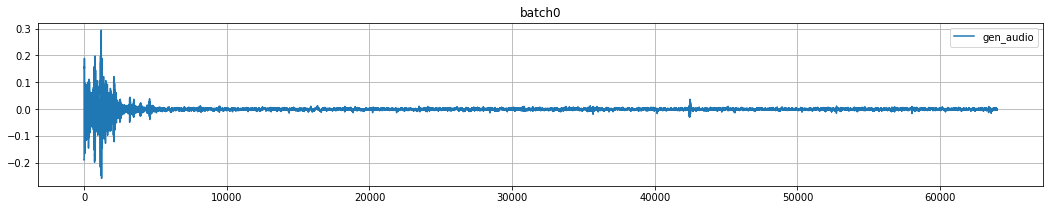

In [14]:
for i in range(audioout.shape[0]):
    plt.figure(figsize=(18,3))
    plt.title('batch'+str(i))
    plt.plot(audioout[i],label='gen_audio') #generated
    plt.legend()
    plt.grid()
    plt.show()